# **Save OV7675 Image**


Download required libraries.

In [ ]:
import struct
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

## Copy the output from Serial Monitor


Copy the output of the Serial Monitor to the variable below.

In [5]:
# 240x320 QVGA grayscale input takes array of 38,400
# Each 16-bit hexadecimal bytes represents two consecutive pixels
HEXADECIMAL_BYTES = [
    0x876E, 0xF7C2, 0xFFFF, 0x489A, 0x735D, 0x6D6F, 0x6D6F, 0x6D6E, 0x6F6D, 0x6E74, 0x6E70, 0x6E6F, 0x6B6E, 0x6C6C, 0x6B6B, 0x716B, 0x696D, 0x8172, 0x6C74, 0x6C6E, 0x6C72, 0x716C, 0x5D71, 0xE2FF, 0x5D3E, 0x6E6D, 0x6868, 0x6B63, 0x6964, 0x6D67, 0x656A, 0x6F66, 0x686F, 0x7471, 0x7379, 0x6E6A, 0x6E6C, 0x6A6C, 0x6E72, 0x6C6E, 0x6E69, 0x6C70, 0x7073, 0x6A6E, 0x6E6B, 0x6D6B, 0x7273, 0x6F72, 0x7273, 0x6F6F, 0x8172, 0x6E82, 0x7172, 0x7373, 0x7472, 0x7172, 0x7B6F, 0x7076, 0x7372, 0x7472, 0x7173, 0x7373, 0x7174, 0x7473, 0x7478, 0x7473, 0x7475, 0x8770, 0x6E84, 0x7270, 0x6E73, 0x5162, 0x5A4F, 0x755F, 0x7472, 0x7375, 0x7570, 0x7773, 0x6F74, 0x7073, 0x7670, 0x7070, 0x6F6F, 0x7070, 0x6B6E, 0x6E7A, 0x7771, 0x6D73, 0x7272, 0x6F6F, 0x726E, 0x6769, 0x5663, 0x5F5C, 0x6A61, 0x6B6A, 0x696E, 0x6964, 0x656A, 0x6A68, 0x656A, 0x6067, 0x6964, 0x6A6A, 0x645F, 0x6666, 0x6361, 0x6264, 0x625F, 0x5E59, 0x5A5F, 0x6456, 0x595C, 0x5E5E, 0x5957, 0x5655, 0x5957, 0x5454, 0x5454, 0x5653, 0x5E5A, 0x5454, 0x5B50, 0x5551, 0x4953, 0x5855, 0x5453, 0x544F, 0x5153, 0x5252, 0x4F56, 0x5A52, 0x5249, 0x4E52, 0x494F, 0x5254, 0x4F4F, 0x4C4E, 0x5556, 0x5852, 0x5454, 0x5459, 0x8280, 0x7C82, 0x9890, 0xA7A8, 0xA1A8, 0x8D9F, 0x8F90, 0x969A, 0x999C, 0x9596, 0x9C9B, 0x9B9E, 0x9E9B, 0xA0A0, 0x979E, 0xA29D, 0xA4A7, 0xB2C4, 0x5162, 0x875E, 0xFCC7, 0xBDFB, 0x5C6B, 0x6B65, 0x6D6E, 0x6A6E, 0x6B6B, 0x6A65, 0x6C6B, 0x6E69, 0x6B6D, 0x6C69, 0x696B, 0x6365, 0x6F69, 0x6F65, 0x7573, 0x636F, 0x6A6A, 0x6D68, 0x566D, 0xFFFD, 0x72D2, 0x6460, 0x6166, 0x6657, 0x6762, 0x6769, 0x6164, 0x5F65, 0x6461, 0x6364, 0x7473, 0x5C6C, 0x6462, 0x676A, 0x6767, 0x6466, 0x6467, 0x5D62, 0x6362, 0x6466, 0x6463, 0x676B, 0x6666, 0x6169, 0x6761, 0x6D6C, 0x7169, 0x6E83, 0x726F, 0x6970, 0x716C, 0x6C6F, 0x6D64, 0x6F6E, 0x6E70, 0x6768, 0x696A, 0x6567, 0x6867, 0x6C6E, 0x6967, 0x676B, 0x6B6C, 0x7569, 0x6E7F, 0x6D70, 0x656D, 0xB57A, 0xE0D5, 0x63AD, 0x6D6F, 0x6C6B, 0x6967, 0x686B, 0x6A6B, 0x6A68, 0x6268, 0x6568, 0x6565, 0x6365, 0x6B65, 0x5B73, 0x6061, 0x625E, 0x635F, 0x6069, 0x6865, 0x5A66, 0xE8E7, 0xBEE9, 0x5C6C, 0x5E60, 0x5E5E, 0x5A59, 0x5B5A, 0x5A5A, 0x5E5D, 0x595C, 0x5F66, 0x5D58, 0x5857, 0x5A55, 0x5757, 0x5A56, 0x585A, 0x5754, 0x5B59, 0x5155, 0x5452, 0x5155, 0x5358, 0x5356, 0x5151, 0x5453, 0x5354, 0x5454, 0x5058, 0x5151, 0x534A, 0x4F51, 0x4A54, 0x4B4A, 0x5252, 0x504F, 0x4F53, 0x504D, 0x4E49, 0x4A4F, 0x4948, 0x4A49, 0x4147, 0x4446, 0x4747, 0x4548, 0x4C4A, 0x4D43, 0x4B4A, 0x4F51, 0x717A, 0x7777, 0x9588, 0x9EA0, 0x999E, 0x8896, 0x8589, 0x8B8D, 0x9085, 0x9091, 0x9290, 0x9894, 0x9294, 0x999D, 0x9696, 0x9B9B, 0x9C9C, 0xACBD, 0x6E6A, 0x5E5F, 0xD2A3, 0xFFFF, 0x5CA6, 0x6D67, 0x6A69, 0x6B6E, 0x6E6B, 0x706C, 0x6970, 0x6D6C, 0x6E6F, 0x6E6A, 0x6D6C, 0x6B6F, 0x6E69, 0x636C, 0x7C7B, 0x6E74, 0x6F72, 0x7173, 0x636F, 0xFDE8, 0x91FF, 0x6A67, 0x5D6A, 0x5E55, 0x6860, 0x6768, 0x6567, 0x6466, 0x6367, 0x6768, 0x7B73, 0x6571, 0x6A69, 0x696A, 0x6B6B, 0x666A, 0x6664, 0x6766, 0x605D, 0x5D60, 0x6360, 0x696F, 0x6C6A, 0x6A68, 0x6C6C, 0x6B6A, 0x6D6D, 0x7D8C, 0x7271, 0x7071, 0x7171, 0x6D6F, 0x7368, 0x706F, 0x6F6F, 0x6D72, 0x6E69, 0x6C6B, 0x6D6F, 0x6E6D, 0x6E6E, 0x6E6C, 0x6B70, 0x726E, 0x6D7B, 0x6D72, 0x636E, 0xFFE2, 0xFFFF, 0x6BEB, 0x726E, 0x6F6D, 0x6E69, 0x6D6D, 0x6C6E, 0x6B6B, 0x656B, 0x6569, 0x6969, 0x676A, 0x6968, 0x6A7C, 0x686A, 0x6968, 0x6866, 0x666E, 0x696C, 0xB554, 0xFFFF, 0xFBFF, 0x6167, 0x6163, 0x5C62, 0x5E65, 0x5D5E, 0x555A, 0x5F5C, 0x595D, 0x6265, 0x575C, 0x595F, 0x555C, 0x595B, 0x585A, 0x595A, 0x5758, 0x5555, 0x5159, 0x5756, 0x5154, 0x5457, 0x5353, 0x5353, 0x5456, 0x5358, 0x5554, 0x5757, 0x4E59, 0x544B, 0x5151, 0x5355, 0x5857, 0x595C, 0x5855, 0x5955, 0x5E5C, 0x665E, 0x5E5F, 0x5D59, 0x5E5F, 0x4958, 0x4848, 0x484A, 0x4949, 0x4849, 0x4C4D, 0x4F4E, 0x5151, 0x777D, 0x7D78, 0x9B88, 0x9FA0, 0x9E9D, 0x8A97, 0x8B8B, 0x8D92, 0x918E, 0x9292, 0x9693, 0x9896, 0x979A, 0x9B9E, 0x9698, 0x9E99, 0x9B9E, 0xABBD, 0x6C6B, 0x5C65, 0x9F7A, 0xFFF1, 0xCFFB, 0x6A6D, 0x7267, 0x6E6F, 0x6F69, 0x6D6D, 0x6D6F, 0x6A6B, 0x6D6D, 0x6E6B, 0x6F6D, 0x726F, 0x6F6E, 0x686D, 0x7271, 0x747F, 0x7370, 0x7373, 0x6670, 0xFFCC, 0xE2FF, 0x5E89, 0x7373, 0x685F, 0x6769, 0x646B, 0x6A68, 0x6C6A, 0x6368, 0x6B6C, 0x716B, 0x7684, 0x696C, 0x6E69, 0x6D6D, 0x6A68, 0x6B6E, 0x6061, 0x635F, 0x5F61, 0x6460, 0x696D, 0x6D6E, 0x6C6B, 0x7272, 0x716D, 0x6D73, 0x8781, 0x6D6C, 0x7172, 0x7471, 0x7272, 0x736A, 0x6E6F, 0x6E6E, 0x6F72, 0x6D6D, 0x6D6C, 0x726F, 0x7270, 0x6D72, 0x6F6B, 0x7370, 0x7372, 0x758C, 0x7070, 0x6876, 0xFFBE, 0xFFFE, 0x57FB, 0x6F73, 0x6F72, 0x6B6E, 0x716F, 0x6769, 0x6B6C, 0x716C, 0x6D6C, 0x6B70, 0x6C6A, 0x746E, 0x6A7F, 0x6D6A, 0x6970, 0x676A, 0x656E, 0x706D, 0xDB62, 0xFEFF, 0xF5FF, 0x614F, 0x6363, 0x5F61, 0x5C60, 0x625D, 0x6062, 0x5D5F, 0x5D5E, 0x5E63, 0x585C, 0x5760, 0x555B, 0x5D5A, 0x5856, 0x5A5A, 0x5557, 0x5854, 0x5557, 0x5754, 0x5154, 0x5155, 0x5353, 0x5353, 0x524F, 0x4F54, 0x5A50, 0x5655, 0x4E56, 0x5149, 0x5253, 0x5652, 0x5351, 0x5758, 0x5558, 0x5B55, 0x5A5A, 0x5F59, 0x625E, 0x5A5A, 0x5F5D, 0x4A4F, 0x474A, 0x4848, 0x4A49, 0x4949, 0x4952, 0x4F4C, 0x5853, 0x7A78, 0x827A, 0x9E87, 0xA0A0, 0x9FA2, 0x8E94, 0x8C8C, 0x8D8D, 0x928E, 0x9494, 0x9794, 0x9895, 0xA099, 0x9E9E, 0x9698, 0xA29A, 0x9D9D, 0xB4C8, 0x6C69, 0x706C, 0x6766, 0xEDB6, 0xFFFF, 0x679D, 0x6D6E, 0x6D6E, 0x6F6E, 0x6F6B, 0x7274, 0x7776, 0x6C71, 0x716F, 0x7171, 0x7272, 0x6E6D, 0x6F6D, 0x6E70, 0x7780, 0x7476, 0x7475, 0x6D76, 0xFF84, 0xFFFE, 0x63CB, 0x7D6B, 0x7576, 0x6976, 0x6D6C, 0x6868, 0x696F, 0x6363, 0x6B6B, 0x656D, 0x6D83, 0x6865, 0x6E6B, 0x6D6D, 0x6D6C, 0x7772, 0x6671, 0x6662, 0x6161, 0x6664, 0x7065, 0x6D72, 0x7070, 0x7372, 0x7877, 0x7776, 0x8779, 0x7571, 0x7073, 0x7471, 0x7171, 0x7370, 0x7270, 0x7171, 0x6C6D, 0x716D, 0x6E6D, 0x736E, 0x7371, 0x7174, 0x7374, 0x716F, 0x6B73, 0x7C86, 0x6F71, 0x7273, 0xFFAB, 0xFDFF, 0x53FF, 0x7076, 0x7072, 0x7471, 0x7170, 0x7170, 0x6D6D, 0x726D, 0x6D6D, 0x6E6C, 0x6C6E, 0x766E, 0x687E, 0x6C68, 0x6C6C, 0x706D, 0x686E, 0x6F6D, 0xE65A, 0xFFFF, 0xC8FF, 0x6150, 0x6161, 0x6763, 0x6167, 0x6064, 0x635F, 0x5D5F, 0x6A5D, 0x5B64, 0x5C5E, 0x565A, 0x5B5B, 0x5D5A, 0x5A54, 0x5A59, 0x5758, 0x555A, 0x5757, 0x5555, 0x5056, 0x5A5B, 0x5456, 0x5054, 0x5252, 0x5750, 0x5A5C, 0x5356, 0x4B53, 0x564A, 0x4F4D, 0x4D4E, 0x4F52, 0x5252, 0x5450, 0x5855, 0x5355, 0x4E50, 0x4A49, 0x534E, 0x4B4D, 0x4B4F, 0x4C49, 0x4A4B, 0x4A49, 0x4E4B, 0x494B, 0x504C, 0x5952, 0x7A78, 0x807B, 0x9D8A, 0xA19F, 0xA49F, 0x8D93, 0x8C8C, 0x8D8D, 0x9690, 0x9593, 0x9A94, 0x9A95, 0x9D99, 0x9D9E, 0x9999, 0xA29F, 0x9AA0, 0xB3C5, 0x6F6E, 0x6B6E, 0x6066, 0xBA7B, 0xFFFC, 0xB1F7, 0x6574, 0x7677, 0x6D70, 0x7376, 0x7474, 0x7073, 0x7176, 0x7271, 0x7473, 0x7272, 0x7373, 0x7476, 0x6E70, 0x8476, 0x747F, 0x7775, 0x6E78, 0xDD72, 0xFFFF, 0xAAFF, 0x7453, 0x7273, 0x6C6E, 0x6E6E, 0x6B6F, 0x636F, 0x6E6D, 0x6C6A, 0x6E6C, 0x8371, 0x6B74, 0x6E6F, 0x736C, 0x7471, 0x7570, 0x7282, 0x6769, 0x6665, 0x6A61, 0x7770, 0x7A71, 0x6F74, 0x776F, 0x7576, 0x7E75, 0x8977, 0x7190, 0x757A, 0x787A, 0x7376, 0x796C, 0x7576, 0x7873, 0x7375, 0x7271, 0x7171, 0x7475, 0x7474, 0x7173, 0x7172, 0x7174, 0x6E77, 0x868D, 0x776E, 0x6E75, 0xFF9C, 0xFFFF, 0x50FF, 0x7176, 0x716F, 0x7171, 0x706F, 0x7275, 0x7070, 0x736D, 0x6D6F, 0x6E6E, 0x6D6D, 0x7C6D, 0x6B79, 0x6E6D, 0x6D6E, 0x6F6D, 0x6D6D, 0x7472, 0xFF55, 0xFDFD, 0xA4FF, 0x6366, 0x6768, 0x6364, 0x6664, 0x6063, 0x6060, 0x6262, 0x6966, 0x5D67, 0x5C60, 0x595E, 0x5B5B, 0x5959, 0x5855, 0x5A5C, 0x5958, 0x5259, 0x5857, 0x5A58, 0x565C, 0x5854, 0x5655, 0x5756, 0x5854, 0x5E55, 0x555C, 0x5454, 0x4C56, 0x5649, 0x5351, 0x5253, 0x5152, 0x5356, 0x5253, 0x5856, 0x5155, 0x5154, 0x4D54, 0x5353, 0x4C52, 0x4C53, 0x4E4B, 0x4E4A, 0x4A49, 0x4E4B, 0x494C, 0x534C, 0x6051, 0x7A74, 0x7F7B, 0xA28A, 0xA1A3, 0xA1A2, 0x8E95, 0x8B8E, 0x9292, 0x9392, 0x9494, 0x9B96, 0x999C, 0x9D99, 0x9F9D, 0x9F9A, 0xA1A0, 0x9BA0, 0xB4C9, 0x7374, 0x777A, 0x7076, 0x705E, 0xFCB9, 0xFFFF, 0x6A84, 0x7374, 0x707A, 0x6D70, 0x6F70, 0x7777, 0x7175, 0x7272, 0x6F70, 0x7770, 0x7979, 0x7273, 0x7070, 0x7E74, 0x7988, 0x7A77, 0x717A, 0x934A, 0xFFFF, 0xFFFF, 0x6F5F, 0x7170, 0x7471, 0x6C68, 0x706E, 0x6F70, 0x7274, 0x7075, 0x706D, 0x8A6D, 0x7179, 0x6D70, 0x736D, 0x7370, 0x7172, 0x767C, 0x6970, 0x6667, 0x6663, 0x8A7F, 0x7572, 0x7877, 0x707A, 0x7874, 0x7E79, 0x847A, 0x7894, 0x7A78, 0x7578, 0x6E77, 0x7C71, 0x7675, 0x7776, 0x7877, 0x7675, 0x7676, 0x7474, 0x7576, 0x7173, 0x706D, 0x7374, 0x7578, 0x9291, 0x7675, 0x7678, 0xFF80, 0xFFFF, 0x63FF, 0x7E7D, 0x7275, 0x7372, 0x7376, 0x7273, 0x7070, 0x7172, 0x726F, 0x7071, 0x6F70, 0x776C, 0x6B77, 0x6D6D, 0x6C6B, 0x6F6F, 0x6F6F, 0x6870, 0xFF8D, 0xFDFF, 0x86FF, 0x6263, 0x6567, 0x6466, 0x6766, 0x6063, 0x6260, 0x6363, 0x6565, 0x5D66, 0x5E5D, 0x5B5C, 0x595B, 0x5857, 0x5E56, 0x595B, 0x5A59, 0x565F, 0x5854, 0x5959, 0x585A, 0x555B, 0x5651, 0x5555, 0x5654, 0x6359, 0x535A, 0x5454, 0x4E5E, 0x5149, 0x5751, 0x5353, 0x5758, 0x5556, 0x5551, 0x5859, 0x5758, 0x5156, 0x4C56, 0x5351, 0x5553, 0x4C4D, 0x4C4B, 0x4C49, 0x4C49, 0x4D4D, 0x4E4C, 0x504F, 0x5D54, 0x7A77, 0x7D79, 0x9D8B, 0xA1A1, 0x9FA2, 0x8E95, 0x908E, 0x908E, 0x9392, 0x9693, 0x9A96, 0x999B, 0x9E9B, 0x9F9D, 0x9E9B, 0xA3A0, 0x9AA3, 0xB6CA, 0x807F, 0x7F82, 0x7E81, 0x7177, 0xC38E, 0xFFFF, 0xA8DE, 0x796D, 0x8981, 0x7D7D, 0x787B, 0x787C, 0x7176, 0x7671, 0x7574, 0x7375, 0x7170, 0x7176, 0x7774, 0x7E74, 0x7980, 0x7470, 0x6E76, 0x7B56, 0xFFC4, 0xFFFF, 0x6BCE, 0x7369, 0x7071, 0x6D77, 0x7272, 0x7972, 0x6F72, 0x6C74, 0x6D69, 0x7B6C, 0x8089, 0x746B, 0x7474, 0x7377, 0x7674, 0x7E7A, 0x6A6C, 0x6664, 0x6364, 0x8C81, 0x7877, 0x7778, 0x7775, 0x7E7B, 0x7F79, 0x807F, 0x9297, 0x7B70, 0x7974, 0x707C, 0x7E72, 0x7578, 0x7874, 0x7378, 0x7A77, 0x7578, 0x7476, 0x7775, 0x7577, 0x7A78, 0x7272, 0x7577, 0x9381, 0x7770, 0x7678, 0xFF85, 0xFFFF, 0x53FF, 0x7979, 0x7878, 0x7775, 0x7575, 0x7370, 0x7576, 0x7276, 0x7273, 0x7371, 0x6F71, 0x806F, 0x6E8A, 0x6E6C, 0x7373, 0x6E6F, 0x6F6E, 0x6A73, 0xFF94, 0xFDFF, 0x57FF, 0x696C, 0x6767, 0x6665, 0x6A66, 0x6665, 0x6163, 0x6163, 0x676B, 0x6164, 0x5D60, 0x5A5C, 0x5F5E, 0x5F5D, 0x5F5A, 0x605B, 0x5C60, 0x5B5D, 0x5B5E, 0x5A5D, 0x6058, 0x5D5A, 0x5A60, 0x5757, 0x5D55, 0x635D, 0x5659, 0x5754, 0x5255, 0x5A4A, 0x5655, 0x5955, 0x5758, 0x5157, 0x5A55, 0x5E59, 0x5A5D, 0x5254, 0x5653, 0x5453, 0x5457, 0x4B4C, 0x4C4B, 0x4B49, 0x4B4B, 0x4D4E, 0x4D49, 0x4D52, 0x5E55, 0x797B, 0x807E, 0xA189, 0xA3A3, 0x9FA1, 0x8B96, 0x8D8E, 0x918D, 0x9392, 0x9693, 0x9896, 0x9B98, 0x9E9B, 0x9F9D, 0x9D9C, 0xA89F, 0x9BA1, 0xB6CF, 0x797A, 0x7B7C, 0x807F, 0x8980, 0x8F78, 0xFFCF, 0xFFFF, 0x8F86, 0x8A7E, 0x8C8B, 0x8D8C, 0x8887, 0x8E89, 0x8B8C, 0x8C8F, 0x858B, 0x8286, 0x8786, 0x8280, 0x7B80, 0x9480, 0x7587, 0x7579, 0x6D5D, 0xFF73, 0xFEFF, 0x7FFF, 0x6F7B, 0x6D6F, 0x6F73, 0x7070, 0x7074, 0x7472, 0x746F, 0x7271, 0x7277, 0x898C, 0x7E77, 0x707A, 0x7876, 0x797A, 0x7F7B, 0x6B63, 0x6566, 0x6D63, 0x8481, 0x7979, 0x7778, 0x7873, 0x7C79, 0x7D7C, 0x7A7F, 0x959F, 0x7F77, 0x7E7B, 0x747C, 0x7B74, 0x7578, 0x787B, 0x7E75, 0x777A, 0x7578, 0x7373, 0x7777, 0x7775, 0x767A, 0x7975, 0x7979, 0x9683, 0x786E, 0x787A, 0xFF62, 0xFFFF, 0x56FF, 0x797F, 0x7B75, 0x7778, 0x7676, 0x7378, 0x7777, 0x7676, 0x7371, 0x7775, 0x6F70, 0x8372, 0x7185, 0x7176, 0x7173, 0x7170, 0x7371, 0x5C79, 0xFFD9, 0xFFFF, 0x64F1, 0x6B6A, 0x6B69, 0x6567, 0x6A66, 0x6667, 0x6165, 0x5F63, 0x6A6B, 0x6163, 0x5B60, 0x615E, 0x5F5E, 0x635C, 0x625F, 0x605B, 0x5C5F, 0x585E, 0x5C59, 0x5B5C, 0x5B5C, 0x5B55, 0x5A5B, 0x5758, 0x635B, 0x5E64, 0x5B53, 0x5358, 0x5454, 0x594D, 0x5556, 0x5955, 0x5B57, 0x6058, 0x5A54, 0x5D57, 0x5B5B, 0x5B54, 0x5B57, 0x5557, 0x5658, 0x4A4B, 0x494B, 0x4C4C, 0x4B4B, 0x4D4E, 0x4D4C, 0x5052, 0x5C5A, 0x7B7C, 0x7D7C, 0xA389, 0xA3A4, 0xA1A2, 0x8D93, 0x8D8E, 0x928F, 0x9093, 0x9594, 0x959A, 0x9C99, 0x9E9E, 0x9F9D, 0x9D9E, 0xAE9E, 0x9B9F, 0xBCD2, 0x767A, 0x767B, 0x7C70, 0x7B7A, 0x6B70, 0xE189, 0xFFFF, 0x89E0, 0x7E70, 0x7F81, 0x8682, 0x8A83, 0x8887, 0x8A89, 0x8889, 0x8884, 0x8887, 0x8686, 0x8485, 0x8783, 0x9F8A, 0x96A6, 0x7184, 0x8664, 0xCE7E, 0xFFFF, 0xD3FF, 0x7980, 0x8086, 0x7C7D, 0x7A78, 0x6E74, 0x7674, 0x7673, 0x726D, 0x7270, 0x8A78, 0x7683, 0x7376, 0x7774, 0x7879, 0x7D77, 0x6776, 0x6462, 0x6D65, 0x7D82, 0x797E, 0x787A, 0x7B7A, 0x7E77, 0x7F7D, 0x777D, 0x9389, 0x7D78, 0x807D, 0x777D, 0x8877, 0x797D, 0x7D7C, 0x7D7F, 0x777B, 0x7A78, 0x7B7E, 0x7A77, 0x7B79, 0x787A, 0x797C, 0x7B7A, 0x957F, 0x7877, 0x7A79, 0xFF5D, 0xFFFF, 0x70FF, 0x7E80, 0x7B7C, 0x7975, 0x787B, 0x7674, 0x7878, 0x7877, 0x7775, 0x7775, 0x7472, 0x836C, 0x7683, 0x7877, 0x7375, 0x716F, 0x7473, 0x6777, 0xFDFF, 0xFFFF, 0x66C3, 0x6C6F, 0x6A6B, 0x6769, 0x6564, 0x6667, 0x6465, 0x6163, 0x656A, 0x6364, 0x6061, 0x6264, 0x6160, 0x5E62, 0x6464, 0x6264, 0x5B60, 0x5A59, 0x5C5C, 0x5D59, 0x5C5C, 0x5556, 0x5B55, 0x5659, 0x6252, 0x5467, 0x5C59, 0x6058, 0x565C, 0x5151, 0x5457, 0x5C57, 0x5C57, 0x635A, 0x5955, 0x6157, 0x5C5E, 0x5E54, 0x5C56, 0x5655, 0x5857, 0x4C55, 0x4945, 0x4C4B, 0x4B49, 0x4D4E, 0x4D4D, 0x4D50, 0x5C57, 0x7B79, 0x7E7B, 0xA38A, 0xA4A4, 0xA2A4, 0x8D97, 0x8F8D, 0x918F, 0x9291, 0x9596, 0x9A98, 0x9C9B, 0x9F9E, 0x9FA0, 0xA49D, 0xAEA4, 0x9FA3, 0xBCD8, 0x7D7B, 0x7D7C, 0x757D, 0x7F7B, 0x7979, 0x876F, 0xFDD0, 0xBBFF, 0x796C, 0x7C79, 0x7E7F, 0x757C, 0x7B7A, 0x7E7C, 0x797F, 0x7C7E, 0x7E79, 0x7D7F, 0x8282, 0x8382, 0x8584, 0x9790, 0x748F, 0x8F66, 0x7B8C, 0xFFDB, 0xFFFF, 0x848F, 0x8C8F, 0x8585, 0x8888, 0x8488, 0x8486, 0x8989, 0x8E8D, 0x8888, 0x927E, 0x7DA0, 0x8079, 0x7E84, 0x7D7F, 0x8579, 0x7291, 0x6665, 0x9082, 0x787D, 0x7E78, 0x7C7E, 0x7C7B, 0x867E, 0x797D, 0x7D7F, 0x947E, 0x7A80, 0x7B74, 0x7C7D, 0x806D, 0x7B7C, 0x7A78, 0x7A7C, 0x7B7C, 0x7B7C, 0x7975, 0x767A, 0x7C7A, 0x7C78, 0x7B7E, 0x797A, 0x8C77, 0x7B77, 0x7977, 0xFF63, 0xFFFD, 0x70FF, 0x8086, 0x797E, 0x7B7F, 0x7A7B, 0x7D78, 0x7878, 0x7C7A, 0x7777, 0x7575, 0x7675, 0x896D, 0x7782, 0x7577, 0x7575, 0x7174, 0x7673, 0x5F77, 0xFFFD, 0xFFFF, 0x59A1, 0x6D71, 0x686E, 0x6C6C, 0x6B69, 0x6869, 0x6668, 0x6D5F, 0x6578, 0x6466, 0x6763, 0x5D63, 0x6161, 0x6360, 0x6467, 0x6965, 0x5E61, 0x635F, 0x5C5B, 0x5A62, 0x5C5E, 0x6159, 0x5C61, 0x595A, 0x6D5D, 0x5B5F, 0x5C5B, 0x5A5C, 0x555E, 0x5151, 0x595C, 0x5E55, 0x5C57, 0x5A60, 0x6354, 0x645E, 0x5E64, 0x5C58, 0x5956, 0x5B55, 0x5253, 0x4E57, 0x4B47, 0x4B49, 0x4B49, 0x4D4C, 0x4F4D, 0x4F52, 0x5D58, 0x7C78, 0x7E7C, 0xA38D, 0xA4A3, 0xA3A4, 0x8D97, 0x928D, 0x948F, 0x8F91, 0x959A, 0x9B98, 0x9D98, 0x9F9E, 0x9FA0, 0xA39F, 0xACA9, 0x9DA4, 0xBED8, 0x807E, 0x8583, 0x7F84, 0x7D7B, 0x8882, 0x6479, 0xBF8A, 0xBFFA, 0x8384, 0x837D, 0x8081, 0x7982, 0x8280, 0x7C7F, 0x8079, 0x7D7F, 0x807F, 0x7E80, 0x827F, 0x7E7F, 0x7F7E, 0x847E, 0x7197, 0x7F5E, 0x6674, 0xF598, 0xFFFF, 0x7AD7, 0x7F81, 0x8081, 0x8082, 0x7F81, 0x7F80, 0x8889, 0x8B89, 0x8386, 0x8D86, 0x958F, 0x8787, 0x8584, 0x8985, 0x898F, 0x7A94, 0x686A, 0x988A, 0x878C, 0x8F8B, 0x8E8D, 0x928E, 0x8F8C, 0x8E8E, 0x9290, 0xA18D, 0x8099, 0x8D87, 0x7B8E, 0x8C71, 0x8384, 0x8283, 0x8281, 0x7F7F, 0x7D7D, 0x7E7B, 0x7979, 0x7B78, 0x787E, 0x7A76, 0x7B79, 0xA078, 0x758C, 0x7578, 0xF863, 0xFEFF, 0x83FF, 0x8080, 0x7D7C, 0x777D, 0x7977, 0x7A78, 0x787A, 0x7578, 0x7776, 0x7E7B, 0x787A, 0x8573, 0x7881, 0x7678, 0x7A74, 0x757B, 0x7573, 0x6075, 0xFFFF, 0xFFFF, 0x7074, 0x7173, 0x6D72, 0x706F, 0x6C70, 0x6969, 0x6B6E, 0x7965, 0x657A, 0x6666, 0x6666, 0x6661, 0x646B, 0x6465, 0x6868, 0x6B68, 0x6565, 0x6063, 0x595B, 0x5E5D, 0x605E, 0x5D66, 0x5C5E, 0x625E, 0x6E5F, 0x5C61, 0x6359, 0x595C, 0x535D, 0x5253, 0x5B5D, 0x5959, 0x5854, 0x625F, 0x6456, 0x645B, 0x6161, 0x5E61, 0x6155, 0x5859, 0x5F5F, 0x515F, 0x4E48, 0x4A4B, 0x4B49, 0x4D4F, 0x514D, 0x5052, 0x6059, 0x7A78, 0x7C7D, 0xA28E, 0xA4A4, 0xA4A4, 0x8E97, 0x908D, 0x9290, 0x9091, 0x9595, 0x9A97, 0x9E98, 0xA29D, 0xA2A2, 0xA3A2, 0xAFA8, 0x9FA6, 0xBFDA, 0x797A, 0x837E, 0x8784, 0x888A, 0x8383, 0x8586, 0x8276, 0xB2A8, 0x929E, 0x897C, 0x8886, 0x8180, 0x8283, 0x7E7E, 0x847D, 0x7C82, 0x7B7D, 0x7F79, 0x8182, 0x8181, 0x8783, 0x8382, 0x7299, 0x845D, 0x8283, 0x846C, 0xBA9A, 0x7EDA, 0x817C, 0x7B7C, 0x7B7B, 0x7A7B, 0x7E7E, 0x7C78, 0x7575, 0x7B77, 0x797A, 0x9A86, 0x868A, 0x8383, 0x8683, 0x8688, 0x7586, 0x5F6A, 0x8080, 0x8781, 0x8A86, 0x888A, 0x8988, 0x898B, 0x9B92, 0x8F97, 0x9A92, 0x92AA, 0x9092, 0x8091, 0x9D7F, 0x9898, 0x9497, 0x9392, 0x9394, 0x9795, 0x9A95, 0x999A, 0x9596, 0x9799, 0x9393, 0x9193, 0xA484, 0x96A5, 0x9392, 0xC676, 0xFFFF, 0x92FF, 0x8C8F, 0x8F8E, 0x8289, 0x8484, 0x7E81, 0x807F, 0x7D81, 0x7A76, 0x7978, 0x7777, 0x896F, 0x767D, 0x7877, 0x7578, 0x7875, 0x7678, 0x6569, 0xECFB, 0xD2ED, 0x7561, 0x7474, 0x7073, 0x7270, 0x6A6D, 0x6868, 0x696B, 0x796D, 0x6E6F, 0x676A, 0x6464, 0x6466, 0x6368, 0x6163, 0x696A, 0x6969, 0x6366, 0x6261, 0x5D5C, 0x5B59, 0x5F5F, 0x5C63, 0x5E5C, 0x625C, 0x5C63, 0x5E5E, 0x645B, 0x595D, 0x565F, 0x5850, 0x5E57, 0x5F5D, 0x6162, 0x615C, 0x625D, 0x6462, 0x5C60, 0x5B5E, 0x5B56, 0x5059, 0x6760, 0x4F69, 0x4C4C, 0x4B4C, 0x474A, 0x4D4B, 0x534F, 0x5252, 0x5D58, 0x7E7E, 0x7B80, 0xA28F, 0xA4A4, 0xA5A4, 0x8D97, 0x8D8E, 0x9290, 0x9091, 0x9795, 0x9C95, 0x9E9D, 0xA29E, 0xA2A0, 0xA9A1, 0xACAF, 0x9FAA, 0xBDD9, 0x8585, 0x8583, 0x8A87, 0x8889, 0x8183, 0x8687, 0x7B83, 0xC59E, 0xDDE9, 0x77B1, 0x8582, 0x8884, 0x8181, 0x887F, 0x8587, 0x7D84, 0x8480, 0x8785, 0x8687, 0x8487, 0x8687, 0x8B82, 0x7992, 0x8563, 0x7F83, 0x6A79, 0x9077, 0xCAA8, 0x74AC, 0x8079, 0x7E80, 0x7C7C, 0x7F7E, 0x7B7E, 0x787F, 0x7D7C, 0x7B78, 0x9687, 0x829A, 0x8282, 0x8382, 0x7F83, 0x7C86, 0x5F67, 0x7D8C, 0x7F7E, 0x837C, 0x8483, 0x8283, 0x8484, 0x8986, 0x8985, 0x9186, 0x9DA6, 0x8A86, 0x7C8D, 0x9378, 0x9394, 0x8B8E, 0x8D8B, 0x9490, 0x8F8F, 0x908F, 0x9292, 0x9193, 0x9793, 0x939A, 0x8F8C, 0xA685, 0x8DA1, 0x9690, 0xA081, 0xEBE1, 0x8AF7, 0x9493, 0x9194, 0x9393, 0x8F90, 0x9092, 0x9192, 0x8C92, 0x8C88, 0x878B, 0x8889, 0x8579, 0x827B, 0x827D, 0x7E82, 0x8182, 0x7D79, 0x7C8A, 0xB7B3, 0x8497, 0x7669, 0x7375, 0x7376, 0x7272, 0x6F6E, 0x686F, 0x6868, 0x776E, 0x686E, 0x6768, 0x6969, 0x616B, 0x6168, 0x625F, 0x6969, 0x6A69, 0x6666, 0x6362, 0x625D, 0x6164, 0x6162, 0x5F62, 0x5F62, 0x695E, 0x5769, 0x5D59, 0x6359, 0x5E60, 0x545F, 0x5F50, 0x5B55, 0x635C, 0x5D61, 0x605E, 0x6660, 0x656A, 0x6365, 0x635E, 0x5564, 0x5A59, 0x7B67, 0x4C5E, 0x444A, 0x4A4F, 0x4549, 0x4D4C, 0x544B, 0x4F51, 0x6155, 0x7E7B, 0x797D, 0xA190, 0xA6A4, 0xA5A4, 0x8E97, 0x8D8E, 0x9190, 0x8F93, 0x9596, 0x9497, 0x9D9F, 0xA09D, 0xA1A1, 0xABA3, 0xAEAE, 0xA0AA, 0xBFD9, 0x8C8D, 0x888E, 0x8887, 0x8487, 0x9087, 0x8C8A, 0x8B92, 0xB582, 0xFFFF, 0x92FF, 0x9586, 0x918B, 0x908F, 0x8C90, 0x8B8A, 0x8A8A, 0x8C8C, 0x8E8C, 0x888E, 0x898B, 0x8788, 0x928C, 0x788F, 0x8973, 0x8485, 0x818A, 0xC295, 0xFFFF, 0x7DFF, 0x8785, 0x8381, 0x7F80, 0x7978, 0x7D7D, 0x7F81, 0x8080, 0x8481, 0x9183, 0x84A7, 0x8684, 0x8887, 0x7D81, 0x8986, 0x636C, 0x879A, 0x8687, 0x8685, 0x8486, 0x8584, 0x8684, 0x8A83, 0x8B88, 0x8489, 0xA9AB, 0x8980, 0x7C8B, 0x8F77, 0x8483, 0x8583, 0x8888, 0x7D83, 0x8686, 0x8483, 0x8083, 0x8683, 0x878A, 0x8A87, 0x8281, 0xA682, 0x83A1, 0x8A89, 0xD382, 0xECE6, 0x7DE0, 0x8E8D, 0x858C, 0x8C83, 0x8A8A, 0x898C, 0x8B8B, 0x878A, 0x8A8A, 0x8386, 0x8688, 0x9E84, 0x8481, 0x8185, 0x817F, 0x8083, 0x7879, 0xEB77, 0xF4F6, 0x8BD9, 0x8379, 0x8180, 0x807B, 0x7E82, 0x7979, 0x787C, 0x6C71, 0x8279, 0x6A6B, 0x6B69, 0x666A, 0x6966, 0x6466, 0x6C67, 0x6A6F, 0x696C, 0x6164, 0x6164, 0x6463, 0x6261, 0x6263, 0x6161, 0x6362, 0x6466, 0x556B, 0x5D5A, 0x565D, 0x625E, 0x6261, 0x5D4E, 0x555E, 0x615E, 0x6661, 0x6163, 0x6361, 0x6766, 0x8060, 0x7879, 0x7A7A, 0x7B79, 0x8983, 0x6B6F, 0x726B, 0x4C46, 0x4D49, 0x4D4C, 0x544D, 0x5353, 0x6752, 0x7C76, 0x787D, 0xA592, 0xA6A4, 0xA7A6, 0x8D95, 0x8F8D, 0x9292, 0x9496, 0x9797, 0x9A97, 0x9B99, 0xA29D, 0xA6A2, 0xAAA4, 0xAEAE, 0x9CA9, 0xBFD9, 0x898A, 0x8D90, 0x8D92, 0x928D, 0x8D92, 0x908B, 0x9495, 0x9388, 0xFFBC, 0xE1FF, 0x8CCA, 0x938E, 0x9591, 0x9094, 0x918D, 0x9296, 0x9291, 0x8E8D, 0x8D8F, 0x9489, 0x9492, 0x8F93, 0x7C87, 0x9584, 0x8B8B, 0x868E, 0xB795, 0xFFFF, 0xD5FF, 0x818C, 0x8985, 0x8787, 0x8483, 0x8887, 0x8880, 0x8887, 0x8286, 0x8C84, 0xA49E, 0x8584, 0x8C88, 0x878C, 0x928B, 0x6C6E, 0x8C91, 0x8C8C, 0x888E, 0x8386, 0x8B87, 0x8D91, 0x938C, 0x8C8F, 0x8989, 0xAF9C, 0x8890, 0x7C8C, 0x9379, 0x888A, 0x8C8B, 0x8787, 0x8386, 0x8B8B, 0x8C8B, 0x8A8C, 0x8787, 0x8B8B, 0x8B89, 0x878E, 0x9D7F, 0x82AC, 0x8A88, 0xCE81, 0xFFFF, 0xE9FF, 0x8D83, 0x8A8B, 0x8586, 0x8A85, 0x8284, 0x8181, 0x8086, 0x8182, 0x8282, 0x7E80, 0x8F85, 0x8379, 0x8081, 0x8082, 0x8280, 0x7A7B, 0xFF72, 0xFFFF, 0x8DFF, 0x7F7F, 0x7C80, 0x7C7B, 0x787E, 0x7779, 0x7177, 0x7775, 0x7C80, 0x7C73, 0x757A, 0x7474, 0x7274, 0x706F, 0x686F, 0x6F68, 0x6B6C, 0x6B68, 0x696C, 0x666A, 0x5E60, 0x6160, 0x6160, 0x6160, 0x6763, 0x6662, 0x5E66, 0x605F, 0x5E59, 0x6260, 0x674E, 0x6562, 0x6669, 0x6365, 0x625E, 0x6663, 0x6C6B, 0x8963, 0x878F, 0x9096, 0x8E8E, 0x7C8F, 0x807D, 0x777F, 0x4C3E, 0x4E49, 0x4D4E, 0x514B, 0x5350, 0x6A51, 0x7F71, 0x7C7D, 0xA492, 0xA5A5, 0xA5A6, 0x8E92, 0x908F, 0x9191, 0x9195, 0x9795, 0x9B98, 0x9B9C, 0xA09D, 0x9FA3, 0xAAA6, 0xAEAF, 0xA0A8, 0xC0DD, 0xB5BC, 0x9BA1, 0x9FA0, 0x9B9C, 0x9299, 0x888A, 0x8386, 0x7F86, 0xB368, 0xFFFF, 0x9DFF, 0x938A, 0x8F90, 0x8D8C, 0x9494, 0x9791, 0x959A, 0x9493, 0x9393, 0x9494, 0x9695, 0x9594, 0x7591, 0xAF7A, 0x9699, 0x9696, 0x7D8F, 0xFFD3, 0xFFFD, 0x91B6, 0x9096, 0x8D89, 0x898F, 0x8C8A, 0x8989, 0x8789, 0x8B8A, 0x818A, 0xBF99, 0x9198, 0x8D8F, 0x9592, 0x8C8C, 0x7167, 0x8A9E, 0x8689, 0x8F88, 0x8992, 0x8A8C, 0x8F8F, 0x978F, 0x9293, 0x9493, 0xB08D, 0x919A, 0x8595, 0x977A, 0x8D94, 0x8F8C, 0x898D, 0x928C, 0x8F8D, 0x9190, 0x8C92, 0x8F8C, 0x8D8D, 0x8A8E, 0x918B, 0xA792, 0x85BB, 0x8C90, 0xBC89, 0xFFFF, 0xFEFD, 0x8985, 0x8B89, 0x878D, 0x8485, 0x8684, 0x8788, 0x8485, 0x8682, 0x8684, 0x7D83, 0x9585, 0x827A, 0x8283, 0x807F, 0x7E80, 0x6E79, 0xFF90, 0xFFFD, 0x88FF, 0x7E74, 0x747A, 0x767B, 0x7875, 0x7677, 0x6E76, 0x786D, 0x7788, 0x7470, 0x7274, 0x6F72, 0x6D6F, 0x6C6E, 0x6369, 0x6F67, 0x6A6D, 0x6868, 0x6669, 0x6967, 0x6C6D, 0x696B, 0x6969, 0x6568, 0x756D, 0x706E, 0x6E73, 0x6D6A, 0x7070, 0x5570, 0x6649, 0x6C67, 0x626C, 0x615F, 0x6565, 0x6461, 0x656A, 0x8C69, 0x8790, 0x8D8D, 0x8787, 0x778B, 0x7377, 0x7771, 0x4D3C, 0x4E49, 0x4E4E, 0x5356, 0x5350, 0x6C54, 0x8070, 0x7B7E, 0xA592, 0xA5A6, 0xA5A6, 0x8E93, 0x8F90, 0x9191, 0x9496, 0x9795, 0x9797, 0x999A, 0xA09D, 0x9FA2, 0xA7A6, 0xB0B0, 0xA3A6, 0xC2DD, 0xFEFF, 0xF6F7, 0xF7F6, 0xF3F4, 0xEEF0, 0xEAEC, 0xE2E5, 0xD9DD, 0xC9C2, 0xFFFF, 0xEAFF, 0xCBDF, 0xA8B3, 0xA3A5, 0x989D, 0x8D90, 0x898B, 0x888B, 0x8D89, 0x8F90, 0x8D91, 0x9392, 0x6293, 0xB06C, 0x8EA7, 0x988C, 0x8698, 0xE9A2, 0xFFFF, 0xB0ED, 0x9287, 0x9190, 0x8F90, 0x9392, 0x9294, 0x8C8F, 0x9893, 0x9097, 0xA491, 0x95B6, 0x9396, 0x9794, 0x9192, 0x7D83, 0x969E, 0x9195, 0x9690, 0x949A, 0x8D94, 0x9E99, 0x9C97, 0x9C9C, 0x9A99, 0xB293, 0x90B7, 0x8098, 0xA07C, 0x9595, 0x9494, 0x9896, 0x949A, 0x9696, 0x9192, 0x8F97, 0x968F, 0x9495, 0x9393, 0x8C8E, 0xAA8E, 0x89C2, 0x8F91, 0xBB89, 0xFFFF, 0xF2FF, 0x8E77, 0x8C8C, 0x8B8B, 0x888D, 0x8E88, 0x878B, 0x8985, 0x848C, 0x8687, 0x8881, 0xA291, 0x827F, 0x847B, 0x8486, 0x7C7E, 0x7D7D, 0xFF8A, 0xFDFF, 0x6FFF, 0x7C7C, 0x7D7C, 0x7A7E, 0x7879, 0x7376, 0x7176, 0x7C76, 0x7787, 0x7371, 0x7676, 0x6A6B, 0x6C6B, 0x636A, 0x6163, 0x605D, 0x5E58, 0x6A62, 0x6868, 0x6967, 0x6E69, 0x6769, 0x6B69, 0x7765, 0x717C, 0x6C69, 0x7670, 0x7471, 0x7574, 0x5D77, 0x7B56, 0x7178, 0x7E72, 0x7E7B, 0x757E, 0x7372, 0x757B, 0x8574, 0x878C, 0x8987, 0x8685, 0x768B, 0x7377, 0x7571, 0x4C3E, 0x4D48, 0x4F4C, 0x5653, 0x534F, 0x6953, 0x8073, 0x7E7D, 0xA193, 0xA6A1, 0xA5A4, 0x8D91, 0x8F8D, 0x9294, 0x9593, 0x9696, 0x9996, 0x9F9C, 0xA0A4, 0x9DA0, 0xA9A6, 0xB0AF, 0xA5A8, 0xC1DF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFD, 0xFFFF, 0xFDFF, 0xFEFD, 0xF4FA, 0xF2F4, 0xEBED, 0xDBE5, 0xD6D7, 0xC4CF, 0xB3C0, 0xA7AD, 0x6EBA, 0x9969, 0x95B1, 0x878C, 0x8C8A, 0xAB7C, 0xFDFF, 0xFFFF, 0x928E, 0x8D93, 0x8B89, 0x8C8C, 0x8E8D, 0x9292, 0x9190, 0x9191, 0x9E92, 0x9CBD, 0x9895, 0x9096, 0x9996, 0xA09F, 0x9E9B, 0x97A2, 0x9E98, 0x9794, 0x9B98, 0x9899, 0x9E98, 0x9D9E, 0x9B9C, 0xA79C, 0x9DC5, 0x89A5, 0xA67E, 0x9A96, 0x9B9B, 0x9E9E, 0x9799, 0x979A, 0x9797, 0x9597, 0x9798, 0x9D9B, 0x9F9C, 0x979E, 0x9B94, 0x94B6, 0x9595, 0x9899, 0xFFFF, 0xFFFF, 0x9887, 0x9291, 0x8F8F, 0x9390, 0x8F90, 0x8E8E, 0x8B8F, 0x888A, 0x878D, 0x8884, 0xA194, 0x877D, 0x837F, 0x8584, 0x8284, 0x7C7B, 0xFFE0, 0xFFFF, 0x70E3, 0x807F, 0x8180, 0x7A7E, 0x7876, 0x7A7B, 0x7676, 0x8377, 0x7481, 0x767A, 0x7576, 0x6C6E, 0x726A, 0x8074, 0x8385, 0x827D, 0x7271, 0x696E, 0x6060, 0x6564, 0x6565, 0x6668, 0x6164, 0x7A6C, 0x6A71, 0x696B, 0x6F69, 0x6D6D, 0x6D6D, 0x5A75, 0x744D, 0x7674, 0x7774, 0x787A, 0x7075, 0x797E, 0x7F7D, 0x8B7D, 0x8988, 0x8885, 0x8887, 0x728C, 0x7378, 0x7A71, 0x4C43, 0x4D47, 0x4D49, 0x4F51, 0x5150, 0x6A57, 0x7F74, 0x7D7F, 0xA396, 0xA6A1, 0xA7A4, 0x8F92, 0x8F8B, 0x9294, 0x9493, 0x9794, 0x97A0, 0x928A, 0x9D99, 0x9CA1, 0xA8A4, 0xB2B0, 0xA5A5, 0xC3E0, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xFDFD, 0xFDFD, 0xFFFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFEFF, 0xFCFE, 0x7AFE, 0xF76B, 0xF3F7, 0xE4F2, 0xDDDF, 0xCECB, 0xFFFF, 0xFFFF, 0xD5DC, 0xC2C4, 0xBCC2, 0xB3B6, 0xAEB1, 0xA2AA, 0x9E9F, 0x979B, 0x8E93, 0xA1A0, 0x8D94, 0x918F, 0x9796, 0x9996, 0x9394, 0x9694, 0x9994, 0x9B9C, 0x9B97, 0x9593, 0x9E95, 0x9C9C, 0x9C9B, 0x9E9A, 0xB2C8, 0x85A2, 0xA779, 0x9F99, 0x9FA0, 0x9B9F, 0x9D9A, 0xA09F, 0xA3A2, 0xA19D, 0x9CA2, 0xA09D, 0x9F9D, 0xA5A1, 0xA4A1, 0xA4CD, 0xA29F, 0x9E9E, 0xFFFF, 0xFFFF, 0x9C81, 0x9599, 0x9A96, 0x9C9B, 0x9899, 0x9293, 0x9196, 0x8C8F, 0x8C88, 0x9189, 0xA39C, 0x9288, 0x868B, 0x8884, 0x8587, 0x8982, 0xFDFE, 0xFFFF, 0x849A, 0x8084, 0x7C81, 0x817F, 0x7D7F, 0x797A, 0x7B78, 0x8D83, 0x797D, 0x7378, 0x7371, 0x7E79, 0x7781, 0x7D77, 0xB0AF, 0xACB0, 0x8F95, 0x7585, 0x7073, 0x646A, 0x6767, 0x6867, 0x736C, 0x7F83, 0x6C69, 0x696B, 0x6969, 0x6566, 0x6E6A, 0x5C71, 0x734F, 0x6D6E, 0x6B69, 0x6C73, 0x6F6E, 0x6F78, 0x7870, 0x887B, 0x888A, 0x8A87, 0x8A88, 0x718C, 0x737A, 0x7671, 0x4D48, 0x4B49, 0x4E4A, 0x5151, 0x5250, 0x6D55, 0x7C7A, 0x7F80, 0xA196, 0xA4A1, 0xA8A4, 0x8F93, 0x8C89, 0x9292, 0x9593, 0x989B, 0x678E, 0x7D60, 0x9C9D, 0x9CA0, 0xABA7, 0xB3B1, 0xA7A8, 0xC4E1, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xFEFD, 0xFDFE, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0x87FF, 0xFFA7, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFEFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFEFD, 0xFCFD, 0xF9FB, 0xF6F7, 0xF9F5, 0xEDF3, 0xF6F3, 0xE9F2, 0xF2ED, 0xEEEF, 0xE4E6, 0xDCE4, 0xD5D8, 0xD3D0, 0xC9CB, 0xC6C9, 0xBCBE, 0xBABB, 0xA7B6, 0xC2D6, 0x84B0, 0xA167, 0xA39B, 0xA2A0, 0xA0A2, 0x9A99, 0x9795, 0x9B98, 0x9495, 0x9A98, 0x9597, 0x9595, 0x9795, 0x9799, 0x98BE, 0x9C9A, 0x8A99, 0xFFFF, 0xFFFF, 0xA285, 0x9CA7, 0x9B9B, 0x979B, 0x9C95, 0x9B9B, 0x9A9A, 0x9696, 0x9795, 0x9894, 0xA8A8, 0x938D, 0x9391, 0x8D8E, 0x898C, 0x7778, 0xFFF2, 0xFFFF, 0x8B8B, 0x868A, 0x8483, 0x8181, 0x8786, 0x807F, 0x7B82, 0xA38E, 0x7B80, 0x797F, 0x7075, 0xA676, 0x7799, 0x6068, 0x8F81, 0x9497, 0x7980, 0x6D79, 0x8971, 0x7088, 0x6D6E, 0x6F6D, 0x7B67, 0x7E8A, 0x6B67, 0x6B6C, 0x6F6C, 0x6C6C, 0x6F6F, 0x5571, 0x774D, 0x6B6D, 0x6E69, 0x6B73, 0x726C, 0x776B, 0x7376, 0x8878, 0x888C, 0x8888, 0x8A8A, 0x728C, 0x7077, 0x7270, 0x4B46, 0x4B4A, 0x5250, 0x5352, 0x5352, 0x7057, 0x7679, 0x817F, 0xA298, 0xA4A3, 0xA8A4, 0x8F91, 0x9094, 0x918F, 0x9A94, 0x8F98, 0x4D79, 0x815A, 0xA29F, 0x919C, 0xAAA6, 0xB1B1, 0xA9A8, 0xC4E1, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xC5FF, 0xFFE2, 0xFFFF, 0xFDFF, 0xFFFD, 0xFDFF, 0xFFFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xF6FD, 0xF6FE, 0xCDF9, 0xFF98, 0xF0F0, 0xF1F0, 0xF1F1, 0xE9EF, 0xE1E6, 0xD9DD, 0xD2D1, 0xC8D0, 0xC1C8, 0xBCC0, 0xB0B3, 0xA0AC, 0xAAB6, 0xA2A5, 0x91A0, 0xFFFF, 0xFFFF, 0x9BB1, 0x99A2, 0x9195, 0x9390, 0x9197, 0x9997, 0x9498, 0x9390, 0x9395, 0x968E, 0xA7A6, 0x9398, 0x9390, 0x9593, 0x8C91, 0x807E, 0xFFFF, 0xFFFD, 0x927A, 0x8C8E, 0x8B8A, 0x8887, 0x8988, 0x8388, 0x8181, 0x9E99, 0x8582, 0x7D82, 0x7D81, 0xA97C, 0x64A6, 0x565B, 0x5350, 0x5C55, 0x5E59, 0x6661, 0x8F65, 0x7489, 0x7371, 0x7171, 0x7F6A, 0x7985, 0x7178, 0x6D70, 0x7372, 0x7373, 0x6F6F, 0x5C72, 0x734D, 0x7470, 0x7277, 0x7B77, 0x7A76, 0x7973, 0x7C82, 0x8A75, 0x8484, 0x8A88, 0x8A8A, 0x788C, 0x7477, 0x6D74, 0x4C44, 0x4A4C, 0x5051, 0x5452, 0x5251, 0x764B, 0x7778, 0x887D, 0xA198, 0xA6A4, 0xAAA6, 0x9090, 0x908F, 0x8F8F, 0x9093, 0x707E, 0x5F59, 0x8667, 0x9494, 0x9496, 0xAEAB, 0xB1B6, 0xACAC, 0xC4E2, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xEDFF, 0xFFF1, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFD, 0xFDFD, 0xFDFD, 0xFDFE, 0xFEFE, 0xFEFE, 0xFFFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xDDFF, 0xFFB0, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFD, 0xF8FC, 0xF8F9, 0xEEFC, 0xFFFF, 0xFFFF, 0xC2E0, 0xD8CD, 0xD2D5, 0xC5C9, 0xBEC0, 0xB0B8, 0xA9AB, 0x9BA5, 0x999A, 0x9697, 0x9AA4, 0x908D, 0x8D8E, 0x8D90, 0x908C, 0xBC78, 0xFFFF, 0xE1FE, 0x8B7E, 0x898B, 0x8E8E, 0x8786, 0x858B, 0x878A, 0x8282, 0x8D9D, 0x857E, 0x7F83, 0x8680, 0x957D, 0x71A9, 0x606F, 0x5A5D, 0x5757, 0x5C5B, 0x6D5F, 0x8377, 0x7684, 0x7073, 0x6D76, 0x847E, 0x707D, 0x786F, 0x7377, 0x7273, 0x7070, 0x716C, 0x6A80, 0x7F60, 0x7A76, 0x7A7B, 0x7A75, 0x7C7B, 0x757F, 0x7A77, 0x887C, 0x8082, 0x8A88, 0x888A, 0x7E8B, 0x8487, 0x7580, 0x4B50, 0x4F4D, 0x5049, 0x5452, 0x5654, 0x7650, 0x7170, 0x837C, 0xA398, 0xA6A3, 0xA9A6, 0x8E8B, 0x8F8D, 0x8D8D, 0x8499, 0x5568, 0x5550, 0x815E, 0x9495, 0x8890, 0xACA6, 0xB1B7, 0xACAC, 0xC4DF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFCFF, 0xFFF9, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xD2FF, 0xFFDF, 0xFFFD, 0xFFFF, 0xFDFD, 0xFDFF, 0xFEFE, 0xFFFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFD, 0xFFFF, 0xFEFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xFEFE, 0xF5FE, 0xEEF1, 0xDAE6, 0xD1DB, 0xC3C7, 0xB3B8, 0xA9B0, 0xACA3, 0xE47B, 0xFFFF, 0xDBFE, 0xA29C, 0x9E9B, 0x9698, 0x9290, 0x909A, 0x8E8F, 0x828A, 0x8597, 0x8782, 0x8989, 0x8384, 0x7F7D, 0x9189, 0x8495, 0x747D, 0x7076, 0x7175, 0x8272, 0x7D82, 0x7770, 0x7375, 0x7376, 0x8C8F, 0x7A7B, 0x757A, 0x7775, 0x7375, 0x7676, 0x7271, 0x627B, 0x8162, 0x7879, 0x7C75, 0x7B7C, 0x7F7C, 0x8284, 0x8083, 0x8A82, 0x8D8D, 0x8A88, 0x888A, 0x838B, 0x8285, 0x7480, 0x494F, 0x504E, 0x4D4F, 0x5450, 0x5A55, 0x764F, 0x7D79, 0x8B7B, 0xA69C, 0xA5A5, 0xAAA5, 0x8E88, 0x8E8D, 0x9C8C, 0x6588, 0x5D54, 0x4D57, 0x884B, 0x9099, 0x868E, 0xB7A9, 0xB3B8, 0xA9AD, 0xC6E0, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xEFFF, 0xFFF8, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFCFD, 0xB0F2, 0xFD79, 0xFFFF, 0xFDFE, 0xD6CF, 0xCFCD, 0xC8CD, 0xC4C6, 0xBDB8, 0xB4BE, 0xB2B5, 0xABAD, 0xA9A8, 0xA4A7, 0xA6A6, 0xA0A1, 0x9F9C, 0xA8A6, 0x92A4, 0x8399, 0x7F85, 0x8C82, 0x767E, 0x7A75, 0x7B77, 0x7875, 0x8892, 0x7F79, 0x7A7F, 0x7F79, 0x7E7E, 0x7C7D, 0x8381, 0x5888, 0x8656, 0x7E82, 0x8682, 0x8686, 0x8384, 0x8381, 0x938E, 0x8F8A, 0x8B8C, 0x8A8A, 0x878A, 0x858A, 0x8383, 0x757F, 0x4D48, 0x504C, 0x5051, 0x5256, 0x5858, 0x7350, 0x7F77, 0x917D, 0xA1A9, 0xA6A3, 0xAAA6, 0x8E88, 0x928D, 0x7F9A, 0x4D6C, 0x6257, 0x535C, 0x8247, 0x8791, 0x887C, 0xC8AE, 0xB6B9, 0xAAAD, 0xC5E2, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xEEFF, 0xFFF8, 0xFFFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xDBFF, 0xFFA8, 0xFFFF, 0xFEFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xFCFC, 0xFCFC, 0xFAFB, 0xEEED, 0xE5EB, 0xDDE0, 0xDAD9, 0xD0D5, 0xCACD, 0xC2C8, 0xB2B9, 0x89AE, 0x9B92, 0x8695, 0x9B96, 0x9A9C, 0x9797, 0x9395, 0x9597, 0x9597, 0x9395, 0x9594, 0x9C98, 0x979A, 0x989A, 0x6198, 0xA36F, 0x968D, 0x9096, 0x908E, 0x8C92, 0x8F8C, 0x999C, 0x84A1, 0x8E8C, 0x898A, 0x8989, 0x8986, 0x8483, 0x6F7F, 0x4F4B, 0x504C, 0x5551, 0x5256, 0x5A59, 0x6D55, 0x7B7A, 0x9686, 0x999D, 0xA4A3, 0xA6A6, 0x8B89, 0x908D, 0x588E, 0x515E, 0x575C, 0x4952, 0x7A41, 0x7E7C, 0x9378, 0xCCB9, 0xB4BB, 0xAAAF, 0xC7E4, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xFFFE, 0xD9FF, 0xF0F3, 0xF5F4, 0xF5F7, 0xFEF9, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xF3FF, 0xFFFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xFDFE, 0xFFFD, 0xFFFC, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xD3E1, 0x9CCB, 0x9C92, 0xA3B5, 0xBAB5, 0xB6B7, 0xBEB9, 0xC0BD, 0xC2BD, 0xC6C6, 0xCEC6, 0xC9CC, 0xCFCB, 0xCFD0, 0xC7CC, 0x60D5, 0xD489, 0xCFC9, 0xCFCD, 0xCECF, 0xC8C3, 0xC7C4, 0xF2EF, 0x89B2, 0x8C8C, 0x8B8C, 0x8988, 0x8787, 0x8683, 0x6F84, 0x524E, 0x514A, 0x5353, 0x5C54, 0x5A5A, 0x7755, 0x7A7A, 0x9E7F, 0xA7B5, 0xA3A3, 0xA5A3, 0x9490, 0x719E, 0x4A67, 0x4D50, 0x545A, 0x4C4F, 0x7F42, 0x767C, 0x8771, 0xE4CC, 0xB3C0, 0xA9AD, 0xC7E4, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xF9FD, 0xFFB0, 0x7BFF, 0x968C, 0x9C96, 0x9F9D, 0xA6A2, 0xC7AC, 0xEAE3, 0xFDEC, 0xFFFF, 0xE6EA, 0xEBEA, 0xEDEE, 0xF1ED, 0xF9F7, 0xFEFC, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xFDFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFD, 0xFDFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xEEFD, 0xF2EE, 0xFEFB, 0xF8F9, 0xFAF8, 0xFCFB, 0xFEFE, 0xFDFE, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0x68FF, 0xFF90, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0x80EE, 0x8E8C, 0x8C8C, 0x888D, 0x8887, 0x8586, 0x688B, 0x514D, 0x5348, 0x5E51, 0x585A, 0x5B5B, 0x725C, 0x777C, 0xC179, 0x9DCB, 0xA1A3, 0xA5A3, 0x878B, 0x5580, 0x5A53, 0x5357, 0x5E58, 0x4C5A, 0x7C42, 0x757A, 0x9D81, 0xEADA, 0xB0BC, 0xABAF, 0xC9E3, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFD, 0xFDBB, 0x74FF, 0x6E6C, 0x7176, 0x887D, 0x848B, 0x8188, 0x837C, 0xC897, 0xE5F5, 0x889D, 0x868C, 0x8384, 0x8A86, 0x8F8C, 0x9692, 0x9B9A, 0x9D9C, 0xA1A0, 0xA7A4, 0xC1B9, 0xD7D3, 0xD9DB, 0xDDDB, 0xDCDB, 0xDDDE, 0xE4E1, 0xE1E3, 0xE8E7, 0xEFE8, 0xFAF6, 0xF3FA, 0xEDF0, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xFDFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xBFFF, 0xFFE3, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0x81E6, 0x8E8E, 0x8B8E, 0x878D, 0x8588, 0x8687, 0x6A8E, 0x5350, 0x5558, 0x5F5C, 0x5A60, 0x5958, 0x745E, 0x7777, 0xCD6F, 0x9DD8, 0xA3A3, 0xAFA3, 0x789B, 0x4559, 0x5857, 0x5857, 0x5F5E, 0x4753, 0x753D, 0x7577, 0xA57C, 0xE0E7, 0xAFB7, 0xACAD, 0xC0DE, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFE, 0xFDBC, 0x6DFF, 0x7C66, 0x627A, 0x986F, 0x9996, 0x999D, 0x9596, 0xA195, 0xCBCB, 0xAFC0, 0x959E, 0x9395, 0x9090, 0x8889, 0x8487, 0x8081, 0x8381, 0x7F7F, 0x767E, 0x7473, 0x686B, 0x6C69, 0x6E6C, 0x736F, 0x7270, 0x7774, 0x7B78, 0x7D7C, 0x8986, 0x918D, 0x8B91, 0x8E89, 0xFFC5, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFCFD, 0xFCFC, 0xFDFE, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDF8, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0x89F2, 0x8D8B, 0x8C8E, 0x8A8E, 0x858B, 0x8689, 0x5885, 0x3533, 0x3737, 0x6244, 0x6060, 0x605F, 0x7264, 0x7A76, 0xE67B, 0x9CE6, 0xA3A3, 0xAAA3, 0x5685, 0x4E3E, 0x534D, 0x5957, 0x5E5C, 0x4157, 0x7438, 0x7775, 0xAF78, 0xE3E7, 0xB2B8, 0xAEAF, 0xC4D9, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFE, 0xFDB8, 0x78FF, 0xA26D, 0x7892, 0x976C, 0x9898, 0x9B9B, 0x9D98, 0x999B, 0xADB6, 0xADC1, 0xA099, 0xA1A3, 0x9EA0, 0x969C, 0x9493, 0x9394, 0x9292, 0x9292, 0x9193, 0x8F91, 0x9090, 0x918D, 0x9096, 0x8F94, 0x9290, 0x8C8E, 0x8D8E, 0x918F, 0x8F91, 0x858A, 0x8A87, 0x8B8D, 0xFFD7, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFF1, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0x92F6, 0x8F8B, 0x8C8C, 0x8689, 0x8686, 0x8689, 0x478E, 0x1516, 0x1118, 0x6A33, 0x6362, 0x6565, 0x7569, 0x7A74, 0xE57A, 0x99E2, 0xA3A3, 0xABA5, 0x4357, 0x523D, 0x5151, 0x5957, 0x5F5E, 0x4257, 0x7339, 0x7773, 0xAE78, 0xE1EA, 0xAFB6, 0xACAF, 0xC4DE, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFBFC, 0xFEBE, 0x7AFF, 0x7B4F, 0x7288, 0x986A, 0x9897, 0x9598, 0x9F98, 0xA09D, 0xBCAE, 0xE0C9, 0xAAD0, 0xA094, 0x9EA0, 0x9A9C, 0x9598, 0x9595, 0x9496, 0x9694, 0x9596, 0x9795, 0x9896, 0x9A9A, 0x9899, 0x9197, 0x9B97, 0x9A99, 0x969A, 0x9899, 0x9897, 0x9B99, 0x9C9B, 0x939C, 0xFFDB, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xD7FF, 0xE0DD, 0xE8E1, 0xF4EF, 0xF9F8, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xF3FF, 0xFFFA, 0xFEFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0x9483, 0x8F8E, 0x8B8C, 0x8789, 0x8887, 0x8685, 0x458C, 0x1D11, 0x191C, 0x663C, 0x6667, 0x6665, 0x7868, 0x766D, 0xE27B, 0x9FDC, 0xA1A3, 0x98A2, 0x4B3C, 0x504A, 0x5352, 0x5957, 0x5C5C, 0x4258, 0x7339, 0x7676, 0xA57D, 0xDDDD, 0xADB8, 0xACAF, 0xC6DC, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFAFC, 0xFEB7, 0x7CFF, 0x695D, 0x536D, 0x9E74, 0x9897, 0x9898, 0x9C95, 0xA199, 0xB2A6, 0xFECF, 0xC7FF, 0xA49A, 0x9EA0, 0x989B, 0x9696, 0x9494, 0x9497, 0x9394, 0x9897, 0x9595, 0x9196, 0x9494, 0x9796, 0x9595, 0x9895, 0x959A, 0x9798, 0x9999, 0x999B, 0x9999, 0x9E9C, 0x959E, 0xFFDB, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xEFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0x7EFF, 0x787A, 0x7879, 0x8180, 0x8884, 0x9490, 0xAB9D, 0xB7B1, 0xD0CA, 0xD1D1, 0xD4D0, 0xD9D8, 0xDDD9, 0xE9E3, 0x8AED, 0xFFAE, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xF6FF, 0x8979, 0x8F8D, 0x8B8C, 0x8789, 0x8587, 0x8385, 0x4892, 0x1F13, 0x1A1F, 0x6434, 0x6669, 0x6765, 0x796E, 0x766D, 0xD879, 0x9AC9, 0xA1A3, 0xA4A6, 0x4B46, 0x504C, 0x5551, 0x5958, 0x5F5C, 0x4256, 0x763A, 0x7774, 0xAB83, 0xD8DF, 0xAFB1, 0xAEB0, 0xC6DB, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xF7FC, 0xFDC1, 0x80FF, 0x746B, 0x4D60, 0x9799, 0x9795, 0x9898, 0x9797, 0x9B96, 0x9E96, 0xE7AB, 0xFBFD, 0x93C6, 0x9D9C, 0x9A9B, 0x9497, 0x9393, 0x9495, 0x9393, 0x9091, 0x9691, 0x9296, 0x9496, 0x9794, 0x9695, 0x9695, 0x9696, 0x9798, 0x9797, 0x9A9A, 0x9898, 0x989A, 0x949B, 0xFFDC, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xEEFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0x8EFF, 0x9E9C, 0x8E91, 0x898E, 0x8D8B, 0x8587, 0x7F81, 0x777D, 0x6F73, 0x7574, 0x827A, 0x8280, 0x8E84, 0x8F94, 0x3A94, 0xC175, 0xDBD6, 0xE2E2, 0xE2E0, 0xE8E6, 0xFEDE, 0xC0FF, 0x8F60, 0x8D8F, 0x8989, 0x8889, 0x8587, 0x8184, 0x4B8D, 0x1E17, 0x1B1E, 0x6F3D, 0x6269, 0x6768, 0x716E, 0x7370, 0xD678, 0xA0CB, 0xA1A3, 0xA0A4, 0x4C46, 0x4F4B, 0x5956, 0x5554, 0x5D5B, 0x3F56, 0x7742, 0x7A74, 0xAC7E, 0xD8DC, 0xB0B8, 0xADAE, 0xC4DB, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xE3FB, 0xFDA5, 0x7FFF, 0x5B68, 0x7765, 0x93A0, 0x9596, 0x9895, 0x9795, 0x9E98, 0xA09D, 0xBE96, 0xFFEF, 0x95E9, 0xA09E, 0x9A9B, 0x9395, 0x9493, 0x9391, 0x9393, 0x9493, 0x9696, 0x9196, 0x9494, 0x9594, 0x9595, 0x9595, 0x9596, 0x9497, 0x959A, 0x9491, 0x9898, 0x9898, 0x9799, 0xFFDC, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xE5FF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xA6FF, 0xCEB5, 0xBFCA, 0xB6B5, 0xB3B7, 0xB7B0, 0xB2B6, 0xAEB0, 0xADAC, 0xB2AF, 0xACB0, 0xA6AA, 0xA5A6, 0x9DA3, 0x59B4, 0xA984, 0x8C91, 0x9F8F, 0xA9A4, 0xB6B2, 0xFEBC, 0x70FD, 0x8F69, 0x8D8D, 0x8989, 0x8C8A, 0x8588, 0x8184, 0x3296, 0x1B0D, 0x1D1E, 0x7743, 0x6D6A, 0x6464, 0x6C71, 0x756E, 0xD777, 0x9FC5, 0xA1A3, 0xA3A4, 0x4943, 0x4F4D, 0x5856, 0x5B5F, 0x605F, 0x3D5D, 0x7542, 0x7775, 0xB17B, 0xCDDD, 0xAFB4, 0xB0AD, 0xC4D9, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xE1F9, 0xFFB7, 0x7FFF, 0x6F88, 0x8C7C, 0x9894, 0x9594, 0x9695, 0x9895, 0x9E98, 0x9D9E, 0xA292, 0xFDCA, 0xD1F9, 0x919A, 0x9A93, 0x9395, 0x9293, 0x9494, 0x9494, 0x9693, 0x9696, 0x9696, 0x9496, 0x9596, 0x9395, 0x9694, 0x9596, 0x9396, 0x9593, 0x9694, 0x9797, 0x9797, 0x8D9A, 0xFFDA, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xE3FF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xD7FF, 0xF3D7, 0xF4FF, 0xF2F1, 0xECF0, 0xF2EC, 0xF4F4, 0xF5F5, 0xFBFB, 0xF9FA, 0xE5F2, 0xF2EC, 0xE6ED, 0xF0E9, 0x5EF9, 0xFB8E, 0xEAEA, 0xF4EE, 0xF7F4, 0xF4F5, 0xFFF7, 0x22FF, 0x8C7C, 0x908E, 0x8B89, 0x8B89, 0x8688, 0x8183, 0x228F, 0x1B16, 0x1A1E, 0x602D, 0x676A, 0x625E, 0x6B6E, 0x6968, 0xD772, 0xA3C6, 0xA3A3, 0xA1A4, 0x4B3D, 0x4D4C, 0x5754, 0x5B60, 0x655F, 0x3F63, 0x7A40, 0x7C76, 0xB47F, 0xCACC, 0xAFB8, 0xB0AD, 0xC3DA, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xD1FB, 0xFF9E, 0x75FF, 0x9F96, 0x7D87, 0x8E75, 0x9696, 0x9696, 0x9896, 0x9E97, 0x9D9D, 0xA4A0, 0xCCA4, 0xFFFF, 0x99B9, 0x9C9B, 0x9497, 0x9396, 0x9493, 0x9393, 0x9693, 0x9496, 0x9795, 0x9694, 0x9694, 0x9197, 0x9591, 0x9696, 0x9891, 0x9390, 0x9694, 0x9895, 0x9795, 0x9198, 0xFDD6, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xE1FF, 0xFFF5, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xCEFF, 0xDACC, 0xEDFB, 0xFCF7, 0xFDFB, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0x9AFF, 0xFFCA, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0x34C5, 0x8C79, 0x898E, 0x8C8F, 0x8989, 0x8686, 0x8183, 0x2396, 0x1C15, 0x131E, 0x3A36, 0x6663, 0x5A5C, 0x6C66, 0x6D6B, 0xD56C, 0xA4BF, 0xA3A4, 0x9BA6, 0x543E, 0x4F51, 0x504A, 0x5D60, 0x645E, 0x4661, 0x7B42, 0x7B7B, 0xBB8A, 0xC4CE, 0xAEB7, 0xB0AF, 0xC3DA, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xCCFB, 0xFFA7, 0x7AFF, 0x9593, 0x6C67, 0x8B6F, 0x9691, 0x9696, 0x9A94, 0x9B97, 0x9C9B, 0x979D, 0xA88F, 0xFEDF, 0xBAF7, 0x9191, 0x9494, 0x9396, 0x9394, 0x9393, 0x9493, 0x9394, 0x9191, 0x9697, 0x9494, 0x9696, 0x9796, 0x9695, 0x9C95, 0x9697, 0x9694, 0x9595, 0x9899, 0x9298, 0xFDD1, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xDCFF, 0xFFFA, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xBEFF, 0xDDAE, 0xDAFD, 0xF3EA, 0xF8F4, 0xFEFC, 0xFEFD, 0xFEFE, 0xFDFD, 0xFDFD, 0xFBFF, 0xD2CA, 0xDAD2, 0xD6D3, 0x9EF8, 0xDEB1, 0xF1E6, 0xF7FD, 0xFFE5, 0xFFFF, 0xFFFF, 0x56C2, 0x8F7F, 0x8C8E, 0x888C, 0x8A8B, 0x8686, 0x8383, 0x2194, 0x1E18, 0x151E, 0x404F, 0x654E, 0x4A52, 0x6A66, 0x776F, 0xD874, 0xA7BE, 0xA3A4, 0x94A8, 0x6967, 0x504B, 0x4E47, 0x5F5E, 0x645D, 0x4863, 0x804A, 0x7F79, 0xB791, 0xC5C9, 0xAFB8, 0xB0B0, 0xC3DA, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xC4FC, 0xFF9A, 0x78FF, 0x9793, 0x7B69, 0x9686, 0x9693, 0x9496, 0x9696, 0x9A98, 0x9B9A, 0xA09E, 0xA5A3, 0xDEBA, 0xE3FF, 0x9F9C, 0x94A2, 0x9396, 0x9394, 0x9393, 0x9694, 0x9494, 0x9191, 0x9698, 0x9494, 0x9493, 0x9596, 0x9695, 0x7487, 0x9E80, 0x9695, 0x9595, 0x989A, 0x9698, 0xFECD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xDEFF, 0xFFEB, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xC7FF, 0xAF9A, 0xF0EB, 0xFEFE, 0xFDFE, 0xFEFE, 0xFDFD, 0xFDFD, 0xFFFF, 0xFFFF, 0x99FF, 0x6E5A, 0x5358, 0x646C, 0x6177, 0x664C, 0x5358, 0x5E64, 0xFFD5, 0xFFFF, 0xFFFF, 0x5ECA, 0x8D7F, 0x8C8D, 0x888C, 0x858D, 0x8587, 0x8283, 0x1D97, 0x1E18, 0x121E, 0x545A, 0x533D, 0x4E52, 0x6E6B, 0x5769, 0xD059, 0xA7B7, 0xA4A6, 0x94A8, 0x6975, 0x5047, 0x5555, 0x5E5A, 0x645D, 0x495C, 0x8E4B, 0x8989, 0xB699, 0xC4CC, 0xB2B6, 0xB0B0, 0xC3DA, 0xFDFD, 0xFFFF, 0xFFFF, 0xFDFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xBAFC, 0xFF9F, 0x79FF, 0x9590, 0x8E79, 0x9396, 0x9493, 0x9696, 0x9696, 0x9794, 0x999A, 0x9F9E, 0x9BA2, 0xC6A1, 0xFBEB, 0xA7CC, 0x8F93, 0x9394, 0x9494, 0x9393, 0x9696, 0x9796, 0x9896, 0x9596, 0x9696, 0x9496, 0x9596, 0x9695, 0x5380, 0x9663, 0x9796, 0x9997, 0x9895, 0x9497, 0xFFCB, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xDAFF, 0xFFED, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFCFD, 0xC3FF, 0x749B, 0xED9A, 0xFDFF, 0xFDFD, 0xFDFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0x83FC, 0x5F5B, 0x3C48, 0x5550, 0x5365, 0x5E62, 0x3537, 0x5A3C, 0xFFC6, 0xFFFF, 0xFFFF, 0x5290, 0x8B87, 0x8B90, 0x878B, 0x868E, 0x8585, 0x8083, 0x1A94, 0x1D1E, 0x141D, 0x505F, 0x4A43, 0x4F5B, 0x5B6A, 0x2F52, 0xD344, 0xAAB8, 0xA4A6, 0x94A3, 0x5E71, 0x564E, 0x5657, 0x5B5A, 0x6063, 0x5B66, 0x9A5C, 0x8D96, 0xB593, 0xC3C5, 0xB2B6, 0xB2B0, 0xC4D9, 0xFDFE, 0xFFFF, 0xFFFF, 0xFDFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xB9FC, 0xFF8A, 0x77FF, 0x7B8B, 0x687A, 0x9390, 0x9496, 0x9494, 0x9494, 0x9696, 0x999A, 0x9D9C, 0xA09D, 0xA69D, 0xF5CA, 0xB5F8, 0x9195, 0x9394, 0x9493, 0x9394, 0x9693, 0x9696, 0x9594, 0x9596, 0x9795, 0x9496, 0x9796, 0x9896, 0x7182, 0x8975, 0x978D, 0x9A97, 0x9897, 0x9797, 0xFDB9, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xD5FF, 0xFFD7, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFCFD, 0xB5FF, 0x9796, 0xE6B1, 0xFDFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0x7DC1, 0x7668, 0x3E4B, 0x6553, 0x3E4E, 0x6E6C, 0x4647, 0x624D, 0xFFE5, 0xFFFF, 0xFFFF, 0x5390, 0x8F9A, 0x8B8F, 0x858C, 0x8489, 0x8486, 0x8381, 0x1892, 0x1F1D, 0x111E, 0x5E5D, 0x2F4A, 0x454F, 0x486A, 0x2B38, 0xD356, 0xA7B8, 0xA4A6, 0x98A3, 0x4D69, 0x504D, 0x4D4F, 0x5958, 0x6362, 0x525F, 0x9C5B, 0x9B98, 0xBB9E, 0xC0C7, 0xAFB3, 0xB2B0, 0xC4D9, 0xFCFB, 0xFEFC, 0xFCFE, 0xFEFC, 0xFEFE, 0xFEFE, 0xFEFE, 0xFEFE, 0xFEFE, 0xFDFE, 0xFDFD, 0xFDFD, 0xFDFD, 0xFDFD, 0xFDFD, 0xFDFD, 0xFDFD, 0xFDFD, 0xFFFF, 0xFDFD, 0xFFFD, 0xFFFF, 0xBFFE, 0xFF88, 0x83FF, 0x7A8C, 0x7380, 0x928B, 0x9493, 0x9393, 0x9494, 0x9696, 0x9A98, 0x9C99, 0xA09D, 0x979F, 0xD2A5, 0xE1EE, 0x92C0, 0x9494, 0x9494, 0x9494, 0x9693, 0x9396, 0x9596, 0x9797, 0x9795, 0x9595, 0x9495, 0x9893, 0x9D84, 0x899C, 0x9591, 0x9A98, 0x9898, 0x9695, 0xFFBB, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xD3FD, 0xFFE0, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xFFFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xECFE, 0xD2F9, 0xD2B1, 0xF9ED, 0xFCFC, 0xFDFD, 0xFFFD, 0xFFFF, 0xFFFF, 0xFDFF, 0xE5FF, 0x8F70, 0x7A6B, 0x4344, 0x6E5A, 0x4C57, 0x6C6A, 0x434B, 0x5F58, 0xFFF3, 0xFFFF, 0xFFFF, 0x5E67, 0x90AE, 0x8C90, 0x898C, 0x8888, 0x8384, 0x7D81, 0x1189, 0x1E1B, 0x171E, 0x5B5D, 0x384B, 0x474C, 0x3F70, 0x3235, 0xCB59, 0xA6B2, 0xA1A6, 0x8DA6, 0x5969, 0x524F, 0x5151, 0x5957, 0x575B, 0x5A58, 0x9965, 0x9D9D, 0xBC9B, 0xC2C2, 0xAFB4, 0xB2AF, 0xC3DA, 0xFAFB, 0xFCFB, 0xFCFC, 0xFBFB, 0xFBFB, 0xFBFB, 0xFCFB, 0xFCFC, 0xFBFC, 0xFEFC, 0xFEFE, 0xFDFE, 0xFDFD, 0xFDFD, 0xFDFD, 0xFDFD, 0xFDFD, 0xFDFD, 0xFFFF, 0xFDFD, 0xFFFD, 0xFFFF, 0xC0FE, 0xFF88, 0x7CFF, 0x9398, 0x9D9D, 0x9698, 0x9391, 0x9393, 0x9693, 0x9594, 0x9898, 0x9999, 0x9F9E, 0xA1A0, 0xB49C, 0xFBD8, 0x92DA, 0x9494, 0x9493, 0x9496, 0x9694, 0x9496, 0x9596, 0x9795, 0x9595, 0x9795, 0x9A95, 0x9595, 0x9D91, 0x8893, 0x9594, 0x9A97, 0x9899, 0x9598, 0xFFA7, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xCEFD, 0xFFC5, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xFFFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFEFF, 0xE4FE, 0xD7F2, 0xE1CF, 0xF5F0, 0xF9FC, 0xFDFE, 0xFFFD, 0xFFFF, 0xFFFF, 0xFFFF, 0x9BF0, 0x9188, 0x776B, 0x5249, 0x685B, 0x5558, 0x616A, 0x4D4D, 0x5C5B, 0xFFF6, 0xFFFF, 0xFFFF, 0x5A6B, 0x90A2, 0x8C8E, 0x898C, 0x8788, 0x8186, 0x7C81, 0x0F8A, 0x1C1F, 0x1A1C, 0x5158, 0x4153, 0x4A41, 0x3852, 0x2931, 0xCD5D, 0xA6B1, 0xA4A5, 0x94AC, 0x565A, 0x544F, 0x5653, 0x5A5A, 0x5A59, 0x5B54, 0xA56F, 0x9E9A, 0xBC9C, 0xBFBD, 0xAFB1, 0xB2AF, 0xC3D5, 0xF7F8, 0xFBF9, 0xF9FB, 0xF9F9, 0xFBFB, 0xFBFB, 0xFCFB, 0xFBFC, 0xFBFC, 0xFBF9, 0xFBFB, 0xFBFB, 0xFEFC, 0xFBFC, 0xFCFC, 0xFBFE, 0xFCFB, 0xFCFB, 0xFCFC, 0xFCFC, 0xFCFB, 0xFCFC, 0xC0FC, 0xFF7F, 0x86FF, 0x9794, 0x9393, 0x9196, 0x9393, 0x9193, 0x9491, 0x9797, 0x989A, 0x9998, 0x9F9C, 0x9E9D, 0x9C96, 0xC6AF, 0x96C7, 0x9696, 0x9391, 0x9494, 0x9694, 0x9696, 0x9695, 0x9A96, 0x9595, 0x9795, 0x9997, 0x9794, 0x968F, 0x8C95, 0x9594, 0x9998, 0x979B, 0x9198, 0xFFA7, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFD, 0xFDFD, 0xB7FE, 0xFFB2, 0xFCFC, 0xFEFE, 0xFEFE, 0xFCFC, 0xFCFC, 0xFCFC, 0xFCFC, 0xFCFC, 0xFCFC, 0xFCFC, 0xFCFC, 0xFCFC, 0xFEFE, 0xFCFE, 0xFEFC, 0xFCFC, 0xD5F5, 0xDDEB, 0xD7D3, 0xEDE4, 0xFBF7, 0xFEFE, 0xFDFC, 0xFDFD, 0xFFFF, 0xFFFF, 0x56E4, 0x8E9A, 0x6C63, 0x5D70, 0x607C, 0x4149, 0x6F6C, 0x6878, 0x4D6D, 0xFFF3, 0xFFFF, 0xFFFF, 0x4B4D, 0x8D7F, 0x8C8E, 0x8A8B, 0x8585, 0x8384, 0x7D87, 0x138C, 0x1E1D, 0x191C, 0x5658, 0x4C50, 0x4136, 0x4050, 0x2D35, 0xCD5D, 0xA7B6, 0xA4A5, 0x7FA8, 0x423D, 0x4B4B, 0x504F, 0x514D, 0x5956, 0x5A50, 0xA173, 0x9E9A, 0xBE9B, 0xBDC0, 0xB2B2, 0xB0AF, 0xC1D6, 0xF0E9, 0xF2F1, 0xEFEE, 0xF1F2, 0xF7F5, 0xF5F6, 0xF8F9, 0xFAF8, 0xFAF8, 0xF9F9, 0xFAF9, 0xFCFC, 0xFBFB, 0xF9F9, 0xFBFB, 0xFBFA, 0xFBFB, 0xFBFB, 0xFCFB, 0xF9FB, 0xFBF9, 0xFCFB, 0xC7FF, 0xFF81, 0x83FF, 0x9496, 0x9493, 0x9291, 0x9393, 0x9391, 0x9493, 0x9897, 0x9B97, 0x9998, 0x9E9B, 0x9F9D, 0xA39F, 0x9CA5, 0x8E9D, 0x9196, 0x9493, 0x9494, 0x9596, 0x9696, 0x9696, 0x9A96, 0x9695, 0x9597, 0x9797, 0x9696, 0x9391, 0x9A95, 0x9A8D, 0x9898, 0x9995, 0x909C, 0xFFA2, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFEFD, 0xFEFC, 0xCDFD, 0xFFA5, 0xFCFC, 0xFBFE, 0xFCF9, 0xFCFC, 0xFEFC, 0xFCFC, 0xFCFC, 0xFCFC, 0xFEFE, 0xFCFE, 0xFCFB, 0xFCFC, 0xFEFC, 0xFCFE, 0xFEFC, 0xFCFE, 0xCCEF, 0xDEDF, 0xDECD, 0xF1EC, 0xF3F6, 0xFBFA, 0xFEFB, 0xFDFE, 0xFFFF, 0xFFFF, 0x83B7, 0x8D9C, 0x7A67, 0x8992, 0x6A93, 0x3A4D, 0x8362, 0x908E, 0x6092, 0xFFF1, 0xFFFF, 0xFFFF, 0x4A4B, 0x8D80, 0x8B8C, 0x8A89, 0x8A85, 0x7981, 0x787B, 0x0880, 0x1D1D, 0x1B1B, 0x595C, 0x4E4D, 0x392F, 0x3F4D, 0x2C36, 0xC859, 0xA8AC, 0xA8A5, 0x83A7, 0x4638, 0x4E4B, 0x4D51, 0x574F, 0x5554, 0x574E, 0xA775, 0x9E99, 0xB59C, 0xBEB7, 0xB0B0, 0xB0AF, 0xC1D4, 0xE3E0, 0xEBE5, 0xEAEC, 0xE7E9, 0xE8E7, 0xE9E7, 0xEAEB, 0xEDE9, 0xEFEF, 0xF1F2, 0xF0F0, 0xF7F7, 0xF4F6, 0xFAF7, 0xF5F8, 0xF5F7, 0xF7F5, 0xFAF8, 0xF4F7, 0xFAFA, 0xF8F8, 0xF9FA, 0x97F9, 0xFF6A, 0x85FE, 0x9697, 0x9694, 0x9190, 0x9193, 0x9391, 0x9491, 0x9693, 0x9396, 0x9A96, 0x9C9B, 0x9E9E, 0x9E9D, 0x959B, 0x9697, 0x9391, 0x9493, 0x9496, 0x9594, 0x9696, 0x9696, 0x9591, 0x9896, 0x9597, 0x9595, 0x9696, 0x9A92, 0x9598, 0x9E8A, 0x9A98, 0x9A97, 0x8F99, 0xFF9D, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFD, 0xFDFD, 0xFEFE, 0xFEFD, 0xFCFE, 0xFEFC, 0xFBFE, 0xFCFB, 0xBAFD, 0xFF7F, 0xF9F9, 0xFBFB, 0xF9F9, 0xFAF7, 0xF5F5, 0xF9F8, 0xF5FA, 0xF9F7, 0xF5F8, 0xFBF9, 0xF9F9, 0xF8FA, 0xFBFA, 0xF9FB, 0xF6F8, 0xF2F4, 0xCEE9, 0xE6E5, 0xE3D3, 0xE1E2, 0xEBF0, 0xF6EE, 0xFCFC, 0xFDFE, 0xFCFE, 0xFFFE, 0x9AA8, 0x88A3, 0x7B6B, 0x9EA0, 0x659E, 0x4348, 0x9371, 0x9C99, 0x5AA1, 0xFFF2, 0xFDFF, 0xFFFE, 0x4041, 0x8F88, 0x8E89, 0x8A89, 0x8685, 0x6F71, 0x6F70, 0x0D71, 0x1B1E, 0x1919, 0x4458, 0x524B, 0x3238, 0x3E4D, 0x2C36, 0xC55A, 0xAAAB, 0xA6A5, 0x81A4, 0x4A3A, 0x4B4B, 0x4F51, 0x5154, 0x544F, 0x5E56, 0xA77B, 0x9E9B, 0xB499, 0xBBBA, 0xB0AF, 0xB0AF, 0xC1D4, 0xE0E4, 0xE1DC, 0xE4E8, 0xE6E4, 0xE6E6, 0xE1E5, 0xE7E2, 0xEAEA, 0xE6EA, 0xE7E1, 0xEBE7, 0xEAE8, 0xEDEC, 0xEBEC, 0xEEE9, 0xF0F2, 0xEFEE, 0xECEC, 0xEDEF, 0xEDE9, 0xEEED, 0xEBEF, 0x9FF6, 0xFF76, 0x81FB, 0x9697, 0x9693, 0x9191, 0x9193, 0x9391, 0x9391, 0x9594, 0x9697, 0x9A96, 0x9C99, 0x9C9C, 0x9F9E, 0x9F9F, 0x9B95, 0x9493, 0x9694, 0x9496, 0x9596, 0x9695, 0x9596, 0x9A9A, 0x9795, 0x9597, 0x9595, 0x9296, 0x9A8E, 0x848F, 0x9C7B, 0x9A9A, 0x9A9A, 0x9099, 0xFF9A, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFD, 0xFEFE, 0xFCFE, 0xFEFE, 0xFCFC, 0xFCFC, 0xFBFC, 0xF9FB, 0xC6FB, 0xFF90, 0xECEC, 0xEFE9, 0xF0EF, 0xECF2, 0xEFEE, 0xF0ED, 0xEBEE, 0xEFED, 0xE9EB, 0xEEEC, 0xECEB, 0xE9EB, 0xEEED, 0xEFEF, 0xEAEE, 0xE2E7, 0xC2DE, 0xD8D6, 0xDBC6, 0xDADE, 0xE8E1, 0xE9EA, 0xF4F2, 0xF8F5, 0xFCFC, 0xFFFE, 0x9BAB, 0x81A7, 0x836D, 0x9BA6, 0x689E, 0x433F, 0x9277, 0x9599, 0x529B, 0xFFED, 0xFEFF, 0xFFFE, 0x3E42, 0x9188, 0x8F88, 0x888A, 0x8788, 0x7074, 0x7571, 0x0B6F, 0x1C1E, 0x2119, 0x4A57, 0x4547, 0x323B, 0x374F, 0x2E34, 0xC65A, 0xAAAB, 0xA4A7, 0x7CA4, 0x4A37, 0x494B, 0x4F4C, 0x4D4B, 0x5350, 0x5952, 0xAA7E, 0x9E9B, 0xB69E, 0xB7B8, 0xADB0, 0xAFAC, 0xBFD2, 0xD7D8, 0xDCD7, 0xDCD9, 0xDCDC, 0xDFDF, 0xDFDF, 0xE1E2, 0xE2E2, 0xE0E2, 0xE2E3, 0xE2E1, 0xE5E2, 0xE3E4, 0xE1DF, 0xE7E6, 0xE9EA, 0xEAEE, 0xE5E7, 0xE5E7, 0xE4E6, 0xE3E1, 0xE1E2, 0xA7F7, 0xFF69, 0x86FB, 0x9698, 0x9694, 0x9396, 0x9193, 0x9496, 0x9392, 0x9694, 0x9897, 0x9895, 0x9998, 0x9C9A, 0x9E9C, 0x9D9D, 0x9897, 0x9693, 0x9596, 0x9595, 0x9796, 0x9595, 0x9695, 0x9897, 0x9797, 0x9797, 0x9798, 0x9495, 0x8684, 0x828A, 0x9F83, 0x9A9A, 0x999A, 0x9099, 0xFF96, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFD, 0xFDFD, 0xFDFD, 0xFEFE, 0xFEFE, 0xFCFE, 0xFBFC, 0xFBFB, 0xFCFB, 0xFBFB, 0xF9F9, 0xF1F7, 0xF2F1, 0xEBEF, 0xBDF6, 0xFB7F, 0xE8E7, 0xE5E4, 0xECE5, 0xEAF0, 0xEDEC, 0xE6EA, 0xE8E7, 0xE8E7, 0xE7E8, 0xE4E3, 0xE6E5, 0xE8E5, 0xE7E8, 0xE4E6, 0xEAEA, 0xE0E7, 0xBBDC, 0xD0D0, 0xD3BF, 0xDAD7, 0xE6D8, 0xE5E5, 0xEDE7, 0xF0EF, 0xF9F7, 0xFFFB, 0x9B9D, 0x81A1, 0x766E, 0x7E7E, 0x6F86, 0x5547, 0x7872, 0x7571, 0x577D, 0xFEF6, 0xFCFD, 0xFFF5, 0x424D, 0x908B, 0x848E, 0x8A89, 0x8E87, 0x7176, 0x7670, 0x0E6C, 0x1C1E, 0x1E19, 0x5056, 0x4945, 0x303D, 0x374C, 0x2D31, 0xBF5A, 0xABAB, 0xA4A8, 0x78A5, 0x4A3B, 0x4949, 0x504C, 0x534E, 0x5150, 0x5754, 0xA681, 0xA29C, 0xAF9B, 0xB7B6, 0xB4B1, 0xB0B3, 0xC6DA, 0xD4D6, 0xD7DC, 0xD8D4, 0xD7D7, 0xD8D6, 0xD5D9, 0xD8D7, 0xDEDB, 0xD8DD, 0xE0DE, 0xDFE2, 0xDBDB, 0xE3E1, 0xE1E4, 0xDDDC, 0xD9DE, 0xE2D9, 0xDFE0, 0xE3DF, 0xE3E6, 0xE1E2, 0xDFDD, 0xABE6, 0xFF73, 0x8BF2, 0x9598, 0x9596, 0x9496, 0x9393, 0x9694, 0x9396, 0x9694, 0x9897, 0x9798, 0x9898, 0x9B9C, 0x9C9B, 0x9D9D, 0x979E, 0x9393, 0x9595, 0x9595, 0x9797, 0x9795, 0x9A98, 0x9694, 0x9797, 0x9898, 0x9798, 0x9595, 0x8484, 0x8D81, 0x9F7C, 0x9A99, 0x999A, 0x8F9C, 0xFF8A, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFD, 0xFEFD, 0xFEFE, 0xFBFC, 0xFCFB, 0xF9FB, 0xFBFB, 0xFBF9, 0xFBFB, 0xF2F7, 0xEBF0, 0xECEB, 0xE9EE, 0xE8E8, 0xBDF3, 0xFC85, 0xE1E1, 0xE1E0, 0xE1E1, 0xE1E2, 0xE4E1, 0xE1E4, 0xE0E2, 0xE2E2, 0xE3E0, 0xE2E2, 0xE6E4, 0xE3E1, 0xE2E0, 0xE2E6, 0xDFDF, 0xD9DF, 0xB6D4, 0xCFD6, 0xD2BA, 0xD4CE, 0xDCDA, 0xE5DD, 0xE6E3, 0xEEEE, 0xEFEB, 0xFDF2, 0xA09C, 0x76A6, 0x5F68, 0x595B, 0x5554, 0x5A4D, 0x596A, 0x5E55, 0x435A, 0xFEE9, 0xFCFE, 0xFBFB, 0x3F32, 0x8D8E, 0x888E, 0x8A89, 0x8E87, 0x7177, 0x7672, 0x0A6E, 0x1C1E, 0x1D1B, 0x4242, 0x4143, 0x3249, 0x3149, 0x2931, 0xB75F, 0xABAB, 0xA4AB, 0x76AC, 0x463E, 0x4948, 0x4A4B, 0x534D, 0x5150, 0x5656, 0xA382, 0x9B97, 0xB29F, 0xB7B1, 0xB2B1, 0xADB3, 0xC1D5, 0xCFD3, 0xCFCB, 0xD1D3, 0xD2D1, 0xD5D4, 0xD6D3, 0xD5D7, 0xD7D5, 0xD1D7, 0xD4D1, 0xD9D8, 0xDADA, 0xD9DA, 0xD5D9, 0xDADA, 0xD3D6, 0xDAD5, 0xDADA, 0xDDD9, 0xDFDD, 0xDDDE, 0xD9DA, 0xAAE2, 0xF36B, 0x8BF0, 0x959A, 0x9695, 0x9496, 0x9494, 0x9A96, 0x9495, 0x9694, 0x9797, 0x9797, 0x969A, 0x9999, 0x9B99, 0x9D9C, 0x9D9D, 0x9A9E, 0x9595, 0x9795, 0x9B95, 0x9797, 0x9797, 0x9595, 0x9797, 0x9A98, 0x989A, 0x9195, 0x8580, 0x9687, 0x9F82, 0x9A98, 0x9999, 0x939C, 0xFF84, 0xFDFD, 0xFDFD, 0xFEFD, 0xFEFE, 0xFEFD, 0xFDFD, 0xFEFD, 0xFEFE, 0xFEFE, 0xFEFE, 0xFEFE, 0xFEFE, 0xFEFE, 0xFEFE, 0xFEFE, 0xFEFE, 0xFEFE, 0xFEFE, 0xFBFC, 0xFBFB, 0xF9F9, 0xF9FB, 0xFAFA, 0xF8FA, 0xF3F8, 0xEFEC, 0xEEEF, 0xE4E8, 0xE8E8, 0xE6E6, 0xE4E7, 0xB4E9, 0xF27B, 0xDFDA, 0xE0DF, 0xDADC, 0xDAD7, 0xDCD8, 0xD9DB, 0xDAD8, 0xD7DB, 0xD9DA, 0xD9DA, 0xDBDC, 0xD9DB, 0xD5D4, 0xD4D5, 0xD7D6, 0xD2D5, 0xB5C9, 0xC3CE, 0xCFB8, 0xD0CB, 0xCFD0, 0xD9D5, 0xDED9, 0xE7E3, 0xE9E7, 0xFBE9, 0x979E, 0x7395, 0x6A6D, 0x5264, 0x5955, 0x4142, 0x5758, 0x5B58, 0x505E, 0xFFED, 0xF9FC, 0xF0F1, 0x3E36, 0x8E93, 0x8A8D, 0x8A8B, 0x8A8A, 0x7274, 0x726D, 0x0E69, 0x1C1E, 0x1B1B, 0x4234, 0x4143, 0x2C4B, 0x3645, 0x302E, 0xB16E, 0xA9A9, 0xA4AB, 0x73AB, 0x483E, 0x4947, 0x4C49, 0x524C, 0x5250, 0x5651, 0xA183, 0x9B9B, 0xAEA2, 0xB5B3, 0xB0B2, 0xADB3, 0xC2D1, 0xC4C7, 0xCAC8, 0xCACB, 0xCECC, 0xCFCD, 0xD1CC, 0xD1D6, 0xCECD, 0xD4CD, 0xD1D4, 0xD0D0, 0xD5D2, 0xCFD7, 0xD4D2, 0xD2D6, 0xD9D6, 0xD4D9, 0xD4D0, 0xD9D4, 0xD5DA, 0xD8D3, 0xD2D2, 0xA8DD, 0xED75, 0x8BE5, 0x9798, 0x9697, 0x9596, 0x9696, 0x9195, 0x9493, 0x9494, 0x9697, 0x9497, 0x9793, 0x989B, 0x9B9A, 0x9D9E, 0x9E9D, 0x999C, 0x9798, 0x9797, 0x9B95, 0x9797, 0x9897, 0x9797, 0x9898, 0x9A9A, 0x989A, 0x9494, 0x8878, 0x8288, 0xA188, 0x9A9A, 0x9998, 0x9399, 0xFF86, 0xFEFE, 0xFEFD, 0xFEFE, 0xFCFC, 0xFEFE, 0xFEFE, 0xFCFE, 0xFBFB, 0xFBFB, 0xFCFB, 0xFCFB, 0xFBFC, 0xFBFB, 0xFBFC, 0xFBFB, 0xFBFB, 0xFBFB, 0xF9FB, 0xFBF9, 0xFBFB, 0xF9F9, 0xF1F8, 0xF2F2, 0xEDF1, 0xECEC, 0xDFE5, 0xE7E6, 0xE4E7, 0xE4E4, 0xDADF, 0xD9D8, 0xB1E5, 0xF281, 0xD7D6, 0xD8D8, 0xD4D5, 0xD8D7, 0xCDD6, 0xD8D4, 0xD6D7, 0xD4D6, 0xD0D6, 0xD6D2, 0xD3D6, 0xD5D5, 0xD0D3, 0xD0CF, 0xD1D3, 0xC5CE, 0xADC2, 0xBFCA, 0xCAB1, 0xCACA, 0xCEC9, 0xD4CC, 0xDDD8, 0xDFDE, 0xEAE4, 0xF9E9, 0x9395, 0x6586, 0x6168, 0x5661, 0x5A55, 0x4A46, 0x5958, 0x555C, 0x4D57, 0xFCE4, 0xF9FB, 0xE3F3, 0x382B, 0x969B, 0x9194, 0x8C8B, 0x8889, 0x7174, 0x6E71, 0x086A, 0x1C1E, 0x1F1E, 0x3839, 0x3C3F, 0x1E39, 0x2329, 0x2B29, 0xB172, 0xAAA9, 0xA4A9, 0x72A9, 0x483F, 0x4A49, 0x4B4A, 0x534E, 0x4C50, 0x5455, 0xA185, 0x9B9B, 0xADA0, 0xB6AA, 0xAFB0, 0xAFB2, 0xC2D1, 0xC5C4, 0xC2C7, 0xC8C5, 0xCBC9, 0xCCCC, 0xC9CD, 0xCCC8, 0xCBCC, 0xD1D1, 0xCFD2, 0xD1CD, 0xD2D0, 0xCFD1, 0xCBCF, 0xD3CF, 0xD5D7, 0xD3D3, 0xD0D0, 0xD9D8, 0xD4CF, 0xD3D0, 0xCDCF, 0xAADE, 0xDB72, 0x8CEC, 0x9798, 0x9795, 0x9594, 0x9596, 0x9295, 0x9496, 0x9394, 0x9797, 0x9595, 0x9796, 0x9898, 0x9999, 0x9E9C, 0x9D9D, 0x999E, 0x989A, 0x9797, 0x9B95, 0x9798, 0x9899, 0x9898, 0x9898, 0x9A9A, 0x989A, 0x9899, 0x9879, 0x8582, 0x9F83, 0x9B9A, 0x999B, 0x9499, 0xFF83, 0xFBFB, 0xFBFB, 0xF9F9, 0xF9FA, 0xF9F9, 0xFCF9, 0xFBFC, 0xFAFA, 0xF9F9, 0xFBFB, 0xF9F9, 0xFBFB, 0xF9F9, 0xF9FB, 0xF9FA, 0xF9F9, 0xF9F9, 0xFAF9, 0xF7FA, 0xF3F6, 0xF4EF, 0xEBEF, 0xE7E9, 0xE4E2, 0xE0E3, 0xDDE6, 0xE0DE, 0xDCDF, 0xD6D9, 0xD5D7, 0xD1D4, 0xB2DE, 0xE77F, 0xCCD2, 0xCCCA, 0xD2CE, 0xD1D2, 0xC9CF, 0xD3D3, 0xCDD0, 0xD0D0, 0xCFCC, 0xC9CD, 0xCDC9, 0xD0D0, 0xD1D4, 0xCED2, 0xCCCE, 0xC9C5, 0xAFC3, 0xBFCA, 0xC0AE, 0xC0BB, 0xC7CA, 0xD5C5, 0xD5D1, 0xD8D5, 0xDBDC, 0xEFDC, 0x8999, 0x7196, 0x576F, 0x555E, 0x5A53, 0x4F47, 0x5451, 0x5457, 0x525A, 0xF6DD, 0xE4EF, 0xDEE5, 0x302E, 0x9B95, 0x9597, 0x8F8D, 0x9A90, 0x8389, 0x7C83, 0x0F73, 0x1C1B, 0x191E, 0x3337, 0x1C26, 0x141A, 0x110D, 0x2923, 0xAF73, 0xAAAA, 0xA6AA, 0x70A9, 0x4A3F, 0x4E4B, 0x4A51, 0x4D52, 0x4E4D, 0x5057, 0x9E86, 0x9B9B, 0xA9A2, 0xB3AB, 0xB0B3, 0xAFB2, 0xC0D3, 0xCAC4, 0xBFC6, 0xC4C4, 0xC5C6, 0xCBC8, 0xC5CA, 0xC8C8, 0xC6CA, 0xC5C4, 0xCBCA, 0xC5CB, 0xCCC5, 0xCBCC, 0xC7CC, 0xCEC5, 0xC7C9, 0xC9C8, 0xC9CC, 0xCFCE, 0xD0CC, 0xCECE, 0xD4D0, 0xA3D7, 0xDB7A, 0x88E1, 0x9798, 0x9795, 0x9796, 0x9595, 0x9396, 0x9495, 0x9595, 0x9697, 0x9595, 0x9796, 0x9896, 0x9A99, 0x9E9C, 0x9F9E, 0x999E, 0x9A9A, 0x9797, 0x9498, 0x9795, 0x9899, 0x9799, 0x9A9A, 0x9A9A, 0x9A9A, 0x999A, 0x9F76, 0x8571, 0x9F83, 0x9B98, 0x999B, 0x979A, 0xFF89, 0xFAF8, 0xF9F9, 0xF9F9, 0xFAF9, 0xF9FA, 0xFAF9, 0xFAFA, 0xFAF8, 0xF6F7, 0xF6F6, 0xF8F7, 0xF5F8, 0xF7F5, 0xF8F8, 0xF7FA, 0xF5F6, 0xF5F7, 0xF8F5, 0xF0F7, 0xECEE, 0xEAEA, 0xE4E5, 0xE6E4, 0xE1E1, 0xDBE1, 0xDFDB, 0xD8DB, 0xD4D5, 0xD0D6, 0xD1D1, 0xD0CF, 0xA8D2, 0xE184, 0xCFCB, 0xCECF, 0xCCCE, 0xCBCB, 0xCAC9, 0xCACE, 0xC9C8, 0xCAC8, 0xCBC9, 0xC7C9, 0xC9C9, 0xCBC9, 0xCECE, 0xCACB, 0xC6CA, 0xC4C2, 0xA8BA, 0xB7BF, 0xBFA9, 0xBBBB, 0xC4C7, 0xD2C5, 0xD0CE, 0xD3D0, 0xDBD6, 0x91D1, 0x6462, 0x6F69, 0x576F, 0x4F53, 0x4D4F, 0x583B, 0x515B, 0x4F50, 0x4A4B, 0xEDDB, 0xDEEC, 0xBFEA, 0x312D, 0x5C64, 0x6561, 0x6266, 0x565F, 0x5557, 0x5456, 0x1349, 0x1C1D, 0x191C, 0x2834, 0x0D17, 0x1713, 0x1819, 0x2821, 0xAE76, 0xAAA1, 0xA6A7, 0x6CAF, 0x493F, 0x4A4B, 0x504D, 0x4D4D, 0x4E4B, 0x5857, 0xA395, 0x9999, 0xA99E, 0xB3A9, 0xB0B1, 0xB0B2, 0xC3D7, 0xBEBD, 0xC2C2, 0xBDC2, 0xC2C2, 0xBDBC, 0xC0BD, 0xC0C3, 0xC1C2, 0xC2BF, 0xC6C4, 0xC4C4, 0xC5C3, 0xC6C5, 0xCBC9, 0xC1C9, 0xBFBF, 0xC4C1, 0xC8C8, 0xC6C0, 0xC8CF, 0xC8C8, 0xCBCA, 0xA7D3, 0xCE7C, 0x89E1, 0x9797, 0x9695, 0x9595, 0x9694, 0x9495, 0x9396, 0x9595, 0x9595, 0x9795, 0x9795, 0x979B, 0x9A98, 0x9C9B, 0x9D9E, 0x999E, 0x9A99, 0x9A97, 0x959B, 0x9797, 0x9A99, 0x989B, 0x9A9A, 0x9999, 0x9999, 0x9E99, 0xA671, 0x8E71, 0x9F7B, 0x9C9A, 0x9B9B, 0x9199, 0xFF80, 0xFAF7, 0xF7F7, 0xF5F7, 0xF5F6, 0xF4F5, 0xF2F1, 0xF2F0, 0xF4F2, 0xF2F3, 0xE9EB, 0xEFEF, 0xEDEB, 0xEEF2, 0xF1F0, 0xF0F1, 0xEEEF, 0xEFEF, 0xEBEC, 0xE9E8, 0xEBEB, 0xE1E6, 0xE2E2, 0xDFDF, 0xD8DF, 0xD5D7, 0xD6D6, 0xD3D3, 0xCDD4, 0xD1CF, 0xD2D0, 0xCED0, 0xAFD0, 0xD687, 0xC7C4, 0xCAC7, 0xC7C8, 0xC8C7, 0xC8C7, 0xC5C7, 0xC6C5, 0xC5C6, 0xC0C1, 0xC5C6, 0xC1C4, 0xC3C1, 0xC4C4, 0xCAC4, 0xC3C6, 0xB7BE, 0xA3B6, 0xB3B9, 0xB8A6, 0xB5B4, 0xBDB9, 0xBFBC, 0xC8C2, 0xCACA, 0xCECF, 0x45BC, 0x312D, 0x3C3C, 0x4645, 0x3C3E, 0x423F, 0x402D, 0x423F, 0x4141, 0x4F44, 0xECD8, 0xD4DF, 0x77DD, 0x4C47, 0x4142, 0x4C4A, 0x534C, 0x4B4F, 0x4E49, 0x5650, 0x263F, 0x181A, 0x1413, 0x111A, 0x1513, 0x1A17, 0x171A, 0x2522, 0x9D6F, 0xA9A8, 0xA6A8, 0x68AE, 0x4940, 0x484B, 0x4E4E, 0x4E4F, 0x4E4D, 0x5859, 0x9E91, 0x9999, 0xAA9B, 0xB1AE, 0xB2B2, 0xAFB2, 0xC1D8, 0xBBB9, 0xBFBC, 0xBFC1, 0xBEBD, 0xBCBC, 0xBEBB, 0xBBBE, 0xC2BB, 0xC5C5, 0xBFC3, 0xC2BC, 0xC1C6, 0xBCBD, 0xC2BF, 0xC6C3, 0xC6C4, 0xC8C7, 0xC6C4, 0xC4C5, 0xC4C4, 0xC7C6, 0xC5C8, 0xA1C8, 0xCA80, 0x89D6, 0x9798, 0x9596, 0x9597, 0x9694, 0x9696, 0x9695, 0x9596, 0x9695, 0x9795, 0x9797, 0x979A, 0x9A98, 0x9E9B, 0x9D9C, 0x999D, 0x9A99, 0x9897, 0x9A9A, 0x9795, 0x9A9B, 0x9999, 0x9A9A, 0x9999, 0x9B99, 0xA299, 0x9D6B, 0x9378, 0x9E7B, 0x9C99, 0x9B9C, 0x9199, 0xFD8A, 0xEFE9, 0xECEC, 0xF0ED, 0xEEEF, 0xEEEF, 0xEBEB, 0xEEEB, 0xE7EB, 0xE9E6, 0xECEE, 0xECEC, 0xE8E9, 0xE9ED, 0xEAE7, 0xEBEA, 0xEFED, 0xF0F0, 0xEFF1, 0xE4E7, 0xE2E0, 0xDFDF, 0xDAD9, 0xD5DB, 0xD2D4, 0xD2D1, 0xCFD2, 0xCFCF, 0xCBCB, 0xC7C9, 0xC8C4, 0xCACC, 0xA5CA, 0xD18C, 0xC2BF, 0xC4C0, 0xC0C1, 0xC3C2, 0xC3C4, 0xC1C1, 0xC2C2, 0xC1C6, 0xC0C0, 0xC2C0, 0xC1C1, 0xBDC0, 0xBFBD, 0xC2BF, 0xC0C2, 0xBABD, 0xA2B1, 0xAFB8, 0xB7A4, 0xB8B1, 0xBABA, 0xBCBE, 0xC0B9, 0xC6C1, 0xADCB, 0x50BB, 0x2C33, 0x2029, 0x2E21, 0x3134, 0x3837, 0x353B, 0x2E32, 0x3B31, 0x5243, 0xEEDF, 0xA8D9, 0x599E, 0x6C59, 0x6B6D, 0x6B67, 0x6866, 0x6867, 0x656A, 0x5E63, 0x4165, 0x2D2C, 0x1526, 0x1917, 0x1516, 0x1817, 0x181A, 0x2423, 0x8C6D, 0xAAB0, 0xA8A8, 0x64AE, 0x493B, 0x4A49, 0x4E4E, 0x4D4D, 0x504D, 0x5A57, 0x9D92, 0x9999, 0xAA9A, 0xB2AD, 0xB1B0, 0xAFB0, 0xC2D7, 0xB8B7, 0xB9B9, 0xB9B9, 0xB7B5, 0xB8B7, 0xB9BC, 0xBBB9, 0xB4B9, 0xB9B5, 0xBBBB, 0xBBBC, 0xBDBC, 0xBCC0, 0xBABC, 0xBFBA, 0xBDBF, 0xBEB9, 0xBEBC, 0xB9C2, 0xC2BA, 0xBCC0, 0xBFBB, 0xA5C8, 0xBB7F, 0x8FD8, 0x9897, 0x9795, 0x9597, 0x9696, 0x9596, 0x9595, 0x9795, 0x9595, 0x9596, 0x9898, 0x9898, 0x9A9A, 0x999C, 0x9E9C, 0x9E9E, 0x9899, 0x9898, 0x9897, 0x9897, 0x9A98, 0x9B99, 0x999A, 0x9B99, 0x9B9B, 0xA699, 0x9C62, 0x747B, 0x9E79, 0x9E9B, 0x9C9C, 0x919B, 0xF981, 0xE3E8, 0xE6E0, 0xEAE5, 0xE6EA, 0xE5E5, 0xE0E4, 0xE5E4, 0xE2E4, 0xE6E2, 0xE7E9, 0xEAE7, 0xE0E3, 0xE1E4, 0xDEDD, 0xE4E0, 0xEEE7, 0xF5F0, 0xECF3, 0xDCDE, 0xDCDD, 0xD5D5, 0xD4D6, 0xD1D4, 0xCDD2, 0xC9C9, 0xCAC8, 0xC3C9, 0xC5C6, 0xC4C4, 0xC0C3, 0xC0BE, 0xA9CA, 0xCA87, 0xC1BD, 0xBFC1, 0xC2BF, 0xBEC0, 0xB8B9, 0xBCBA, 0xBEBF, 0xBEBC, 0xBDBF, 0xBCBC, 0xC0C0, 0xBDBE, 0xBEBC, 0xB8BC, 0xBCB9, 0xB7BC, 0x9FAD, 0xADB6, 0xB1A4, 0xB3B0, 0xBAB7, 0xB8B5, 0xBBBA, 0xB5BF, 0x93A8, 0x5CBB, 0x3542, 0x3130, 0x2D34, 0x373C, 0x383A, 0x3A3A, 0x3438, 0x3437, 0x4035, 0xE5DA, 0x6BD0, 0x7287, 0x7F7D, 0x7E81, 0x7775, 0x706B, 0x6C6F, 0x646B, 0x5E59, 0x5A68, 0x5751, 0x2B48, 0x1931, 0x1516, 0x1715, 0x1A1A, 0x241F, 0x906C, 0xAAB1, 0xAAAA, 0x64AA, 0x4A3F, 0x4A49, 0x4D4F, 0x4E4E, 0x504F, 0x5E56, 0x9C92, 0xA299, 0xA89A, 0xAFAC, 0xADAD, 0xB0AF, 0xC2D4, 0xB2AF, 0xB1B0, 0xB5B3, 0xB8B5, 0xB1B3, 0xB7B3, 0xBAB8, 0xB6B6, 0xB3B4, 0xBAB8, 0xB9B9, 0xB9B9, 0xB9B9, 0xB9B9, 0xBABB, 0xBBB9, 0xBABA, 0xBBBC, 0xBCB8, 0xBDBF, 0xB9BE, 0xB9B8, 0xA4BC, 0xC284, 0x96CE, 0x9798, 0x9798, 0x9795, 0x9695, 0x9595, 0x9795, 0x9795, 0x9695, 0x9598, 0x9A95, 0x9898, 0x9A98, 0x9A9B, 0x9C9C, 0x989C, 0x979B, 0x9898, 0x9898, 0x9A97, 0x9898, 0x9B9C, 0x9A9A, 0x9B9B, 0x9C9B, 0x9D9B, 0x9361, 0x7E6F, 0x9569, 0x9E9B, 0x9C9E, 0x919B, 0xF98A, 0xE6E8, 0xE4E3, 0xDDE2, 0xE5E1, 0xDFE2, 0xDDE0, 0xDFE0, 0xDFDE, 0xE4E3, 0xDCE1, 0xDADE, 0xE2DF, 0xDCD9, 0xE0DF, 0xE2E2, 0xDDDD, 0xF9F4, 0xECF9, 0xD9DF, 0xD7DC, 0xD6D5, 0xD0D3, 0xCECD, 0xC8C9, 0xC7C7, 0xC2C1, 0xC6C3, 0xC0C6, 0xC1BD, 0xC3C3, 0xBFC0, 0x9EBF, 0xC58A, 0xBAB9, 0xB8B8, 0xBEB9, 0xBBBC, 0xB8BC, 0xBAB8, 0xBABA, 0xB7B9, 0xBAB5, 0xB5B8, 0xB6B6, 0xBEB9, 0xBCB9, 0xBABB, 0xB5B9, 0xB3B4, 0x94A4, 0xAAB0, 0xB1A6, 0xB0AD, 0xAEAD, 0xB6B2, 0xBCB9, 0xA9BE, 0x9597, 0x53AC, 0x363B, 0x3633, 0x2836, 0x3738, 0x383A, 0x383A, 0x3438, 0x3538, 0x412A, 0xC5BF, 0x5678, 0x7E8C, 0x8484, 0x8781, 0x798C, 0x7272, 0x7D78, 0x787C, 0x6267, 0x6E62, 0x6968, 0x566A, 0x1D53, 0x1416, 0x1815, 0x191A, 0x1F21, 0x916B, 0xA9B1, 0xAAAA, 0x61A7, 0x4D40, 0x494B, 0x524D, 0x4E4E, 0x4F4C, 0x5E51, 0x9C93, 0xA099, 0xAA9B, 0xADAE, 0xAFAD, 0xB2AF, 0xC2D4, 0xB2B0, 0xB2AE, 0xB4B3, 0xB3B1, 0xB3B3, 0xB5B4, 0xB6BA, 0xB6B4, 0xB6B4, 0xB7B5, 0xB4B6, 0xB1B3, 0xB7B4, 0xBBB5, 0xB8B8, 0xBBB9, 0xB7B7, 0xBAB5, 0xBBB9, 0xBABE, 0xBBBA, 0xBCBC, 0xA7C0, 0xB687, 0x9AC3, 0x9798, 0x9797, 0x9797, 0x9798, 0x9797, 0x9595, 0x9895, 0x9597, 0x9598, 0x9897, 0x9897, 0x999A, 0x9997, 0x9C9B, 0x999B, 0x9999, 0x9A9A, 0x989A, 0x9999, 0x989A, 0x9999, 0x999B, 0x9B99, 0x9B9B, 0xA79B, 0x6C88, 0x725F, 0x9355, 0x9E9E, 0x9E9E, 0x909B, 0xEB87, 0xE2D9, 0xDCDC, 0xDCDE, 0xDBD9, 0xD9D9, 0xD9DB, 0xD9DA, 0xDCDC, 0xD9DC, 0xD8DA, 0xD8DA, 0xD7D8, 0xD8D8, 0xDCDB, 0xDCDB, 0xE6DD, 0xFDF4, 0xECFC, 0xD7DB, 0xD0C9, 0xCFD2, 0xCBCD, 0xC3C5, 0xC5C4, 0xC5C7, 0xBDC0, 0xC1C0, 0xBDBF, 0xBCBF, 0xBBB9, 0xB7BA, 0xA4BC, 0xC289, 0xB7B8, 0xB7B5, 0xB6B4, 0xB7B6, 0xB9BC, 0xB5B7, 0xB5B6, 0xB4B5, 0xB5B4, 0xB7BA, 0xB5B3, 0xB4B5, 0xB5B6, 0xB4B5, 0xB4B6, 0xB2B3, 0x97A6, 0xA7B0, 0xA797, 0xA9A7, 0xABA9, 0xACAC, 0xAFB0, 0x9CA5, 0x95A2, 0x5CA6, 0x404B, 0x3B35, 0x2335, 0x3A3A, 0x3A38, 0x3839, 0x3437, 0x3434, 0x4A29, 0x7A92, 0x352C, 0x6B77, 0x7F77, 0x8784, 0x7385, 0x7770, 0x8681, 0x8486, 0x6A6D, 0x736E, 0x6869, 0x5363, 0x1C48, 0x1516, 0x1819, 0x1818, 0x1F19, 0x946C, 0xA9AF, 0xA8AA, 0x60A7, 0x4B45, 0x494C, 0x4D4C, 0x4C4F, 0x504E, 0x6252, 0x9C91, 0x9A99, 0xA89F, 0xADA9, 0xADAD, 0xB0AF, 0xC2D5, 0xB4AF, 0xB0AE, 0xB0AF, 0xAFAF, 0xB8B3, 0xB1B6, 0xB2B1, 0xB2AF, 0xB3B1, 0xB1B0, 0xB5B5, 0xB5B4, 0xB6B5, 0xB7B1, 0xB5B7, 0xB1B6, 0xB3B0, 0xB5B6, 0xB3B7, 0xB3B4, 0xB6B3, 0xB8B4, 0xA6C0, 0xB58C, 0x97BC, 0x979A, 0x9597, 0x9895, 0x979A, 0x9997, 0x9A98, 0x989A, 0x9898, 0x9795, 0x9897, 0x9898, 0x9A9A, 0x9B97, 0x9C9C, 0x999C, 0x9A99, 0x9A9A, 0x9A9A, 0x999A, 0x9A9A, 0x9B99, 0x9B9D, 0x9B99, 0x9C9B, 0x9D9B, 0x6988, 0x6A5C, 0x9275, 0x9E9E, 0x9E9E, 0x909D, 0xEC8D, 0xD7D8, 0xD5D1, 0xDCDC, 0xD3D8, 0xD7D5, 0xD5D4, 0xD5D8, 0xD6D4, 0xCED2, 0xD6CD, 0xD7D6, 0xD2D3, 0xD0D3, 0xD6D3, 0xD6D4, 0xE7D0, 0xE7F9, 0xF2FC, 0xD3DC, 0xCDC9, 0xC8C8, 0xC5CA, 0xC6C6, 0xC6C5, 0xBFC2, 0xBFBC, 0xBBBE, 0xBDBB, 0xB7BE, 0xB4B6, 0xB6B5, 0xA0B8, 0xC28C, 0xB7B7, 0xB6B6, 0xB7B5, 0xB6B7, 0xB1B6, 0xB4B1, 0xB5B6, 0xB2B1, 0xB1B3, 0xB8B4, 0xB4B3, 0xB0B1, 0xADAF, 0xB0AF, 0xB0B2, 0xAEB2, 0x9BA8, 0xAAB1, 0xA799, 0xA6A5, 0xABAA, 0xA9AB, 0xAFAC, 0x9296, 0x9693, 0x589B, 0x5152, 0x4147, 0x3550, 0x373C, 0x393A, 0x363B, 0x3937, 0x3737, 0x3A3B, 0x3D49, 0x302C, 0x433E, 0x4A4A, 0x4E4C, 0x4F4C, 0x504C, 0x5A57, 0x5E59, 0x504F, 0x5554, 0x554F, 0x4D4C, 0x1C42, 0x1A1A, 0x1919, 0x1517, 0x171D, 0x9A6F, 0xAAAF, 0xA7A9, 0x5DAD, 0x4E4A, 0x4949, 0x504C, 0x4B4D, 0x504E, 0x5E51, 0x9997, 0x9A99, 0xA89F, 0xAFAA, 0xAEAE, 0xB0AE, 0xC2D5, 0xAEAD, 0xADA8, 0xAEAD, 0xACB0, 0xADAD, 0xAEAD, 0xB0AD, 0xADAF, 0xB2AF, 0xB1B2, 0xB2B1, 0xB3B3, 0xB2AD, 0xB1B2, 0xB0B3, 0xB2AF, 0xB0B2, 0xADB2, 0xB3B2, 0xB2B3, 0xB4B3, 0xB4B6, 0xA0B5, 0xAC87, 0x97BC, 0x949C, 0x9797, 0x9A9A, 0x9A99, 0x979A, 0x9899, 0x9898, 0x989A, 0x9797, 0x9898, 0x9A9A, 0x9A99, 0x9B95, 0x9C9C, 0x9B9C, 0x9A99, 0x999A, 0x999A, 0x9B99, 0x999B, 0x9B9B, 0x9B9E, 0x9B9B, 0x9C9C, 0x9F9C, 0x9289, 0x869C, 0x8682, 0x9DA0, 0x9D9E, 0x929D, 0xE08B, 0xD4D3, 0xD4D3, 0xD4D0, 0xD4D6, 0xD3D3, 0xD4D6, 0xD1D4, 0xD0D0, 0xD0CF, 0xD2D0, 0xCCCD, 0xCCCC, 0xCECA, 0xCFCD, 0xD2D2, 0xEBD3, 0xDCFB, 0xF3F0, 0xD1D7, 0xC8CC, 0xC4C5, 0xBDBF, 0xC2C0, 0xBDC0, 0xBCBB, 0xB7B9, 0xB4B7, 0xB4B4, 0xB6B4, 0xB3B6, 0xB5B7, 0xA4B8, 0xB48B, 0xB5B1, 0xB1B4, 0xB1B3, 0xB4B3, 0xACAD, 0xAEAD, 0xB2AD, 0xAEB2, 0xADAD, 0xABAB, 0xADAF, 0xB3B0, 0xB0B2, 0xB0B2, 0xAAAD, 0xA5A5, 0x8DA6, 0xA8AA, 0xA499, 0xA6A4, 0xA3A4, 0xABA8, 0xA1A7, 0x9085, 0x9793, 0x5E99, 0x5A51, 0x4544, 0x5162, 0x3D3D, 0x3C3B, 0x3F3E, 0x3B39, 0x3E39, 0x3738, 0x302C, 0x373A, 0x3334, 0x2C2C, 0x2728, 0x332B, 0x3136, 0x2D2E, 0x3632, 0x3632, 0x3132, 0x3B31, 0x3A37, 0x2930, 0x252E, 0x2022, 0x231F, 0x1125, 0x947F, 0xAAB2, 0xA6A9, 0x50AA, 0x4347, 0x4847, 0x4F4A, 0x4B48, 0x504A, 0x6256, 0x9A94, 0x9E9A, 0xA59F, 0xB1A5, 0xB0B2, 0xAFB0, 0xC2D6, 0xAAAA, 0xACAA, 0xADAE, 0xAEAD, 0xA7AA, 0xADAC, 0xAFAF, 0xADAF, 0xB0A9, 0xB2B0, 0xADAF, 0xADAC, 0xB0B0, 0xB0B0, 0xB2AD, 0xB2B2, 0xB0B2, 0xB2B2, 0xB2B2, 0xB2B0, 0xB0B1, 0xB0B0, 0x9FB2, 0xAD8B, 0x95B7, 0x98A0, 0x9795, 0x9998, 0x9A99, 0x9A9A, 0x989A, 0x9A98, 0x989A, 0x9898, 0x9598, 0x999A, 0x9A99, 0x9B9A, 0x9E9D, 0x9B9C, 0x9A99, 0x9A9A, 0x9999, 0x989B, 0x9C9A, 0x9B9B, 0x9B9C, 0x9C9C, 0x9C9C, 0x999C, 0x7E83, 0x878C, 0x9096, 0x9DA0, 0x9E9E, 0x929D, 0xE392, 0xD2D2, 0xD0D1, 0xD0CF, 0xCDD0, 0xCCCE, 0xC8C9, 0xCDC9, 0xCBCC, 0xD2D0, 0xCACA, 0xCACB, 0xCAC9, 0xCDC9, 0xC7C9, 0xD2CE, 0xF1D5, 0xF1FE, 0xECF7, 0xC9CF, 0xC3C7, 0xBFC0, 0xBEB9, 0xB5B9, 0xB7B5, 0xBAB9, 0xB4B5, 0xB6B6, 0xADB3, 0xB1AD, 0xB2B4, 0xB3AD, 0xA0B3, 0xB790, 0xAEAE, 0xAFAC, 0xABAC, 0xAFAD, 0xADAF, 0xAEAE, 0xABAC, 0xACAE, 0xAEAA, 0xABAD, 0xACAE, 0xAEAE, 0xB0AE, 0xAEB2, 0xA7A8, 0xA8AA, 0x8EA5, 0xA3A6, 0xA298, 0xA6A0, 0xA0A2, 0xB6A7, 0x8C9C, 0x908B, 0x9193, 0x5592, 0x5950, 0x4144, 0x4564, 0x423F, 0x3E3B, 0x3E3F, 0x393C, 0x3E39, 0x403B, 0x4041, 0x3D3D, 0x4342, 0x4142, 0x3F3F, 0x393C, 0x3D3C, 0x363B, 0x2F30, 0x3232, 0x2E32, 0x292D, 0x252A, 0x2928, 0x312E, 0x2A2B, 0x2927, 0x1327, 0x8D8C, 0xAAB3, 0xA8A8, 0x4BAE, 0x4642, 0x4745, 0x4846, 0x494C, 0x4F4A, 0x5C4F, 0x9797, 0x9C9A, 0xA59D, 0xB2A6, 0xB0B1, 0xAFAF, 0xC2D6, 0xACA7, 0xA4AA, 0xA2A2, 0xABA4, 0xA3A7, 0xA4A5, 0xA5A6, 0xA8A7, 0xAAA8, 0xABAE, 0xA9A9, 0xADAA, 0xACAE, 0xB2B0, 0xB2B2, 0xAFB2, 0xB2AF, 0xB0B2, 0xB2B0, 0xB2B2, 0xB2B2, 0xAFB0, 0xA2B1, 0xA58C, 0x97B6, 0x98A0, 0x9899, 0x999A, 0x9A9B, 0x9A9A, 0x9798, 0x989A, 0x9A9A, 0x9A9A, 0x9799, 0x9B99, 0x9A9B, 0x999A, 0x9B9A, 0x9B9C, 0x999B, 0x9999, 0x9C99, 0xA09C, 0x99A0, 0x9C9E, 0x9C99, 0x9C9C, 0x9C9C, 0x9F9C, 0x798D, 0x8386, 0x8793, 0x9E9C, 0x9D9D, 0x929C, 0xD78E, 0xC8C8, 0xCEC9, 0xC8CB, 0xC9C7, 0xC7C9, 0xC5C5, 0xC7C7, 0xC5C4, 0xC7C5, 0xC5C7, 0xC6C6, 0xC5C7, 0xC5C8, 0xC3C6, 0xC9C5, 0xDFC6, 0xF1F6, 0xD1DB, 0xC3CC, 0xBDC2, 0xBEBF, 0xBABE, 0xBABA, 0xB7B7, 0xB6B7, 0xB1B3, 0xB1B2, 0xB0B3, 0xAFB0, 0xADAD, 0xA9AB, 0xA2B0, 0xAE92, 0xA9A8, 0xAEA9, 0xAFAC, 0xACAB, 0xAFAF, 0xAAA9, 0xA9A9, 0xAAA9, 0xA9AB, 0xA6AB, 0xA8A4, 0xA8A9, 0xA9A8, 0xAAAA, 0xA5AA, 0xA5A7, 0x8B9F, 0x99A4, 0x978D, 0x999B, 0x9E99, 0xA49F, 0x717D, 0x8E91, 0x888D, 0x5395, 0x6360, 0x444B, 0x455F, 0x3B3E, 0x3F40, 0x3C3D, 0x3C3C, 0x3D3E, 0x3F3F, 0x4041, 0x403D, 0x3F40, 0x423F, 0x423F, 0x3D3F, 0x373C, 0x3C39, 0x3A39, 0x373A, 0x3435, 0x2F32, 0x2F2D, 0x2E2F, 0x292C, 0x282A, 0x2827, 0x2228, 0x8E8F, 0xA9B4, 0xA8A8, 0x4EA5, 0x4642, 0x4742, 0x4A42, 0x4B4C, 0x4D47, 0x6754, 0x9599, 0x9E9B, 0xA49D, 0xB0A4, 0xAFAA, 0xB0AD, 0xC2D3, 0xBEBF, 0xC5C2, 0xC1C7, 0xBBBE, 0xC0BB, 0xBBBF, 0xB7BA, 0xB7B7, 0xBAB7, 0xB1B5, 0xAEAD, 0xA9AD, 0xAFAB, 0xA6A8, 0xA4A3, 0xA4A5, 0xA5A4, 0xA5AA, 0xAAA5, 0xABAC, 0xA8A7, 0xA8A7, 0xA2AC, 0xA38A, 0x9CB2, 0x9B9B, 0x9A99, 0x9A9A, 0x979E, 0x9A9B, 0x9999, 0x9895, 0x9A9B, 0x999A, 0x999B, 0x9A9B, 0x9999, 0x9B9C, 0x9C9B, 0x999C, 0x9B9B, 0x9B9B, 0x9E9C, 0x9D9C, 0x9C9C, 0x9E9D, 0x9C9B, 0x9E9C, 0x9E9E, 0x9C9C, 0x8996, 0x8A89, 0x8E96, 0x9D9C, 0x9D9D, 0x919C, 0xD88F, 0xC8CA, 0xC4C3, 0xC1C3, 0xC8C5, 0xCAC9, 0xC7C8, 0xC5C4, 0xC7C7, 0xC3C1, 0xC6C7, 0xC3C3, 0xC3C4, 0xC3C0, 0xC6C3, 0xC3C5, 0xD7C9, 0xDCFA, 0xAAF7, 0xC0C4, 0xB9BE, 0xB9B9, 0xB8BB, 0xB6B7, 0xBAB5, 0xAEB6, 0xB0AE, 0xABAD, 0xB3AD, 0xACAF, 0xA9A9, 0xA9A9, 0x9BAA, 0xAD91, 0xACAE, 0xADAE, 0xAAAA, 0xAAAA, 0xAAAA, 0xA8AA, 0xABAA, 0xA5A9, 0xA8A7, 0xA7A7, 0xA7A7, 0xA7AA, 0xA5A5, 0xA5A6, 0xA7A8, 0xA3A5, 0x849F, 0xA1A3, 0x928C, 0x9491, 0x9C98, 0x83A0, 0x7672, 0x908F, 0x8E9B, 0x5185, 0x645C, 0x5351, 0x485F, 0x3F41, 0x3F3D, 0x3F3D, 0x3D3F, 0x3E3D, 0x3C3F, 0x3F3D, 0x3C3D, 0x4142, 0x4440, 0x3A40, 0x403B, 0x393E, 0x3B3B, 0x3A3A, 0x373A, 0x3637, 0x3234, 0x2F30, 0x2E2F, 0x2B2C, 0x2A2C, 0x2828, 0x1C2A, 0x8C96, 0xA9B4, 0xA8AA, 0x48A7, 0x403F, 0x4341, 0x4447, 0x4844, 0x4E4A, 0x6754, 0x979D, 0x9E9B, 0xA49F, 0xB2A3, 0xABB2, 0xB0AD, 0xC2D3, 0xC0C0, 0xBFC0, 0xC2C0, 0xBFBF, 0xC2C1, 0xC1BF, 0xCAC6, 0xC4C8, 0xC7C7, 0xCBC5, 0xC9CB, 0xCBCB, 0xC4C8, 0xC3C1, 0xC1C4, 0xC0BF, 0xBFC0, 0xBCBA, 0xB8BB, 0xB7B8, 0xB8B8, 0xB4B6, 0xA2B5, 0xAD8D, 0x94B4, 0x9A9A, 0x9A9A, 0x9999, 0x989E, 0x9A9B, 0x9999, 0x999A, 0x979B, 0x999C, 0x9A9B, 0x999C, 0x9999, 0x9B9B, 0x9E9B, 0x9B9C, 0x9C9B, 0x9C9C, 0x9E9C, 0x9E9E, 0x9C9E, 0x9E9D, 0x9E9C, 0x9E9E, 0x9D9E, 0x9E9E, 0x939A, 0x9A94, 0x9DA6, 0x9D9D, 0x9D9F, 0x8F9C, 0xD48D, 0xC4C4, 0xC4C4, 0xC6C5, 0xC1C6, 0xC5C1, 0xC1C4, 0xC4C3, 0xC2C3, 0xC0C2, 0xBEBE, 0xBCBD, 0xBEBE, 0xBDBF, 0xC0BF, 0xC4C0, 0xCEC8, 0xAEC9, 0x9ED4, 0xBDC4, 0xB7BB, 0xB4B5, 0xB7B6, 0xB0B1, 0xADAD, 0xAAAC, 0xB0AF, 0xAEAF, 0xACAB, 0xAAA9, 0xA5A7, 0xA7A8, 0x9CA6, 0xA894, 0xA8A5, 0xA5A7, 0xA7A6, 0xA4A7, 0xA2A6, 0xA8A6, 0xA0A6, 0xA6A2, 0xA4A3, 0xA6A6, 0xA6A7, 0xA3A4, 0xA0A1, 0xA4A2, 0xA1A6, 0x9E9F, 0x7E95, 0x97A1, 0x9187, 0x9793, 0x9694, 0x7791, 0x787C, 0x91A1, 0x69A9, 0x5181, 0x6761, 0x5257, 0x4960, 0x4040, 0x3F3E, 0x3E3D, 0x3D3E, 0x3B3E, 0x3E40, 0x3E3E, 0x413D, 0x5650, 0x4D54, 0x3B3D, 0x3C3B, 0x393E, 0x3B39, 0x3538, 0x3535, 0x3436, 0x3033, 0x2F32, 0x2D2F, 0x2B2C, 0x2E2B, 0x282A, 0x2029, 0x9091, 0xA9AF, 0xAAA5, 0x45A3, 0x4041, 0x4141, 0x4643, 0x4A44, 0x4F48, 0x6754, 0x9798, 0x9E99, 0xA3A0, 0xB0A6, 0xACAF, 0xB0AD, 0xC0D4, 0xB7B7, 0xB7B9, 0xB9BA, 0xBEBB, 0xBEBD, 0xBEBC, 0xC1C0, 0xBFC6, 0xC0BD, 0xC3C2, 0xC3C1, 0xC1C1, 0xC0C0, 0xC3C1, 0xC6C3, 0xC6C4, 0xC6C6, 0xC6C4, 0xC6C5, 0xC4C1, 0xCACA, 0xC8CB, 0xB0C9, 0xB793, 0x9CD0, 0x9999, 0x9A9A, 0x9999, 0x9799, 0x9A9C, 0x999A, 0x999B, 0x989B, 0x999C, 0x999B, 0x999B, 0x9998, 0x9C9C, 0x9E9C, 0x9B9E, 0x9C9C, 0x9E9C, 0x9E9E, 0x9E9E, 0x9E9E, 0x9D9D, 0x9E9E, 0x9E9C, 0x9D9D, 0x9D9F, 0xA39E, 0xA5A4, 0x9E9C, 0x9D9D, 0x9F9D, 0x8FA2, 0xCE89, 0xBCBE, 0xBDBC, 0xC0C0, 0xC2BD, 0xC2C2, 0xBDBF, 0xBFC0, 0xBBBE, 0xC0BD, 0xC0C2, 0xBDBF, 0xBCBE, 0xBEBC, 0xBBBD, 0xBEBA, 0xCAC0, 0x677F, 0x9451, 0xAAB1, 0xAEAE, 0xB4AF, 0xAFB4, 0xB0AD, 0xACB3, 0xA9A9, 0xADAF, 0xA9AC, 0xA7AA, 0xA5A5, 0xA5A6, 0xA7A8, 0x9EA4, 0xA595, 0xA2A2, 0xA3A2, 0xA7A4, 0xA3A6, 0xA1A3, 0xA2A2, 0xA3A3, 0xA3A3, 0xA1A3, 0xA1A4, 0xA09C, 0xA4A3, 0xA1A3, 0xA1A1, 0x9C9D, 0x9B9B, 0x7795, 0x8BA0, 0x8F80, 0x928D, 0x9491, 0x6E81, 0x8374, 0xA6BA, 0x427C, 0x517E, 0x6666, 0x555A, 0x4A61, 0x3F3F, 0x3F3D, 0x3C3F, 0x3D3D, 0x3E3E, 0x3E3D, 0x3E3E, 0x3F3D, 0x4D4B, 0x4D55, 0x3C3E, 0x373C, 0x3938, 0x3A39, 0x3538, 0x3437, 0x3334, 0x3231, 0x2F2E, 0x2D2F, 0x2B2E, 0x2C2B, 0x282A, 0x2120, 0x8F91, 0xABAF, 0xABA5, 0x43AA, 0x4243, 0x4341, 0x4644, 0x4844, 0x4B4A, 0x7153, 0x9B9F, 0x9B9B, 0xA3A0, 0xB0A6, 0xACAE, 0xAFAF, 0xC0D4, 0xB5B3, 0xB8B8, 0xB9B7, 0xB8B9, 0xBBBA, 0xB9BA, 0xB8BA, 0xBCBC, 0xBCBE, 0xBCBE, 0xBCB9, 0xBBBB, 0xBDBD, 0xBDBF, 0xBFBD, 0xC2BD, 0xC0C1, 0xBDBD, 0xC0BD, 0xBFBD, 0xBFC4, 0xBFC1, 0xABC2, 0xB290, 0x97CA, 0x9A99, 0x9A9A, 0x9B99, 0x9899, 0x9B9C, 0x9B99, 0x9C9C, 0x9A9B, 0x999E, 0x9999, 0x999B, 0x999B, 0x9C9B, 0x9D9E, 0x9C9C, 0x9E9E, 0x9E9C, 0x9E9E, 0x9D9E, 0x9E9E, 0x9D9F, 0x9E9E, 0x9D9E, 0xA09D, 0x9F9F, 0x9E9D, 0x9F9D, 0x9F9F, 0x9FA0, 0x9F9D, 0x89A2, 0xDF91, 0xC7CC, 0xC7C4, 0xC4C4, 0xC6C3, 0xBDC3, 0xBFBD, 0xBCC0, 0xB8BA, 0xB7B7, 0xB7B8, 0xBAB7, 0xB3B5, 0xB4B1, 0xB4B6, 0xB3B6, 0xC7B6, 0x4E8B, 0x8652, 0xABA9, 0xACAE, 0xAEAB, 0xB0B2, 0xACAC, 0xA8AB, 0xA8A9, 0xA4A3, 0xA7A4, 0xA7A5, 0xA4A7, 0xA5A4, 0xA6A6, 0x9EA3, 0xA593, 0xA4A4, 0xA3A4, 0xA3A2, 0xA3A4, 0xA1A3, 0xA3A2, 0xA1A1, 0xA0A2, 0xA2A2, 0xA2A1, 0x9D9F, 0xA29D, 0xA1A2, 0x9FA2, 0x9B9E, 0x9699, 0x7890, 0x8BA0, 0x897F, 0x8D8A, 0x8D8D, 0x757A, 0x8A74, 0x9CAF, 0x6282, 0x5688, 0x6767, 0x5A55, 0x4562, 0x3F3F, 0x3E42, 0x3E3B, 0x3D3C, 0x3C3B, 0x3E3D, 0x3C3E, 0x403D, 0x4F4E, 0x4B56, 0x3E3B, 0x393E, 0x393C, 0x3A39, 0x3738, 0x3637, 0x3134, 0x3331, 0x2F32, 0x2F2F, 0x2B2B, 0x2C2C, 0x252A, 0x251C, 0x8F96, 0xAAAC, 0xACA6, 0x39A4, 0x4040, 0x4146, 0x4643, 0x484B, 0x4B4A, 0x7459, 0xA09D, 0x9D9D, 0xA19E, 0xADA5, 0xADAD, 0xB0AE, 0xC2D5, 0xB5B4, 0xB5BA, 0xB8B5, 0xBAB9, 0xB6B7, 0xB9B8, 0xB9BB, 0xBCBE, 0xBEBF, 0xC0BC, 0xBDC0, 0xBDBF, 0xBBBF, 0xBCB8, 0xC0C2, 0xBBBC, 0xBEBC, 0xBEBB, 0xBCBC, 0xC2BF, 0xBFC1, 0xBDBF, 0xAFC0, 0xB093, 0x98C3, 0x9A99, 0x9A9A, 0x9B99, 0x9B99, 0x989E, 0x9C9B, 0x9C9E, 0x9D9B, 0x999A, 0x9C9B, 0x9999, 0x999B, 0x9E9B, 0x9D9D, 0x9C9E, 0x9E9E, 0x9E9E, 0x9E9E, 0x9D9E, 0x9E9D, 0x9F9C, 0x9D9D, 0x9D9E, 0x9E9D, 0x9F9F, 0x9D9D, 0xA09F, 0x9F9F, 0xA0A0, 0x9F9F, 0x89A2, 0xE68E, 0xDFDC, 0xE0E2, 0xDDD9, 0xE2E4, 0xDAD9, 0xDCD9, 0xD7D9, 0xD5D6, 0xCCD3, 0xCCCC, 0xC9CA, 0xCBCE, 0xC8C9, 0xC9C9, 0xC4C9, 0xCAC5, 0x90A6, 0xAE92, 0xB6B5, 0xB4B5, 0xAEB0, 0xB2AF, 0xAEAE, 0xA4A7, 0xAAAB, 0xA3AA, 0xA8A3, 0xA3A4, 0x9DA2, 0x9F9F, 0x9C9E, 0x9EA3, 0xA290, 0xA2A0, 0x9FA2, 0xA4A0, 0xA1A3, 0xA2A2, 0xA1A1, 0xA2A1, 0xA2A1, 0xA29F, 0xA0A2, 0x9E9D, 0x9F9D, 0x9DA0, 0x9D9E, 0x999E, 0x9798, 0x788D, 0x889D, 0x8A7E, 0x8D89, 0x7D90, 0x7173, 0xB269, 0x9EB7, 0x527B, 0x5A6D, 0x6467, 0x5556, 0x4268, 0x3F3F, 0x3F3F, 0x3E3E, 0x3D3E, 0x3C3E, 0x3C3E, 0x3D3E, 0x423C, 0x4F4B, 0x4955, 0x3C38, 0x3E3E, 0x393B, 0x3A3A, 0x373A, 0x3637, 0x3234, 0x3231, 0x2F32, 0x2F2F, 0x2B29, 0x2B2C, 0x282A, 0x241B, 0x9699, 0xAAAC, 0xA5A5, 0x3CA9, 0x423D, 0x4443, 0x4444, 0x4847, 0x4549, 0x6F59, 0x9E9C, 0x9D9E, 0xA19C, 0xADA7, 0xAFAD, 0xB0AE, 0xC2D6, 0xB3B3, 0xB7B6, 0xB8B8, 0xB4B7, 0xB5B5, 0xB8B5, 0xB8BA, 0xBAB8, 0xB9B7, 0xB7B9, 0xB8B8, 0xB8B7, 0xB5B9, 0xB9B9, 0xB9B8, 0xBBB8, 0xB8B9, 0xB9BB, 0xBBBB, 0xBBBB, 0xBCBE, 0xC2BE, 0xB1BD, 0xA993, 0x9CC1, 0x999B, 0x9A98, 0x999A, 0x9B99, 0x9C9C, 0x9C9B, 0x9B9C, 0x9C9C, 0x9B9C, 0x9D9C, 0x989B, 0x9C9C, 0x9E9B, 0x9D9D, 0x9E9E, 0x9D9D, 0x9E9D, 0x9D9D, 0x9D9D, 0x9B9D, 0x9D9B, 0x9D9D, 0x9DA0, 0x9D9F, 0xA09D, 0x9D9D, 0xA0A0, 0x9F9F, 0xA0A0, 0xA0A0, 0x8BA0, 0xE38F, 0xD8D5, 0xDAD5, 0xD5D5, 0xD7D5, 0xD3D5, 0xD2D5, 0xD4D2, 0xD7D5, 0xD5D7, 0xD6D5, 0xD5D5, 0xD7D7, 0xD5D7, 0xD4D4, 0xD1D4, 0xD2CF, 0xD8DA, 0xCDD2, 0xCCCD, 0xCCCD, 0xCCCA, 0xC5C7, 0xBFC3, 0xB7BB, 0xB5B8, 0xB7B5, 0xB7B9, 0xB4B0, 0xB2B2, 0xACAD, 0xABAC, 0x98A8, 0xB096, 0xA4A4, 0xA1A4, 0x9DA0, 0x9F9F, 0x9EA1, 0x9E9B, 0x9E9E, 0x9E9F, 0x9E9B, 0x9E9D, 0x9E9D, 0x9D9B, 0x9D9F, 0x9E9F, 0x9B9E, 0x979A, 0x748D, 0x899A, 0x8978, 0x8D86, 0x7C8D, 0x727A, 0xB970, 0xB7AD, 0x233D, 0x6278, 0x6666, 0x5857, 0x396A, 0x3F3F, 0x403D, 0x3E3D, 0x3D3D, 0x3E3E, 0x3B3E, 0x393A, 0x453A, 0x4D49, 0x4A56, 0x3E38, 0x3B3C, 0x393B, 0x3E39, 0x383B, 0x3537, 0x3434, 0x3033, 0x2F30, 0x322F, 0x2C2B, 0x2B2E, 0x2929, 0x1F19, 0x939A, 0xA9A9, 0xAAA8, 0x3FAE, 0x403F, 0x4341, 0x4443, 0x4847, 0x4B4A, 0x745E, 0xA2A2, 0x9D9F, 0xA299, 0xADA6, 0xAFAD, 0xB0AE, 0xC2D6, 0xB3B3, 0xAEB2, 0xB2AE, 0xB6B1, 0xB6B4, 0xB8B6, 0xB6B8, 0xB8B7, 0xB7B7, 0xB7B8, 0xB8B8, 0xBAB8, 0xBDB7, 0xBABB, 0xB5B7, 0xBAB8, 0xB5B8, 0xBCBA, 0xBBBB, 0xB9B9, 0xBBB8, 0xB5BC, 0xA9B3, 0xAA91, 0x9ABD, 0x9A9B, 0x9A9B, 0x9C9A, 0x9999, 0x9D9B, 0x9E9C, 0x9C9E, 0x9E9C, 0x9C9C, 0x9C9E, 0x9E9A, 0x9E9D, 0x9E9C, 0x9D9E, 0x9D9D, 0x9D9D, 0x9D9F, 0x9D9D, 0x9D9F, 0xA29D, 0x9FA2, 0x9F9F, 0x9F9F, 0x9F9F, 0x9F9D, 0x9F9D, 0xA2A0, 0xA0A0, 0xA2A0, 0xA0A2, 0x8C9D, 0xE392, 0xCDD0, 0xD3D2, 0xD4D0, 0xD3D4, 0xD6D5, 0xD1D4, 0xD3D2, 0xD3D4, 0xD3D4, 0xD2D2, 0xD1D1, 0xD0D2, 0xD0D0, 0xCED0, 0xC9CB, 0xC9CC, 0xCBCD, 0xC8D4, 0xC8C8, 0xC6C5, 0xC1C4, 0xBFC0, 0xC6C0, 0xCAC6, 0xC0CA, 0xA2AD, 0xB9A6, 0xB6BE, 0xB5B1, 0xB8B5, 0xB8B7, 0x97BD, 0xB590, 0xB6B6, 0xB4B3, 0xAFB1, 0xAFB2, 0xB2B2, 0xADAE, 0xACAC, 0xA8AA, 0xA5AA, 0xA7A7, 0xA2A3, 0xA2A1, 0xA2A2, 0x9D9F, 0x969A, 0x9394, 0x788B, 0x8A97, 0x897D, 0x8584, 0x7E90, 0x7078, 0xC779, 0xB99D, 0x233A, 0x6077, 0x6565, 0x5A57, 0x3968, 0x3F3F, 0x403F, 0x3E3D, 0x3D3F, 0x3C3E, 0x3B3C, 0x3A3B, 0x4538, 0x4A4A, 0x4856, 0x3C39, 0x3E3B, 0x393B, 0x393B, 0x3A39, 0x3637, 0x3336, 0x3033, 0x2D2F, 0x2C2D, 0x2E2D, 0x2B2C, 0x2729, 0x211E, 0x9695, 0xAAA9, 0xACA8, 0x35AA, 0x4441, 0x4344, 0x4644, 0x4748, 0x474A, 0x7953, 0xA0A0, 0x9E9F, 0xA29C, 0xACA5, 0xAEAE, 0xB2AF, 0xC2D6, 0xB2B2, 0xB2B1, 0xAFAF, 0xB2B0, 0xB3B3, 0xB4B4, 0xB4B4, 0xB6B6, 0xB6B4, 0xB5B5, 0xB5B4, 0xB6B7, 0xB3B6, 0xB7B3, 0xB6B5, 0xB0B4, 0xB3B3, 0xB6B7, 0xB9B5, 0xBBBB, 0xBBB9, 0xBBBD, 0xAEB6, 0xA991, 0x9DC2, 0x9A9C, 0x999E, 0x9C99, 0x9999, 0x9E9C, 0x9E9C, 0x9C9C, 0x9E9E, 0x9E9C, 0x9C9E, 0x9C9B, 0x9E9D, 0x9E9E, 0x9D9D, 0x9F9F, 0x9F9D, 0x9D9D, 0x9D9F, 0x9F9F, 0xA09F, 0xA0A0, 0x9F9F, 0x9F9F, 0x9F9F, 0xA29D, 0xA2A1, 0xA2A2, 0xA0A0, 0xA2A2, 0xA2A2, 0x8D9F, 0xDD8B, 0xD0D2, 0xCFCF, 0xD3CF, 0xD4D4, 0xD0D4, 0xD4D2, 0xD0D3, 0xCECF, 0xCECE, 0xC9CD, 0xC9C7, 0xCCCE, 0xCCC9, 0xC7CE, 0xC9C8, 0xC4C5, 0xC3C5, 0xC0C1, 0xC0C0, 0xC0C2, 0xBCBC, 0xB9BB, 0xB3BB, 0xA0B5, 0x6587, 0x5350, 0x8F6F, 0xB5A3, 0xB5BF, 0xB1B1, 0xB1B1, 0x94B5, 0xB694, 0xAFB2, 0xAFAE, 0xAFAF, 0xAEAD, 0xAFAC, 0xACB0, 0xA9AB, 0xADAB, 0xAFAD, 0xABAE, 0xA9A5, 0xAAA9, 0xA5A6, 0xA4A4, 0xA6A6, 0xA3A1, 0x99A0, 0xA1A3, 0x9A9A, 0x999B, 0x7D99, 0x7076, 0xDD83, 0xC081, 0x281F, 0x637C, 0x6466, 0x5759, 0x3B67, 0x3F40, 0x3F3F, 0x3D3F, 0x3D3B, 0x3C3E, 0x393B, 0x393E, 0x3F3B, 0x4856, 0x4850, 0x3B3E, 0x3C3B, 0x3839, 0x3A39, 0x383A, 0x3635, 0x3336, 0x3134, 0x2E2F, 0x2C2D, 0x2E2E, 0x2B2C, 0x282B, 0x2420, 0x9691, 0xAAAB, 0xA8A7, 0x38A4, 0x4346, 0x4343, 0x4444, 0x474B, 0x454A, 0x7C56, 0x9E9E, 0x9E9F, 0xA49D, 0xACA6, 0xACAE, 0xB2AD, 0xC0D3, 0xAEA9, 0xACAD, 0xB0AC, 0xAFB0, 0xB1B0, 0xB3B1, 0xB4B3, 0xB4B5, 0xB7B4, 0xB5B7, 0xB6B4, 0xB6B8, 0xB6B6, 0xB7B6, 0xBAB8, 0xBAB7, 0xB6B2, 0xB6B5, 0xB1B4, 0xB4B1, 0xB5B6, 0xB6B3, 0xACB6, 0xA191, 0xA0B4, 0x9C9C, 0x9998, 0x9999, 0x9B9A, 0x9C9C, 0x9E9E, 0x9E9C, 0x9E9E, 0x9E9C, 0x9E9E, 0x9C9F, 0x9D9E, 0x9D9D, 0x9D9D, 0x9F9F, 0x9F9F, 0x9F9F, 0x9F9F, 0x9F9F, 0xA09D, 0xA0A0, 0x9FA0, 0x9F9F, 0x9F9F, 0xA29F, 0xA1A2, 0xA2A1, 0xA0A0, 0xA1A2, 0xA2A2, 0x97A3, 0xE191, 0xCCD2, 0xD0CC, 0xCCCF, 0xCECC, 0xCACC, 0xC9CB, 0xC8C8, 0xCBC9, 0xC7C5, 0xC5C7, 0xC4C7, 0xC5C3, 0xC4CB, 0xC8C1, 0xC5CC, 0xC1C3, 0xC0C0, 0xB1BB, 0xBDB9, 0xBDC0, 0xBDBF, 0xC0BC, 0xAEBF, 0x5690, 0x1F36, 0x2521, 0x4D3C, 0x9678, 0xB2AF, 0xB3B1, 0xB2B2, 0x91B8, 0xB496, 0xAEAD, 0xADAE, 0xAEAE, 0xAEAD, 0xACAE, 0xABAC, 0xAAA9, 0xA9A9, 0xA9AC, 0xAAAA, 0xA7A5, 0xA5A7, 0xA6A6, 0xA1A3, 0xA0A2, 0x9FA0, 0xA19E, 0x9BA1, 0xA09E, 0x9D9D, 0x85A0, 0x777B, 0xB872, 0xB389, 0x2E20, 0x617A, 0x6465, 0x5A59, 0x3E66, 0x3F3F, 0x3F3F, 0x3C3F, 0x4239, 0x3C3E, 0x393E, 0x3C3A, 0x403C, 0x4851, 0x4553, 0x3E3F, 0x393C, 0x3B3C, 0x3A37, 0x3838, 0x3435, 0x3334, 0x3030, 0x2D30, 0x2F2E, 0x2E2E, 0x2B2C, 0x282C, 0x2620, 0x9399, 0xA8AA, 0xABA7, 0x36A3, 0x4444, 0x4344, 0x4444, 0x484B, 0x474A, 0x7E55, 0x9EA0, 0x9C9D, 0xA69F, 0xACA2, 0xAEAE, 0xB0AD, 0xC0D1, 0xA9AC, 0xA9AB, 0xADAA, 0xB2B3, 0xB2AF, 0xB6B2, 0xB2B2, 0xB1B2, 0xB2B1, 0xB1B1, 0xB2B1, 0xB4B2, 0xB4B3, 0xACB3, 0xB6B2, 0xB8BA, 0xBABA, 0xBBBB, 0xB3B4, 0xB2B2, 0xB1B1, 0xB6B1, 0xAEB4, 0x9F90, 0xA3B5, 0x9C9C, 0x9B99, 0x9B9B, 0x9C9C, 0x9E9C, 0x9D9E, 0x9E9E, 0x9E9E, 0x9C9C, 0x9D9E, 0x9E9F, 0x9F9D, 0x9F9D, 0x9F9F, 0xA0A0, 0x9F9F, 0x9F9D, 0x9FA0, 0x9FA0, 0xA2A2, 0xA0A0, 0xA0A0, 0x9F9F, 0x9FA0, 0xA2A0, 0xA2A2, 0xA1A1, 0xA0A2, 0xA1A2, 0xA2A1, 0x95A4, 0xD58B, 0xCBC8, 0xC8CA, 0xCAC7, 0xC8CA, 0xCDC8, 0xC7CB, 0xC7C5, 0xC9CC, 0xC6C6, 0xC8CA, 0xC4C6, 0xC4C4, 0xC0C3, 0xC2C2, 0xBEBC, 0xBFC0, 0xB8BE, 0xB7B8, 0xBAB9, 0xBEB9, 0xBABA, 0xB9BB, 0x94BA, 0x194E, 0x241F, 0x262E, 0x252B, 0x794F, 0xBEA3, 0xB2B8, 0xB0B0, 0x95B7, 0xAD96, 0xAEAD, 0xABAC, 0xACAC, 0xA9AC, 0xA8A8, 0xAAAA, 0xAAAA, 0xAAAA, 0xAAA8, 0xA8A8, 0xA5A6, 0xA7A5, 0xA4A5, 0xA1A1, 0xA0A2, 0xA09F, 0x9C9C, 0x999C, 0x9A9A, 0x9A9A, 0x8699, 0x6B7E, 0xD265, 0xB1DC, 0x1F20, 0x6578, 0x6363, 0x595E, 0x3D62, 0x3F3F, 0x3D3F, 0x3D3F, 0x3D3F, 0x3D3E, 0x393D, 0x3939, 0x433F, 0x474C, 0x3F50, 0x3B3D, 0x393C, 0x393C, 0x3A39, 0x3838, 0x3738, 0x3433, 0x3231, 0x2F2F, 0x2D2D, 0x2E2D, 0x2C2C, 0x272B, 0x2822, 0x9199, 0xA7AC, 0xABA8, 0x31A6, 0x4443, 0x4344, 0x4544, 0x4749, 0x444A, 0x7E57, 0x9CA0, 0x9E9D, 0xA89F, 0xAEA2, 0xACAE, 0xB0AE, 0xC0D1, 0xA5AA, 0xA8A7, 0xA9AA, 0xA7A7, 0xB2AA, 0xAAAE, 0xAFAD, 0xADAD, 0xAEAD, 0xB0AF, 0xB0B1, 0xB2AD, 0xB4B4, 0xA4BB, 0xA2A5, 0xA4A4, 0xA6A3, 0xB4A5, 0xB2B1, 0xB0B2, 0xB2B1, 0xB5B3, 0xA9B3, 0xA096, 0xA4B0, 0x999C, 0x9B99, 0x9B9C, 0x9E9C, 0x9E9E, 0x9D9D, 0x9E9E, 0x9C9E, 0x9E9C, 0x9D9E, 0x9E9F, 0x9F9D, 0x9F9D, 0x9F9F, 0x9FA0, 0x9F9F, 0xA09F, 0x9FA0, 0xA0A0, 0xA1A0, 0xA0A0, 0xA0A0, 0x9F9F, 0xA0A0, 0xA2A2, 0xA2A1, 0xA1A1, 0xA2A1, 0xA1A1, 0xA2A1, 0x96A3, 0xD08F, 0xC5C0, 0xC2C4, 0xC5C3, 0xC4C6, 0xC6C4, 0xC3C3, 0xC4C3, 0xC0C2, 0xC1C1, 0xC2C0, 0xC1C2, 0xC3C1, 0xC2C1, 0xBFC2, 0xBABD, 0xBCB9, 0xB7BA, 0xB7B5, 0xBCBD, 0xB7B8, 0xB7B5, 0xC7BD, 0x69A9, 0x1325, 0x2A26, 0x302E, 0x403B, 0x6437, 0xAE8D, 0xAFB0, 0xB2B0, 0x95B4, 0xAD97, 0xACAB, 0xA9AB, 0xAAAB, 0xA5A5, 0xA8A8, 0xA8A8, 0xAAAA, 0xA8AA, 0xA9A7, 0xA7AA, 0xAAA8, 0xA6A7, 0xA3A4, 0xA2A2, 0x9FA2, 0x9F9D, 0x9C9B, 0x979C, 0x9A9A, 0x9A9A, 0x8097, 0x697B, 0xD066, 0x97DB, 0x233B, 0x6773, 0x6463, 0x5E5C, 0x3C63, 0x3D3F, 0x3F3D, 0x3D40, 0x3C3D, 0x3C3C, 0x3A3B, 0x3C3E, 0x443E, 0x4C4D, 0x3C56, 0x3A3E, 0x3938, 0x373C, 0x3A3A, 0x3738, 0x3538, 0x3232, 0x3031, 0x2F2F, 0x2D2F, 0x2C2E, 0x2C2C, 0x2A2C, 0x261D, 0x969B, 0xA7AB, 0xAFA8, 0x31A4, 0x4141, 0x4346, 0x4644, 0x4747, 0x454A, 0x7B58, 0x9BA6, 0x9E9C, 0xA79D, 0xAEA2, 0xACAE, 0xB0AE, 0xC0D1, 0xA5A7, 0xA7A7, 0xA9A8, 0xAAAA, 0xAEA9, 0xABAE, 0xAFAD, 0xACAC, 0xAEAC, 0xAFAD, 0xB1B0, 0xAEB0, 0xB2AF, 0x8FAB, 0x8893, 0x8C8C, 0x8B86, 0xA693, 0xAFAC, 0xAFAF, 0xB0AF, 0xB1B0, 0xAAB0, 0x948B, 0xA5AE, 0x9B9E, 0x9C9B, 0x9E9C, 0x9E9E, 0x9D9E, 0x9D9D, 0x9E9E, 0x9C9E, 0x9E9E, 0x9D9D, 0xA29F, 0x9D9D, 0x9F9F, 0x9FA0, 0xA09F, 0xA09F, 0xA0A0, 0xA0A2, 0xA2A0, 0xA1A0, 0xA0A0, 0xA0A0, 0xA0A0, 0xA2A0, 0xA0A2, 0xA2A0, 0xA1A2, 0xA2A1, 0xA3A3, 0xA2A1, 0x989F, 0xCE8F, 0xC7C3, 0xC1C6, 0xC4C3, 0xC6C4, 0xC1C1, 0xC5C5, 0xC4C4, 0xC0BF, 0xC1C0, 0xC0C0, 0xBCC0, 0xBEB9, 0xBDBF, 0xBEBE, 0xBBBD, 0xB5B8, 0xB2B5, 0xAFB2, 0xB6B2, 0xB0B6, 0xB1B3, 0xB8B9, 0x2E77, 0x1D21, 0x2B26, 0x3332, 0x3C38, 0x442D, 0xA372, 0xB0B1, 0xACAD, 0x9AB3, 0xA994, 0xA9AA, 0xAAA9, 0xA7A7, 0xA6A5, 0xA5A5, 0xA8A6, 0xA5A5, 0xA6A6, 0xA2A3, 0xA4A2, 0xA1A3, 0x9DA0, 0xA09F, 0x9F9F, 0x9E9D, 0x9F9E, 0x9E9C, 0x979D, 0x9897, 0x9597, 0x8094, 0x737E, 0x8B56, 0x6C81, 0x5973, 0x6B66, 0x6563, 0x5F5F, 0x3760, 0x3E3F, 0x3D3F, 0x3F3F, 0x3D40, 0x3C3B, 0x3B3E, 0x3C39, 0x463C, 0x494B, 0x3C54, 0x3D3C, 0x3939, 0x383B, 0x383B, 0x373A, 0x3636, 0x3131, 0x3231, 0x2F2F, 0x2D30, 0x2C2E, 0x2C2C, 0x282C, 0x271C, 0x9799, 0xA7A9, 0xAFA8, 0x359F, 0x4543, 0x4441, 0x4544, 0x4545, 0x454C, 0x7F56, 0x9BA5, 0x9E9E, 0xA89E, 0xAEA4, 0xACAB, 0xB0AD, 0xC1D1, 0xAAAA, 0xA5A9, 0xA9A7, 0xA8A8, 0xA6AA, 0xA9A4, 0xAAAB, 0xA9AA, 0xAEAE, 0xA9AE, 0xA9A9, 0xB2AF, 0xA9AB, 0x98AD, 0x979B, 0x9192, 0x9795, 0xA696, 0xAFAD, 0xAEAF, 0xAFAF, 0xACAD, 0xABAE, 0x978D, 0xA6AA, 0x9D9D, 0x9C9C, 0x9C9C, 0x9D9E, 0x9F9D, 0x9F9D, 0x9E9D, 0x9E9E, 0x9D9E, 0x9F9D, 0xA09F, 0x9D9F, 0xA09F, 0x9FA0, 0xA0A0, 0xA09F, 0xA2A0, 0xA2A2, 0xA2A2, 0xA2A2, 0xA2A2, 0xA2A2, 0xA0A0, 0xA2A2, 0xA2A1, 0xA2A0, 0xA2A2, 0xA3A3, 0xA3A3, 0xA2A3, 0x97A0, 0xCB92, 0xC2C4, 0xC1C2, 0xC2C2, 0xBDBF, 0xC1C0, 0xBDBF, 0xC0BF, 0xBEBF, 0xBDBE, 0xBEBD, 0xB9B9, 0xB9BB, 0xBBB9, 0xB9BC, 0xBABA, 0xB7BA, 0xB2B3, 0xB0AF, 0xAFB0, 0xB6B3, 0xBCB5, 0x84BC, 0x143E, 0x2416, 0x2A27, 0x3229, 0x3A34, 0x3139, 0x7F4F, 0xA3A0, 0xA4A3, 0x97AA, 0xA597, 0xA8A5, 0xA5A5, 0xA6A6, 0xA4A4, 0xA6A6, 0xA4A6, 0xA1A2, 0xA4A3, 0xA4A6, 0xA3A3, 0x9EA0, 0x9FA0, 0xA0A1, 0x9E9D, 0x9E9E, 0x9D9E, 0x9A9B, 0x9799, 0x9597, 0x9498, 0x7C90, 0x7A78, 0x6467, 0x766C, 0x8398, 0x6E67, 0x6468, 0x6060, 0x3561, 0x3E3D, 0x3D3F, 0x423F, 0x3F3F, 0x3E40, 0x3D3E, 0x3C38, 0x463A, 0x4B49, 0x3B51, 0x3C39, 0x393A, 0x3B38, 0x3839, 0x3738, 0x3637, 0x3134, 0x3231, 0x3130, 0x2D30, 0x2B2E, 0x2C2E, 0x2B2B, 0x2915, 0x9C99, 0xA8A7, 0xADA7, 0x339B, 0x4141, 0x4444, 0x4544, 0x4545, 0x464C, 0x8958, 0x9CA5, 0x9C9C, 0xAA9D, 0xACA9, 0xABAB, 0xAFAE, 0xBCD1, 0xADAE, 0xAAAF, 0xA6A8, 0xA7A5, 0xAAAA, 0xABAA, 0xA8A8, 0xABA9, 0xAAAB, 0xAAA9, 0xA6A7, 0xACA5, 0xAAA9, 0x9AAD, 0x989B, 0x9696, 0x9698, 0xA191, 0xA7A5, 0xAEA9, 0xA9AB, 0xABA9, 0xADAC, 0x9292, 0xA5A7, 0x9D9F, 0x9B9E, 0x9E9D, 0x9D9E, 0x9F9F, 0x9F9F, 0x9D9D, 0x9D9D, 0x9D9F, 0x9F9D, 0xA09F, 0xA09F, 0xA0A0, 0xA0A2, 0xA2A0, 0xA2A2, 0xA2A2, 0xA1A1, 0xA2A2, 0xA2A1, 0xA2A2, 0xA2A2, 0xA0A2, 0xA2A2, 0xA2A1, 0xA2A2, 0xA4A2, 0xA3A3, 0xA1A1, 0xA1A3, 0x99A2, 0xC790, 0xC0BF, 0xC2C2, 0xBFBD, 0xBEBF, 0xBCC0, 0xBCBA, 0xB9BB, 0xBBB9, 0xB8BA, 0xBAB9, 0xB8B7, 0xB9B8, 0xB8B9, 0xB8B7, 0xB4B7, 0xB3B6, 0xB2B0, 0xACB2, 0xB0AE, 0xAAAD, 0xB5AA, 0x389D, 0x2221, 0x2724, 0x272A, 0x2F2A, 0x3833, 0x2B37, 0x592D, 0xAA96, 0xA5A7, 0x99AB, 0xA494, 0xA7A6, 0xA5A5, 0xA3A4, 0xA6A3, 0xA4A7, 0xA2A2, 0xA2A2, 0xA1A1, 0xA09F, 0x9F9E, 0x9F9F, 0x9D9D, 0x999B, 0x9B9B, 0x999A, 0x999B, 0x999B, 0x979A, 0x9290, 0x9594, 0x788D, 0x7772, 0x7768, 0x6B7D, 0x89A1, 0x6A64, 0x666B, 0x5B5E, 0x3368, 0x3E3D, 0x3F3F, 0x3C3D, 0x3F3F, 0x3C3F, 0x3F3C, 0x3C38, 0x453B, 0x4B49, 0x3F51, 0x3C37, 0x3B3B, 0x3839, 0x383A, 0x3537, 0x3635, 0x3134, 0x3232, 0x3031, 0x2D30, 0x2D2E, 0x2E2C, 0x2A2C, 0x3318, 0x9C99, 0xA9A7, 0xABA9, 0x3395, 0x3E41, 0x4643, 0x4644, 0x4545, 0x494A, 0x855A, 0x9CA2, 0x9B9C, 0xA49F, 0xACA9, 0xACAB, 0xAFAE, 0xBECF, 0x8582, 0x9D9D, 0xA09F, 0xA6A6, 0xA3A1, 0xA3A3, 0xA6A4, 0xA4A4, 0xA4A6, 0xA8A4, 0xA7A8, 0xA3A7, 0xAEAB, 0x9BAE, 0x9A9B, 0x9395, 0x979A, 0xA597, 0xA8A7, 0xADAB, 0xA9AC, 0xABA9, 0xABAC, 0x9291, 0xA4A4, 0x9F9F, 0x9E9E, 0x9E9B, 0x9F9E, 0x9F9F, 0xA0A0, 0x9D9F, 0x9F9F, 0x9FA0, 0x9F9F, 0xA0A0, 0xA0A0, 0xA2A0, 0xA0A2, 0xA1A2, 0xA2A2, 0xA1A1, 0xA1A3, 0xA2A2, 0xA2A1, 0xA2A2, 0xA2A2, 0xA0A2, 0xA1A2, 0xA1A1, 0xA1A1, 0xA3A1, 0xA4A2, 0xA1A3, 0xA3A3, 0x99A3, 0xC791, 0xBEBE, 0xBAB9, 0xBCBC, 0xBABC, 0xBDBB, 0xB9BB, 0xB6B7, 0xB5B4, 0xB7B7, 0xB4B7, 0xB6B4, 0xB4B6, 0xB1B5, 0xB6B2, 0xB6B5, 0xB2B1, 0xABB0, 0xACAB, 0xB1AC, 0xAEAC, 0x98B8, 0x1B5C, 0x201F, 0x2823, 0x2728, 0x2D2A, 0x3A32, 0x3636, 0x3A2F, 0xA071, 0xA7A8, 0x9AA5, 0xA396, 0xA5A4, 0xA1A4, 0xA1A1, 0xA0A0, 0xA2A2, 0xA0A0, 0xA0A0, 0x9C9D, 0x9D9E, 0x9E9D, 0x9E9E, 0x9C9E, 0x9B9B, 0x9B9A, 0x989A, 0x9A9C, 0x9594, 0x9196, 0x9191, 0x8F8F, 0x7A92, 0x6C73, 0x7B69, 0x6971, 0x8898, 0x6A6B, 0x656B, 0x5A5B, 0x3369, 0x3F3E, 0x3D3F, 0x3E3D, 0x3F3D, 0x3F3F, 0x3C3E, 0x3E39, 0x4839, 0x4C49, 0x3D53, 0x3C38, 0x3B3B, 0x3E39, 0x373A, 0x3738, 0x3637, 0x3133, 0x3032, 0x302D, 0x2D2F, 0x2E2E, 0x2C2C, 0x2A2C, 0x3613, 0x9E99, 0xAAA7, 0xA9A9, 0x3097, 0x3E41, 0x4144, 0x4644, 0x4645, 0x4F4A, 0x8A5E, 0x9EA2, 0x9B9C, 0xA29F, 0xACA9, 0xACAC, 0xAFAE, 0xBECD, 0x6861, 0x9F98, 0xA2A0, 0xA1A1, 0xA4A3, 0xA6A3, 0xA6A5, 0xA5A6, 0xA6A4, 0xA5A5, 0xA5A8, 0xA6A6, 0xA3A6, 0x9DA4, 0x9B9C, 0x8F95, 0x9A94, 0xA397, 0xA8A7, 0xA4A7, 0xA8A7, 0xAAA9, 0xAEAA, 0x9091, 0xA7A7, 0x9F9F, 0x9E9D, 0x9E9E, 0x9F9E, 0x9F9F, 0xA2A0, 0xA1A2, 0xA0A2, 0x9FA2, 0xA09D, 0xA0A0, 0xA0A0, 0xA1A2, 0xA1A1, 0xA1A1, 0xA1A1, 0xA3A1, 0xA3A3, 0xA2A2, 0xA2A1, 0xA1A2, 0xA1A1, 0xA1A2, 0xA1A1, 0xA3A1, 0xA3A3, 0xA3A4, 0xA1A4, 0xA3A3, 0xA4A3, 0x98A3, 0xBF93, 0xBAB8, 0xB7B6, 0xB9B9, 0xBABD, 0xBABA, 0xB7B9, 0xB5B6, 0xB7B7, 0xB5B8, 0xB7B6, 0xB4B3, 0xB4B4, 0xB3B6, 0xB2B1, 0xB2B2, 0xB0B0, 0xABAF, 0xABA7, 0xABAB, 0xAFA9, 0x63B7, 0x2F23, 0x2931, 0x2A29, 0x252A, 0x2D2B, 0x3130, 0x3234, 0x2D2A, 0x9053, 0xA4AC, 0x99A3, 0xA496, 0x9DA3, 0xA09D, 0xA0A0, 0x9C9F, 0x9D9B, 0x9DA1, 0x9E9E, 0x9C9C, 0x9E9C, 0x9A9E, 0x9C9B, 0x999C, 0x9A99, 0x9698, 0x9597, 0x9597, 0x9190, 0x9291, 0x8F90, 0x9090, 0x718A, 0x6970, 0x7B69, 0x716D, 0x8898, 0x6A69, 0x6C6B, 0x585C, 0x346E, 0x403E, 0x3D3D, 0x3E3D, 0x3F3F, 0x3E3D, 0x3A3C, 0x3E3B, 0x483B, 0x4E4B, 0x3F4F, 0x393A, 0x3B39, 0x3A39, 0x3538, 0x3738, 0x3436, 0x3133, 0x3032, 0x2F2F, 0x2D2F, 0x2C2E, 0x2B2C, 0x282B, 0x3813, 0x9998, 0xAAAA, 0xAAA8, 0x3096, 0x4141, 0x4140, 0x4644, 0x4845, 0x514A, 0x8A5C, 0x9C9F, 0x9B9C, 0xA0A0, 0xACAC, 0xACAC, 0xB0AC, 0xBED0, 0x6A74, 0x9F95, 0xA2A2, 0xA3A3, 0xA3A2, 0xA2A1, 0xA1A1, 0xA1A1, 0xA4A4, 0xA6A6, 0xA4A6, 0xA4A4, 0xA6A5, 0x9CA1, 0x9C9C, 0x9297, 0x9A92, 0xA798, 0xA8A5, 0xA7A8, 0xA9A8, 0xAAAA, 0xAAA7, 0x8A8F, 0xA4A1, 0x9D9F, 0x9E9D, 0x9E9E, 0x9F9D, 0x9FA0, 0xA1A0, 0xA1A3, 0xA2A1, 0xA0A2, 0xA0A2, 0xA2A2, 0xA2A0, 0xA3A1, 0xA3A3, 0xA3A1, 0xA4A3, 0xA3A4, 0xA3A4, 0xA2A1, 0xA1A1, 0xA1A2, 0xA1A3, 0xA2A2, 0xA3A2, 0xA4A3, 0xA3A4, 0xA3A4, 0xA1A3, 0xA3A3, 0xA4A3, 0x98A3, 0xC298, 0xBCB8, 0xBAB9, 0xB5B5, 0xB9B6, 0xB4BB, 0xB5B6, 0xB8B5, 0xB4B6, 0xB4B4, 0xB1B2, 0xB4B3, 0xB5B4, 0xB3B5, 0xB1B2, 0xAEB2, 0xAEAD, 0xA8AB, 0xA8A8, 0xA7AA, 0xB8A5, 0x3D88, 0x2C23, 0x2E30, 0x2C2D, 0x2A29, 0x2F2D, 0x292D, 0x2B29, 0x322B, 0x662F, 0xA192, 0x99A0, 0xA695, 0xA2A3, 0x9D9D, 0x9F9F, 0x9C9E, 0x9E9C, 0x9E9D, 0x9C9E, 0x9B9B, 0x999D, 0x9A97, 0x999A, 0x9B9B, 0x9A99, 0x9497, 0x9695, 0x9593, 0x9893, 0x9393, 0x8F8F, 0x938F, 0x708B, 0x6B74, 0x8474, 0x706E, 0x8598, 0x6968, 0x6969, 0x5660, 0x316D, 0x3D3D, 0x3D3D, 0x3D3D, 0x3F3D, 0x3D3D, 0x3B3C, 0x3E3C, 0x4C3D, 0x4F4A, 0x3B4E, 0x3A38, 0x3C3B, 0x3A39, 0x3A36, 0x3738, 0x3436, 0x3433, 0x3232, 0x2D2F, 0x2D2F, 0x2C2D, 0x2B2B, 0x282B, 0x3F10, 0xA098, 0xA8A9, 0xABA8, 0x2F91, 0x4042, 0x4142, 0x4444, 0x4244, 0x5348, 0x895A, 0x9B9C, 0x9B9E, 0xA1A2, 0xACAC, 0xACAB, 0xAEAC, 0xBED0, 0x6577, 0x9F98, 0x9C9E, 0x9D9B, 0xA2A0, 0xA0A0, 0xA2A2, 0xA1A0, 0xA4A1, 0xA5A8, 0xA3A3, 0xA4A6, 0xA6A3, 0x9FA1, 0x9B9C, 0x9499, 0x9A8D, 0xA49B, 0xA4A6, 0xA4A4, 0xA1A2, 0xA4A2, 0xA7A6, 0x8B8B, 0xA3A3, 0x9E9E, 0xA0A0, 0x9E9E, 0xA09D, 0x9FA0, 0x9D9F, 0xA2A2, 0xA1A2, 0xA0A1, 0xA2A2, 0xA2A1, 0xA1A0, 0xA4A3, 0xA4A4, 0xA4A1, 0xA1A2, 0xA4A1, 0x9DA1, 0xA2A2, 0xA1A1, 0xA1A2, 0xA4A3, 0xA1A3, 0xA4A1, 0xA4A3, 0xA4A4, 0xA3A4, 0xA3A3, 0xA1A3, 0xA3A1, 0x97A4, 0xB797, 0xB5B5, 0xB4B2, 0xB6B6, 0xB2B1, 0xB7B6, 0xB4B4, 0xADB1, 0xAFAF, 0xB1B2, 0xADB0, 0xB6B2, 0xB1B3, 0xB3B1, 0xB4B6, 0xAFB1, 0xABAC, 0xA8A8, 0xA8A8, 0xA8AB, 0xBAAC, 0x235D, 0x3038, 0x2C31, 0x2C2B, 0x2B2C, 0x2F2E, 0x2E2D, 0x2D2C, 0x222B, 0x3F13, 0xA881, 0x9AA0, 0xA095, 0x9E9E, 0x9E9E, 0x9F9F, 0x9B9C, 0x9B9B, 0x9D9E, 0x9999, 0x9999, 0x9898, 0x9898, 0x9A98, 0x9798, 0x9697, 0x9694, 0x9494, 0x9293, 0x858A, 0x898B, 0x8C8B, 0x8689, 0x7D83, 0x657F, 0x6A62, 0x7452, 0x869A, 0x6565, 0x646C, 0x5861, 0x346F, 0x403F, 0x3D3D, 0x3F3D, 0x3F40, 0x3E3E, 0x3C3C, 0x3E3C, 0x4D3E, 0x524A, 0x394A, 0x3A39, 0x3C39, 0x3A3B, 0x3A38, 0x383A, 0x3434, 0x3433, 0x3032, 0x2F2F, 0x2D2D, 0x2E2C, 0x292B, 0x2A29, 0x4614, 0x9E90, 0xA8AA, 0xAAA7, 0x338E, 0x4041, 0x4340, 0x4444, 0x4346, 0x4F4A, 0x8B58, 0x999B, 0x9C99, 0xA1A1, 0xACAD, 0xABAB, 0xAEA9, 0xBCCD, 0x6775, 0x9C9A, 0x9B99, 0x9D9C, 0x9F9F, 0xA09F, 0xA09F, 0xA29F, 0x9DA0, 0x9E9F, 0xA0A0, 0x9F9F, 0x9DA0, 0x9D9F, 0x9B9B, 0x979B, 0x9B94, 0xA299, 0xA2A0, 0xA1A1, 0xA4A1, 0xA4A4, 0xA4A6, 0x8E89, 0xA0A3, 0x9E9E, 0x9D9B, 0x9E9D, 0xA09D, 0x9CA0, 0x9CA0, 0x9FA0, 0xA49F, 0xA2A0, 0xA2A2, 0xA2A2, 0xA1A0, 0xA6A3, 0xA3A4, 0xA7A3, 0xA1A6, 0xA2A4, 0xA3A8, 0xA4A9, 0xA1A3, 0xA1A1, 0xA3A3, 0xA3A1, 0xA4A3, 0xA4A3, 0xA4A4, 0xA3A4, 0xA3A3, 0xA3A3, 0xA3A1, 0x97A6, 0xB699, 0xB3B4, 0xB6B1, 0xB6B5, 0xB6B4, 0xB1B2, 0xB4B6, 0xB0B3, 0xB0B0, 0xADAF, 0xAFB0, 0xA7A7, 0xACAE, 0xABAB, 0xA5A5, 0xA7A8, 0xA2A1, 0xA3A3, 0xA1A1, 0xA5A1, 0x8CB9, 0x2B34, 0x3139, 0x2C2F, 0x2E2B, 0x2E2E, 0x2D2D, 0x2E2E, 0x2D2F, 0x292C, 0x2225, 0xA05F, 0x9895, 0x9F97, 0x999E, 0x9C9C, 0x989B, 0x9C99, 0x9B99, 0x9899, 0x999B, 0x9999, 0x9898, 0x9A98, 0x9496, 0x9694, 0x9495, 0x9393, 0x9393, 0x9294, 0x8A90, 0x8C8E, 0x8C8B, 0x908A, 0x6F6D, 0x6D82, 0x6760, 0x754D, 0x8699, 0x6667, 0x616D, 0x5E62, 0x316C, 0x3D3F, 0x3F3D, 0x403D, 0x3F3F, 0x3D3E, 0x3C3C, 0x3C3C, 0x4D40, 0x5248, 0x3948, 0x3A39, 0x3E39, 0x3A3B, 0x3A39, 0x363B, 0x3435, 0x3433, 0x3031, 0x2F2F, 0x2E2E, 0x2E2F, 0x2C2B, 0x252B, 0x540E, 0xA099, 0xA8A8, 0xACAA, 0x3689, 0x4341, 0x4343, 0x4344, 0x4546, 0x5349, 0x8E57, 0x9B9E, 0x9C99, 0xA4A2, 0xACAF, 0xA9AB, 0xAEAE, 0xB9CE, 0x6F78, 0x998B, 0x9999, 0x9998, 0x9D9C, 0x9C9D, 0x9F9D, 0x9D9D, 0xA2A0, 0x9F9F, 0x9FA0, 0x9D9D, 0x9FA0, 0xA09F, 0x9C98, 0x9A9B, 0x9E9A, 0xA09A, 0xA0A0, 0xA2A0, 0xA1A2, 0xA1A3, 0xA3A4, 0x8A8C, 0xA0A0, 0x9C9B, 0x9D9B, 0x9F9D, 0x9E9D, 0xA9A3, 0xAEB3, 0x9FAC, 0xA098, 0xA09A, 0xA0A1, 0xA2A0, 0xA6A2, 0xA5A4, 0xA7A7, 0xA5A4, 0xB3AD, 0xB6B5, 0xA7B6, 0xA6A4, 0xA3A4, 0xA4A3, 0xA3A3, 0xA1A1, 0xA1A3, 0xA49F, 0xA4A4, 0xA4A4, 0xA3A3, 0xA3A3, 0xA4A3, 0x95A6, 0xAF99, 0xB0B2, 0xACAD, 0xB2AF, 0xAFB2, 0xAEAE, 0xAFAE, 0xB1B0, 0xADB0, 0xABAB, 0xA7A9, 0xA6A4, 0xA7A6, 0xAAA6, 0xA4A8, 0xA1A3, 0xA4A4, 0xA0A4, 0xA2A0, 0x9CA6, 0x55A4, 0x331C, 0x303B, 0x2C2D, 0x2E2C, 0x2F2F, 0x2E2E, 0x2F2C, 0x3231, 0x282E, 0x1624, 0x954B, 0x99A2, 0x9B96, 0x9B9C, 0x9B9B, 0x9A99, 0x9B98, 0x9A99, 0x9A98, 0x989E, 0x9595, 0x9694, 0x9896, 0x9493, 0x9493, 0x9295, 0x9291, 0x9292, 0x908D, 0x898F, 0x898D, 0x8A89, 0x8D88, 0x7758, 0x7D7F, 0x5E5F, 0x724E, 0x819A, 0x6565, 0x6370, 0x5D5D, 0x3A67, 0x3F3F, 0x3F3D, 0x3D42, 0x3F40, 0x3A3B, 0x3B3B, 0x3C3E, 0x4E42, 0x4E4B, 0x3847, 0x3939, 0x3B3B, 0x3A39, 0x3938, 0x363A, 0x3636, 0x3234, 0x2F32, 0x3030, 0x2E31, 0x2D2F, 0x272C, 0x2727, 0x5810, 0xA094, 0xAAA5, 0xA9AA, 0x3883, 0x4141, 0x4041, 0x4645, 0x4545, 0x5847, 0x8E5A, 0x9CA1, 0x9C9E, 0xA3A3, 0xACAF, 0xABA9, 0xB2AC, 0xC0D1, 0x7275, 0x9A8F, 0x9A9A, 0x9C9A, 0x9E9E, 0x9C9C, 0x9E9E, 0x9D9E, 0x9A9C, 0x9998, 0xA09D, 0x9DA0, 0x9C9E, 0xA09E, 0x959A, 0x9A9B, 0x9D91, 0x9F99, 0x9F9F, 0xA09F, 0x9CA0, 0xA29D, 0x9CA2, 0x8A90, 0xA0A0, 0x9E99, 0x9D9C, 0x9F9F, 0xA4A2, 0xBBA7, 0xD6C8, 0xE7E0, 0xC7D7, 0xA4A5, 0xA2A1, 0xA29D, 0xA6A0, 0xA7A2, 0xA7AA, 0xA7A5, 0xCCBE, 0xD1D4, 0xBCCC, 0xA5AB, 0xA4A6, 0xA2A3, 0xA3A1, 0xA3A1, 0xA1A3, 0xA4A4, 0xA6A4, 0xA4A6, 0xA4A4, 0xA4A4, 0xA6A4, 0x97A5, 0xB49B, 0xADB1, 0xAFAF, 0xADAE, 0xAEAE, 0xAFAD, 0xACAE, 0xACA9, 0xAAAB, 0xA7A7, 0xA8AA, 0xA4A6, 0xA0A1, 0x9C9B, 0x9F9E, 0x9F9F, 0x9D9F, 0x9A9B, 0x9B9B, 0xB2A9, 0x2E95, 0x291A, 0x2F34, 0x2C2E, 0x2D2C, 0x2F2F, 0x2E2D, 0x292C, 0x2E28, 0x2533, 0x1E25, 0x7D40, 0x9995, 0x9B94, 0x999A, 0x999B, 0x989A, 0x9398, 0x9796, 0x9798, 0x8F94, 0x9492, 0x9290, 0x9094, 0x8E8E, 0x9490, 0x9093, 0x9094, 0x9293, 0x8F90, 0x848A, 0x8E8A, 0x8A8B, 0x9288, 0x774F, 0x6D82, 0x5E5C, 0x7766, 0x809B, 0x6A61, 0x676B, 0x5F59, 0x3664, 0x3F3F, 0x3F3D, 0x3B3E, 0x3F3F, 0x3E3C, 0x3B3E, 0x3C39, 0x4C42, 0x4F4B, 0x3848, 0x3939, 0x3B3B, 0x383A, 0x3C38, 0x363A, 0x3636, 0x3134, 0x3332, 0x2F2F, 0x2E31, 0x2E2C, 0x2A2C, 0x2328, 0x5A0D, 0xA194, 0xAAA4, 0xADA7, 0x3584, 0x4244, 0x4743, 0x4541, 0x4648, 0x5447, 0x8E58, 0x9CA2, 0x9C9C, 0xA3A3, 0xACAF, 0xABAE, 0xB2AC, 0xC0D1, 0x726F, 0x9684, 0x9A9A, 0x959A, 0x9A95, 0x9E9B, 0x9F9E, 0x9E9F, 0x999C, 0x9B9C, 0x999B, 0x9B9C, 0x9B9B, 0x999B, 0x9793, 0x9D9D, 0xA296, 0x9D98, 0xA19F, 0xA2A0, 0x9E9F, 0x9F9D, 0xA0A0, 0x8A91, 0xA0A0, 0x9DA0, 0x9D9C, 0xA49D, 0xABA8, 0xBEAB, 0xD2C4, 0xF1DC, 0xDDF4, 0xB0B7, 0xA2A5, 0xA19D, 0xA1A2, 0xAAA2, 0xAAAA, 0xA4A7, 0xC5BB, 0xCDCF, 0xC0CF, 0xA5AB, 0xA3A4, 0xA3A3, 0xA1A3, 0xA3A2, 0xA2A4, 0xA4A4, 0xA6A4, 0xA6A6, 0xA6A4, 0xA6A6, 0xA6A6, 0x95A5, 0xAC99, 0xA8A8, 0xABAA, 0xABAC, 0xAEAB, 0xABAC, 0xAAAB, 0xAAA8, 0xA7A9, 0xA7A8, 0xA7A5, 0x9FA1, 0x9E9C, 0x9E9E, 0x9B9B, 0x999B, 0x9C9B, 0x9A9C, 0x9598, 0xFCB9, 0x03D4, 0x2F29, 0x3038, 0x2D2E, 0x302C, 0x3030, 0x2E2D, 0x2C2C, 0x282B, 0x272D, 0x1724, 0x7527, 0x9E96, 0x9890, 0x9A9A, 0x9999, 0x9A94, 0x9497, 0x9693, 0x8F96, 0x9291, 0x9693, 0x9290, 0x9192, 0x8F90, 0x908F, 0x9292, 0x8B8D, 0x8D8F, 0x8C8B, 0x8488, 0x868A, 0x8586, 0x8883, 0x7950, 0x6A82, 0x6864, 0x7264, 0x8096, 0x6B64, 0x686B, 0x605B, 0x3764, 0x3F3F, 0x3D3D, 0x3D3C, 0x3F3F, 0x3F41, 0x3B3C, 0x3C39, 0x4C43, 0x4F4B, 0x3945, 0x393A, 0x3939, 0x383A, 0x343A, 0x3535, 0x3634, 0x3134, 0x3132, 0x2F2F, 0x2D2E, 0x2E2E, 0x292C, 0x1F2A, 0x5C1B, 0xA391, 0xA8A4, 0xB0A8, 0x3481, 0x4244, 0x4B43, 0x4141, 0x4547, 0x564B, 0x905E, 0x9C9F, 0x9C9C, 0xA4A4, 0xAEAE, 0xACAC, 0xABAB, 0xB9CE, 0x9273, 0x9690, 0x989C, 0x979A, 0x9A97, 0x999D, 0x9A9B, 0x9D9A, 0x9B9E, 0x9E9B, 0x9B9E, 0x9999, 0x9999, 0x989B, 0x9190, 0x9294, 0x9C8D, 0x9E9A, 0x9B9B, 0x9A9B, 0x9C99, 0x9D9C, 0x9D9F, 0x8B90, 0xA09D, 0x9DA0, 0x9D9E, 0xA3A0, 0xABA5, 0xAEAF, 0xA0A3, 0xA5A2, 0xB3A8, 0xB2B0, 0xA3A6, 0xA29D, 0xA1A3, 0xA7A1, 0x9FA5, 0xAAA1, 0xA0A4, 0xA7A5, 0xA5A7, 0xA6A1, 0xA3A4, 0xA3A3, 0xA3A1, 0xA4A4, 0xA6A4, 0xA4A3, 0xA6A6, 0xA6A6, 0xA6A6, 0xA5A6, 0xA5A5, 0x95A4, 0xAF9C, 0xA9AA, 0xAAAA, 0xAAAA, 0xA7A8, 0xA9A8, 0xA8A9, 0xA9A7, 0xA7A9, 0xA5A8, 0xA6A6, 0x9DA3, 0x9D9D, 0x9999, 0x9799, 0x9395, 0x9191, 0x9596, 0x9897, 0xFBB4, 0x0498, 0x3323, 0x2F2E, 0x2B27, 0x342F, 0x2F32, 0x2C2E, 0x2E2E, 0x2929, 0x2724, 0x2423, 0x6724, 0x9C93, 0x9591, 0x9A97, 0x9999, 0x9696, 0x9397, 0x9693, 0x9193, 0x9092, 0x8F8F, 0x8F90, 0x928F, 0x8D90, 0x8E8D, 0x8C8E, 0x8E8C, 0x8C8F, 0x8A88, 0x8782, 0x8588, 0x8480, 0x8B81, 0x893D, 0x5890, 0x626E, 0x7964, 0x7997, 0x675B, 0x6A69, 0x605B, 0x3861, 0x3F3F, 0x3F3F, 0x3D3D, 0x3F3F, 0x3D40, 0x3B3E, 0x3E39, 0x4C43, 0x4E4C, 0x3947, 0x383A, 0x393B, 0x3A39, 0x3738, 0x3737, 0x3435, 0x3134, 0x3032, 0x2D2E, 0x2E2D, 0x2E2C, 0x292E, 0x2028, 0x6318, 0xA591, 0xA8A6, 0xB4A7, 0x347D, 0x4243, 0x3D41, 0x4147, 0x4647, 0x574C, 0x935A, 0x9C9D, 0x9B9B, 0xA1A4, 0xACAE, 0xACAC, 0xADAC, 0xBCCD, 0xA76C, 0x9693, 0x9696, 0x9595, 0x9895, 0x9793, 0x9795, 0x9898, 0x9995, 0x9A99, 0x9A98, 0x989A, 0x9A9A, 0x9E98, 0x959B, 0x9993, 0x9C96, 0x9E9D, 0x9899, 0x9997, 0x9B99, 0x9C9B, 0x9F9E, 0x8B8D, 0x9F9E, 0x9FA0, 0x9F9D, 0xA2A0, 0xA3A1, 0x9E9F, 0x9E9D, 0x9695, 0x9692, 0xA29E, 0xA6A6, 0xA09F, 0xA1A2, 0xA3A3, 0xB8B2, 0xB5B8, 0xA8AD, 0xA0A0, 0xA1A1, 0xA3A4, 0xA4A4, 0xA3A1, 0xA5A6, 0xA6A4, 0xA6A6, 0xA4A6, 0xA5A6, 0xA6A6, 0xA6A6, 0xA5A6, 0xA5A6, 0x99A6, 0xAB9A, 0xA8A8, 0xA5A7, 0xA5A7, 0xA6A4, 0xA5A5, 0xA8A8, 0xA5AA, 0xA4A6, 0xA5A4, 0xA2A4, 0x9D9D, 0x9C9C, 0x9999, 0x979A, 0x9797, 0x9494, 0x9597, 0x9695, 0xA493, 0x1C15, 0x2821, 0x2D2B, 0x3B33, 0x383C, 0x2F31, 0x2B2E, 0x2B2B, 0x292B, 0x2426, 0x1F24, 0x6313, 0xA094, 0x9693, 0x9795, 0x9897, 0x9392, 0x9396, 0x9291, 0x9291, 0x9090, 0x908F, 0x8F8D, 0x928D, 0x8F90, 0x8C8C, 0x8B8C, 0x8B8A, 0x8B8C, 0x8A89, 0x8680, 0x8583, 0x8380, 0x7F7E, 0x9034, 0x4192, 0x607E, 0x7668, 0x7283, 0x6762, 0x6C6C, 0x5E58, 0x3863, 0x3F3F, 0x3F3F, 0x3D3D, 0x3F3F, 0x3D3F, 0x3C3E, 0x3E3E, 0x4A44, 0x4D49, 0x3C49, 0x3A37, 0x3939, 0x3A39, 0x3738, 0x3537, 0x3135, 0x3333, 0x3131, 0x2F2E, 0x2E2D, 0x2E2C, 0x292D, 0x1D2A, 0x641F, 0xA590, 0xA7A3, 0xB0A7, 0x327A, 0x4340, 0x4241, 0x4A46, 0x4446, 0x5949, 0x935C, 0x9C9E, 0x9B9B, 0xA4A6, 0xABA9, 0xACAB, 0xADAB, 0xBCCF, 0x9564, 0x928F, 0x9390, 0x9491, 0x9597, 0x9794, 0x9797, 0x9798, 0x999A, 0x9599, 0x9795, 0x9895, 0x9798, 0x9898, 0x9D9A, 0x9A9E, 0xA29B, 0x999C, 0x9898, 0x9A98, 0x999A, 0x9B99, 0x9C9C, 0x928E, 0x9D98, 0x9FA0, 0x9F9F, 0xA29F, 0xA1A1, 0xA3A3, 0xA3A3, 0xA3A4, 0xA4A0, 0xA6A4, 0xA3A4, 0xA3A1, 0xA2A1, 0xA3A6, 0xC7BB, 0xC5CE, 0xA7B5, 0xA5A5, 0xA1A1, 0xA3A4, 0xA4A4, 0xA4A3, 0xA5A6, 0xA5A4, 0xA5A6, 0xA6A6, 0xA5A6, 0xA6A6, 0xA6A6, 0xA5A4, 0xA5A6, 0x99A6, 0xAB9E, 0xA8A5, 0xA4A5, 0xA5A7, 0xA7A6, 0xA6A5, 0xA6A5, 0xA4A1, 0xA2A2, 0x9FA0, 0x9FA0, 0x999C, 0x9C9B, 0x9B9A, 0x979A, 0x9595, 0x9A95, 0x9597, 0x9498, 0x728D, 0x1914, 0x2A26, 0x2327, 0x4936, 0x4149, 0x3234, 0x2B2E, 0x2127, 0x2526, 0x2023, 0x211F, 0x591E, 0x9D86, 0x9492, 0x9496, 0x9594, 0x9195, 0x908E, 0x9292, 0x9092, 0x8F8F, 0x8D8D, 0x8B8E, 0x8C8B, 0x8B8C, 0x8B8C, 0x8C8B, 0x878A, 0x898B, 0x8D89, 0x8683, 0x8083, 0x8280, 0x7580, 0x9327, 0x4A9C, 0x5E7F, 0x7A60, 0x6F88, 0x6B6A, 0x6F6D, 0x5E58, 0x3562, 0x3F3F, 0x3D3F, 0x413C, 0x3E3F, 0x3E3D, 0x393E, 0x3C3D, 0x4941, 0x5048, 0x3E45, 0x3A38, 0x3839, 0x393A, 0x3738, 0x3535, 0x3534, 0x3336, 0x3031, 0x2D2A, 0x2E2D, 0x2E2E, 0x2C2C, 0x1D28, 0x641D, 0xA690, 0xA7A4, 0xB6A7, 0x3173, 0x4642, 0x4444, 0x4649, 0x4445, 0x5645, 0x9557, 0x999C, 0x9B9B, 0xA3A4, 0xABAB, 0xABAB, 0xADAB, 0xBCCF, 0x9662, 0x9290, 0x9592, 0x9392, 0x8F90, 0x9596, 0x9696, 0x9396, 0x9495, 0x9693, 0x9396, 0x9693, 0x9794, 0x9899, 0x9594, 0x9597, 0x9494, 0x9591, 0x9597, 0x9797, 0x9998, 0x9998, 0x9B99, 0x878D, 0xA095, 0x9FA0, 0x9F9F, 0xA2A0, 0xA2A2, 0xA2A2, 0xA1A2, 0xA0A1, 0xA3A1, 0xA4A3, 0xA4A4, 0xA3A3, 0xA6A1, 0xA4A6, 0xAFB0, 0xB1B3, 0xA5AA, 0xA4A4, 0xA3A3, 0xA4A4, 0xA4A4, 0xA6A3, 0xA4A5, 0xA6A6, 0xA5A6, 0xA5A5, 0xA5A5, 0xA6A6, 0xA6A5, 0xA5A6, 0xA7A5, 0x9CA5, 0xA69E, 0xA4A4, 0xA1A4, 0xA3A1, 0xA0A4, 0xA3A1, 0x9DA1, 0xA09F, 0xA0A0, 0x9D9F, 0x9D9E, 0x9A99, 0x9899, 0x9598, 0x9596, 0x9695, 0x9795, 0x9397, 0x8D8D, 0x708D, 0x2410, 0x2724, 0x3127, 0x5847, 0x4F5A, 0x2434, 0x2427, 0x2222, 0x201F, 0x1F22, 0x2220, 0x3817, 0x9E7C, 0x938C, 0x9393, 0x9091, 0x9496, 0x8F8D, 0x9092, 0x8F8F, 0x8E90, 0x8B8C, 0x8B8C, 0x898B, 0x8787, 0x898B, 0x8B89, 0x888A, 0x8C89, 0x9187, 0x8385, 0x7E83, 0x8481, 0x757D, 0x9E35, 0x2D9A, 0x557A, 0x755D, 0x6F95, 0x6B66, 0x716F, 0x5E57, 0x395E, 0x3F3F, 0x3D3F, 0x423E, 0x3B3D, 0x3E3E, 0x3E3E, 0x3E3F, 0x4844, 0x4D48, 0x3C47, 0x3A38, 0x3A39, 0x3A3A, 0x3738, 0x3735, 0x3436, 0x3436, 0x2F30, 0x2D2A, 0x2E2C, 0x2C2E, 0x2929, 0x2225, 0x631F, 0xA492, 0xA7A6, 0xB2A5, 0x3476, 0x4642, 0x4344, 0x4545, 0x4645, 0x5543, 0x9C65, 0x999A, 0x9C9B, 0xA1A4, 0xABAD, 0xABAB, 0xAEAC, 0xBCCD, 0x9165, 0x9493, 0x8F92, 0x9190, 0x9292, 0x9496, 0x9394, 0x9691, 0x9596, 0x9496, 0x9394, 0x9694, 0x9494, 0x9392, 0x9394, 0x9491, 0x9194, 0x9490, 0x9693, 0x9598, 0x9797, 0x9A97, 0x9799, 0x8490, 0x9E96, 0x9FA0, 0x9F9F, 0xA2A0, 0xA0A2, 0xA2A0, 0xA2A2, 0xA0A1, 0xA3A1, 0xA4A4, 0x9FA3, 0xA5A3, 0xA4A5, 0xA5A5, 0xA2A7, 0x9C9D, 0xA1A1, 0xA4A3, 0xA2A3, 0xA4A4, 0xA6A4, 0xA5A6, 0xA4A7, 0xA6A5, 0xA5A6, 0xA5A5, 0xA5A7, 0xA6A6, 0xA7A5, 0xA5A6, 0xA8A5, 0x9EA6, 0xA39E, 0xA0A0, 0xA29E, 0xA2A2, 0xA2A2, 0xA1A2, 0xA0A2, 0xA09F, 0x9F9F, 0x9F9F, 0x9E9E, 0x9A9B, 0x9A9A, 0x9695, 0x9696, 0x9496, 0x9394, 0x9795, 0x9491, 0x6796, 0x1F09, 0x2422, 0x3D2C, 0x5E56, 0x685F, 0x253B, 0x272A, 0x2124, 0x2021, 0x1F1F, 0x221F, 0x2B1E, 0xA076, 0x938E, 0x9693, 0x9091, 0x8E8C, 0x928F, 0x908D, 0x8E8F, 0x8B89, 0x8A8B, 0x8C88, 0x8B8C, 0x8888, 0x8A8B, 0x898C, 0x8683, 0x8885, 0x8A86, 0x7A81, 0x7C84, 0x7875, 0x697A, 0x9A27, 0x32A1, 0x5171, 0x725A, 0x6F8F, 0x6C5E, 0x706D, 0x5E55, 0x3A5E, 0x3F3F, 0x3D3F, 0x433E, 0x423F, 0x3C42, 0x3E3E, 0x3B3E, 0x4A44, 0x5248, 0x3B46, 0x3837, 0x3939, 0x3A39, 0x3538, 0x3635, 0x3436, 0x3033, 0x3032, 0x302D, 0x2E30, 0x2C2E, 0x2A2B, 0x2228, 0x6121, 0xA48C, 0xA4A3, 0xB3A5, 0x3373, 0x4142, 0x4344, 0x4547, 0x4247, 0x4F48, 0x9F66, 0x9B9A, 0x9B99, 0xA0A3, 0xACAE, 0xA9AB, 0xAEAB, 0xBBCF, 0x9064, 0x898C, 0x8F8E, 0x908F, 0x9290, 0x9392, 0x9193, 0x9290, 0x9494, 0x9393, 0x9393, 0x9493, 0x9291, 0x9291, 0x9391, 0x9191, 0x9092, 0x9192, 0x9294, 0x9693, 0x9498, 0x9895, 0x9A9B, 0x8693, 0x9E93, 0x9F9F, 0x9F9F, 0xA0A0, 0xA0A2, 0xA1A2, 0xA0A1, 0xA0A1, 0xA3A3, 0xA6A7, 0xA8A4, 0xA7AC, 0xA7A8, 0xA5A7, 0xA5A5, 0xA5A7, 0xA1A1, 0xA4A1, 0xA8A6, 0xA5A8, 0xA4A4, 0xA5A5, 0xA6A7, 0xA6A5, 0xA5A5, 0xA5A5, 0xA5A7, 0xA5A6, 0xA5A8, 0xA6A5, 0xA8A5, 0x9CA6, 0xA39C, 0x9FA0, 0x9D9D, 0xA0A0, 0x9FA0, 0xA29F, 0x9FA0, 0x9D9D, 0x9E9E, 0x9A9C, 0x9B9B, 0x9495, 0x9497, 0x9394, 0x9394, 0x9193, 0x9190, 0x9694, 0x8A8D, 0x5886, 0x2216, 0x2422, 0x473C, 0x6257, 0x6E66, 0x2B40, 0x2826, 0x2125, 0x1F22, 0x1D1D, 0x201D, 0x2120, 0xA477, 0x908F, 0x8E8D, 0x8E8D, 0x8C8D, 0x8A89, 0x8E8C, 0x8B8B, 0x898B, 0x858A, 0x8886, 0x8988, 0x8887, 0x8889, 0x8684, 0x8585, 0x8486, 0x7D81, 0x7882, 0x7C84, 0x797A, 0x647B, 0x9925, 0x219C, 0x5667, 0x6E56, 0x5B72, 0x6F5D, 0x6F6D, 0x5E57, 0x3E5B, 0x3D3D, 0x3E3F, 0x403E, 0x3D3D, 0x3D3D, 0x3E3D, 0x393C, 0x4A45, 0x5048, 0x3A43, 0x3837, 0x3939, 0x3839, 0x3537, 0x3535, 0x3436, 0x3033, 0x3232, 0x2D2D, 0x2E2D, 0x2C2C, 0x2A2B, 0x2027, 0x6022, 0xA68E, 0xA6A4, 0xB2A6, 0x386D, 0x4142, 0x4443, 0x4646, 0x4248, 0x4D45, 0x9D67, 0x9998, 0x999E, 0x9EA2, 0xAEAD, 0xACAB, 0xADA9, 0xBED0, 0x9164, 0x8A8D, 0x8D8E, 0x8F8D, 0x8F8E, 0x9292, 0x9392, 0x9193, 0x9493, 0x9293, 0x9191, 0x9191, 0x9190, 0x9292, 0x9192, 0x9291, 0x8D8F, 0x938C, 0x9490, 0x9291, 0x918F, 0x9393, 0x9796, 0x8496, 0x9B93, 0x9F9F, 0xA09F, 0xA2A2, 0xA2A2, 0xA0A2, 0xA2A1, 0xA2A2, 0xA2A3, 0xA1A1, 0xB2A9, 0xA8AB, 0xA2A0, 0xA1A1, 0xA1A6, 0xA4A2, 0xA3A1, 0xA6A2, 0xA5A4, 0xA6A5, 0xA6A6, 0xA5A5, 0xA6A6, 0xA5A5, 0xA5A5, 0xA5A5, 0xA5A7, 0xA5A5, 0xA5A8, 0xA5A5, 0xA7A7, 0x9CA4, 0xA49C, 0x9D9F, 0x9C9E, 0x9C9C, 0x9D9D, 0x9D9D, 0x9F9C, 0x9C9E, 0x999B, 0x9A9A, 0x9A9A, 0x979A, 0x9597, 0x9293, 0x9391, 0x9196, 0x918F, 0x9396, 0x8A8D, 0x588D, 0x2014, 0x1D20, 0x4C40, 0x6962, 0x786F, 0x3852, 0x272C, 0x2626, 0x2023, 0x1E1D, 0x1F1D, 0x2A23, 0x9E6C, 0x8B8F, 0x8989, 0x8C8B, 0x8C8C, 0x8B89, 0x8C8C, 0x8E8C, 0x8A89, 0x8588, 0x8785, 0x8A88, 0x8685, 0x8586, 0x8585, 0x8686, 0x8686, 0x847E, 0x7980, 0x7A7E, 0x7A78, 0x647B, 0x9C2B, 0x25A0, 0x5465, 0x6251, 0x5460, 0x705A, 0x6E6D, 0x5D57, 0x3B5B, 0x3D3D, 0x3E3E, 0x3D3D, 0x3F3E, 0x403D, 0x3E3C, 0x3B3C, 0x4C45, 0x5344, 0x3742, 0x3A36, 0x3A39, 0x383A, 0x3737, 0x3535, 0x3635, 0x3234, 0x3131, 0x2D2E, 0x302D, 0x2C2B, 0x292C, 0x1F28, 0x6220, 0xA58C, 0xA6A4, 0xB1A6, 0x3466, 0x4042, 0x4442, 0x4444, 0x4344, 0x5147, 0x9967, 0x999A, 0x999B, 0x99A0, 0xA8AC, 0xA8AB, 0xADAE, 0xBCCF, 0x8E63, 0x898A, 0x8C8F, 0x8D8C, 0x8E8E, 0x908F, 0x8D91, 0x9192, 0x9091, 0x9290, 0x9292, 0x9092, 0x9290, 0x9092, 0x928D, 0x9091, 0x8E90, 0x8F8D, 0x9690, 0x9091, 0x9192, 0x9394, 0x9795, 0x8394, 0x9992, 0xA09F, 0xA0A0, 0xA2A2, 0xA2A2, 0xA2A1, 0xA2A1, 0xA1A1, 0xA4A1, 0xA8A6, 0xB2BB, 0xA2A8, 0xA3A4, 0xA4A4, 0xA3A3, 0xA1A1, 0xA4A6, 0xA5A6, 0xA5A4, 0xA6A6, 0xA5A5, 0xA5A6, 0xA5A6, 0xA5A5, 0xA5A5, 0xA7A5, 0xA5A7, 0xA7A5, 0xA5A7, 0xA5A5, 0xAAA7, 0x9BA7, 0x9C9C, 0x9F9C, 0x9B9D, 0x9C9B, 0x9E9C, 0x9B9E, 0x9B9B, 0x9999, 0x9897, 0x9794, 0x979A, 0x8F97, 0x9290, 0x908F, 0x8F93, 0x8E89, 0x918D, 0x9292, 0x898B, 0x5293, 0x1F1A, 0x281D, 0x5A4F, 0x726C, 0x857C, 0x3859, 0x2D27, 0x262B, 0x2021, 0x1D1D, 0x1D1D, 0x2222, 0xA068, 0x858D, 0x8C8B, 0x888B, 0x8787, 0x8988, 0x8C8C, 0x868C, 0x8885, 0x8788, 0x8987, 0x8587, 0x8388, 0x8686, 0x8484, 0x8384, 0x8484, 0x847D, 0x7F7D, 0x7A7B, 0x7578, 0x627B, 0x9B26, 0x259B, 0x5767, 0x6153, 0x5965, 0x6F5C, 0x6B70, 0x5F58, 0x3C56, 0x3D3D, 0x3E3E, 0x3D3D, 0x3F3C, 0x403D, 0x3C3C, 0x3B3C, 0x4F48, 0x5544, 0x373D, 0x3B35, 0x3B39, 0x3737, 0x3537, 0x3536, 0x3636, 0x3233, 0x3431, 0x2E2E, 0x2B2E, 0x2E28, 0x2A2B, 0x1F28, 0x6524, 0xA88B, 0xA4A4, 0xB0A4, 0x3963, 0x3C40, 0x4641, 0x4644, 0x4444, 0x4B48, 0x9B64, 0x9B99, 0x999B, 0x9E9E, 0xA8AC, 0xAAAA, 0xADA9, 0xBCD0, 0x8C65, 0x8989, 0x8C88, 0x898C, 0x8E8C, 0x8D8E, 0x8D8D, 0x8F92, 0x8F90, 0x908F, 0x9090, 0x9193, 0x908F, 0x9090, 0x8C90, 0x9190, 0x8E94, 0x8F8E, 0x908F, 0x908E, 0x9290, 0x9191, 0x9292, 0x8193, 0x9890, 0xA09F, 0xA0A0, 0xA0A2, 0xA2A2, 0xA1A1, 0xA2A1, 0xA1A1, 0x9CA3, 0xC3C8, 0xA4AD, 0xA6A2, 0xA4A3, 0xA4A4, 0xA3A4, 0xA5A6, 0xA4A4, 0xA5A6, 0xA7A6, 0xA6A6, 0xA5A5, 0xA7A5, 0xA6A6, 0xA5A7, 0xA5A5, 0xA7A5, 0xA5A7, 0xA7A5, 0xA7A7, 0xA7A5, 0xA8A7, 0x98A8, 0x9B9B, 0x9797, 0x999A, 0x9B9A, 0x9999, 0x9999, 0x9798, 0x9595, 0x9595, 0x9695, 0x9496, 0x8C92, 0x8D8F, 0x918F, 0x8C8E, 0x8E8E, 0x898E, 0x938B, 0x818A, 0x4B94, 0x1F14, 0x2A15, 0x6C4F, 0x777C, 0x8987, 0x4D65, 0x3032, 0x2830, 0x2621, 0x1D22, 0x1E1D, 0x261D, 0x9F67, 0x8790, 0x8484, 0x8781, 0x8588, 0x8A87, 0x8888, 0x8484, 0x8686, 0x8686, 0x8283, 0x8181, 0x8182, 0x8484, 0x8184, 0x8383, 0x8484, 0x807D, 0x7B7A, 0x7879, 0x7A78, 0x5473, 0x9B1A, 0x229B, 0x5567, 0x6354, 0x5C67, 0x6E5D, 0x6E72, 0x6258, 0x3C59, 0x3C3D, 0x3D3F, 0x3D3D, 0x3E40, 0x3D3D, 0x3C3E, 0x3B3C, 0x4F49, 0x5246, 0x353C, 0x3B37, 0x3939, 0x3838, 0x3736, 0x3535, 0x3636, 0x3133, 0x2F32, 0x2E2D, 0x2C2E, 0x2D28, 0x2A2B, 0x1C27, 0x6426, 0xAA8D, 0xA6A4, 0xAFA5, 0x395D, 0x4243, 0x4143, 0x4644, 0x4544, 0x474A, 0x9D64, 0x9B99, 0x999B, 0x9F9E, 0xABAF, 0xA8AA, 0xAFA7, 0xBED2, 0x9063, 0x8A87, 0x8A84, 0x8988, 0x8C8C, 0x8A8A, 0x8D8C, 0x8F8D, 0x8D8F, 0x8D8F, 0x8B8C, 0x8A8B, 0x8F89, 0x8C8F, 0x8B8D, 0x8D8C, 0x8992, 0x908C, 0x8D8C, 0x918E, 0x8992, 0x908A, 0x9190, 0x7D93, 0x9991, 0xA2A0, 0xA2A2, 0xA0A2, 0xA2A2, 0xA1A1, 0xA1A1, 0xA1A1, 0xA8A6, 0xD7F3, 0x9C9F, 0xA3A3, 0xA4A3, 0xA4A6, 0xA4A4, 0xA6A4, 0xA6A6, 0xA5A5, 0xA7A6, 0xA6A6, 0xA5A5, 0xA7A5, 0xA7A6, 0xA7A7, 0xA5A7, 0xA7A5, 0xA5A5, 0xA7A7, 0xA5A7, 0xA7A7, 0xA8A9, 0x9AAA, 0x999B, 0x9598, 0x9A98, 0x9598, 0x9797, 0x9898, 0x9598, 0x9596, 0x9596, 0x9496, 0x9291, 0x8E8F, 0x8F8D, 0x8A90, 0x8E88, 0x8B8C, 0x8B8E, 0x8B8A, 0x8587, 0x4B94, 0x1F14, 0x3C28, 0x7B5B, 0x8984, 0x969A, 0x5A7D, 0x3A35, 0x303B, 0x212D, 0x1E1D, 0x1D1C, 0x2C19, 0xA06A, 0x868C, 0x8686, 0x8684, 0x8786, 0x8485, 0x8584, 0x8383, 0x8381, 0x8183, 0x8181, 0x8281, 0x8183, 0x8383, 0x8181, 0x8182, 0x8280, 0x7D7E, 0x7B7B, 0x7479, 0x7678, 0x496E, 0x9917, 0x1B8D, 0x565F, 0x6151, 0x5765, 0x6B64, 0x6B70, 0x625C, 0x3E55, 0x393F, 0x3D3D, 0x3D3D, 0x3D3F, 0x3E3D, 0x3C3E, 0x3C3E, 0x4C4A, 0x4F4B, 0x353B, 0x3935, 0x3A39, 0x3A3A, 0x353B, 0x3535, 0x3636, 0x3134, 0x3032, 0x2E2D, 0x2C2E, 0x2E2B, 0x2929, 0x2025, 0x5A29, 0xA790, 0xA6A4, 0xA9A5, 0x3E5F, 0x4243, 0x4142, 0x4443, 0x4544, 0x4D49, 0xA06B, 0x9B99, 0x999C, 0xA29D, 0xA9AE, 0xA8AA, 0xADA5, 0xBBCD, 0x8760, 0x8885, 0x8583, 0x8A87, 0x8985, 0x8989, 0x888A, 0x8E8E, 0x8E8D, 0x8D90, 0x8E8D, 0x8C8D, 0x8D8A, 0x8E8D, 0x9289, 0x888C, 0x898E, 0x8B88, 0x8F8B, 0x8A8C, 0x8E8B, 0x8D8C, 0x908F, 0x7E95, 0x988D, 0xA1A2, 0xA2A2, 0xA0A0, 0xA2A2, 0xA3A1, 0xA1A1, 0xA0A1, 0xADA5, 0xB0D2, 0xA39B, 0xA1A4, 0xA4A3, 0xA4A4, 0xA4A6, 0xA6A4, 0xA5A5, 0xA5A5, 0xA5A5, 0xA6A6, 0xA5A7, 0xA5A5, 0xA5A5, 0xA7A8, 0xA7A7, 0xA7A5, 0xA7A7, 0xA7A8, 0xA7A7, 0xA8A7, 0xA8AA, 0x9CA5, 0x9799, 0x9595, 0x9796, 0x9595, 0x9795, 0x9797, 0x9697, 0x9494, 0x9494, 0x9194, 0x8D92, 0x898C, 0x8E8B, 0x8C8B, 0x8A87, 0x8A88, 0x878A, 0x8885, 0x8880, 0x518D, 0x1914, 0x3D19, 0x8662, 0xA091, 0x9EA7, 0x6F92, 0x4648, 0x4049, 0x2F42, 0x2025, 0x1D1C, 0x2918, 0x9F6E, 0x848B, 0x8785, 0x8483, 0x8382, 0x8182, 0x8382, 0x8181, 0x8382, 0x8281, 0x8080, 0x8082, 0x8183, 0x8282, 0x8282, 0x8381, 0x7F80, 0x797D, 0x7778, 0x7078, 0x6F6F, 0x4F79, 0x9D12, 0x1F91, 0x505E, 0x6652, 0x5865, 0x6D63, 0x706F, 0x625D, 0x3F50, 0x3D3F, 0x3F3D, 0x4040, 0x3D3F, 0x3D3D, 0x3C3E, 0x393E, 0x494F, 0x4F4C, 0x333A, 0x3C38, 0x3D3A, 0x3939, 0x353B, 0x3635, 0x3635, 0x3134, 0x2F32, 0x2E2D, 0x2C2E, 0x2C2C, 0x2A29, 0x1F25, 0x5729, 0xAA91, 0xA6A4, 0xA8A5, 0x3D59, 0x4141, 0x4343, 0x4641, 0x4548, 0x4A49, 0xA66A, 0x9B9A, 0x9999, 0xA49F, 0xAAAD, 0xAAAA, 0xAEA6, 0xBBCD, 0x8851, 0x8886, 0x8784, 0x8A85, 0x8985, 0x8888, 0x898A, 0x8B8C, 0x8B8C, 0x8E8B, 0x8C8D, 0x8B8D, 0x8C88, 0x8B8C, 0x8E8B, 0x888C, 0x8A8E, 0x8A87, 0x898B, 0x8985, 0x8D8C, 0x8F8F, 0x8E8C, 0x7B95, 0x998C, 0xA2A2, 0xA2A2, 0xA0A0, 0xA1A2, 0xA3A3, 0xA3A1, 0xA2A3, 0xAEA6, 0x9EA0, 0xA4A4, 0xA6A3, 0xA4A3, 0xA4A4, 0xA6A6, 0xA5A5, 0xA5A5, 0xA5A5, 0xA5A6, 0xA6A5, 0xA5A5, 0xA5A5, 0xA5A7, 0xA7A7, 0xA7A7, 0xA7A7, 0xA7A7, 0xA7A7, 0xA7A7, 0xA8A8, 0xA8AA, 0x9CA7, 0x9599, 0x9496, 0x9694, 0x9895, 0x959A, 0x9696, 0x9691, 0x9194, 0x9393, 0x9191, 0x8D8F, 0x8689, 0x8A87, 0x8988, 0x8885, 0x8887, 0x8685, 0x8585, 0x8082, 0x5B88, 0x200D, 0x5A25, 0x9372, 0xAAA2, 0xB1B1, 0x8BA8, 0x636A, 0x5569, 0x3144, 0x1E26, 0x1E17, 0x251A, 0x9F78, 0x8489, 0x8483, 0x817D, 0x7D83, 0x8282, 0x8081, 0x8080, 0x8080, 0x8082, 0x807D, 0x7F7F, 0x8281, 0x8282, 0x7D7F, 0x7E7D, 0x7D7E, 0x7E7C, 0x757A, 0x7178, 0x6F70, 0x3C80, 0x9E0A, 0x228D, 0x5258, 0x624F, 0x5E6A, 0x7064, 0x6D6F, 0x5F55, 0x3F52, 0x3D3D, 0x3F3D, 0x3D41, 0x3D3F, 0x3D3D, 0x3C3C, 0x3C3C, 0x4850, 0x524C, 0x393A, 0x3736, 0x3E39, 0x393A, 0x3537, 0x3435, 0x3633, 0x3134, 0x3032, 0x2D2F, 0x2C2E, 0x2E2C, 0x2929, 0x2224, 0x572B, 0xAB93, 0xA5A6, 0xA6A4, 0x4258, 0x4141, 0x4343, 0x4444, 0x4545, 0x4C48, 0xA36A, 0x9999, 0x999A, 0xA49F, 0xA9A9, 0xAAAA, 0xAEA6, 0xB9CE, 0x8966, 0x8685, 0x8784, 0x8786, 0x8586, 0x878A, 0x8C85, 0x8A8C, 0x8989, 0x898A, 0x8B89, 0x898E, 0x8B87, 0x8B8B, 0x8B89, 0x888B, 0x8B8E, 0x888B, 0x8A89, 0x8B8A, 0x8789, 0x8887, 0x8D8B, 0x7D92, 0x978C, 0xA1A2, 0xA2A1, 0xA2A0, 0xA1A1, 0xA3A1, 0xA3A3, 0xA4A4, 0xA6A5, 0xA19E, 0xA3A3, 0xA4A4, 0xA1A3, 0xA4A4, 0xA6A6, 0xA6A6, 0xA7A5, 0xA5A5, 0xA7A8, 0xA5A7, 0xA7A5, 0xA7A5, 0xA5A7, 0xA7A7, 0xA7A7, 0xA7A7, 0xA7A7, 0xA8A7, 0xA8A8, 0xAAA8, 0xAAAA, 0x9EA8, 0x959E, 0x9393, 0x9393, 0x9096, 0x918E, 0x9693, 0x9393, 0x9093, 0x9290, 0x8E90, 0x8E8B, 0x878A, 0x8888, 0x8787, 0x8785, 0x8885, 0x8688, 0x8485, 0x8381, 0x6086, 0x110E, 0x7235, 0xA18E, 0xB0AF, 0xB2B3, 0x9CAF, 0x9792, 0x8499, 0x5066, 0x233C, 0x1E1B, 0x221A, 0x9F7A, 0x8389, 0x8381, 0x8282, 0x7F83, 0x8382, 0x7D83, 0x7D7F, 0x8080, 0x817F, 0x7D7D, 0x807F, 0x7F82, 0x8080, 0x7E7E, 0x7E7D, 0x7E7E, 0x7D7B, 0x7678, 0x6D74, 0x6F6F, 0x387D, 0x9B07, 0x2A84, 0x505B, 0x6550, 0x5858, 0x7062, 0x736F, 0x6257, 0x404D, 0x3D3D, 0x3D3D, 0x3E3D, 0x3D3F, 0x3E3D, 0x3C3C, 0x3C3C, 0x484F, 0x4F4C, 0x3A37, 0x3A36, 0x393B, 0x3A3A, 0x3636, 0x3136, 0x3333, 0x3133, 0x3030, 0x2D2F, 0x2C2D, 0x2E2C, 0x2929, 0x2026, 0x5724, 0xAB94, 0xA6A4, 0xA8A6, 0x4254, 0x4343, 0x4443, 0x4444, 0x4544, 0x4949, 0xA56B, 0x9B99, 0x999A, 0xA39F, 0xA9A9, 0xA8AA, 0xAEA7, 0xB9CE, 0x8156, 0x827F, 0x8584, 0x8685, 0x8183, 0x8588, 0x8489, 0x8784, 0x8A8A, 0x8988, 0x8E89, 0x8C8D, 0x898A, 0x898B, 0x8B89, 0x8B89, 0x8385, 0x8785, 0x8989, 0x8787, 0x8A87, 0x898A, 0x8B88, 0x7C90, 0x9589, 0xA1A2, 0xA2A1, 0xA2A2, 0xA3A1, 0xA4A1, 0xA4A4, 0xA5A6, 0xA39F, 0xA3A4, 0xA4A3, 0xA6A6, 0xA4A4, 0xA6A4, 0xA5A6, 0xA5A6, 0xA7A5, 0xA5A7, 0xA7A5, 0xA5A7, 0xA7A6, 0xA7A7, 0xA7A7, 0xA7A5, 0xA8A7, 0xA7A7, 0xA8A8, 0xA8A7, 0xA8A8, 0xAAAA, 0xA8A8, 0x9EA7, 0x8F9F, 0x9291, 0x9291, 0x8F90, 0x9190, 0x9192, 0x8E8F, 0x908D, 0x8B8E, 0x8F8D, 0x8B8C, 0x8686, 0x8788, 0x8885, 0x868A, 0x7D7F, 0x827F, 0x7F82, 0x7D82, 0x6387, 0x1D0D, 0x7E54, 0x9B85, 0xBAB0, 0xB4BF, 0xB7B3, 0xBDB7, 0xABB9, 0x758A, 0x345E, 0x1D0D, 0x2D1F, 0x9F7E, 0x8189, 0x8180, 0x7F7F, 0x7D83, 0x797E, 0x7C7B, 0x7E79, 0x7D7E, 0x7D82, 0x7D7B, 0x7F7C, 0x7F7E, 0x7F7F, 0x7E7E, 0x7C7F, 0x7B7C, 0x7A7A, 0x7478, 0x6D6F, 0x6E6D, 0x1A73, 0x960B, 0x2E8C, 0x4E52, 0x5B4E, 0x5A58, 0x7262, 0x716F, 0x5C5A, 0x3F4D, 0x3D3D, 0x3D3D, 0x3D3F, 0x3E3D, 0x3C3E, 0x3E3A, 0x3D3E, 0x474C, 0x4C4E, 0x3838, 0x3836, 0x393B, 0x3A3A, 0x3535, 0x3337, 0x3334, 0x3233, 0x3032, 0x2D2F, 0x2C2D, 0x2D2E, 0x292A, 0x2224, 0x5C22, 0xAA94, 0xA6A4, 0xAAA4, 0x4253, 0x4341, 0x4143, 0x4644, 0x4542, 0x4C4A, 0xA36F, 0x9B99, 0x999A, 0xA19F, 0xA9A9, 0xA7AA, 0xACA8, 0xBACC, 0x846E, 0x8281, 0x8783, 0x8686, 0x8483, 0x8587, 0x8588, 0x8785, 0x8585, 0x8888, 0x8C88, 0x8587, 0x8A88, 0x888C, 0x8A88, 0x8989, 0x858A, 0x8588, 0x8987, 0x8682, 0x8885, 0x8887, 0x898A, 0x7D8F, 0x9687, 0xA1A1, 0xA2A2, 0xA2A2, 0xA1A1, 0xA3A1, 0xA6A3, 0xA1A5, 0xA3A3, 0xA3A4, 0xA6A3, 0xA6A6, 0xA6A4, 0xA6A4, 0xA5A6, 0xA6A6, 0xA7A5, 0xA5A5, 0xA7A7, 0xA5A7, 0xA8A8, 0xA7A8, 0xA7A7, 0xA6A5, 0xA7A7, 0xA7A8, 0xA7A7, 0xA7A7, 0xAAA8, 0xAAAA, 0xA8AA, 0x9CA8, 0x90A2, 0x9091, 0x9290, 0x9290, 0x8F8F, 0x8F8D, 0x8D8F, 0x8B8D, 0x8E8E, 0x8A87, 0x898C, 0x8586, 0x8585, 0x8086, 0x807D, 0x8282, 0x8080, 0x7D82, 0x7A7B, 0x6086, 0x200F, 0x8B65, 0xA698, 0xA9AC, 0xB8AE, 0xB4B5, 0xB8B7, 0xABC0, 0x8B9F, 0x5977, 0x211D, 0x2D1B, 0x9F81, 0x8189, 0x807F, 0x7F80, 0x7E7F, 0x7C7B, 0x7B7E, 0x7B79, 0x757B, 0x797B, 0x7C7E, 0x7E7D, 0x7E7E, 0x807F, 0x7C7E, 0x7B79, 0x7C7B, 0x7A7A, 0x7875, 0x6D72, 0x726E, 0x147B, 0x8B0B, 0x3675, 0x4F4E, 0x5450, 0x544E, 0x6E64, 0x6F74, 0x6357, 0x3D45, 0x3D3E, 0x3D3D, 0x3E3F, 0x3D3F, 0x3E39, 0x3E3B, 0x403E, 0x474E, 0x4C4C, 0x3733, 0x3A34, 0x3939, 0x383A, 0x353A, 0x3435, 0x3337, 0x3233, 0x3032, 0x2D2F, 0x2C2E, 0x2B2C, 0x292C, 0x2226, 0x6216, 0xAA95, 0xA6A3, 0xAEA5, 0x424F, 0x4142, 0x4241, 0x4244, 0x4748, 0x4A4A, 0xA171, 0x9A9B, 0x9B98, 0xA49F, 0xA9A9, 0xA6AA, 0xAEA8, 0xB9CE, 0x847C, 0x8382, 0x817F, 0x8684, 0x8183, 0x8886, 0x8588, 0x8586, 0x8586, 0x8688, 0x8685, 0x8787, 0x8987, 0x8887, 0x8686, 0x8A88, 0x8688, 0x8587, 0x8683, 0x8682, 0x8885, 0x878A, 0x8B88, 0x7E90, 0x9185, 0xA0A5, 0xA1A2, 0xA2A2, 0xA3A3, 0xA3A1, 0xA7A4, 0xA0A5, 0xA3A3, 0xA3A4, 0xA6A6, 0xA6A6, 0xA6A6, 0xA5A6, 0xA6A6, 0xA7A6, 0xA7A5, 0xA5A7, 0xA7A7, 0xA7A5, 0xA8A8, 0xA8A8, 0xA5A8, 0xA6A5, 0xA7A8, 0xA8A8, 0xA7A7, 0xAAA8, 0xAAAA, 0xAAA9, 0xA8AA, 0x9EAA, 0x8F9F, 0x8D8F, 0x908D, 0x8D90, 0x8F8B, 0x8D8F, 0x8E8D, 0x8C8C, 0x8F8B, 0x8A88, 0x8C89, 0x7F86, 0x8586, 0x8180, 0x8080, 0x7F81, 0x807E, 0x7E82, 0x797E, 0x6384, 0x2F11, 0x8873, 0x8295, 0x8983, 0x9991, 0x999B, 0x929C, 0x908F, 0x8A98, 0x778B, 0x1932, 0x321C, 0x9F80, 0x8288, 0x7B7D, 0x797E, 0x7C7E, 0x7B79, 0x7C7C, 0x7B7B, 0x7979, 0x7977, 0x797C, 0x7E7E, 0x7F7F, 0x7C78, 0x7B7C, 0x7B7C, 0x7879, 0x7377, 0x7770, 0x6B72, 0x6C6D, 0x0D79, 0x841D, 0x5379, 0x4B55, 0x504C, 0x5055, 0x6C65, 0x6E76, 0x685D, 0x3C44, 0x3D3E, 0x3D3D, 0x3E3F, 0x3E3D, 0x3D3D, 0x3E3B, 0x443E, 0x4749, 0x494D, 0x3537, 0x3934, 0x3B3A, 0x383A, 0x3738, 0x3435, 0x3437, 0x3233, 0x2D30, 0x2E2F, 0x2C2B, 0x282C, 0x292D, 0x1F29, 0x6E0F, 0xA595, 0xA6A3, 0xABA4, 0x3D4E, 0x4440, 0x4343, 0x4241, 0x484A, 0x4E4C, 0xA175, 0x9997, 0x9A9A, 0xA4A2, 0xAAAB, 0xA8AA, 0xACAA, 0xB9CB, 0x8178, 0x8280, 0x8180, 0x837D, 0x8380, 0x8382, 0x8386, 0x8584, 0x8686, 0x8684, 0x8684, 0x8885, 0x8589, 0x8786, 0x8588, 0x8787, 0x8685, 0x8687, 0x888A, 0x8586, 0x8B86, 0x858A, 0x8988, 0x7C8F, 0x9186, 0x9FA6, 0xA1A3, 0xA2A2, 0xA3A3, 0xA3A3, 0xA7A4, 0xA0A5, 0xA3A4, 0xA3A4, 0xA6A6, 0xA6A6, 0xA6A6, 0xA5A6, 0xA5A5, 0xA4A5, 0xA7A7, 0xA7A7, 0xA7A7, 0xA7A5, 0xA8A8, 0xA8A8, 0xAAA8, 0xA5A7, 0xA8A8, 0xA8A8, 0xA7A7, 0xAAA8, 0xAAAA, 0xA9A9, 0xA8A8, 0x9EA8, 0x8BA2, 0x8E8C, 0x8C8E, 0x8F8E, 0x8F8B, 0x8E8F, 0x8E8E, 0x8B8B, 0x898B, 0x878F, 0x8586, 0x8286, 0x8483, 0x8381, 0x7E7F, 0x7C7E, 0x7B7B, 0x7E7D, 0x7C7E, 0x5C80, 0x4C05, 0x747F, 0x354D, 0x583F, 0x776F, 0x7F7B, 0x5167, 0x4840, 0x885F, 0x928C, 0x1E3F, 0x3017, 0x9D84, 0x8087, 0x7B7F, 0x7B7B, 0x7B7B, 0x7B79, 0x7A79, 0x7B7A, 0x787A, 0x7977, 0x7C7A, 0x7579, 0x7779, 0x7E7B, 0x7B7B, 0x7B7C, 0x7A79, 0x7777, 0x7771, 0x6B70, 0x6B6B, 0x1E56, 0x6E1E, 0x545B, 0x485A, 0x4F50, 0x4B56, 0x6C68, 0x6B76, 0x695C, 0x4349, 0x3D3E, 0x3D3D, 0x3D3D, 0x3E3D, 0x3F3E, 0x3E3C, 0x4439, 0x444B, 0x4950, 0x3536, 0x3937, 0x393A, 0x373A, 0x3737, 0x3636, 0x3436, 0x3231, 0x3232, 0x2E2F, 0x2C2C, 0x2E2C, 0x2525, 0x1E2A, 0x7316, 0xA594, 0xA4A3, 0xB0A3, 0x3D45, 0x413D, 0x4141, 0x4441, 0x4644, 0x4949, 0x9E7B, 0x9997, 0x9A99, 0xA49F, 0xAAAB, 0xA7A8, 0xACAA, 0xBBCB, 0x8277, 0x8082, 0x7D81, 0x817F, 0x8480, 0x847D, 0x8185, 0x8783, 0x8484, 0x8684, 0x8388, 0x8384, 0x8380, 0x8586, 0x8588, 0x8685, 0x8586, 0x8686, 0x8786, 0x8686, 0x8385, 0x8584, 0x8A87, 0x798F, 0x9284, 0xA2A6, 0xA1A3, 0xA1A1, 0xA3A3, 0xA3A3, 0xA5A1, 0xA4A5, 0xA3A4, 0xA4A4, 0xA6A6, 0xA6A4, 0xA5A6, 0xA5A5, 0xA5A6, 0xA7A5, 0xA5A5, 0xA8A5, 0xA7A8, 0xA7A5, 0xA7A8, 0xA8A8, 0xA7A8, 0xA7A7, 0xA8A8, 0xAAA8, 0xA8A8, 0xAAAA, 0xA9AA, 0xA9AA, 0xAAAA, 0x9CA8, 0x85A3, 0x8C8E, 0x8C8C, 0x8E8C, 0x8E8D, 0x8C8E, 0x8C8B, 0x8589, 0x8887, 0x8484, 0x8285, 0x7F7F, 0x837F, 0x7F80, 0x7E7C, 0x7C7E, 0x7B7B, 0x797D, 0x7B7C, 0x6480, 0x571B, 0x597E, 0x2836, 0x3421, 0x754C, 0x7073, 0x314F, 0x3027, 0x623F, 0x9880, 0x1562, 0x391C, 0x9C84, 0x7D87, 0x797D, 0x7B79, 0x7979, 0x797A, 0x7A79, 0x7A7A, 0x777A, 0x7875, 0x7978, 0x7A7B, 0x7A79, 0x797A, 0x7B7B, 0x7B7B, 0x7A7B, 0x7576, 0x7373, 0x676F, 0x676A, 0x374B, 0x502B, 0x533B, 0x475F, 0x4F54, 0x4C4C, 0x706B, 0x686F, 0x6459, 0x404A, 0x3D3D, 0x3D3F, 0x3D3D, 0x3D3F, 0x3E3E, 0x3E3C, 0x4339, 0x4649, 0x4C4D, 0x3736, 0x3A35, 0x3A3A, 0x383A, 0x3738, 0x3336, 0x3434, 0x3231, 0x3232, 0x2E2D, 0x2E2B, 0x2C2E, 0x2A25, 0x1C25, 0x6F15, 0xA990, 0xA3A6, 0xAAA3, 0x4043, 0x4241, 0x4242, 0x4340, 0x4541, 0x4D49, 0x997F, 0x9C9A, 0x999A, 0xA79F, 0xA8AA, 0xAAA8, 0xABA8, 0xB8C8, 0x837C, 0x807C, 0x7F7F, 0x8782, 0x8381, 0x817F, 0x8283, 0x8281, 0x8484, 0x8284, 0x817D, 0x8384, 0x8383, 0x8681, 0x8286, 0x8686, 0x8484, 0x8684, 0x8283, 0x8382, 0x8686, 0x8885, 0x8888, 0x7991, 0x9182, 0xA4A6, 0xA3A3, 0xA3A1, 0xA3A3, 0xA2A2, 0xA89F, 0xA4A8, 0xA4A4, 0xA6A6, 0xA6A3, 0xA4A6, 0xA5A6, 0xA5A7, 0xA5A5, 0xA5A5, 0xA5A5, 0xA8A7, 0xA7A8, 0xA7A5, 0xA7A8, 0xA8A7, 0xA7A8, 0xA7A8, 0xA8A7, 0xAAA8, 0xAAA7, 0xA9AA, 0xA9AA, 0xAAA9, 0xAAAA, 0x9DA7, 0x85A5, 0x8B89, 0x8B8B, 0x8E8B, 0x8B8C, 0x8B8E, 0x8A89, 0x888E, 0x8788, 0x8485, 0x8384, 0x7C7F, 0x827E, 0x7B7F, 0x7F79, 0x7C7D, 0x7B79, 0x797E, 0x7579, 0x6479, 0x6C19, 0x5F77, 0x4E53, 0x4640, 0x6346, 0x696E, 0x4663, 0x473D, 0x5554, 0x837B, 0x176D, 0x4317, 0x9F89, 0x7C84, 0x7A7F, 0x7A7A, 0x7A78, 0x7979, 0x787A, 0x787A, 0x7878, 0x7674, 0x7A7A, 0x7979, 0x797A, 0x7A78, 0x787B, 0x7875, 0x7B7A, 0x7474, 0x7072, 0x6C67, 0x6D6A, 0x3C46, 0x492F, 0x3732, 0x3942, 0x4F54, 0x444D, 0x6D6E, 0x686C, 0x685F, 0x4243, 0x3D3D, 0x3D3F, 0x3D3F, 0x3D3E, 0x3C3D, 0x3C3C, 0x463A, 0x4549, 0x474B, 0x3433, 0x3835, 0x3A3A, 0x3838, 0x3537, 0x3136, 0x3333, 0x3031, 0x2D32, 0x2D2D, 0x2C2D, 0x2C2E, 0x2A25, 0x1B23, 0x7015, 0xA990, 0xA3A1, 0xADA3, 0x403D, 0x4241, 0x4242, 0x4441, 0x4646, 0x4D48, 0x9982, 0x999A, 0x9999, 0xA59D, 0xA8AA, 0xA8A8, 0xABA8, 0xB8CA, 0x7D7F, 0x7F7E, 0x7D7F, 0x7D7D, 0x827C, 0x7F7D, 0x8381, 0x8282, 0x8483, 0x8186, 0x8182, 0x8181, 0x817F, 0x8381, 0x8384, 0x8483, 0x8382, 0x8386, 0x8082, 0x8380, 0x8683, 0x8186, 0x8484, 0x7796, 0x947F, 0xA3A6, 0xA4A3, 0xA3A3, 0xA8A3, 0xA1A8, 0xACA4, 0xA4A5, 0xA4A4, 0xA5A6, 0xA5A6, 0xA7A6, 0xA5A6, 0xA5A7, 0xA8A5, 0xA7A5, 0xA7A5, 0xA7A7, 0xA8A8, 0xA7A7, 0xA7A7, 0xAAA8, 0xA8AA, 0xA8A8, 0xA8A8, 0xAAA8, 0xAAA9, 0xA9AA, 0xA9A9, 0xAAAA, 0xA9AA, 0x9CA6, 0x84A6, 0x8B89, 0x8D8B, 0x8A8C, 0x8787, 0x8584, 0x8388, 0x8887, 0x8487, 0x8486, 0x8284, 0x7C7E, 0x807C, 0x7C7C, 0x7A7E, 0x7B79, 0x7578, 0x797D, 0x787A, 0x6D7B, 0x873F, 0x7179, 0x7673, 0x5964, 0x6854, 0x6975, 0x6261, 0x7568, 0x7382, 0x8E78, 0x2778, 0x4216, 0xA17C, 0x7C7E, 0x7877, 0x7778, 0x7878, 0x7777, 0x7778, 0x7575, 0x7575, 0x7576, 0x7A75, 0x787B, 0x7778, 0x7877, 0x777A, 0x7575, 0x7A77, 0x7171, 0x6D72, 0x686A, 0x6A67, 0x3B34, 0x3E31, 0x3836, 0x3F40, 0x4D4E, 0x445E, 0x6D6E, 0x686C, 0x615D, 0x4040, 0x3D3F, 0x3C3D, 0x3D3D, 0x3D3D, 0x3B3E, 0x3C3E, 0x453A, 0x4549, 0x4A4C, 0x3531, 0x3A35, 0x3A3A, 0x3A3A, 0x383C, 0x3336, 0x3133, 0x3331, 0x2E30, 0x2D2D, 0x2B2E, 0x2C2E, 0x2A29, 0x2026, 0x7514, 0xAC8D, 0xA3A3, 0xA7A3, 0x413E, 0x4242, 0x4042, 0x4642, 0x4446, 0x5348, 0x9782, 0x999E, 0x999A, 0xA69E, 0xA8AA, 0xA7A7, 0xABA8, 0xB7C6, 0x7F7F, 0x827B, 0x7D7D, 0x807D, 0x7F7C, 0x7F7F, 0x8283, 0x8180, 0x8281, 0x8080, 0x8282, 0x8184, 0x817D, 0x8181, 0x8484, 0x8483, 0x7F80, 0x827D, 0x8082, 0x8280, 0x8183, 0x8483, 0x8086, 0x7994, 0x9280, 0xA4AA, 0xA4A3, 0xA4A4, 0x9EA6, 0xB1AB, 0xB7BE, 0xA4A7, 0xA4A3, 0xA5A6, 0xA6A5, 0xA5A5, 0xA5A5, 0xA5A7, 0xA6A5, 0xA7A7, 0xA7A5, 0xA7A7, 0xA7A8, 0xA8A7, 0xA8A9, 0xAAA7, 0xA8A9, 0xA8A8, 0xAAA8, 0xAAAA, 0xAAAA, 0xA9A9, 0xABAB, 0xAAA9, 0xA9A9, 0x9EA5, 0x83A4, 0x898A, 0x8589, 0x8587, 0x8788, 0x8585, 0x8687, 0x8184, 0x8484, 0x8484, 0x8282, 0x7C7D, 0x817E, 0x7E7B, 0x7B7B, 0x7979, 0x7778, 0x7979, 0x7575, 0x777A, 0x8A50, 0x6879, 0x857B, 0x5885, 0x6055, 0x7270, 0x5960, 0x8975, 0x7E92, 0x8A7D, 0x3A85, 0x5917, 0xA57D, 0x797D, 0x787A, 0x7575, 0x7778, 0x7777, 0x7777, 0x7675, 0x7576, 0x7776, 0x7875, 0x787A, 0x7777, 0x7776, 0x7578, 0x7676, 0x7676, 0x7273, 0x6C6C, 0x6769, 0x716C, 0x4C28, 0x3A2B, 0x5635, 0x4754, 0x5348, 0x455C, 0x6E6C, 0x6B6C, 0x625E, 0x403B, 0x3D3F, 0x3E3D, 0x3D3D, 0x3D3F, 0x3D3E, 0x3B3C, 0x4834, 0x4849, 0x474D, 0x3536, 0x3835, 0x393A, 0x3939, 0x383C, 0x3436, 0x3133, 0x3233, 0x302F, 0x2E2C, 0x2E2E, 0x2B2A, 0x2729, 0x2025, 0x770E, 0xAC8F, 0xA3A3, 0xA8A4, 0x413E, 0x4241, 0x4042, 0x4342, 0x4444, 0x514A, 0x9881, 0x999C, 0x9A9B, 0xA69B, 0xA8AA, 0xA7A7, 0xABA7, 0xB5C5, 0x7C7C, 0x7C80, 0x7F7D, 0x807D, 0x7D80, 0x7F7D, 0x8280, 0x7D7F, 0x7F82, 0x7D7D, 0x7D7D, 0x7F7D, 0x8280, 0x8181, 0x8481, 0x8281, 0x7D80, 0x807E, 0x7F81, 0x7D7E, 0x8381, 0x8381, 0x7F84, 0x7C96, 0x8977, 0xA4A9, 0xA4A3, 0xA6A4, 0xABA0, 0xBFBE, 0xB2C3, 0xA3A8, 0xA6A4, 0xA6A5, 0xA5A6, 0xA6A7, 0xA7A4, 0xA8A8, 0xA8A8, 0xA8A7, 0xA7A7, 0xA8AA, 0xA8A8, 0xA8A7, 0xA9A9, 0xAAA9, 0xAAA9, 0xA7A8, 0xA8A8, 0xA9AA, 0xAAAA, 0xA9AA, 0xA9A9, 0xAAA9, 0xA9A9, 0x9CA8, 0x81A5, 0x8A8B, 0x8887, 0x8788, 0x8687, 0x8584, 0x8685, 0x8484, 0x8383, 0x8082, 0x807F, 0x7B7E, 0x7E7C, 0x7D75, 0x7A7D, 0x7A7A, 0x7778, 0x787A, 0x7574, 0x8977, 0x845B, 0x677F, 0x8A82, 0x5484, 0x635B, 0x7585, 0x595B, 0x8E75, 0x768D, 0x8977, 0x3D98, 0x841B, 0xAB72, 0x7479, 0x7578, 0x7676, 0x7877, 0x7778, 0x7576, 0x7476, 0x7774, 0x767A, 0x7575, 0x7779, 0x7B75, 0x7676, 0x7675, 0x7476, 0x7474, 0x7072, 0x6C6C, 0x656C, 0x6867, 0x4C21, 0x3224, 0x6652, 0x4455, 0x4245, 0x4A3F, 0x706C, 0x6E6E, 0x635E, 0x3F3B, 0x3D3D, 0x3E3E, 0x3F3D, 0x3E3D, 0x3C3E, 0x3B39, 0x4A3B, 0x4247, 0x4545, 0x3536, 0x3635, 0x3A3A, 0x3938, 0x3739, 0x3436, 0x3333, 0x3130, 0x2F2F, 0x2D2F, 0x2C2E, 0x2B2C, 0x2729, 0x2525, 0x8019, 0xA98F, 0xA3A3, 0xA3A4, 0x413D, 0x4241, 0x4040, 0x4242, 0x4443, 0x5149, 0x9581, 0x979A, 0x9596, 0xA69B, 0xA5AA, 0xA7A7, 0xABA8, 0xB5C4, 0x7B7C, 0x7E7E, 0x7D7D, 0x7F7E, 0x7E7E, 0x7D7F, 0x807F, 0x7F7F, 0x7D80, 0x7F7D, 0x7D7D, 0x7F7F, 0x8380, 0x817F, 0x8284, 0x8282, 0x7D80, 0x7E7E, 0x807C, 0x7E7F, 0x8082, 0x8382, 0x7D83, 0x7E93, 0x887E, 0xA6AA, 0xA4A4, 0xA1A4, 0xC0A7, 0xB5C1, 0x9F9E, 0xA3A1, 0xA6A3, 0xA6A6, 0xA5A5, 0xA6A5, 0xA7AA, 0xAAA8, 0xA8A8, 0xA8A7, 0xA8A8, 0xA7A8, 0xA8A8, 0xA8A8, 0xA9A9, 0xAAAA, 0xAAAA, 0xA7A8, 0xAAA8, 0xABAA, 0xAAAA, 0xABA9, 0xA9A9, 0xA9A9, 0xA9A9, 0x99AA, 0x7CA1, 0x888A, 0x8788, 0x8788, 0x8587, 0x8684, 0x8686, 0x8383, 0x7D83, 0x7D7F, 0x7C7F, 0x7B7C, 0x7C7C, 0x767A, 0x7A74, 0x787B, 0x7777, 0x7A7B, 0x7673, 0x8F7F, 0x8D6C, 0x6584, 0x7463, 0x506B, 0x6655, 0x91A2, 0x4D6A, 0x8666, 0x7A88, 0x8774, 0x3D93, 0x7E25, 0xA770, 0x767F, 0x7374, 0x7474, 0x7977, 0x7674, 0x7576, 0x7374, 0x7174, 0x7370, 0x7671, 0x7472, 0x6F76, 0x7474, 0x7674, 0x7373, 0x7173, 0x6F72, 0x6C6E, 0x6570, 0x625F, 0x4E1D, 0x4D23, 0x5E72, 0x4255, 0x413D, 0x4B3D, 0x7869, 0x6E71, 0x665D, 0x3F39, 0x3F3D, 0x3E3F, 0x3D3B, 0x3B3D, 0x3C3C, 0x333E, 0x4535, 0x4243, 0x584C, 0x363B, 0x3735, 0x3A3A, 0x3938, 0x3835, 0x3636, 0x3131, 0x3032, 0x2D2F, 0x2E2D, 0x2C2E, 0x292E, 0x2929, 0x262A, 0x8114, 0xA990, 0xA1A3, 0xA3A5, 0x4137, 0x4142, 0x423D, 0x4241, 0x4441, 0x4F4B, 0x9C84, 0x9198, 0x9294, 0xA699, 0xA5AB, 0xA7A5, 0xABA8, 0xB5C4, 0x7D7C, 0x7E7E, 0x7E7D, 0x7F7E, 0x7E7E, 0x7D7C, 0x7E7E, 0x7D7C, 0x7F82, 0x7F7D, 0x7E7E, 0x7C7D, 0x807F, 0x7D81, 0x7F7F, 0x8081, 0x7D7F, 0x7E7E, 0x7E7C, 0x7D7F, 0x807D, 0x8180, 0x8082, 0x7D8D, 0x887B, 0xA3AB, 0xA4A6, 0xACA7, 0xB5AD, 0xA0AC, 0xA3A0, 0xA3A4, 0xA6A3, 0xA5A6, 0xA8A5, 0xAFAA, 0xA9B2, 0xAAAA, 0xA7A8, 0xA8A7, 0xA8A7, 0xA8A8, 0xA8A8, 0xAAAA, 0xA9AA, 0xAAAA, 0xAAAA, 0xA7A8, 0xA8A8, 0xA8A9, 0xA9AA, 0xA9A9, 0xAAA9, 0xA9A9, 0xAAA9, 0x9EAA, 0x80A2, 0x8783, 0x858A, 0x8585, 0x8686, 0x8483, 0x8281, 0x8181, 0x8080, 0x7D7F, 0x7C7E, 0x7779, 0x7B79, 0x767A, 0x7775, 0x7671, 0x7175, 0x7672, 0x7671, 0x928E, 0x856E, 0x738E, 0x433D, 0x4740, 0x735C, 0x9DBB, 0x4C65, 0x5741, 0x7160, 0x8676, 0x4F94, 0x7B2D, 0xA46D, 0x7383, 0x7474, 0x7474, 0x7A75, 0x7476, 0x7174, 0x7173, 0x7173, 0x7171, 0x7471, 0x7476, 0x7373, 0x7176, 0x7373, 0x7173, 0x7071, 0x6F70, 0x686B, 0x5D65, 0x6C5E, 0x5415, 0x601B, 0x626C, 0x4355, 0x4B3F, 0x4D3B, 0x7469, 0x6970, 0x615D, 0x3F39, 0x403F, 0x3D3F, 0x3F3C, 0x3E3D, 0x393F, 0x3B3B, 0x5F45, 0x5B5F, 0x5F64, 0x3137, 0x3735, 0x3A3A, 0x3637, 0x3739, 0x3636, 0x3236, 0x3130, 0x2F30, 0x2E2F, 0x2D2C, 0x2A2D, 0x2A28, 0x2829, 0x831A, 0xA791, 0xA1A1, 0x9CA5, 0x4235, 0x4042, 0x413D, 0x4143, 0x4444, 0x4F48, 0x9A89, 0x9797, 0x958F, 0xA69B, 0xA7AB, 0xA7A8, 0xACA8, 0xB7C5, 0x797B, 0x7F7A, 0x7E7D, 0x7F80, 0x7C7C, 0x7D7C, 0x7D7E, 0x7D7B, 0x7F7E, 0x7D7F, 0x7E7E, 0x797D, 0x7F7F, 0x7D80, 0x7D80, 0x827F, 0x7F7F, 0x7E7E, 0x7A7C, 0x7D7D, 0x807D, 0x7F80, 0x817D, 0x7D90, 0x867F, 0xA1AC, 0xA7A7, 0xA8AA, 0x9DA7, 0xA299, 0xA4A4, 0xA3A4, 0xA6A3, 0xA5A6, 0xA8A7, 0xC4B8, 0xA9A9, 0xA7A9, 0xA7A8, 0xA7A7, 0xA8A8, 0xA8A8, 0xA8A8, 0xAAA8, 0xA9A9, 0xAAAA, 0xAAA9, 0xA7A8, 0xA8A8, 0xA8AA, 0xA9AA, 0xA9A9, 0xACA9, 0xA9A9, 0xA9A9, 0x9DA8, 0x84A0, 0x8486, 0x8382, 0x8383, 0x8484, 0x8383, 0x8181, 0x8281, 0x7F80, 0x7F7D, 0x7F83, 0x7779, 0x7C78, 0x7775, 0x7578, 0x7676, 0x7374, 0x7471, 0x7F73, 0x7B6E, 0x837B, 0x7C82, 0x3C48, 0x4834, 0x746C, 0x9EC5, 0x546C, 0x3435, 0x5C3D, 0x947F, 0x4882, 0x8647, 0xA56D, 0x737E, 0x7676, 0x7474, 0x7475, 0x736F, 0x7375, 0x7172, 0x7273, 0x7271, 0x7372, 0x7378, 0x7473, 0x7276, 0x7371, 0x7271, 0x706F, 0x6C6F, 0x6A68, 0x6165, 0x6B60, 0x5312, 0x6F29, 0x615F, 0x4352, 0x6647, 0x533C, 0x746A, 0x6674, 0x645D, 0x3F37, 0x3F3F, 0x3D40, 0x4239, 0x3D3D, 0x393B, 0x353C, 0x8164, 0x7E80, 0x557A, 0x3432, 0x3536, 0x3A38, 0x3937, 0x3A3E, 0x3636, 0x3034, 0x3132, 0x3130, 0x2D2D, 0x2B2D, 0x2A2D, 0x2A29, 0x282B, 0x8417, 0xA795, 0xA3A1, 0x9FAA, 0x4131, 0x4042, 0x413F, 0x4042, 0x4343, 0x4D48, 0x9889, 0x9598, 0x9887, 0xA69C, 0xA7A8, 0xA5A7, 0xABAA, 0xB7C5, 0x787A, 0x7A79, 0x7979, 0x7A7A, 0x7B7C, 0x787D, 0x797C, 0x7C7B, 0x7E7D, 0x7B7B, 0x7C7C, 0x7B7D, 0x7A7E, 0x7D7D, 0x7E7D, 0x7E7F, 0x7F7E, 0x7C7E, 0x7B7C, 0x7D7E, 0x7E7C, 0x807D, 0x837F, 0x7D91, 0x847D, 0xA5AD, 0xAAA9, 0xA4A9, 0xA4A3, 0xA4A4, 0xA6A5, 0xA3A4, 0xA6A4, 0xA7A5, 0xA9AA, 0xC2BD, 0xA7A5, 0xA7A7, 0xA8A7, 0xA8A8, 0xA8AA, 0xAAA8, 0xA8A8, 0xA8A8, 0xA9A9, 0xA9A9, 0xAAA9, 0xA7A8, 0xA8A7, 0xAAAA, 0xA9AA, 0xA9A9, 0xABAB, 0xABAB, 0xA9A9, 0x9EA8, 0x83A0, 0x8484, 0x8383, 0x8181, 0x8381, 0x8383, 0x8082, 0x8080, 0x7F7D, 0x7C7C, 0x7678, 0x7575, 0x7778, 0x7675, 0x7975, 0x7375, 0x7071, 0x7671, 0x7370, 0x6B4E, 0x8C62, 0xA190, 0x4E6B, 0x7051, 0x6A7E, 0x9AC1, 0x7976, 0x4C54, 0x6D5A, 0x8B8C, 0x4879, 0x8160, 0xA46B, 0x737C, 0x7274, 0x7372, 0x7371, 0x7271, 0x7070, 0x7270, 0x7272, 0x7072, 0x7670, 0x736D, 0x7171, 0x7370, 0x7372, 0x706F, 0x6F70, 0x6B6C, 0x6A66, 0x6363, 0x6059, 0x6326, 0x6E34, 0x6160, 0x494C, 0x6D57, 0x5543, 0x7568, 0x6376, 0x635F, 0x4036, 0x3D3F, 0x423D, 0x393F, 0x3E3D, 0x373B, 0x3237, 0x776A, 0x737A, 0x536D, 0x3531, 0x3535, 0x3A38, 0x343A, 0x3633, 0x3635, 0x3231, 0x3232, 0x3030, 0x2E2E, 0x2E2E, 0x282D, 0x2829, 0x272B, 0x861A, 0xA198, 0xA3A3, 0x9CA5, 0x4134, 0x4042, 0x4240, 0x4240, 0x4344, 0x5445, 0x988A, 0x9597, 0x9B87, 0xA69E, 0xA7AA, 0xA5A5, 0xA9A6, 0xB7C8, 0x7A7A, 0x797A, 0x7877, 0x7B79, 0x7E7C, 0x7C77, 0x797C, 0x7B7B, 0x7C7E, 0x7B7B, 0x7C7B, 0x7B7D, 0x7C7C, 0x7D7E, 0x7E7C, 0x7D7D, 0x7E7E, 0x7C7C, 0x7C7E, 0x7E7E, 0x7C7C, 0x7F7E, 0x817F, 0x7B94, 0x837D, 0xAAB0, 0xA9AB, 0xA3A0, 0xA6A4, 0xA4A4, 0xA6A6, 0xA4A4, 0xA6A3, 0xA8A5, 0xABAA, 0x9EA9, 0xA8A4, 0xA8A7, 0xA8A7, 0xA5A8, 0xA8AA, 0xAAA8, 0xA8A8, 0xA8A8, 0xA9A9, 0xA9AC, 0xA9A9, 0xA7A8, 0xAAA8, 0xAAA9, 0xA9AA, 0xA9A9, 0xABAB, 0xABAB, 0xA9A9, 0x9EA9, 0x7FA4, 0x8384, 0x8183, 0x8282, 0x8182, 0x7D82, 0x7F80, 0x7F7F, 0x7B7E, 0x7C7C, 0x777D, 0x7375, 0x7775, 0x7676, 0x6E70, 0x716F, 0x6F71, 0x706E, 0x766B, 0x6C4D, 0x8E65, 0xA698, 0x6981, 0x8D70, 0x798A, 0x90CB, 0x9E7C, 0x7676, 0x9A80, 0xA2A2, 0x7385, 0x9883, 0xA174, 0x767E, 0x7173, 0x7171, 0x7171, 0x7272, 0x7070, 0x7271, 0x706F, 0x6F72, 0x726F, 0x7172, 0x7172, 0x7371, 0x7172, 0x706F, 0x6D6F, 0x6B6A, 0x6865, 0x6060, 0x565B, 0x6019, 0x702E, 0x6A5C, 0x4E4E, 0x5E6C, 0x573B, 0x756B, 0x6176, 0x6462, 0x3F33, 0x3D3D, 0x403E, 0x3E3D, 0x3E3D, 0x373B, 0x2D31, 0x7568, 0x7476, 0x566F, 0x3532, 0x3535, 0x3A37, 0x353B, 0x3537, 0x3635, 0x3331, 0x3032, 0x3130, 0x2D2E, 0x2E2D, 0x292C, 0x2827, 0x272C, 0x8A16, 0xA598, 0xA3A3, 0x99A7, 0x4231, 0x4040, 0x403F, 0x4240, 0x4444, 0x5747, 0x988A, 0x9395, 0x9A86, 0xA89D, 0xA5A8, 0xA5A7, 0xA7A3, 0xB3C3, 0x7878, 0x7979, 0x787A, 0x7978, 0x7C7C, 0x7B7A, 0x7E7C, 0x7B7B, 0x7B7C, 0x797B, 0x7B7B, 0x7B78, 0x7B7B, 0x7C7C, 0x7C7C, 0x7C7C, 0x7C7E, 0x7B7B, 0x7C79, 0x7B7C, 0x797C, 0x7D7C, 0x7F7D, 0x789A, 0x8C7F, 0xA9B1, 0xA8A9, 0xA3A3, 0xA6A1, 0xA4A4, 0xA5A6, 0xA6A6, 0xA5A6, 0xAAA8, 0xA6AB, 0xA7A4, 0xA8A8, 0xA8A7, 0xA8A8, 0xA9A8, 0xAAA9, 0xAAAA, 0xA8A8, 0xA8A7, 0xA9AB, 0xA9AB, 0xA9A9, 0xA8AA, 0xAAA8, 0xABA9, 0xABAB, 0xA9AB, 0xABAB, 0xABAB, 0xABAB, 0x9DAA, 0x79A7, 0x8181, 0x8283, 0x8082, 0x8280, 0x7D7D, 0x7D7F, 0x7C7E, 0x7C7C, 0x7C7B, 0x787B, 0x7174, 0x7373, 0x7376, 0x7070, 0x6F70, 0x6F72, 0x6E6F, 0x7A6E, 0x7C54, 0x8B71, 0xAA9A, 0x90A5, 0xA387, 0x7B8F, 0x92C2, 0xAD87, 0x8590, 0xA48B, 0xA7A8, 0x8093, 0x7492, 0x9E77, 0x6E7D, 0x7172, 0x7171, 0x7272, 0x7272, 0x726F, 0x6F6E, 0x6F6D, 0x6D6C, 0x706F, 0x726F, 0x7270, 0x7172, 0x736D, 0x706C, 0x6E70, 0x6B68, 0x6566, 0x5555, 0x565B, 0x5E21, 0x7230, 0x665B, 0x4040, 0x6672, 0x563F, 0x766B, 0x6576, 0x685C, 0x3F2F, 0x3E3F, 0x403E, 0x3C3E, 0x3E3E, 0x3B37, 0x3C38, 0x7168, 0x6D73, 0x566C, 0x342D, 0x3534, 0x3537, 0x3739, 0x3537, 0x3435, 0x312F, 0x3032, 0x3230, 0x2F2D, 0x2C2E, 0x2C2B, 0x282A, 0x2529, 0x8A1A, 0xA29C, 0xA1A4, 0x94A6, 0x4134, 0x3F42, 0x3F3F, 0x403F, 0x4441, 0x5A44, 0x9789, 0x9695, 0x9886, 0xA59D, 0xA7A7, 0xA6A5, 0xADAA, 0xB9CA, 0x7578, 0x7877, 0x777A, 0x7978, 0x7C7C, 0x7C7C, 0x7B7B, 0x7B79, 0x7E7C, 0x797B, 0x7A79, 0x7B7C, 0x7B79, 0x7E7C, 0x7B7B, 0x797C, 0x797B, 0x797A, 0x7C79, 0x7B7C, 0x7C7A, 0x7C7B, 0x7D7F, 0x7898, 0x8C7E, 0xA8B4, 0xA1A4, 0xA5A6, 0xA6AA, 0xA6A6, 0xA7A6, 0xA6A6, 0xA4A4, 0xA9A8, 0xA7A8, 0xA7A7, 0xA8AA, 0xA8A8, 0xA7A8, 0xAAAA, 0xAAA9, 0xAAAA, 0xAAA8, 0xA8A8, 0xA9AB, 0xACA9, 0xA9A9, 0xA8AA, 0xA7A8, 0xABA9, 0xABAB, 0xA9A9, 0xACAB, 0xABAB, 0xABAB, 0xA0A9, 0x78A9, 0x8182, 0x8081, 0x8280, 0x807F, 0x7C7F, 0x827D, 0x7B7D, 0x797C, 0x7879, 0x7773, 0x7175, 0x7474, 0x7174, 0x7073, 0x6F6F, 0x6C6F, 0x6E6F, 0x736E, 0x7762, 0x8877, 0xA593, 0xA5AA, 0xA3A7, 0x8D8D, 0x9FCC, 0xB37B, 0xA6A9, 0xB0AB, 0xA7A2, 0x7987, 0x5267, 0x9A7D, 0x6C7D, 0x7370, 0x7172, 0x7070, 0x7070, 0x6F6F, 0x7070, 0x6D6E, 0x6E6D, 0x6F6D, 0x6F70, 0x706D, 0x7072, 0x6C76, 0x6D71, 0x6C6F, 0x6967, 0x6664, 0x5A58, 0x5458, 0x6530, 0x6F2D, 0x6B5E, 0x3E40, 0x6E6B, 0x5847, 0x756B, 0x6471, 0x6955, 0x3F2E, 0x3E3D, 0x3F3C, 0x3E3D, 0x3E3E, 0x373A, 0x5C4C, 0x7C84, 0x8079, 0x5D68, 0x3533, 0x3536, 0x3337, 0x3836, 0x3835, 0x3436, 0x312F, 0x3031, 0x322D, 0x2D2F, 0x2E2D, 0x2A2B, 0x282A, 0x252A, 0x8E14, 0xA19B, 0xA1A1, 0x92A5, 0x4235, 0x3F40, 0x3F3D, 0x4140, 0x4641, 0x5C4A, 0x978D, 0x9696, 0x9884, 0xA89E, 0xA7A9, 0xA6A5, 0xAEA5, 0xBAC8, 0x7A77, 0x7878, 0x7578, 0x7A77, 0x7B7E, 0x7A79, 0x7979, 0x7C7B, 0x7C7B, 0x7A7B, 0x7879, 0x7C7E, 0x7B7B, 0x7E7C, 0x7979, 0x7979, 0x797A, 0x7A7A, 0x797A, 0x7A79, 0x7E78, 0x7B7B, 0x767F, 0x7494, 0x897E, 0xA2AA, 0xA4A6, 0xA6A4, 0xA5A5, 0xA6A5, 0xA4A5, 0xA5A6, 0xAAA8, 0xA7A8, 0xA5A6, 0xA7A7, 0xA8A9, 0xA8A7, 0xA9AA, 0xAAAA, 0xAAAA, 0xAAA9, 0xA8A8, 0xAAAA, 0xA9A9, 0xAAAB, 0xA9A9, 0xAAA9, 0xA9A8, 0xABA9, 0xABAB, 0xABA9, 0xACAB, 0xABAB, 0xABAC, 0xA3A9, 0x73A6, 0x8380, 0x8083, 0x807F, 0x7F7E, 0x807D, 0x7F7E, 0x7975, 0x7A7B, 0x777A, 0x7575, 0x7177, 0x7471, 0x6D73, 0x6F6D, 0x6D6D, 0x6B6E, 0x6C6D, 0x766C, 0x7665, 0x7976, 0xA18D, 0xAA9B, 0x91A4, 0xA783, 0xB5E1, 0xB080, 0xB5AC, 0xA6B5, 0x999C, 0x7E85, 0x516B, 0x9777, 0x717F, 0x7070, 0x7270, 0x6F70, 0x7070, 0x6F6F, 0x706F, 0x6E6D, 0x6D6D, 0x6D6D, 0x6D6F, 0x6F6D, 0x7274, 0x6B70, 0x6E6D, 0x696F, 0x6A6A, 0x6163, 0x575E, 0x5658, 0x6011, 0x6E30, 0x6B5A, 0x3F45, 0x6D68, 0x483B, 0x746A, 0x6374, 0x655A, 0x3D2D, 0x3D3D, 0x3E3C, 0x3D3E, 0x3E3C, 0x3D3B, 0x5C51, 0x797F, 0x887E, 0x6977, 0x3E50, 0x3A31, 0x3337, 0x3737, 0x383A, 0x3436, 0x3231, 0x2F30, 0x2E30, 0x2D2D, 0x2D2D, 0x292B, 0x2829, 0x2325, 0x8D1C, 0xA19A, 0xA1A1, 0x8FAA, 0x4036, 0x4240, 0x403F, 0x4140, 0x4641, 0x534C, 0x9393, 0x9494, 0x9884, 0xA899, 0xA7AA, 0xA6A5, 0xA8A3, 0xB6C4, 0x7A7A, 0x7878, 0x7777, 0x7A78, 0x7979, 0x787A, 0x797A, 0x7B79, 0x7C7E, 0x7A7B, 0x777A, 0x7B7E, 0x7979, 0x7879, 0x7B7A, 0x7E7B, 0x7A79, 0x7878, 0x7A77, 0x7A7A, 0x7679, 0x797A, 0x7877, 0x7A96, 0x897C, 0xA4A6, 0xA4A6, 0xA6A6, 0xA5A5, 0xA6A6, 0xA6A5, 0xA5A6, 0xA9A8, 0xA8AA, 0xA7A5, 0xA7A7, 0xAAA9, 0xA8A7, 0xA9AA, 0xAAAA, 0xA9AA, 0xAAA9, 0xA8A8, 0xAAAA, 0xA9A9, 0xA9A9, 0xA9AB, 0xAAA9, 0xA9AA, 0xABA9, 0xA9AB, 0xABA9, 0xACAB, 0xACAB, 0xABAC, 0xA3AB, 0x78A5, 0x7E7F, 0x7D7E, 0x7D7F, 0x7B7E, 0x7F7D, 0x7F7C, 0x7977, 0x7679, 0x7778, 0x7576, 0x7177, 0x7070, 0x6F72, 0x6E6E, 0x6E6D, 0x6A6C, 0x6C6E, 0x7069, 0x736C, 0x7777, 0x9885, 0xA2A0, 0x8FA9, 0xA97D, 0xC4E5, 0x9575, 0xA8A7, 0xAAAC, 0x9099, 0x7E83, 0x6E79, 0x9577, 0x7477, 0x6F6F, 0x726F, 0x6D6D, 0x6F6F, 0x6F6F, 0x7070, 0x6C6D, 0x6E6B, 0x6D6D, 0x6E6F, 0x6F6E, 0x706F, 0x6972, 0x696D, 0x696D, 0x6867, 0x6062, 0x5A5C, 0x585A, 0x5A1B, 0x7033, 0x5856, 0x3E37, 0x575D, 0x4C3D, 0x7568, 0x6474, 0x605C, 0x3D33, 0x3D3D, 0x3E3E, 0x3B3E, 0x3C3E, 0x3D37, 0x6357, 0x868F, 0x7287, 0x6954, 0x697A, 0x364D, 0x3736, 0x3838, 0x3838, 0x3436, 0x3234, 0x2F2F, 0x2C2D, 0x2E2D, 0x2C2D, 0x2B2B, 0x2829, 0x2125, 0x951B, 0xA29A, 0xA1A4, 0x90AA, 0x4333, 0x4242, 0x4040, 0x4042, 0x4241, 0x514C, 0x9391, 0x9093, 0x9984, 0xA898, 0xA7A5, 0xA6A5, 0xA9A5, 0xB5C6, 0x7473, 0x7775, 0x7777, 0x7778, 0x7A79, 0x787A, 0x797A, 0x797A, 0x797A, 0x787C, 0x7879, 0x7B79, 0x797A, 0x7875, 0x767A, 0x7A77, 0x7A7A, 0x7A78, 0x7B77, 0x7877, 0x757A, 0x7A79, 0x7A7A, 0x7C96, 0x8379, 0xA4A8, 0xA6A6, 0xA6A6, 0xA7A5, 0xA7A8, 0xA5A5, 0xA8A5, 0xAAAA, 0xA8A6, 0xA8A7, 0xA8A8, 0xA8A7, 0xA8A8, 0xA8AA, 0xAAAA, 0xAAAA, 0xAAA9, 0xA8AA, 0xAAAA, 0xAAAA, 0xA9AA, 0xA9A9, 0xA9A9, 0xA8A9, 0xABA9, 0xA9AB, 0xABA9, 0xABAB, 0xABAB, 0xABAC, 0xA1A9, 0x78A4, 0x7C7E, 0x7E7E, 0x7E7E, 0x7C7C, 0x7D7C, 0x7B7E, 0x7A7B, 0x787A, 0x7A77, 0x7375, 0x6F70, 0x696D, 0x696A, 0x6B6B, 0x6C6C, 0x6769, 0x6B6E, 0x6D64, 0x746D, 0x6F74, 0x9B84, 0xAFAA, 0x7FA2, 0xA371, 0xB5C8, 0x7E75, 0xAAAE, 0xA2A9, 0x8A96, 0x7784, 0x6D83, 0x9578, 0x7173, 0x6D6F, 0x6F6B, 0x6D6E, 0x6F6E, 0x6E6E, 0x706D, 0x6C6E, 0x6C6E, 0x6D6E, 0x6B6F, 0x6D6D, 0x6F6D, 0x6B70, 0x6C6C, 0x696C, 0x6567, 0x6262, 0x5861, 0x5055, 0x573C, 0x5932, 0x4A46, 0x3937, 0x524D, 0x5344, 0x7267, 0x6472, 0x6262, 0x3D31, 0x3E3D, 0x3E3E, 0x3C3E, 0x3B3C, 0x3A34, 0x4947, 0x6E71, 0x4072, 0x3B28, 0x7776, 0x3458, 0x3534, 0x3735, 0x393A, 0x3635, 0x2E34, 0x2F32, 0x2F2D, 0x2E2D, 0x2E2E, 0x2B2B, 0x2829, 0x2325, 0x9422, 0xA39A, 0xA3A3, 0x8DA8, 0x4333, 0x3C3D, 0x3F40, 0x4040, 0x4142, 0x534E, 0x9892, 0x8991, 0x9C87, 0xA897, 0xA5A7, 0xA6A5, 0xAAA5, 0xB5C5, 0x7674, 0x7575, 0x7878, 0x757A, 0x7A7A, 0x777A, 0x7A7A, 0x7A78, 0x7978, 0x7478, 0x7877, 0x7A7A, 0x7A78, 0x7778, 0x7577, 0x7777, 0x7A7C, 0x7677, 0x7B77, 0x7775, 0x7878, 0x7A7A, 0x7779, 0x7F94, 0x8179, 0xA4AB, 0xA5A6, 0xA6A6, 0xA7A5, 0xA5A7, 0xA5A5, 0xA8A7, 0xA8A8, 0xA8A5, 0xA8A7, 0xA8AA, 0xA8A8, 0xA8A5, 0xA8AA, 0xA9AA, 0xAAAA, 0xA9A9, 0xAAA9, 0xAAAA, 0xAAAA, 0xA9AA, 0xABA9, 0xABA9, 0xA9A9, 0xA9A9, 0xABAB, 0xABAB, 0xACAC, 0xABAC, 0xABAC, 0xA2AB, 0x79A4, 0x7B7D, 0x7E7E, 0x7C7C, 0x7C7C, 0x7C7C, 0x7A7E, 0x7A78, 0x787A, 0x7677, 0x7376, 0x6D70, 0x6C6E, 0x696B, 0x6A69, 0x676A, 0x6968, 0x6C6C, 0x7260, 0x716F, 0x7173, 0x8D84, 0xA09A, 0x7592, 0x8E73, 0x8A9A, 0x708E, 0xABA2, 0x9FAC, 0x8794, 0x7683, 0x6B82, 0x9A78, 0x7073, 0x6D6F, 0x6D6E, 0x6E6C, 0x6B6C, 0x6E6C, 0x6E6D, 0x6D6C, 0x6C6E, 0x6E6C, 0x6F6C, 0x6E6C, 0x6D6E, 0x696D, 0x6E69, 0x6F6E, 0x6467, 0x6161, 0x5A63, 0x3F51, 0x5C38, 0x4F31, 0x3C39, 0x5E3C, 0x677A, 0x543F, 0x716A, 0x5E73, 0x655D, 0x3F34, 0x3D3F, 0x3E3D, 0x3C3E, 0x3B3C, 0x3F35, 0x2D35, 0x393D, 0x1346, 0x1B0F, 0x564B, 0x3148, 0x3634, 0x373C, 0x3538, 0x3433, 0x3234, 0x2D2D, 0x2F2D, 0x2E2E, 0x2E2C, 0x2929, 0x282A, 0x1C22, 0x9322, 0xA397, 0xA3A1, 0x87AC, 0x4029, 0x3B3F, 0x4040, 0x4040, 0x4142, 0x5849, 0x968D, 0x8A93, 0x9984, 0xA995, 0xA5A5, 0xA5A5, 0xAAA7, 0xB5C5, 0x7474, 0x7576, 0x7576, 0x7677, 0x7A78, 0x777A, 0x7A78, 0x7A77, 0x7877, 0x767A, 0x7777, 0x7878, 0x7877, 0x7677, 0x7577, 0x7777, 0x777A, 0x7578, 0x7A76, 0x7577, 0x7877, 0x7778, 0x7779, 0x8093, 0x7C79, 0xA6B0, 0xA6A5, 0xA6A5, 0xA5A6, 0xA5A7, 0xA7A5, 0xA8A8, 0xA8A7, 0xA8A6, 0xAAA7, 0xA8AA, 0xA8AA, 0xAAA9, 0xAAAA, 0xA9A9, 0xA9A9, 0xAAA9, 0xAAAA, 0xA9A9, 0xAAA9, 0xAAA8, 0xABA9, 0xABA9, 0xA9A9, 0xABAB, 0xABA9, 0xABAB, 0xABAC, 0xABAB, 0xABAC, 0x9FAB, 0x78A3, 0x7C7E, 0x7E7E, 0x797B, 0x7A7B, 0x7B7A, 0x7C7B, 0x787A, 0x787A, 0x7675, 0x7274, 0x6D6C, 0x6B6E, 0x6869, 0x686A, 0x6768, 0x6A68, 0x6969, 0x6960, 0x7A74, 0x7178, 0x887F, 0x8184, 0x6983, 0x4E61, 0x6365, 0x636F, 0xA48A, 0x99A2, 0x8898, 0x6D83, 0x7778, 0x9976, 0x7070, 0x6C6E, 0x6E6C, 0x6C6E, 0x6B69, 0x6C6B, 0x6C6E, 0x6B6B, 0x6C6B, 0x6C6C, 0x6F6E, 0x6E6C, 0x6D6E, 0x696E, 0x686C, 0x6968, 0x6461, 0x6261, 0x5960, 0x3A57, 0x5E38, 0x4523, 0x4041, 0x5F40, 0x515A, 0x553D, 0x726C, 0x5F73, 0x665F, 0x3F2D, 0x3D3D, 0x3D3D, 0x393E, 0x3636, 0x2530, 0x282A, 0x3334, 0x2632, 0x1C21, 0x373A, 0x342E, 0x3436, 0x3733, 0x353A, 0x3434, 0x3233, 0x2D2F, 0x2F2D, 0x2E2D, 0x2C2D, 0x292B, 0x2728, 0x1A19, 0x9227, 0xA295, 0xA3A1, 0x82A7, 0x4030, 0x3E40, 0x3F40, 0x3F40, 0x4441, 0x5C44, 0x8F93, 0x8A94, 0x9A85, 0xAE9A, 0xA6A5, 0xA5A5, 0xAAA6, 0xB6C7, 0x7474, 0x7A76, 0x7775, 0x7778, 0x7A75, 0x777A, 0x7877, 0x7A77, 0x7877, 0x7875, 0x7778, 0x7578, 0x7877, 0x7A77, 0x7776, 0x7773, 0x767A, 0x7879, 0x7774, 0x7877, 0x767A, 0x7777, 0x7975, 0x8291, 0x7C7B, 0xA5B0, 0xA6A5, 0xA6A5, 0xA7A6, 0xA7A7, 0xA5A7, 0xA5A8, 0xA8A7, 0xAAA8, 0xA8A7, 0xA8AA, 0xA8A8, 0xA9AA, 0xAAA9, 0xA9A9, 0xA9A9, 0xAAA9, 0xA9A9, 0xABA9, 0xA9A9, 0xAAA7, 0xA9AB, 0xABA9, 0xA9A9, 0xABAB, 0xABA9, 0xACAB, 0xABAC, 0xACAB, 0xACAB, 0x9FAD, 0x74A4, 0x7B7E, 0x7C7C, 0x797B, 0x7A7A, 0x7979, 0x7779, 0x7878, 0x7778, 0x7476, 0x7573, 0x6D70, 0x696C, 0x686A, 0x6865, 0x6568, 0x686A, 0x6B6A, 0x685F, 0x8078, 0x767A, 0x8E83, 0x858C, 0x777F, 0x2E42, 0x3C43, 0x6760, 0x8A74, 0x8E87, 0x838E, 0x6F85, 0x797B, 0x997D, 0x6D70, 0x6E6E, 0x6C6B, 0x6B6C, 0x696E, 0x6B6B, 0x6C6C, 0x696B, 0x6B69, 0x6C6C, 0x696C, 0x6969, 0x6E6F, 0x6B6C, 0x6A6C, 0x696A, 0x6364, 0x6364, 0x5A5E, 0x3A60, 0x5A3D, 0x4E26, 0x3F42, 0x3F3C, 0x372C, 0x563A, 0x716D, 0x5A74, 0x6862, 0x3F2D, 0x3D3F, 0x3F3D, 0x393E, 0x3637, 0x2C33, 0x2C2A, 0x3233, 0x302D, 0x2E26, 0x3234, 0x3026, 0x3433, 0x3536, 0x3137, 0x3433, 0x3031, 0x2F2F, 0x2C2D, 0x2D2E, 0x2C2E, 0x292B, 0x2A28, 0x111B, 0x972A, 0xA19D, 0xA1A1, 0x7DAA, 0x3B31, 0x3E3C, 0x3F41, 0x4040, 0x4346, 0x5C46, 0x8E95, 0x8B8F, 0x9785, 0xAB97, 0xA6A6, 0xA6A5, 0xAAA6, 0xB7C7, 0x7473, 0x7973, 0x7675, 0x7777, 0x7775, 0x7878, 0x7777, 0x7877, 0x7775, 0x7776, 0x7778, 0x7977, 0x7777, 0x7A76, 0x7876, 0x7574, 0x7778, 0x7673, 0x7878, 0x7778, 0x7577, 0x7878, 0x7A78, 0x8291, 0x8279, 0xA5B2, 0xA5A5, 0xA5A5, 0xA5A5, 0xA7A7, 0xA8A7, 0xA6AA, 0xA8A7, 0xAAA8, 0xA8A8, 0xA8AA, 0xA8AA, 0xA9AA, 0xA9A9, 0xA9AB, 0xABA9, 0xA9A9, 0xA9A9, 0xA9A9, 0xABAA, 0xA9A8, 0xA9A9, 0xA9A9, 0xABAB, 0xABAB, 0xACA9, 0xACAB, 0xABAE, 0xACAB, 0xAEAC, 0x9DAC, 0x71A6, 0x7B7C, 0x797B, 0x787A, 0x7A7A, 0x7A7A, 0x787A, 0x7777, 0x7175, 0x7374, 0x7B6F, 0x717A, 0x6D6F, 0x676B, 0x6566, 0x6869, 0x6566, 0x6C68, 0x6563, 0x8378, 0x7679, 0x8478, 0x8988, 0x7F8B, 0x3B38, 0x333F, 0x724C, 0x8773, 0x898C, 0x8389, 0x6979, 0x797F, 0x9977, 0x6E6D, 0x6E6E, 0x6B68, 0x6B6C, 0x6B65, 0x6E6E, 0x6B6B, 0x696B, 0x6C6A, 0x6B6B, 0x6B6D, 0x676B, 0x6B6D, 0x6A6B, 0x6865, 0x6568, 0x6163, 0x5F5C, 0x5B5B, 0x2B51, 0x5A3C, 0x4E23, 0x3D42, 0x403C, 0x3837, 0x5236, 0x716E, 0x5F76, 0x6364, 0x3D31, 0x3E3D, 0x3D3D, 0x373C, 0x3637, 0x2634, 0x1920, 0x201E, 0x2023, 0x2426, 0x302A, 0x312E, 0x3331, 0x3534, 0x3637, 0x3634, 0x2D31, 0x2F2F, 0x2C2E, 0x2D2E, 0x2C2E, 0x292B, 0x2A28, 0x141B, 0x952C, 0xA29C, 0xA1A1, 0x7EA8, 0x3F34, 0x413F, 0x3F3D, 0x3F40, 0x4545, 0x5746, 0x8E97, 0x8590, 0x9881, 0xA997, 0xA6A5, 0xA4A5, 0xA7A6, 0xBAC9, 0x7473, 0x7277, 0x7175, 0x7779, 0x7775, 0x7A77, 0x7A76, 0x7677, 0x7575, 0x767A, 0x7779, 0x7878, 0x7577, 0x7777, 0x7A76, 0x7A75, 0x7877, 0x7675, 0x7A79, 0x7778, 0x7577, 0x7975, 0x727A, 0x8490, 0x7D71, 0xA5B2, 0xA6A5, 0xA5A5, 0xA5A5, 0xA8A8, 0xA7A7, 0xAAA5, 0xAAA7, 0xAAAA, 0xA8A8, 0xAAAA, 0xAAA8, 0xA9A9, 0xA9A9, 0xA9A9, 0xABA9, 0xA9A9, 0xA9A9, 0xABA9, 0xADAC, 0xA9AA, 0xA9A9, 0xA9A9, 0xABA9, 0xA9AB, 0xABA9, 0xACAB, 0xABAE, 0xACAB, 0xAFAC, 0x9BAB, 0x73A6, 0x797E, 0x7979, 0x797A, 0x7A78, 0x7879, 0x787A, 0x7877, 0x7477, 0x7273, 0x656E, 0x6164, 0x6062, 0x6362, 0x6464, 0x645D, 0x6363, 0x6569, 0x6964, 0x8778, 0x7375, 0x847E, 0x8B86, 0x928B, 0x4D4D, 0x5B49, 0x935A, 0x948A, 0x8D90, 0x8589, 0x6F76, 0x7B83, 0x9978, 0x6C6D, 0x6D6C, 0x6B6A, 0x6B6C, 0x6B65, 0x6868, 0x6B6C, 0x6A6C, 0x6A69, 0x6C6C, 0x6F6A, 0x6D6B, 0x6968, 0x6A69, 0x6768, 0x6667, 0x6563, 0x5B5D, 0x5B5B, 0x2C5A, 0x573F, 0x4E21, 0x3D43, 0x3F3E, 0x3B3A, 0x5538, 0x716B, 0x596F, 0x6164, 0x3D35, 0x3D3F, 0x3E40, 0x363C, 0x3537, 0x2835, 0x2424, 0x2527, 0x2326, 0x1C1F, 0x2E1D, 0x3136, 0x3331, 0x3634, 0x3635, 0x3734, 0x2D31, 0x2F2F, 0x2C2E, 0x2D2C, 0x2C2E, 0x2B2B, 0x2928, 0x131A, 0x9632, 0xA1A0, 0xA3A3, 0x7AAB, 0x4032, 0x4041, 0x3F3D, 0x4040, 0x4140, 0x5748, 0x8F95, 0x8A8D, 0x9983, 0xA99A, 0xA6A6, 0xA4A6, 0xA5A4, 0xB0C4, 0x7673, 0x7276, 0x7473, 0x737A, 0x7676, 0x7777, 0x7577, 0x7575, 0x7575, 0x7677, 0x7477, 0x7977, 0x7677, 0x7978, 0x7775, 0x7877, 0x777A, 0x7676, 0x7776, 0x7577, 0x757A, 0x7578, 0x6F79, 0x8793, 0x7E6F, 0xA7B3, 0xA8A5, 0xA5A5, 0xAAA7, 0xA8A8, 0xA7A8, 0xAAA5, 0xA7A8, 0xAAAA, 0xA8A8, 0xA9AA, 0xAAAB, 0xA9A9, 0xA9AA, 0xABA9, 0xABA9, 0xA9A9, 0xA9AB, 0xABA9, 0xAFAB, 0xA9AC, 0xA9AA, 0xA9A9, 0xABAB, 0xABAB, 0xABA9, 0xAEAC, 0xAEAE, 0xACAB, 0xACAC, 0xA0B0, 0x74AA, 0x7B79, 0x787A, 0x7675, 0x7878, 0x7778, 0x7578, 0x7675, 0x7174, 0x7271, 0x616E, 0x615F, 0x6262, 0x6262, 0x6667, 0x6461, 0x635F, 0x6867, 0x6F65, 0x8C7A, 0x7377, 0x8579, 0x9586, 0xB097, 0x6A79, 0x9366, 0x9C86, 0x8D91, 0x9092, 0x888C, 0x6F73, 0x7781, 0x9A77, 0x6E6C, 0x6E6C, 0x6B6A, 0x696B, 0x686B, 0x6C6A, 0x6B6A, 0x696E, 0x6B6B, 0x696B, 0x6C6D, 0x6E6E, 0x696E, 0x686A, 0x6565, 0x6565, 0x6563, 0x5D5D, 0x5557, 0x265B, 0x5444, 0x4923, 0x3E41, 0x3C3C, 0x393B, 0x563A, 0x706A, 0x826F, 0x577B, 0x3F3A, 0x3B3C, 0x3C3B, 0x3A3B, 0x3738, 0x2636, 0x2424, 0x242A, 0x2524, 0x1D1C, 0x3223, 0x3433, 0x3331, 0x3636, 0x3535, 0x3334, 0x302F, 0x2E2F, 0x2E2E, 0x2E2C, 0x2C2E, 0x292E, 0x2A28, 0x1819, 0x932C, 0xA19D, 0xA3A3, 0x75A5, 0x4033, 0x3E3E, 0x403F, 0x4040, 0x433F, 0x5748, 0x8D92, 0x8A8D, 0x9B84, 0xAA98, 0xA4A6, 0xA3A4, 0xA6A6, 0xB3C6, 0x7671, 0x7175, 0x7474, 0x7875, 0x7676, 0x7577, 0x7577, 0x7675, 0x7576, 0x7677, 0x7470, 0x7775, 0x7377, 0x7174, 0x7776, 0x7374, 0x7475, 0x7676, 0x7675, 0x7777, 0x7676, 0x7478, 0x7171, 0x8892, 0x7877, 0xA7B4, 0xA7A7, 0xA7A7, 0xA8A8, 0xA8AA, 0xA7A8, 0xA7A8, 0xA7A8, 0xAAA8, 0xA8AA, 0xA9AA, 0xA9A9, 0xA9A9, 0xA9A9, 0xA9AB, 0xA9AB, 0xABAB, 0xA9AB, 0xABAB, 0xA8AB, 0xA9A8, 0xA9A9, 0xABA9, 0xABAB, 0xABAC, 0xABAB, 0xAEAC, 0xAEAE, 0xAEAC, 0xA9AB, 0xA0AC, 0x74AB, 0x797A, 0x787A, 0x7577, 0x7775, 0x7577, 0x7678, 0x7376, 0x7170, 0x6F70, 0x666C, 0x5F62, 0x5F62, 0x5960, 0x585C, 0x5D57, 0x5855, 0x5D5B, 0x5D5A, 0x826C, 0x6D76, 0x8576, 0x9384, 0x9C96, 0x8D83, 0x9876, 0x9F8B, 0x9496, 0x8B92, 0x8686, 0x716B, 0x757F, 0x9C76, 0x6C6C, 0x696B, 0x6B69, 0x696B, 0x696A, 0x6E6A, 0x6968, 0x6968, 0x6B6B, 0x6A69, 0x6A69, 0x686A, 0x6A65, 0x676A, 0x6565, 0x6566, 0x6663, 0x5A59, 0x565D, 0x265F, 0x5646, 0x4B22, 0x3E40, 0x3A39, 0x3939, 0x523A, 0x7069, 0x9E68, 0x5AA0, 0x3D3A, 0x3E3E, 0x3C3C, 0x393B, 0x373B, 0x2534, 0x2324, 0x2B2D, 0x2C29, 0x2625, 0x3023, 0x3232, 0x3331, 0x3336, 0x3535, 0x3336, 0x3230, 0x2E2D, 0x2E2E, 0x2E2C, 0x2C2C, 0x2929, 0x2928, 0x171B, 0x9835, 0xA19F, 0xA1A3, 0x72AA, 0x3F34, 0x3E3D, 0x4040, 0x3D40, 0x4143, 0x5D46, 0x8D91, 0x898D, 0x9B84, 0xAA98, 0xA3A6, 0xA3A3, 0xA5A4, 0xB3C6, 0x7373, 0x7271, 0x7473, 0x7772, 0x7575, 0x7578, 0x7A74, 0x7674, 0x7778, 0x7475, 0x7372, 0x7577, 0x7475, 0x7270, 0x7875, 0x7476, 0x7475, 0x7376, 0x7376, 0x7577, 0x7775, 0x7375, 0x7276, 0x8891, 0x7478, 0xA7B6, 0xA5A7, 0xA7A5, 0xA8A7, 0xA8A8, 0xA7A8, 0xA8A8, 0xA7A8, 0xAAA8, 0xAAAA, 0xA9A9, 0xA9A9, 0xA9AB, 0xA9A9, 0xABAB, 0xACAB, 0xA9AB, 0xABAB, 0xACAC, 0xABAB, 0xA9AA, 0xA9A9, 0xABAB, 0xACAB, 0xABAC, 0xACAC, 0xAEAC, 0xAEAE, 0xAEAE, 0xAEAD, 0xA0AE, 0x73AB, 0x7A7A, 0x787A, 0x7577, 0x7575, 0x7677, 0x767A, 0x7374, 0x6E73, 0x6C6D, 0x616E, 0x5D5E, 0x5C5F, 0x5E5F, 0x5C5D, 0x5D59, 0x5D5A, 0x5D64, 0x625E, 0x7266, 0x6B6D, 0x8A71, 0x9284, 0x8694, 0x918C, 0x9882, 0xA49A, 0x9396, 0x8C8F, 0x8380, 0x756F, 0x7387, 0x987A, 0x696B, 0x676B, 0x686E, 0x6969, 0x6A6A, 0x6A6A, 0x6E6E, 0x6A68, 0x686A, 0x686A, 0x6A69, 0x6969, 0x6A6A, 0x6568, 0x6665, 0x6765, 0x6363, 0x5959, 0x5059, 0x2159, 0x5547, 0x4A26, 0x3E3F, 0x393B, 0x393A, 0x5139, 0x7068, 0x936D, 0x548E, 0x3D3A, 0x3E3E, 0x3C39, 0x3A3B, 0x353A, 0x282F, 0x2726, 0x3035, 0x2D30, 0x2324, 0x301F, 0x3230, 0x3431, 0x3A33, 0x3636, 0x3434, 0x3132, 0x2D2D, 0x2C2E, 0x2B2C, 0x2B29, 0x292C, 0x2A28, 0x2519, 0x9038, 0xA19F, 0xA1A3, 0x72A6, 0x4036, 0x3D3D, 0x3F43, 0x3D41, 0x4141, 0x644A, 0x8E92, 0x8A8D, 0x9885, 0xA89A, 0xA6A1, 0xA1A1, 0xA4A3, 0xB3C1, 0x7072, 0x7174, 0x7673, 0x7573, 0x7575, 0x7676, 0x7876, 0x7474, 0x7471, 0x7375, 0x7073, 0x7676, 0x7675, 0x7877, 0x7675, 0x747A, 0x7675, 0x7476, 0x7576, 0x7574, 0x7575, 0x7876, 0x6F76, 0x878F, 0x7378, 0xA7B4, 0xA7A7, 0xA7A7, 0xAAA8, 0xA7A8, 0xA7A7, 0xA8A8, 0xA8AA, 0xAAAA, 0xAAAA, 0xA9AB, 0xA9A9, 0xA9AB, 0xA9A9, 0xABAC, 0xABAC, 0xAEAC, 0xABAB, 0xABAB, 0xA9AB, 0xA7A9, 0xA9A9, 0xABAB, 0xACAC, 0xACAC, 0xACAC, 0xADAE, 0xAEAD, 0xAEAE, 0xAFAD, 0xA2AC, 0x6DAC, 0x7878, 0x7778, 0x7675, 0x7775, 0x7176, 0x7474, 0x7176, 0x7071, 0x6E6D, 0x5F6F, 0x5D5C, 0x5C5D, 0x5D5D, 0x5D5D, 0x5E5D, 0x5D62, 0x6167, 0x745F, 0x686F, 0x6C5F, 0x8572, 0x9386, 0x8091, 0x5773, 0x5C67, 0x8B85, 0x908B, 0x8F8D, 0x777F, 0x7666, 0x7082, 0x9779, 0x6969, 0x6B6C, 0x6966, 0x696B, 0x6A6A, 0x6968, 0x6C6E, 0x6868, 0x6868, 0x6768, 0x6A69, 0x696A, 0x686A, 0x6767, 0x6666, 0x6466, 0x5D61, 0x595F, 0x5255, 0x1E5E, 0x5649, 0x4A26, 0x3E3E, 0x3939, 0x3A3A, 0x5A36, 0x726B, 0x9271, 0x548B, 0x3D3B, 0x3E3D, 0x3E39, 0x3A3B, 0x373A, 0x2930, 0x2626, 0x2F36, 0x3632, 0x2425, 0x2D22, 0x302F, 0x3331, 0x3833, 0x3634, 0x3436, 0x3232, 0x2D31, 0x2B2E, 0x2C2E, 0x2B2B, 0x292B, 0x2727, 0x2518, 0x954A, 0xA1A2, 0xA1A1, 0x70A3, 0x3F37, 0x403D, 0x403D, 0x4140, 0x4344, 0x6245, 0x8E95, 0x858E, 0x9784, 0xA89A, 0xA6A2, 0xA1A1, 0xA4A3, 0xB2C3, 0x7271, 0x7374, 0x7374, 0x7674, 0x7774, 0x7675, 0x7676, 0x7374, 0x7474, 0x7376, 0x7271, 0x7476, 0x7676, 0x7574, 0x7176, 0x7676, 0x7675, 0x7474, 0x7676, 0x7575, 0x7675, 0x7676, 0x7076, 0x858F, 0x757A, 0xA8B1, 0xA8A5, 0xA7A7, 0xAAA8, 0xA8AA, 0xA7A7, 0xA8A8, 0xAAAA, 0xAAA9, 0xA9AA, 0xA9A9, 0xABA9, 0xA9AB, 0xABA9, 0xACAC, 0xACAC, 0xACAC, 0xABAB, 0xA9A9, 0xABAB, 0xADA9, 0xA9A9, 0xABA9, 0xAEAC, 0xACAC, 0xACAD, 0xAFAE, 0xADAE, 0xADAE, 0xAFAF, 0xA1AE, 0x6EAC, 0x787B, 0x7577, 0x7676, 0x7074, 0x7476, 0x7476, 0x7171, 0x6F71, 0x6D6D, 0x5C6E, 0x6261, 0x635B, 0x5F61, 0x5F5F, 0x615D, 0x5E61, 0x6167, 0x7462, 0x6775, 0x6964, 0x846F, 0x8A83, 0x6383, 0x3C4F, 0x3944, 0x6C50, 0x8D88, 0x888C, 0x7777, 0x6267, 0x6F68, 0x9475, 0x6869, 0x6E6D, 0x6968, 0x6A68, 0x6868, 0x6A68, 0x696A, 0x6A68, 0x6766, 0x6765, 0x6A6A, 0x686A, 0x6767, 0x6765, 0x6666, 0x6464, 0x5D63, 0x5459, 0x535B, 0x195A, 0x4959, 0x4723, 0x3C40, 0x3C3A, 0x383A, 0x5E35, 0x7167, 0x9071, 0x538F, 0x3D39, 0x3D3C, 0x3E39, 0x353B, 0x3539, 0x2E30, 0x2824, 0x3234, 0x3430, 0x2427, 0x2D23, 0x2F2D, 0x3631, 0x3533, 0x3433, 0x3534, 0x2D33, 0x2D2F, 0x292C, 0x2C2C, 0x2B2B, 0x2A2B, 0x2328, 0x2F1E, 0x914D, 0xA1A4, 0xA1A1, 0x6EA3, 0x4039, 0x403F, 0x4040, 0x403F, 0x4341, 0x6048, 0x8F94, 0x888E, 0x9686, 0xAA98, 0x9FA7, 0xA2A2, 0xA3A2, 0xB0C0, 0x7272, 0x7470, 0x7474, 0x7576, 0x7773, 0x7575, 0x7476, 0x7374, 0x7373, 0x7173, 0x7271, 0x7476, 0x7471, 0x7374, 0x7674, 0x7673, 0x7474, 0x7376, 0x7676, 0x7575, 0x7474, 0x7676, 0x7076, 0x8792, 0x7678, 0xA8B1, 0xA7AA, 0xA7A7, 0xA9A9, 0xA8AA, 0xA8A8, 0xA8A8, 0xAAA8, 0xABA9, 0xA9AA, 0xA9A9, 0xABAB, 0xABAB, 0xACAB, 0xACAC, 0xACAB, 0xACAC, 0xABAB, 0xABAB, 0xABAB, 0xABAB, 0xABA9, 0xACAB, 0xAEAE, 0xACAC, 0xAEAE, 0xAFAD, 0xADB0, 0xADAE, 0xAFAF, 0xA4AE, 0x6EAC, 0x7578, 0x7478, 0x7674, 0x7476, 0x7374, 0x7473, 0x706F, 0x6F70, 0x6C6C, 0x5E6D, 0x5F64, 0x645C, 0x6161, 0x575F, 0x5851, 0x5E60, 0x5F60, 0x755E, 0x6368, 0x6B64, 0x826D, 0x8486, 0x4874, 0x4F47, 0x544F, 0x4839, 0x8679, 0x8892, 0x7A77, 0x6A68, 0x6D6C, 0x9679, 0x6869, 0x6567, 0x6A6A, 0x6968, 0x6868, 0x6A68, 0x686A, 0x6A68, 0x6766, 0x6765, 0x6B68, 0x6867, 0x6466, 0x6865, 0x6666, 0x6364, 0x615C, 0x545A, 0x5255, 0x1356, 0x4C5A, 0x4721, 0x3B40, 0x3138, 0x3736, 0x622D, 0x7165, 0x8C6D, 0x5694, 0x3D3A, 0x3E3F, 0x3C3E, 0x3E39, 0x363A, 0x2E30, 0x2D27, 0x3B3A, 0x303B, 0x2321, 0x2D26, 0x2D2D, 0x3232, 0x3333, 0x3434, 0x3034, 0x2F30, 0x2E2D, 0x2A2C, 0x2B2C, 0x2B2B, 0x2A2B, 0x232A, 0x251C, 0x8E53, 0xA2A5, 0xA4A1, 0x6DA4, 0x3C37, 0x3F41, 0x4042, 0x403F, 0x4641, 0x6345, 0x9097, 0x858D, 0x9A86, 0xB0A0, 0x9BA9, 0xA2A0, 0xA1A2, 0xB0C0, 0x7270, 0x7171, 0x7473, 0x7376, 0x7571, 0x7676, 0x7376, 0x7373, 0x7371, 0x7271, 0x7371, 0x7375, 0x7471, 0x7174, 0x7673, 0x7673, 0x7176, 0x7373, 0x7774, 0x7675, 0x7471, 0x7676, 0x7076, 0x888F, 0x7776, 0xA8B3, 0xA8AA, 0xAAA8, 0xAAAA, 0xA8AA, 0xA8A8, 0xA8AA, 0xA9A8, 0xABAB, 0xA9A9, 0xABA9, 0xABAB, 0xABAB, 0xACAC, 0xACAC, 0xABAC, 0xABAC, 0xA9A9, 0xABAB, 0xABAC, 0xACAC, 0xABAB, 0xACAB, 0xAEAC, 0xACAC, 0xAEAE, 0xAFAD, 0xADAF, 0xADAD, 0xAFAF, 0xA6AC, 0x68AA, 0x7577, 0x7475, 0x7474, 0x7573, 0x7476, 0x7072, 0x6F6F, 0x6E6F, 0x6B6C, 0x5F6C, 0x5F5C, 0x605B, 0x5A5F, 0x5857, 0x5353, 0x5F5C, 0x5F60, 0x7B66, 0x6565, 0x5D61, 0x7A69, 0x7E7D, 0x406F, 0x794F, 0x7D82, 0x4659, 0x8B74, 0x7E8A, 0x7178, 0x6E5F, 0x6D6B, 0x9578, 0x6868, 0x686A, 0x6868, 0x6767, 0x6867, 0x6868, 0x6867, 0x6667, 0x6765, 0x6764, 0x686A, 0x6763, 0x646C, 0x676A, 0x6566, 0x6264, 0x605F, 0x575C, 0x5254, 0x1A57, 0x4E59, 0x4821, 0x3D3D, 0x342E, 0x3536, 0x5F2F, 0x7268, 0x926A, 0x5494, 0x3E3C, 0x3C39, 0x3C3B, 0x3C3B, 0x3539, 0x3030, 0x2825, 0x2322, 0x2526, 0x2027, 0x2C25, 0x2D2E, 0x3030, 0x3331, 0x3434, 0x2D34, 0x2F30, 0x2E2D, 0x2B2C, 0x2C2B, 0x2B2C, 0x292B, 0x212A, 0x231E, 0x8968, 0xA2A8, 0xA3A1, 0x66A6, 0x3C37, 0x4041, 0x4041, 0x4040, 0x4641, 0x6B47, 0x8F90, 0x868E, 0x9787, 0xA5A3, 0xAEAD, 0xA0A9, 0xA2A0, 0xAFBD, 0x7172, 0x7373, 0x7371, 0x7476, 0x7672, 0x7474, 0x7274, 0x7371, 0x7171, 0x7073, 0x7172, 0x7176, 0x7171, 0x7274, 0x7373, 0x7477, 0x7671, 0x7771, 0x7576, 0x7475, 0x7473, 0x7575, 0x7174, 0x8990, 0x7271, 0xA8B7, 0xAAAA, 0xAAA8, 0xAAAA, 0xAAAA, 0xAAAA, 0xA8AA, 0xA9A7, 0xACAB, 0xA9A9, 0xABA9, 0xABAB, 0xABAB, 0xACAC, 0xAEAC, 0xABAC, 0xABAC, 0xABA9, 0xA9AB, 0xACAE, 0xABAB, 0xABA9, 0xACAC, 0xAEAC, 0xACAE, 0xADAC, 0xAFAD, 0xADAF, 0xAFAD, 0xAFAF, 0xA6AE, 0x68AB, 0x7575, 0x7474, 0x7674, 0x7674, 0x7276, 0x6F71, 0x6F6F, 0x6C6F, 0x6D6C, 0x5F69, 0x5D5D, 0x6059, 0x5B62, 0x5A5A, 0x5654, 0x5852, 0x5E5F, 0x8F71, 0x625F, 0x6062, 0x716B, 0x7E75, 0x507A, 0x7A5B, 0x8181, 0x6F74, 0x8963, 0x788A, 0x6D76, 0x7151, 0x6E6B, 0x987A, 0x6867, 0x676A, 0x6968, 0x6567, 0x6765, 0x6868, 0x6868, 0x6567, 0x6565, 0x636A, 0x6A68, 0x6865, 0x676A, 0x6664, 0x6664, 0x6064, 0x5B5D, 0x5A56, 0x4E51, 0x1C52, 0x5054, 0x4723, 0x403D, 0x3432, 0x3534, 0x612D, 0x736B, 0x926C, 0x569B, 0x3D3B, 0x3C3C, 0x3D39, 0x3839, 0x3538, 0x2E30, 0x2526, 0x1615, 0x1411, 0x1915, 0x2D26, 0x2F2E, 0x3232, 0x3630, 0x3334, 0x3031, 0x2F30, 0x2E2E, 0x2B2C, 0x2B29, 0x2C2C, 0x292B, 0x2328, 0x1F1B, 0x8D65, 0xA1A8, 0xA3A1, 0x63A8, 0x3E34, 0x4041, 0x3F43, 0x403F, 0x4642, 0x6C45, 0x8E90, 0x858B, 0x9D88, 0x4592, 0x8664, 0xA0A5, 0xA1A4, 0xB2C2, 0x7272, 0x7173, 0x7371, 0x7373, 0x7672, 0x7473, 0x7273, 0x7171, 0x7373, 0x7073, 0x6F72, 0x7174, 0x7172, 0x7271, 0x7473, 0x7474, 0x7171, 0x7171, 0x7470, 0x7376, 0x7672, 0x7675, 0x7275, 0x8C93, 0x7370, 0xAABA, 0xAAAA, 0xA8A8, 0xA8A8, 0xAAAA, 0xAAAA, 0xA8AA, 0xACAA, 0xABAC, 0xABA9, 0xABAB, 0xABAB, 0xABAB, 0xACAC, 0xAEAC, 0xACAC, 0xABAC, 0xABA9, 0xABAB, 0xAEAE, 0xABA9, 0xACA9, 0xAEAC, 0xACAC, 0xACAE, 0xAEAC, 0xADAE, 0xADAD, 0xAFAD, 0xAFAD, 0xA7AC, 0x65AA, 0x7474, 0x7473, 0x7273, 0x7372, 0x7076, 0x7273, 0x6F6F, 0x6E6D, 0x6B6C, 0x5F67, 0x5F5D, 0x5C5E, 0x555A, 0x5155, 0x5656, 0x5A51, 0x5860, 0x7C64, 0x5D5B, 0x5D62, 0x6D69, 0x807F, 0x7775, 0x5669, 0x6650, 0x896E, 0x817B, 0x7987, 0x6A75, 0x7052, 0x6E6B, 0x9475, 0x6865, 0x676A, 0x6A68, 0x6567, 0x6766, 0x6967, 0x6768, 0x6567, 0x6765, 0x6169, 0x6768, 0x6367, 0x6565, 0x6466, 0x6263, 0x6263, 0x5B5D, 0x5857, 0x4C4B, 0x2253, 0x5052, 0x4125, 0x3E3E, 0x3331, 0x3631, 0x5D2D, 0x716E, 0x8B68, 0x4E8D, 0x3E3C, 0x3C3C, 0x3F3A, 0x393A, 0x3538, 0x302F, 0x2A28, 0x1F15, 0x181E, 0x1D18, 0x2921, 0x2F2D, 0x2F2D, 0x3430, 0x3333, 0x3331, 0x2F30, 0x2C2D, 0x2B2C, 0x2E2B, 0x2C2B, 0x292B, 0x2327, 0x1B1C, 0x8E65, 0xA3A8, 0xA3A3, 0x62A5, 0x3D35, 0x403F, 0x4040, 0x403F, 0x4442, 0x6E46, 0x9096, 0x848C, 0x8E87, 0x0581, 0x6520, 0x9DB2, 0xA09D, 0xABBB, 0x7272, 0x7172, 0x7371, 0x7176, 0x7473, 0x7473, 0x7273, 0x7271, 0x7271, 0x7275, 0x7270, 0x7174, 0x7272, 0x7173, 0x7373, 0x7373, 0x7471, 0x7373, 0x7470, 0x7576, 0x7475, 0x7A75, 0x6C73, 0x8F8F, 0x736D, 0xAAB7, 0xAAAA, 0xAAA8, 0xAAA8, 0xA9A9, 0xA9A9, 0xAAAA, 0xACA9, 0xAAAC, 0xABAA, 0xABAB, 0xABA9, 0xABAB, 0xACAC, 0xADAE, 0xACAD, 0xAEAC, 0xABAE, 0xACAB, 0xACAE, 0xA9AB, 0xACAB, 0xAEAE, 0xACAC, 0xACAE, 0xAEAB, 0xAEAE, 0xB0AD, 0xAFAF, 0xB0AF, 0xA4AF, 0x67AA, 0x7376, 0x7374, 0x7273, 0x7172, 0x7170, 0x7071, 0x6D6F, 0x6C6E, 0x696B, 0x5D65, 0x5C5D, 0x605D, 0x565C, 0x5456, 0x5454, 0x5951, 0x585D, 0x585D, 0x5C52, 0x5E60, 0x6868, 0x7572, 0x7E70, 0x5563, 0x4F3E, 0x8A6D, 0x847F, 0x7180, 0x5D76, 0x685D, 0x6E69, 0x9475, 0x6865, 0x686A, 0x6868, 0x6768, 0x6568, 0x6865, 0x6768, 0x6666, 0x6767, 0x6761, 0x6467, 0x6564, 0x6565, 0x6465, 0x6163, 0x6064, 0x5E5F, 0x5A57, 0x4B4C, 0x2053, 0x5052, 0x4126, 0x393C, 0x3331, 0x3531, 0x5E31, 0x716C, 0x9B71, 0x4B93, 0x3D3C, 0x3B3C, 0x3F3A, 0x393B, 0x3838, 0x2D2F, 0x2929, 0x221A, 0x1A1D, 0x261B, 0x2926, 0x2F2D, 0x2F2F, 0x342D, 0x3333, 0x3632, 0x2F30, 0x2C2E, 0x2B2D, 0x2B2B, 0x2C2B, 0x292E, 0x2427, 0x191B, 0x9066, 0xA3AA, 0xA2A3, 0x5BA9, 0x3F38, 0x403D, 0x3F42, 0x3B3F, 0x4146, 0x6F46, 0x9292, 0x8389, 0x9F8C, 0x176A, 0x6E2C, 0x9EAB, 0x9C9C, 0xABB9, 0x6F71, 0x7170, 0x7171, 0x7176, 0x7473, 0x7373, 0x7373, 0x7271, 0x7271, 0x7275, 0x7070, 0x7272, 0x7272, 0x7171, 0x7171, 0x7172, 0x7373, 0x7074, 0x7473, 0x7776, 0x7476, 0x7A75, 0x7274, 0x918F, 0x736D, 0xAAB5, 0xAAAA, 0xAAA8, 0xAAAA, 0xA9A9, 0xAAA9, 0xA9AA, 0xACAB, 0xAAAE, 0xA9AA, 0xABAB, 0xABAB, 0xACAB, 0xACAC, 0xADAE, 0xACAD, 0xACAE, 0xACAE, 0xACAB, 0xACAC, 0xAEAB, 0xACAB, 0xADAE, 0xAEAE, 0xAEAE, 0xADAD, 0xAEAE, 0xAFAD, 0xAFAF, 0xB0AF, 0xA6B0, 0x68AA, 0x6D71, 0x7472, 0x7271, 0x7170, 0x726F, 0x706D, 0x6E6D, 0x6B6C, 0x6A6B, 0x5B66, 0x5C5E, 0x625E, 0x4D56, 0x5452, 0x5656, 0x5652, 0x5C62, 0x625C, 0x645D, 0x625D, 0x5C5B, 0x6E62, 0x7976, 0x6366, 0x574A, 0x8865, 0x7372, 0x6E76, 0x5969, 0x6760, 0x6C6A, 0x9178, 0x6767, 0x6868, 0x6868, 0x6765, 0x656A, 0x6765, 0x6767, 0x6664, 0x6767, 0x6464, 0x6365, 0x6463, 0x6566, 0x6566, 0x5D63, 0x605D, 0x585B, 0x5451, 0x494E, 0x2652, 0x4B50, 0x4225, 0x383B, 0x3331, 0x3534, 0x5B31, 0x706E, 0x8576, 0x5682, 0x3E3E, 0x3C3C, 0x3F3A, 0x3B3B, 0x3B3A, 0x2F32, 0x2927, 0x241C, 0x221F, 0x241B, 0x2726, 0x2D2D, 0x302B, 0x312D, 0x3131, 0x2F31, 0x3030, 0x2C2E, 0x2B2D, 0x2B2B, 0x2C2B, 0x292B, 0x2527, 0x1C19, 0x8D6D, 0xA1A8, 0xA2A1, 0x5AA9, 0x3D39, 0x403F, 0x3F3D, 0x3B3F, 0x4046, 0x6D45, 0x9090, 0x8188, 0xA08E, 0x1948, 0x6124, 0xA5A4, 0xA3A3, 0xB7C1, 0x6F71, 0x7070, 0x7173, 0x7271, 0x736C, 0x7373, 0x7373, 0x6F6F, 0x7171, 0x6D73, 0x7270, 0x7270, 0x7272, 0x7371, 0x7171, 0x7170, 0x7373, 0x6E76, 0x7674, 0x7279, 0x7371, 0x7776, 0x7373, 0x908E, 0x7671, 0xA9B6, 0xAAA9, 0xAAAA, 0xAAA9, 0xA9A9, 0xA9A9, 0xA9A9, 0xACAB, 0xAAA9, 0xABA9, 0xABAB, 0xACAB, 0xACAC, 0xAEAE, 0xB0AE, 0xACAE, 0xACAD, 0xACAE, 0xACAC, 0xACAC, 0xACAB, 0xAEAE, 0xADAE, 0xAEAE, 0xAEAE, 0xADAE, 0xAEAE, 0xADAD, 0xAFAF, 0xB0B0, 0xA4B2, 0x69A8, 0x7271, 0x726E, 0x7271, 0x7270, 0x726F, 0x6F6F, 0x6E71, 0x6B6C, 0x6C6A, 0x5B66, 0x5C5E, 0x615C, 0x5155, 0x5353, 0x5556, 0x5453, 0x5D5F, 0x6A67, 0x6773, 0x625F, 0x6454, 0x6767, 0x7E66, 0x7270, 0x7C6C, 0x7F75, 0x6E73, 0x6B72, 0x5767, 0x6762, 0x6B69, 0x9077, 0x6567, 0x6867, 0x6768, 0x6765, 0x6569, 0x6665, 0x6767, 0x6364, 0x6767, 0x6466, 0x6466, 0x6363, 0x6464, 0x6361, 0x5E62, 0x5D60, 0x5857, 0x5051, 0x4B52, 0x234F, 0x4A50, 0x4323, 0x383B, 0x3131, 0x3536, 0x5B31, 0x726F, 0x6C68, 0x456F, 0x3E3D, 0x3E3C, 0x393A, 0x3A39, 0x3A35, 0x3031, 0x272A, 0x231B, 0x201D, 0x2619, 0x2A26, 0x2F2D, 0x2E31, 0x3230, 0x3333, 0x3032, 0x2F32, 0x2C2E, 0x292F, 0x2B2B, 0x2C2B, 0x2B2C, 0x2727, 0x1B15, 0x8C71, 0xA1A9, 0xA3A1, 0x5BA8, 0x3F3A, 0x3D3F, 0x3F3D, 0x3C3D, 0x3F46, 0x7544, 0x9C93, 0x939A, 0x7FA0, 0x2A2B, 0x6732, 0xBEAD, 0xAFB8, 0xB6C6, 0x7071, 0x7070, 0x6C6D, 0x7272, 0x716D, 0x7271, 0x7371, 0x7371, 0x7272, 0x7272, 0x7272, 0x7270, 0x7172, 0x6D72, 0x7271, 0x7470, 0x7373, 0x6C72, 0x7171, 0x6D75, 0x726D, 0x7573, 0x6F6F, 0x9188, 0x7571, 0xAAB2, 0xAAAA, 0xABAA, 0xA9AB, 0xA9A9, 0xA9A9, 0xA9A9, 0xACAB, 0xAAA9, 0xABA9, 0xABAB, 0xAEAC, 0xAEAE, 0xADAE, 0xABAD, 0xAEAC, 0xACAD, 0xACAC, 0xAEAC, 0xAEAC, 0xACAB, 0xAEAC, 0xADAE, 0xACAD, 0xAEAD, 0xADAD, 0xADAE, 0xADAD, 0xAFAF, 0xB0AD, 0xA6B1, 0x69A7, 0x7471, 0x7070, 0x7072, 0x7270, 0x706D, 0x6C6F, 0x6C6F, 0x6B6C, 0x696A, 0x5C66, 0x5D5B, 0x665B, 0x555B, 0x564F, 0x5556, 0x5653, 0x5F61, 0x6661, 0x646B, 0x5E5D, 0x5753, 0x645E, 0x7F6A, 0x8F83, 0x8E87, 0x8394, 0x6C72, 0x636D, 0x4C5B, 0x676A, 0x696A, 0x8F7B, 0x6766, 0x6766, 0x6567, 0x6765, 0x6669, 0x6867, 0x6767, 0x6166, 0x6567, 0x6666, 0x6464, 0x6363, 0x6463, 0x6361, 0x6061, 0x5D60, 0x5959, 0x4E51, 0x4A4E, 0x254C, 0x494E, 0x4326, 0x3639, 0x3333, 0x3736, 0x5930, 0x6E72, 0x4F5A, 0x4D67, 0x3D40, 0x3E3E, 0x3B3C, 0x3A3B, 0x383A, 0x3032, 0x2A2A, 0x281C, 0x1D22, 0x2722, 0x2927, 0x2F2F, 0x2E30, 0x3230, 0x322F, 0x3233, 0x2E2E, 0x2E2D, 0x2930, 0x2B2B, 0x2C2B, 0x292C, 0x2527, 0x1F16, 0x8E74, 0xA2A5, 0x9EA1, 0x5AA5, 0x4039, 0x3D3F, 0x3F3D, 0x4042, 0x3F42, 0x754A, 0x9E92, 0x6B8F, 0x3A5A, 0x352A, 0x564D, 0x7D71, 0x937F, 0xA6A7, 0x7071, 0x7070, 0x6D70, 0x7170, 0x7476, 0x7071, 0x7171, 0x7374, 0x7072, 0x7272, 0x7272, 0x7070, 0x7170, 0x6F72, 0x7276, 0x7170, 0x6973, 0x6F6A, 0x7070, 0x6B6B, 0x737A, 0x6E6C, 0x6F6C, 0x8A89, 0x7666, 0xACB3, 0xAAAC, 0xABAA, 0xA9AB, 0xA9A9, 0xABA9, 0xABA9, 0xA9A9, 0xA9A9, 0xABA9, 0xABAB, 0xAEAC, 0xAEAC, 0xAFAE, 0xAEAD, 0xAEAC, 0xACAE, 0xAEAC, 0xAEAC, 0xACAE, 0xABAC, 0xAEAE, 0xADAE, 0xAFAD, 0xAEAE, 0xADAE, 0xADAE, 0xAEAF, 0xAFAF, 0xB0AD, 0xA6B2, 0x68A6, 0x7071, 0x7070, 0x6F70, 0x706F, 0x7070, 0x6D6F, 0x6D6F, 0x696C, 0x686A, 0x5C6A, 0x6259, 0x5D62, 0x585B, 0x5550, 0x5557, 0x5653, 0x5F61, 0x6462, 0x666C, 0x6167, 0x4D57, 0x5F52, 0x7E61, 0x8D86, 0x9390, 0x8C97, 0x6F76, 0x5970, 0x5449, 0x676C, 0x696A, 0x8F7E, 0x6A60, 0x6765, 0x6567, 0x6566, 0x6368, 0x6765, 0x6765, 0x6666, 0x6667, 0x6364, 0x6366, 0x6363, 0x6163, 0x6363, 0x6266, 0x5E60, 0x5B5E, 0x4E52, 0x4A4E, 0x264F, 0x494A, 0x4323, 0x3539, 0x3333, 0x3836, 0x572F, 0x7074, 0x5963, 0x4A6B, 0x3D40, 0x3E3E, 0x3B3E, 0x3A3B, 0x3839, 0x3232, 0x2929, 0x2924, 0x2326, 0x2A23, 0x2927, 0x302E, 0x2E30, 0x2F30, 0x3232, 0x3131, 0x3231, 0x2D2D, 0x2B2C, 0x2B2B, 0x2C2C, 0x292E, 0x2427, 0x2216, 0x8976, 0xA0A7, 0xA2A2, 0x57A7, 0x4139, 0x3D40, 0x3F3F, 0x403F, 0x3E40, 0x7549, 0x8990, 0x224A, 0x120A, 0x312A, 0x292E, 0x0B1A, 0x2B14, 0x1F27, 0x7473, 0x706F, 0x7270, 0x736F, 0x7373, 0x7473, 0x7171, 0x6D71, 0x7072, 0x7270, 0x7272, 0x7070, 0x7172, 0x7270, 0x716D, 0x7272, 0x7376, 0xA69A, 0x7D9D, 0x7E7B, 0x6C73, 0x7473, 0x6E71, 0x878A, 0x8279, 0xACA5, 0xA9AC, 0xACAB, 0xAAA8, 0xABA9, 0xABAB, 0xABA9, 0xAFAF, 0xA9AB, 0xACA9, 0xABAB, 0xAEAC, 0xAEAE, 0xADAE, 0xACAE, 0xAEAC, 0xACAE, 0xACAC, 0xACAE, 0xAFAE, 0xACAC, 0xACAC, 0xADAE, 0xADAD, 0xAEAE, 0xADAE, 0xADAE, 0xAEAD, 0xADAF, 0xB0B0, 0xA4B2, 0x69A5, 0x7271, 0x6F70, 0x6F6F, 0x706F, 0x6F72, 0x6D6F, 0x6B6E, 0x6F6B, 0x686F, 0x5B69, 0x625A, 0x625F, 0x595C, 0x5953, 0x5457, 0x5452, 0x6160, 0x5D64, 0x656E, 0x6267, 0x4D5A, 0x5548, 0x7B61, 0x9081, 0x8E92, 0x8A88, 0x6577, 0x4D67, 0x6048, 0x6567, 0x6A68, 0x8F7F, 0x6A5F, 0x6666, 0x6565, 0x6566, 0x6764, 0x6864, 0x6567, 0x6666, 0x6666, 0x6366, 0x6464, 0x6364, 0x6363, 0x6361, 0x6261, 0x5E5F, 0x5755, 0x5051, 0x494E, 0x2549, 0x4E47, 0x4124, 0x3539, 0x3334, 0x322F, 0x592D, 0x7271, 0x5E62, 0x4C6A, 0x3F40, 0x3E3B, 0x3C3E, 0x383B, 0x383C, 0x3132, 0x2A2E, 0x2721, 0x2325, 0x2826, 0x292A, 0x302D, 0x3030, 0x302F, 0x3132, 0x3331, 0x2F33, 0x2B2C, 0x2B2C, 0x2C2B, 0x2C2E, 0x292C, 0x2128, 0x2417, 0x8B73, 0xA0A6, 0xA1A0, 0x539D, 0x3C39, 0x3F3C, 0x3D3F, 0x423D, 0x3D40, 0x764B, 0x7C8D, 0x032A, 0x1C15, 0x1E22, 0x1513, 0x1113, 0x030A, 0x0705, 0x7473, 0x726F, 0x7272, 0x736E, 0x7374, 0x7374, 0x7171, 0x7071, 0x7072, 0x7272, 0x7272, 0x7072, 0x716F, 0x7072, 0x766C, 0x6F72, 0x8672, 0x99A5, 0xDDFC, 0xDDD6, 0xBEDC, 0xC2BF, 0xC9CE, 0xCBD7, 0xCCB9, 0xC2CB, 0xACA4, 0xACAB, 0xA9A9, 0xABA9, 0xABAB, 0xACA9, 0xADAD, 0xA9AC, 0xACAB, 0xABAB, 0xAEAC, 0xAEAE, 0xADAE, 0xACAD, 0xAEAE, 0xACAE, 0xAEAE, 0xACAC, 0xACAE, 0xACAC, 0xACAE, 0xADAE, 0xADAD, 0xAEAE, 0xAFAE, 0xAEAD, 0xACAD, 0xAFB0, 0xB0AF, 0xA4B2, 0x6BA5, 0x7376, 0x7270, 0x6F6F, 0x706F, 0x6F70, 0x6D6F, 0x6C6E, 0x676C, 0x6867, 0x5B6B, 0x5C5C, 0x635D, 0x595E, 0x5752, 0x5257, 0x5A54, 0x6162, 0x5561, 0x686A, 0x5F67, 0x4B5D, 0x534D, 0x765F, 0x7B76, 0x7F7D, 0x7878, 0x6274, 0x455C, 0x6A3E, 0x6768, 0x6968, 0x8F81, 0x6B60, 0x6663, 0x6566, 0x6666, 0x6566, 0x6866, 0x6567, 0x6566, 0x6465, 0x6364, 0x6664, 0x6666, 0x6661, 0x6163, 0x6063, 0x5C5F, 0x545B, 0x5051, 0x4A50, 0x244A, 0x4C4A, 0x4024, 0x3539, 0x3433, 0x2F31, 0x5F2F, 0x6D6F, 0x5F5C, 0x4364, 0x3D3F, 0x3E3B, 0x3C3B, 0x3C3B, 0x383A, 0x2F32, 0x2325, 0x2823, 0x272A, 0x2A25, 0x2B29, 0x322D, 0x3230, 0x3032, 0x3332, 0x3131, 0x2F32, 0x2C2C, 0x2B2C, 0x2C2B, 0x2C2C, 0x2929, 0x1F29, 0x1E15, 0x8E77, 0xA2A5, 0xA5A4, 0x4DA3, 0x4039, 0x4342, 0x4043, 0x4743, 0x4444, 0x8158, 0x94A4, 0x1645, 0x1B1C, 0x221E, 0x2320, 0x2320, 0x1C1A, 0x201F, 0x6F73, 0x6E6E, 0x716F, 0x7674, 0x7474, 0x7374, 0x7171, 0x7171, 0x7272, 0x7171, 0x7171, 0x7071, 0x706F, 0x7071, 0x6D6E, 0x7271, 0x876F, 0x849D, 0xF3F0, 0xFEFA, 0xE1FD, 0xFDEA, 0xFEFF, 0xC2E4, 0xC7B1, 0xC1BC, 0xB0AD, 0xACAC, 0xAE9B, 0xABAB, 0xABAC, 0xADAC, 0xAEAD, 0xA9AE, 0xABAA, 0xABAB, 0xACAC, 0xADAE, 0xADAD, 0xAEAE, 0xADAD, 0xAEAD, 0xAEAE, 0xACAC, 0xACAE, 0xAEAC, 0xADAD, 0xAFAE, 0xADAE, 0xADAE, 0xADAD, 0xADAE, 0xACAD, 0xAFAF, 0xB0B0, 0xA1B0, 0x66AA, 0x6B6D, 0x6B6D, 0x6D6D, 0x726F, 0x6F70, 0x6D6F, 0x6B6C, 0x676E, 0x6768, 0x5A6B, 0x5C5B, 0x5F5D, 0x5B5D, 0x5C54, 0x5159, 0x5D58, 0x6463, 0x6263, 0x6C6F, 0x6166, 0x526E, 0x4C4A, 0x6350, 0x645D, 0x6765, 0x6D69, 0x4963, 0x494B, 0x6C38, 0x6766, 0x6968, 0x8F82, 0x6160, 0x6467, 0x6466, 0x6164, 0x6464, 0x6564, 0x6665, 0x6666, 0x6366, 0x6363, 0x6663, 0x6666, 0x6066, 0x6162, 0x6061, 0x5C5F, 0x555B, 0x5252, 0x4952, 0x2145, 0x4944, 0x3F23, 0x3639, 0x3631, 0x2F32, 0x5B32, 0x6D69, 0x6159, 0x4462, 0x3D3F, 0x3E3E, 0x3C3C, 0x3C3C, 0x383A, 0x2B38, 0x2023, 0x2226, 0x2726, 0x2A28, 0x2E2B, 0x322F, 0x3133, 0x3232, 0x3132, 0x3131, 0x3032, 0x2E2E, 0x2B2C, 0x2E2B, 0x292C, 0x2A29, 0x1F29, 0x2C1A, 0x8C7C, 0xA2AB, 0xA89F, 0x56A0, 0x4841, 0x3D43, 0x423D, 0x4342, 0x4446, 0x7455, 0x919A, 0x2A68, 0x1C1C, 0x2220, 0x2E2B, 0x3D2F, 0x4343, 0x4544, 0x6668, 0x6E65, 0x676A, 0x6E6A, 0x6E6D, 0x6C6F, 0x6C6B, 0x696B, 0x6A68, 0x6E69, 0x6B6B, 0x6B6B, 0x6E70, 0x686C, 0x6B68, 0x6D6E, 0x8C71, 0x8EA1, 0xC4C0, 0xC9D3, 0xAFC7, 0xD5BC, 0xE9F1, 0x92B7, 0xA174, 0xAC9C, 0xCEA2, 0xE8D7, 0xAA95, 0xABAB, 0xAAAC, 0xADA9, 0xACAE, 0xA9A9, 0xABA9, 0xACAB, 0xAEAE, 0xADAE, 0xADAD, 0xADAE, 0xADAD, 0xAEAD, 0xADAE, 0xACAE, 0xACAC, 0xAEAC, 0xADAD, 0xADAF, 0xAEAD, 0xADAD, 0xADAF, 0xADAE, 0xADAE, 0xAFB0, 0xB0B0, 0xA1B2, 0x60AC, 0x6A69, 0x6E6D, 0x6D6C, 0x6D6F, 0x6F6F, 0x6E6C, 0x6B6E, 0x656B, 0x676A, 0x5968, 0x5B59, 0x5D5E, 0x5B5D, 0x565A, 0x5058, 0x5C57, 0x6062, 0x675C, 0x6E69, 0x6265, 0x556A, 0x4148, 0x5E4A, 0x5C58, 0x5458, 0x5C5A, 0x4054, 0x3F40, 0x713F, 0x6766, 0x6A67, 0x8A7F, 0x6460, 0x6467, 0x6461, 0x6568, 0x6464, 0x6764, 0x6665, 0x6564, 0x6366, 0x6363, 0x6363, 0x6663, 0x6264, 0x6160, 0x6062, 0x5E5F, 0x555C, 0x5157, 0x4953, 0x2D4A, 0x474D, 0x3F26, 0x363B, 0x3032, 0x3232, 0x5C2D, 0x716A, 0x6653, 0x4167, 0x3D3F, 0x3E3D, 0x3C3C, 0x393C, 0x393C, 0x3C3C, 0x282F, 0x2223, 0x2826, 0x2B28, 0x2B2D, 0x3132, 0x3331, 0x3133, 0x3131, 0x3131, 0x3032, 0x2F2F, 0x2C2C, 0x2C2C, 0x2B2B, 0x2929, 0x1D29, 0x2B11, 0x948B, 0xBAB6, 0xB3B0, 0x3394, 0x302C, 0x1F1F, 0x2526, 0x2526, 0x2D28, 0x2B30, 0x3739, 0x293D, 0x2421, 0x2120, 0x2B29, 0x352A, 0x403D, 0x3C3C, 0x857D, 0x7C7F, 0x6E75, 0x6F6D, 0x6B6C, 0x6B6A, 0x6F6D, 0x6C6B, 0x6C6F, 0x6C6A, 0x646A, 0x6A67, 0x676C, 0x6B64, 0x686C, 0x6765, 0x7865, 0xA083, 0xAFB3, 0xA9B5, 0x959A, 0x9689, 0xE4BB, 0xC3F0, 0xC280, 0x96A8, 0x9473, 0xD7B0, 0xAB67, 0xACAC, 0xB3AA, 0xB0B1, 0xABAC, 0xABAB, 0xA9A9, 0xACAC, 0xAEAC, 0xADAD, 0xAEAD, 0xAFAD, 0xADAD, 0xAEAE, 0xADAE, 0xACAE, 0xABAC, 0xAEAC, 0xAFAD, 0xAEAF, 0xADAF, 0xADAD, 0xADAF, 0xAFAD, 0xADAD, 0xAFAF, 0xB0AD, 0xA1B0, 0x5BAD, 0x6E6C, 0x6E6F, 0x6D6C, 0x6D6F, 0x6C6D, 0x6E6C, 0x6A6C, 0x686C, 0x6768, 0x5967, 0x5F5B, 0x5E5C, 0x5D5E, 0x5E59, 0x6163, 0x5A63, 0x5F61, 0x6664, 0x6765, 0x595D, 0x545F, 0x4346, 0x4144, 0x4E4C, 0x5353, 0x4E4A, 0x454C, 0x4444, 0x6E44, 0x6565, 0x6867, 0x907C, 0x6569, 0x6463, 0x6663, 0x6665, 0x6664, 0x6565, 0x6364, 0x6164, 0x6164, 0x6363, 0x6063, 0x6361, 0x6161, 0x5D64, 0x6260, 0x5C5F, 0x5C59, 0x5154, 0x4B50, 0x274A, 0x454B, 0x4026, 0x3638, 0x2D2F, 0x2E31, 0x5A2C, 0x766C, 0x6E48, 0x385C, 0x3E3D, 0x3D3E, 0x3E3E, 0x3B3E, 0x3E3C, 0x443C, 0x2B36, 0x2E2C, 0x2A2A, 0x2C2B, 0x2D2E, 0x3332, 0x3333, 0x3133, 0x3131, 0x3333, 0x3232, 0x2F30, 0x2B2C, 0x2B2B, 0x2C2B, 0x2A2B, 0x212A, 0x3714, 0x8678, 0x859B, 0x7075, 0x0B49, 0x1115, 0x1815, 0x1C1A, 0x1C1E, 0x1719, 0x0B12, 0x0B01, 0x2417, 0x2324, 0x1C20, 0x1A17, 0x0E16, 0x0E0C, 0x0E0E, 0xB2AC, 0xA9AD, 0xABA3, 0xA4AA, 0xA2A2, 0xA09D, 0x979D, 0x9998, 0x9B99, 0x979B, 0x9C9A, 0x9F9F, 0x8B92, 0x8C8C, 0x8B8C, 0x888A, 0x8281, 0xA78A, 0xB6B1, 0xABAE, 0x8893, 0x9487, 0xC998, 0xFEFF, 0xF4B8, 0xAECD, 0x154E, 0x323E, 0xAD5B, 0xAAAE, 0xB0AA, 0xAEB4, 0xABAA, 0xABAC, 0xACAB, 0xABAC, 0xAEAC, 0xADAD, 0xAEAD, 0xADAD, 0xAEAD, 0xAEAE, 0xADAE, 0xACAE, 0xABAC, 0xACAC, 0xAFAD, 0xADAF, 0xADAF, 0xAFAD, 0xADAD, 0xADAD, 0xADAD, 0xAFAF, 0xB0B0, 0xA1AF, 0x5CAF, 0x6C6B, 0x6E70, 0x6D6E, 0x6D6F, 0x6C6E, 0x6C6B, 0x6E6B, 0x676A, 0x6567, 0x5964, 0x5555, 0x5C5E, 0x5B5C, 0x5B5B, 0x5162, 0x565E, 0x6C65, 0x8477, 0x8385, 0x7474, 0x5F72, 0x454C, 0x3F44, 0x4143, 0x4643, 0x4243, 0x3C38, 0x4346, 0x6C56, 0x6566, 0x6B65, 0x9279, 0x666A, 0x6464, 0x6364, 0x6162, 0x6464, 0x6163, 0x6364, 0x6363, 0x6163, 0x6363, 0x6063, 0x6462, 0x6261, 0x6061, 0x6260, 0x5C5F, 0x5D59, 0x5153, 0x4C50, 0x2C47, 0x454E, 0x3F21, 0x343A, 0x2D2F, 0x3E35, 0x5F2B, 0x796F, 0x704E, 0x355F, 0x3E3D, 0x3D3E, 0x3E3E, 0x3E3E, 0x3E3E, 0x403A, 0x2C31, 0x2D2F, 0x292A, 0x2E2B, 0x2D2E, 0x3333, 0x3333, 0x3333, 0x3131, 0x3133, 0x3232, 0x2D30, 0x2B2B, 0x292B, 0x2C2B, 0x2A2B, 0x2027, 0x4E1B, 0x404D, 0x3248, 0x2C37, 0x0E12, 0x191B, 0x1F20, 0x2321, 0x2324, 0x2626, 0x2424, 0x2023, 0x2322, 0x2123, 0x1F1F, 0x1E20, 0x1E1D, 0x1E1B, 0x1D1D, 0xABAD, 0xAFAC, 0xB5B4, 0xB3B1, 0xB5B3, 0xB7B7, 0xB7B8, 0xB5B8, 0xBAB3, 0xB7BD, 0xBDB8, 0xB9BD, 0xBAB2, 0xB3B3, 0xB8B7, 0xBCB5, 0xBEBD, 0xA4AD, 0xB5AC, 0xB1B2, 0xA2A3, 0xA5A0, 0xA79B, 0xC6D1, 0xE4B5, 0xC2D2, 0x697F, 0x6E8F, 0xAFA6, 0xB2AE, 0xB0AD, 0xABA9, 0xACAB, 0xAEAE, 0xAEAC, 0xACAC, 0xAEAC, 0xADAD, 0xACAE, 0xADAD, 0xAEAD, 0xAEAE, 0xADAE, 0xAEAD, 0xACAB, 0xACAC, 0xADAF, 0xAEAE, 0xADAD, 0xADAD, 0xADAE, 0xADAF, 0xADAF, 0xB0B0, 0xB0AF, 0xA4AD, 0x59B0, 0x6E6E, 0x6E72, 0x6E6E, 0x6C6B, 0x6E6C, 0x6B6B, 0x6B69, 0x6869, 0x6665, 0x5961, 0x5A5A, 0x5959, 0x5959, 0x5E59, 0x555E, 0x7172, 0x9E87, 0xB0AA, 0xB2AF, 0xA5A1, 0x5E87, 0x424E, 0x4446, 0x3F3E, 0x433D, 0x424A, 0x4141, 0x4E41, 0x6359, 0x6566, 0x6965, 0x8E79, 0x6662, 0x6466, 0x6363, 0x6361, 0x6463, 0x6464, 0x6364, 0x6466, 0x6161, 0x6161, 0x6261, 0x6262, 0x6161, 0x5F62, 0x635F, 0x5B5E, 0x5D59, 0x5152, 0x464C, 0x2A41, 0x4848, 0x3F27, 0x3637, 0x2D2D, 0x4134, 0x5429, 0x7D61, 0x6143, 0x3765, 0x3C3E, 0x3E3E, 0x3E3E, 0x3E3D, 0x3A3D, 0x3838, 0x333F, 0x3633, 0x2B32, 0x2E2B, 0x302F, 0x3631, 0x3334, 0x3333, 0x3131, 0x3333, 0x3032, 0x2D2F, 0x2B2E, 0x2E2B, 0x2C2E, 0x292C, 0x1C27, 0x471D, 0x0F27, 0x231D, 0x242A, 0x201E, 0x1E1E, 0x1D1D, 0x2120, 0x2122, 0x2424, 0x2221, 0x2323, 0x2322, 0x2223, 0x1F1F, 0x1D1F, 0x1E1E, 0x1D1C, 0x1F1F, 0x8F91, 0x8B8C, 0x918E, 0x908D, 0x908F, 0x8F93, 0x8E8B, 0x9593, 0x9A9E, 0x9C97, 0x999A, 0x9F9F, 0xA39D, 0xAAAC, 0xAEAB, 0xAEAB, 0xB4B0, 0xACB2, 0xADAB, 0xACAE, 0xB2B3, 0xB3B3, 0xB1B5, 0x9DA4, 0xB4A5, 0xB2AC, 0xD3BF, 0xCACD, 0xB6BF, 0xB2B5, 0xADB1, 0xABAE, 0xACAB, 0xAEAE, 0xAEAD, 0xAEAD, 0xAEAC, 0xADAD, 0xAEAE, 0xADAD, 0xAEAD, 0xAEAD, 0xADAC, 0xAEAF, 0xACAC, 0xAEAC, 0xADAE, 0xAEAD, 0xAFAD, 0xADAD, 0xAFAD, 0xAFAD, 0xAFAF, 0xAFB0, 0xB0B0, 0xA6AC, 0x5DB0, 0x686B, 0x6D6F, 0x6D6E, 0x6B6B, 0x706C, 0x6B6B, 0x6969, 0x6869, 0x6665, 0x5962, 0x5B5A, 0x5558, 0x595C, 0x5957, 0x524D, 0x9F81, 0xC7BC, 0xCCC9, 0xD5CE, 0xBFD0, 0x5D84, 0x475C, 0x4146, 0x4142, 0x4743, 0x4244, 0x4042, 0x4F3F, 0x6768, 0x6566, 0x6865, 0x927D, 0x655D, 0x6566, 0x6364, 0x6461, 0x5F60, 0x6765, 0x6363, 0x5F60, 0x6162, 0x6161, 0x6263, 0x6262, 0x6362, 0x5F60, 0x605D, 0x5B5E, 0x5D59, 0x5350, 0x4B4B, 0x1D37, 0x373E, 0x3E24, 0x3437, 0x2D2D, 0x4134, 0x5F35, 0x725B, 0x6446, 0x345E, 0x3B3C, 0x3E3C, 0x3E3C, 0x3E3F, 0x3B3D, 0x3D3D, 0x333D, 0x3335, 0x2D32, 0x3032, 0x3230, 0x3631, 0x3434, 0x3333, 0x3333, 0x3333, 0x3133, 0x2D2F, 0x2B2E, 0x2E2B, 0x2C2C, 0x292C, 0x061C, 0x4A16, 0x202D, 0x141B, 0x1410, 0x1B15, 0x1E1D, 0x1D1E, 0x2120, 0x2122, 0x2123, 0x2122, 0x2122, 0x2322, 0x2223, 0x1F20, 0x1D1F, 0x1E1E, 0x1D1C, 0x1F1F, 0x7D83, 0x8181, 0x8481, 0x7D81, 0x7D7E, 0x7678, 0x7A75, 0x787B, 0x7A7E, 0x8075, 0x8283, 0x8880, 0x8A8A, 0x908F, 0x898E, 0x908B, 0x8F8D, 0x9490, 0x9395, 0x9795, 0x9899, 0x9E9A, 0x919B, 0x9E97, 0x9894, 0xA19A, 0xA3A7, 0xAAA9, 0xA4A2, 0xA4A2, 0xB2B7, 0xA9AE, 0xABA9, 0xADAE, 0xADAD, 0xAEAF, 0xADAE, 0xAFAD, 0xAEAD, 0xADAE, 0xADAD, 0xADAF, 0xADAE, 0xADAD, 0xACAC, 0xACAE, 0xAEAD, 0xAEAD, 0xAFAE, 0xADAD, 0xB2AF, 0xAFAF, 0xB0B0, 0xAFB0, 0xAFB2, 0xA4AE, 0x61AC, 0x6B68, 0x6E6D, 0x6C6D, 0x6B6B, 0x6F6C, 0x6969, 0x6A6A, 0x6768, 0x6366, 0x5B62, 0x5B5B, 0x595A, 0x5756, 0x5E57, 0x6C61, 0xCDAE, 0xCBD6, 0xC8CE, 0xDABD, 0x7BB8, 0x6134, 0x4E68, 0x4340, 0x4141, 0x4043, 0x4142, 0x4A43, 0x5C51, 0x666C, 0x6566, 0x6665, 0x9180, 0x6559, 0x6566, 0x6361, 0x6361, 0x6466, 0x6460, 0x6161, 0x6261, 0x6062, 0x6161, 0x6062, 0x6260, 0x6162, 0x5D60, 0x5E5B, 0x5A5E, 0x5D57, 0x4E53, 0x524C, 0x2638, 0x2C29, 0x3E27, 0x3437, 0x2D2F, 0x392D, 0x4C33, 0x674D, 0x5D4A, 0x3157, 0x3B3B, 0x3E3C, 0x3E3C, 0x3F3F, 0x3D3E, 0x3D3E, 0x383C, 0x3637, 0x3130, 0x302F, 0x3230, 0x3431, 0x3434, 0x3334, 0x3333, 0x3333, 0x3231, 0x2D2F, 0x2C2E, 0x2B2C, 0x2C2C, 0x292E, 0x201F, 0xA976, 0x0671, 0x1616, 0x1312, 0x1C1B, 0x1C1E, 0x1E1E, 0x2220, 0x2422, 0x2222, 0x2220, 0x2322, 0x211F, 0x2222, 0x1F20, 0x1D1F, 0x1E1E, 0x1D1E, 0x2221, 0x8188, 0x8085, 0x7D81, 0x837C, 0x8283, 0x8483, 0x8684, 0x8786, 0x8081, 0x7F86, 0x8B86, 0x8587, 0x8E87, 0x8184, 0x8584, 0x8B85, 0x8587, 0x8587, 0x8787, 0x8485, 0x808B, 0x858A, 0x8784, 0x8D87, 0x8D89, 0x8B89, 0x8789, 0x8B88, 0x8E90, 0x938D, 0xABA4, 0xACB1, 0xB2AC, 0xAFAB, 0xADAD, 0xAEAD, 0xAFAE, 0xAFAF, 0xAEAD, 0xAFAD, 0xAFAF, 0xADAF, 0xADAE, 0xADAD, 0xACAB, 0xAFA9, 0xAEAF, 0xAEAE, 0xADAE, 0xADAD, 0xB0AD, 0xAEAF, 0xB0B0, 0xAFB0, 0xAFAD, 0xA7AD, 0x59AA, 0x6966, 0x6E6C, 0x6A6C, 0x696C, 0x6C6B, 0x6B6B, 0x6A6A, 0x6468, 0x6364, 0x5C62, 0x5A59, 0x5C5E, 0x5858, 0x5C54, 0xA565, 0xD2D8, 0xCACC, 0xC7C8, 0xACCD, 0x2054, 0x5D27, 0x5261, 0x4349, 0x4343, 0x4343, 0x4141, 0x4244, 0x6557, 0x6568, 0x6764, 0x6365, 0x9281, 0x655B, 0x6764, 0x6363, 0x6463, 0x6263, 0x6461, 0x6161, 0x6263, 0x6061, 0x6261, 0x6262, 0x6060, 0x6260, 0x5D60, 0x5D5F, 0x5C60, 0x625A, 0x4F51, 0x504C, 0x2A33, 0x211D, 0x4027, 0x3138, 0x2F2D, 0x2C2E, 0x372F, 0x442F, 0x3035, 0x3324, 0x3B39, 0x3C3B, 0x3E3C, 0x3F3F, 0x3D3E, 0x3D3E, 0x383B, 0x3537, 0x3433, 0x3233, 0x322E, 0x3431, 0x3636, 0x3333, 0x3233, 0x3333, 0x3133, 0x2D30, 0x2E2E, 0x2C2D, 0x2E2C, 0x1C2C, 0x9141, 0xD4D4, 0x13AD, 0x1B1B, 0x1A1A, 0x1C1B, 0x1E1C, 0x1E1E, 0x2220, 0x2121, 0x2221, 0x2020, 0x2120, 0x2022, 0x2222, 0x2020, 0x1D20, 0x1D1F, 0x1D1E, 0x2021, 0x8389, 0x8186, 0x8386, 0x8480, 0x8383, 0x8384, 0x8383, 0x8684, 0x8686, 0x8486, 0x8788, 0x8989, 0x8E89, 0x898A, 0x8989, 0x898B, 0x8D8C, 0x8C8E, 0x8F8D, 0x8E90, 0x8D8D, 0x8B8E, 0x9090, 0x8A8F, 0x8D90, 0x8889, 0x8F8C, 0x908C, 0x8B8E, 0x838B, 0xA997, 0xADA9, 0xBFBE, 0xAFBA, 0xACAE, 0xADAD, 0xB2AD, 0xAFAF, 0xAEAD, 0xAFAD, 0xAFAF, 0xADAF, 0xADAD, 0xAEAD, 0xACAC, 0xADAB, 0xAEAF, 0xAEAE, 0xADAE, 0xADAD, 0xAFAE, 0xADAF, 0xB2B2, 0xB0B0, 0xAFAF, 0xA5AF, 0x61A9, 0x6C6B, 0x6D6C, 0x696B, 0x6B68, 0x6A6B, 0x696A, 0x686A, 0x6168, 0x6164, 0x5A61, 0x5759, 0x5553, 0x5756, 0x6556, 0xD679, 0xC5D2, 0xC3C3, 0xBEBF, 0x82C0, 0x1008, 0x6A2D, 0x5965, 0x4252, 0x454A, 0x4444, 0x4844, 0x4E4A, 0x615F, 0x6E68, 0x6564, 0x5F66, 0x9083, 0x665C, 0x6466, 0x6363, 0x6363, 0x6163, 0x6461, 0x6364, 0x6163, 0x6061, 0x6062, 0x6064, 0x5F60, 0x6260, 0x5C60, 0x5D5F, 0x5C62, 0x5958, 0x4E52, 0x4D49, 0x2634, 0x211E, 0x3427, 0x2C33, 0x2A2D, 0x262A, 0x1A21, 0x3B19, 0x1F34, 0x3A21, 0x3939, 0x3C3B, 0x3E3C, 0x3B42, 0x3F36, 0x3E3E, 0x3A3C, 0x3738, 0x3634, 0x3633, 0x3230, 0x3531, 0x3433, 0x3635, 0x3634, 0x3332, 0x3133, 0x302F, 0x2D30, 0x2B2F, 0x2C2C, 0x142E, 0xD877, 0xA2C3, 0x138E, 0x1B19, 0x1919, 0x1B1B, 0x1D1C, 0x1D1E, 0x2222, 0x2024, 0x2222, 0x2220, 0x2120, 0x2221, 0x2222, 0x2020, 0x1F20, 0x1F1F, 0x1D1D, 0x2021, 0x8485, 0x8386, 0x8786, 0x8489, 0x8183, 0x8384, 0x8783, 0x8687, 0x8586, 0x8586, 0x8785, 0x8A8A, 0x8A8C, 0x8989, 0x898A, 0x898B, 0x8989, 0x8E90, 0x8D8D, 0x8D8F, 0x8F8C, 0x8D90, 0x908F, 0x8B91, 0x9191, 0x8E8E, 0x908D, 0x928C, 0x9090, 0x9090, 0x9F92, 0x68B0, 0xA49C, 0xACBF, 0xADAE, 0xADAD, 0xB2B0, 0xAFB0, 0xAEAD, 0xAFAD, 0xAFAF, 0xADAF, 0xADAF, 0xAEAD, 0xACAC, 0xAFAC, 0xAEAF, 0xADAE, 0xAFB0, 0xADAD, 0xAFAE, 0xADAF, 0xB3B6, 0xB0B1, 0xAFAF, 0xA6AF, 0x62A5, 0x696F, 0x696E, 0x6A6C, 0x6965, 0x6A6A, 0x696A, 0x6869, 0x6167, 0x6166, 0x5866, 0x585A, 0x5456, 0x5756, 0x5554, 0xDAA6, 0xC8C8, 0xC2C7, 0xC0BE, 0x57C9, 0x170A, 0x6935, 0x5961, 0x4C5C, 0x4642, 0x4444, 0x4646, 0x514B, 0x7268, 0x635D, 0x6565, 0x5F65, 0x9083, 0x645B, 0x6364, 0x6363, 0x6361, 0x6164, 0x6464, 0x6364, 0x6564, 0x6260, 0x6062, 0x6265, 0x5D62, 0x5F60, 0x615D, 0x5F58, 0x595C, 0x5B57, 0x4D52, 0x4A49, 0x3B40, 0x383E, 0x2A30, 0x2F2B, 0x262E, 0x1B20, 0x1919, 0x4D26, 0x4357, 0x3828, 0x3B3A, 0x3538, 0x363A, 0x3B38, 0x4039, 0x3C3D, 0x393C, 0x3738, 0x3435, 0x3334, 0x2F30, 0x3A2F, 0x3434, 0x3335, 0x3030, 0x3232, 0x2C2D, 0x2A27, 0x2B2E, 0x2A25, 0x2529, 0x4B1C, 0xB6AB, 0x7491, 0x0D4D, 0x1B1C, 0x1A19, 0x1B1B, 0x1D1C, 0x1D1E, 0x2122, 0x2224, 0x2221, 0x2220, 0x2222, 0x2022, 0x2222, 0x2022, 0x1F20, 0x1F1F, 0x1D1D, 0x2021, 0x8485, 0x8887, 0x8484, 0x8786, 0x8183, 0x8183, 0x8181, 0x8486, 0x8784, 0x8786, 0x8085, 0x8884, 0x8888, 0x8A8A, 0x8A8A, 0x8D8B, 0x898C, 0x8E90, 0x928D, 0x8E8D, 0x8C8B, 0x8D8C, 0x8E8F, 0x8A90, 0x8C8E, 0x8D8C, 0x8F8D, 0x8F8C, 0x8F8F, 0x9290, 0x958C, 0x399D, 0x4D42, 0xB581, 0xAEAC, 0xAFAD, 0xB0B0, 0xB0B0, 0xADAD, 0xB2AD, 0xAFAF, 0xAFAD, 0xADAF, 0xAEAD, 0xAEAC, 0xABAC, 0xACAB, 0xADAC, 0xADAF, 0xADAE, 0xADB2, 0xADAF, 0xB3B5, 0xB2B2, 0xB2B0, 0xA7B0, 0x6CAD, 0x6F73, 0x6A69, 0x6764, 0x6966, 0x686A, 0x696A, 0x6767, 0x6065, 0x6261, 0x5764, 0x5859, 0x5551, 0x5757, 0x5455, 0xC3CB, 0xC1C6, 0xB9BF, 0xB5B9, 0x3CC3, 0x201C, 0x6342, 0x6467, 0x5162, 0x444C, 0x4243, 0x4A44, 0x5E53, 0x6E66, 0x6451, 0x6666, 0x5F65, 0x9183, 0x665D, 0x6364, 0x6263, 0x6160, 0x6461, 0x6464, 0x6364, 0x5C62, 0x605F, 0x5F62, 0x5C62, 0x5D5F, 0x5F5F, 0x635C, 0x5B5F, 0x595C, 0x575A, 0x4F50, 0x4547, 0x4C4C, 0x3E48, 0x2B2F, 0x2F28, 0x252E, 0x2E29, 0x3D3A, 0x5632, 0x424A, 0x3725, 0x2F3A, 0x3834, 0x3036, 0x444B, 0x423D, 0x3D38, 0x393C, 0x3838, 0x3437, 0x3434, 0x3034, 0x3E30, 0x3D3D, 0x3838, 0x3A36, 0x373C, 0x3937, 0x3A3B, 0x3331, 0x383E, 0x3F3A, 0x7E33, 0x9ABB, 0x6773, 0x194B, 0x1C1E, 0x1B1B, 0x1C1C, 0x1D1C, 0x1D1E, 0x2322, 0x2223, 0x2222, 0x2222, 0x2121, 0x2020, 0x2222, 0x2020, 0x1F20, 0x1F1F, 0x1E1D, 0x2021, 0x8585, 0x8787, 0x8384, 0x8281, 0x8182, 0x8081, 0x8381, 0x8882, 0x8586, 0x8785, 0x8487, 0x8786, 0x888A, 0x8A88, 0x898A, 0x8E8B, 0x8E90, 0x8E8F, 0x8B8D, 0x8E8D, 0x8D8F, 0x8E8A, 0x8B8E, 0x898A, 0x8A8B, 0x8D8C, 0x938D, 0x8F8B, 0x8F8D, 0x8D8D, 0x9F93, 0x4AA9, 0x161F, 0xB563, 0xADAE, 0xAFAD, 0xB0AF, 0xB0B0, 0xADAD, 0xADB0, 0xAFAF, 0xAFAD, 0xADAF, 0xADAD, 0xAEAE, 0xACAC, 0xAEAC, 0xACAC, 0xAEAF, 0xADAE, 0xAFAF, 0xADB0, 0xB1B5, 0xB2B2, 0xB2B0, 0xA7B0, 0x6BAE, 0x6F78, 0x6969, 0x6666, 0x6A65, 0x686A, 0x6968, 0x6668, 0x6266, 0x6061, 0x5066, 0x5956, 0x574F, 0x5755, 0x6956, 0xC5CF, 0xC0C7, 0xB0B8, 0xB4B1, 0x3E95, 0x111A, 0x7149, 0x676A, 0x5563, 0x4F57, 0x474E, 0x514C, 0x5C4F, 0x6F6E, 0x6058, 0x6466, 0x6366, 0x8D84, 0x6659, 0x6363, 0x6663, 0x6166, 0x6361, 0x6464, 0x6363, 0x5D62, 0x605D, 0x5F5F, 0x5D5B, 0x5F5E, 0x5F5F, 0x5E60, 0x5C61, 0x5A5B, 0x5458, 0x4F52, 0x4645, 0x4443, 0x4440, 0x313B, 0x2F2B, 0x2E2D, 0x3633, 0x503F, 0x353B, 0x2726, 0x351C, 0x3731, 0x3838, 0x6230, 0x7688, 0x5D78, 0x3E39, 0x3B3A, 0x3738, 0x3435, 0x3133, 0x3233, 0x3734, 0x4C4C, 0x5450, 0x4E50, 0x4347, 0x4849, 0x4F48, 0x4B4E, 0x4849, 0x4845, 0x984C, 0x88A3, 0x556A, 0x1739, 0x1B1E, 0x1B1B, 0x1C1C, 0x1D1E, 0x1D1D, 0x2322, 0x2223, 0x2221, 0x2220, 0x2121, 0x2222, 0x2222, 0x2020, 0x2020, 0x1F1F, 0x1D1F, 0x2221, 0x8685, 0x8788, 0x8384, 0x8183, 0x837D, 0x8381, 0x8384, 0x8483, 0x8683, 0x878A, 0x8487, 0x8786, 0x8886, 0x8988, 0x8B89, 0x8E89, 0x8C8C, 0x8C8B, 0x8B8E, 0x8C8E, 0x8C8D, 0x8D8B, 0x8B8C, 0x898B, 0x8B8C, 0x8F8F, 0x938F, 0x8E8E, 0x8F8E, 0x8A8B, 0x8E8C, 0x599E, 0x1C22, 0xC146, 0xAFAD, 0xAFB0, 0xAFAF, 0xAFAF, 0xAFAD, 0xB0B0, 0xB0AF, 0xB0B0, 0xAFAF, 0xADAF, 0xACAC, 0xAEAE, 0xACAC, 0xAEAC, 0xAEAD, 0xADAE, 0xB0AF, 0xAFB1, 0xB1B2, 0xB2B2, 0xB1B1, 0xA5AF, 0x6CAC, 0x717A, 0x6E6E, 0x686E, 0x6864, 0x6768, 0x6868, 0x6567, 0x6367, 0x5F62, 0x5166, 0x6557, 0x5357, 0x5855, 0x6C58, 0xBBC6, 0xB5BF, 0xACB0, 0xA4A9, 0x5184, 0x1119, 0x6970, 0x706C, 0x5969, 0x5451, 0x5557, 0x5454, 0x6454, 0x7B75, 0x6646, 0x6561, 0x6167, 0x8E83, 0x655F, 0x6163, 0x6464, 0x6163, 0x6661, 0x6067, 0x6161, 0x5B5D, 0x5C60, 0x5D5C, 0x5D5D, 0x5F5E, 0x5D5D, 0x5A60, 0x5E60, 0x5A5C, 0x5058, 0x4E53, 0x454A, 0x4946, 0x4544, 0x3D3E, 0x3237, 0x2E2D, 0x2D2F, 0x443C, 0x5233, 0x4648, 0x373A, 0x3834, 0x353A, 0x5E33, 0xA2B1, 0x93AF, 0x3A39, 0x3737, 0x3738, 0x3336, 0x3433, 0x3533, 0x302E, 0x4E52, 0x534E, 0x4951, 0x4D4E, 0x4647, 0x4C44, 0x474C, 0x4547, 0x4248, 0xA453, 0x7697, 0x586F, 0x1A41, 0x1B1C, 0x1A19, 0x1C1C, 0x1D1E, 0x1D1D, 0x221F, 0x2121, 0x2220, 0x2022, 0x2122, 0x2321, 0x2121, 0x221E, 0x2221, 0x1F20, 0x1D1D, 0x2020, 0x8685, 0x8788, 0x8484, 0x8283, 0x817F, 0x8483, 0x8383, 0x8483, 0x8683, 0x898A, 0x8485, 0x8785, 0x8887, 0x8988, 0x8B8C, 0x898D, 0x8B8E, 0x8C8B, 0x8B8E, 0x8C8C, 0x8E91, 0x8D8E, 0x8B8B, 0x8C8B, 0x8B8C, 0x8E90, 0x8D8F, 0x8E8B, 0x8F8D, 0x8F8F, 0x928F, 0x589B, 0x3126, 0xC249, 0xAFAD, 0xB0AF, 0xAFAF, 0xADAF, 0xB0AD, 0xB0B0, 0xB0B0, 0xB0B0, 0xAFAF, 0xAEAF, 0xACAC, 0xAEAE, 0xACAE, 0xAEAC, 0xAEAD, 0xAFAE, 0xB0AF, 0xB2B1, 0xB3B2, 0xB2B0, 0xB1B1, 0xA7B1, 0x65A9, 0x6674, 0x6466, 0x6A5B, 0x6763, 0x6767, 0x6867, 0x6A67, 0x5D62, 0x5F60, 0x535F, 0x5D54, 0x5E5B, 0x5D5D, 0x7554, 0xBBC4, 0xADBB, 0xA7A5, 0xA2AF, 0x4E79, 0x3C0E, 0x697A, 0x6C6A, 0x5C65, 0x5559, 0x5957, 0x5A5E, 0x6C58, 0x6172, 0x6E37, 0x6361, 0x6464, 0x8A84, 0x6660, 0x6163, 0x5B65, 0x6260, 0x5D62, 0x645E, 0x6161, 0x585E, 0x5760, 0x5E5D, 0x5E5D, 0x5D5E, 0x5D5D, 0x5F5B, 0x5C5F, 0x5E5C, 0x4F58, 0x484E, 0x4B49, 0x4242, 0x3B46, 0x3937, 0x3236, 0x2E2D, 0x2D2F, 0x4040, 0x5235, 0x5949, 0x3762, 0x3E2C, 0x383A, 0x5F2F, 0x7DB2, 0x7878, 0x362F, 0x3737, 0x3436, 0x3334, 0x3133, 0x3631, 0x2B2C, 0x4141, 0x4241, 0x4A41, 0x494B, 0x464A, 0x3944, 0x3E38, 0x3E3D, 0x373D, 0xA844, 0x6B8E, 0x5C70, 0x1441, 0x191B, 0x1919, 0x1C1C, 0x1D1E, 0x1B1E, 0x221F, 0x2221, 0x2222, 0x1E20, 0x1D20, 0x231D, 0x2220, 0x2323, 0x2123, 0x191D, 0x1C1B, 0x1D1E, 0x8486, 0x8588, 0x8684, 0x8183, 0x837D, 0x8586, 0x8486, 0x8684, 0x8385, 0x8785, 0x8681, 0x8785, 0x8987, 0x8B88, 0x908C, 0x8D8F, 0x8C8E, 0x8F89, 0x8E8F, 0x8E8E, 0x8C8E, 0x8D8E, 0x888C, 0x8C89, 0x8D8C, 0x8C92, 0x8C8F, 0x908F, 0x8F8D, 0x8F8F, 0x8F8D, 0x599B, 0x3223, 0xC545, 0xB0AF, 0xB0AF, 0xAFAF, 0xAFAF, 0xB0AF, 0xB0B0, 0xAFB0, 0xAFAF, 0xAFB0, 0xADAF, 0xACAC, 0xADAE, 0xACAE, 0xADAC, 0xAEAF, 0xB0AE, 0xB0B0, 0xB2B1, 0xB3B2, 0xB0B0, 0xB2B2, 0xA6B0, 0x61A9, 0x5D72, 0x6066, 0x5D54, 0x675F, 0x6A66, 0x686A, 0x6C67, 0x6061, 0x5D5E, 0x5360, 0x594D, 0x5C59, 0x5C5B, 0x7A56, 0xB4BE, 0xA8AE, 0x9DA6, 0x8F9D, 0x5573, 0x6D32, 0x6A77, 0x6B6C, 0x6367, 0x5C66, 0x5759, 0x5D5A, 0x685F, 0x5F6E, 0x6F3B, 0x6364, 0x6564, 0x8585, 0x645E, 0x6161, 0x6162, 0x6261, 0x5D62, 0x6060, 0x5F63, 0x5C5D, 0x575B, 0x5E5E, 0x5D5D, 0x5D5E, 0x5E5E, 0x5C5C, 0x605D, 0x5C5C, 0x4E57, 0x4B4E, 0x544A, 0x3220, 0x3233, 0x3B33, 0x3236, 0x2E2E, 0x3230, 0x3F3F, 0x412F, 0x5145, 0x2F5A, 0x6535, 0x3849, 0x6F2D, 0x4B95, 0x302E, 0x3633, 0x3534, 0x3336, 0x3433, 0x2F30, 0x3234, 0x272C, 0x312F, 0x3431, 0x3636, 0x3131, 0x3435, 0x3635, 0x2D30, 0x3030, 0x3332, 0x9F48, 0x7583, 0x5A70, 0x1538, 0x1A19, 0x191A, 0x1C1C, 0x1F1E, 0x1B1E, 0x221F, 0x2221, 0x2222, 0x2421, 0x1F25, 0x2123, 0x2A25, 0x2025, 0x201F, 0x2622, 0x2323, 0x2323, 0x8A81, 0x8688, 0x8485, 0x8183, 0x8485, 0x8586, 0x8486, 0x7F7C, 0x7E82, 0x8B84, 0x8482, 0x8585, 0x8684, 0x8B88, 0x8D8F, 0x8D8F, 0x8E8D, 0x898C, 0x8E8C, 0x8E8E, 0x928D, 0x9090, 0x8D8D, 0x8E8E, 0x918C, 0x8C93, 0x8D8D, 0x908F, 0x8D8E, 0x8F8F, 0x8E8D, 0x5A9A, 0x3623, 0xC63C, 0xB0AF, 0xAFB0, 0xAFAD, 0xAFAF, 0xAFAF, 0xB0B0, 0xB0B0, 0xAFAF, 0xAFB0, 0xADAF, 0xACAE, 0xADAE, 0xAFAD, 0xADAF, 0xAEAD, 0xB0AE, 0xB0B0, 0xB2AF, 0xB3B2, 0xB0B2, 0xB2B2, 0xA6AF, 0x63A9, 0x6073, 0x6066, 0x5D5B, 0x645C, 0x6561, 0x6866, 0x6467, 0x615E, 0x605E, 0x535D, 0x5754, 0x595A, 0x5C58, 0x7D56, 0xAEB6, 0xA4A7, 0x9FA4, 0x7493, 0x6270, 0x896F, 0x6F7D, 0x6B6D, 0x6668, 0x6563, 0x5C64, 0x595A, 0x6E66, 0x4D73, 0x6A49, 0x6563, 0x6464, 0x8B86, 0x645E, 0x6363, 0x6562, 0x6163, 0x6260, 0x5F5F, 0x5E5D, 0x5B59, 0x575B, 0x5A59, 0x5F5E, 0x5C59, 0x5F5B, 0x5B5E, 0x555A, 0x5B59, 0x4C55, 0x4C4C, 0x4F48, 0x1F13, 0x211B, 0x3A2A, 0x3134, 0x2B2E, 0x3332, 0x3F42, 0x4435, 0x4A3D, 0x2F58, 0x6A36, 0x354D, 0x6228, 0x3C82, 0x3133, 0x383A, 0x3B38, 0x3738, 0x3535, 0x3A37, 0x3135, 0x252C, 0x292B, 0x2526, 0x2625, 0x2827, 0x2325, 0x2824, 0x2528, 0x2726, 0x1D27, 0x9F4B, 0x7A78, 0x5C71, 0x1438, 0x1A1B, 0x1A1A, 0x1C1B, 0x1D1C, 0x1C1E, 0x221F, 0x2221, 0x2222, 0x171B, 0x3030, 0x3033, 0x272B, 0x2B27, 0x292C, 0x2627, 0x2625, 0x2A27, 0x8B85, 0x8A8A, 0x8688, 0x8482, 0x8081, 0x8585, 0x8A85, 0x8D78, 0x847A, 0x868B, 0x827D, 0x8486, 0x8584, 0x888A, 0x8A87, 0x8D8F, 0x8589, 0x898C, 0x8D8E, 0x8D8D, 0x928D, 0x9292, 0x9592, 0x8C8B, 0x818B, 0x8E88, 0x8D8E, 0x8E90, 0x8D8D, 0x928F, 0x8D8E, 0x5E99, 0x3322, 0xC73E, 0xB0AD, 0xAFB0, 0xAFAD, 0xAFAF, 0xAFAF, 0xB0B0, 0xAFB0, 0xAFAF, 0xAFB0, 0xADAD, 0xADAE, 0xAFAD, 0xADAF, 0xADAF, 0xAEAD, 0xAFAD, 0xB0AF, 0xB2B2, 0xB0B2, 0xB0B0, 0xB0B0, 0xA5AF, 0x64AB, 0x6B73, 0x6263, 0x5C5D, 0x685F, 0x5D65, 0x6564, 0x6667, 0x635F, 0x5B5E, 0x505B, 0x5556, 0x5A5B, 0x5B5A, 0x7756, 0xA3A7, 0x989E, 0x8E98, 0x7B7D, 0x6379, 0x837A, 0x6C7E, 0x766F, 0x6A70, 0x6161, 0x6162, 0x6467, 0x636B, 0x4363, 0x674E, 0x6564, 0x6660, 0x8E84, 0x645A, 0x6463, 0x6360, 0x6161, 0x6260, 0x5E5F, 0x5E5E, 0x5A62, 0x5B59, 0x5959, 0x605C, 0x5F5D, 0x5A5C, 0x595B, 0x5959, 0x5658, 0x4D5C, 0x4E4D, 0x5243, 0x2919, 0x2824, 0x3A30, 0x3233, 0x2B2F, 0x3338, 0x3942, 0x3A33, 0x4735, 0x2D57, 0x4A2E, 0x3A48, 0x6628, 0x165D, 0x3C3B, 0x3A3A, 0x3935, 0x3538, 0x3B37, 0x393E, 0x3438, 0x242D, 0x1F1F, 0x1A1E, 0x221C, 0x2023, 0x1C1D, 0x1F1B, 0x2322, 0x1F22, 0x1A1B, 0x9944, 0x7375, 0x5973, 0x1435, 0x1A1B, 0x1A1A, 0x1C1B, 0x1D1F, 0x1C1E, 0x2220, 0x2222, 0x2122, 0x2C1C, 0x494F, 0x2A35, 0x2A29, 0x2A28, 0x2527, 0x2625, 0x2525, 0x2A2B, 0x838A, 0x8886, 0x8B88, 0x8486, 0x8384, 0x8381, 0x8180, 0xA186, 0x9486, 0x78A0, 0x847F, 0x8684, 0x8888, 0x8A88, 0x8A8B, 0x8E8D, 0x898A, 0x8D8B, 0x8D88, 0x8E8E, 0x908D, 0x918E, 0x9F92, 0x9092, 0x8994, 0x8E8A, 0x8D8E, 0x8E8D, 0x8E8C, 0x8D8F, 0x8D8E, 0x5D99, 0x3122, 0xC83A, 0xB0AD, 0xAFB0, 0xADAD, 0xAFAF, 0xAFAF, 0xB0AF, 0xAFB0, 0xAFAF, 0xAFAF, 0xADB0, 0xADAE, 0xAFAF, 0xAFAF, 0xADAF, 0xAEAD, 0xAFAD, 0xB0AF, 0xB2B2, 0xB2B2, 0xB2B2, 0xB0B0, 0xA6AF, 0x68AC, 0x6C72, 0x6565, 0x5E5D, 0x5B5E, 0x605D, 0x655D, 0x6465, 0x635F, 0x5E59, 0x5259, 0x5253, 0x5150, 0x5B57, 0x7656, 0xA8A5, 0x8D9F, 0x6C77, 0x7770, 0x6D76, 0x8288, 0x6C7D, 0x726F, 0x6A6E, 0x6568, 0x6467, 0x6963, 0x686A, 0x4963, 0x6D58, 0x6A61, 0x6362, 0x927F, 0x6457, 0x6363, 0x6362, 0x6163, 0x5D60, 0x5C61, 0x595E, 0x5960, 0x5B59, 0x5959, 0x5B5B, 0x5E5A, 0x5A5C, 0x5958, 0x5A59, 0x5757, 0x4C5C, 0x4E4F, 0x4F44, 0x2513, 0x2329, 0x3731, 0x2D33, 0x2B2C, 0x3A3C, 0x3940, 0x3637, 0x4537, 0x3550, 0x3038, 0x2E30, 0x722B, 0x1278, 0x302D, 0x272B, 0x2927, 0x2B2B, 0x2B2B, 0x2F29, 0x2529, 0x1E22, 0x1F1F, 0x1D1D, 0x1E1E, 0x1B1C, 0x1F1C, 0x1C1F, 0x1E1A, 0x1B1C, 0x1A19, 0x9842, 0x7175, 0x5878, 0x1432, 0x1A1A, 0x1A18, 0x1E1B, 0x1D1D, 0x1C1E, 0x2020, 0x2222, 0x1422, 0x5729, 0x5E7B, 0x2C3A, 0x2A2B, 0x2728, 0x2527, 0x2625, 0x2726, 0x2829, 0x8388, 0x8D88, 0x878A, 0x8484, 0x8087, 0x8182, 0x817D, 0xFA97, 0xC6DF, 0x99EE, 0x807E, 0x8383, 0x878A, 0x8B88, 0x8B8D, 0x8C8E, 0x8986, 0x8B89, 0x8D89, 0x8E8E, 0x8E8E, 0x928D, 0xA094, 0x9494, 0x9296, 0x9093, 0x8D8D, 0x8F8D, 0x8F92, 0x8F8D, 0x8C8D, 0x5D9A, 0x3121, 0xCA3A, 0xAFAE, 0xADB0, 0xAFB0, 0xAFAF, 0xAFAD, 0xB0AF, 0xAFAF, 0xB0AD, 0xAFAF, 0xAEB0, 0xADAE, 0xADAD, 0xAFAD, 0xADAF, 0xADAD, 0xADAD, 0xAFAD, 0xB2B2, 0xB2B2, 0xB0B2, 0xB0B0, 0xA5B0, 0x6AAB, 0x6D6F, 0x656B, 0x5F5D, 0x5E5B, 0x5F5F, 0x645E, 0x6666, 0x5F62, 0x655D, 0x5161, 0x5453, 0x5352, 0x5E53, 0x6554, 0x9A9B, 0x6E81, 0x6359, 0x746D, 0x6F71, 0x8281, 0x6D7E, 0x6F70, 0x6F72, 0x6E6D, 0x636E, 0x6C65, 0x6268, 0x425E, 0x6852, 0x6964, 0x625E, 0x957B, 0x6458, 0x6363, 0x6162, 0x6163, 0x6263, 0x5C5D, 0x625E, 0x595C, 0x595B, 0x585B, 0x5B5A, 0x5D58, 0x595E, 0x595D, 0x5755, 0x5557, 0x5257, 0x514E, 0x4A41, 0x4728, 0x293D, 0x3731, 0x2C32, 0x2A2E, 0x3F42, 0x3A3F, 0x3432, 0x3F34, 0x3753, 0x3031, 0x3230, 0x732F, 0x0977, 0x1D1E, 0x2020, 0x1E1D, 0x1F22, 0x201B, 0x1F20, 0x2320, 0x2021, 0x1B1F, 0x1D1C, 0x1D1D, 0x1C1B, 0x1C1E, 0x1C1C, 0x1B1E, 0x1D1E, 0x181B, 0x9541, 0x7178, 0x5173, 0x142D, 0x1A19, 0x1A18, 0x1E19, 0x1E1F, 0x1E1E, 0x2222, 0x2221, 0x2124, 0x734F, 0x5E7D, 0x2B3A, 0x2A27, 0x2628, 0x2A28, 0x2425, 0x2324, 0x292C, 0x6666, 0x8580, 0x8782, 0x8483, 0x8286, 0x8282, 0x837F, 0xFDA3, 0xE1FD, 0xA9FF, 0x8196, 0x7F8C, 0x8789, 0x7F86, 0x8781, 0x8B8C, 0x8988, 0x8C89, 0x8D8B, 0x8C8E, 0x8C8C, 0x9690, 0x868C, 0x9186, 0x8F92, 0x908F, 0x8D8B, 0x8D8F, 0x8F90, 0x898E, 0x928C, 0x5E99, 0x3124, 0xC337, 0xAFAC, 0xAFAF, 0xB0B0, 0xAFAF, 0xADAD, 0xAFAF, 0xAFAF, 0xACAD, 0xAFAF, 0xAEB0, 0xADAE, 0xAFAD, 0xAFAD, 0xADAF, 0xADAD, 0xADAD, 0xAFAF, 0xB0B0, 0xB2B0, 0xB2B2, 0xB2B2, 0xA3B3, 0x6AAF, 0x6F76, 0x6D6F, 0x5D5C, 0x6260, 0x5E5F, 0x645F, 0x6666, 0x6365, 0x6161, 0x545F, 0x5453, 0x5659, 0x5950, 0x6956, 0x8693, 0x5C6B, 0x5452, 0x716B, 0x7171, 0x7F66, 0x6E78, 0x6D70, 0x6E6F, 0x6B6C, 0x6E69, 0x696A, 0x656B, 0x4A52, 0x695F, 0x646A, 0x6161, 0x897E, 0x6355, 0x6363, 0x6262, 0x6464, 0x6165, 0x5B60, 0x5E5E, 0x5B5C, 0x5B5B, 0x575C, 0x595A, 0x5D5C, 0x595B, 0x5F5D, 0x5755, 0x5655, 0x5656, 0x4F4B, 0x4543, 0x4F1F, 0x334B, 0x3732, 0x2930, 0x2B2C, 0x3C42, 0x3840, 0x2E32, 0x3D2D, 0x3755, 0x252B, 0x2824, 0x6F29, 0x0C7D, 0x1B20, 0x1919, 0x191B, 0x1818, 0x1C1B, 0x1E1D, 0x1917, 0x1F1E, 0x1E1D, 0x1E1C, 0x1E1D, 0x1E1C, 0x1E1E, 0x1C1C, 0x1C1C, 0x1C1C, 0x151C, 0x9446, 0x786D, 0x5176, 0x132C, 0x1819, 0x1A18, 0x1E1B, 0x1E1E, 0x1B1E, 0x2222, 0x2122, 0x2E1F, 0x6F55, 0x467F, 0x1920, 0x2621, 0x2324, 0x2220, 0x2421, 0x2226, 0x2427, 0x626A, 0x7F6D, 0x8A83, 0x8480, 0x8186, 0x8282, 0x8080, 0xE097, 0xD0E0, 0x7EEF, 0x444E, 0x8867, 0x858B, 0x8186, 0x8A80, 0x8C8A, 0x8989, 0x8989, 0x8D8E, 0x8C8E, 0x8C8C, 0x8E8B, 0x8384, 0x8F84, 0x8F90, 0x8D8D, 0x9092, 0x8D8F, 0x8D8E, 0x8B8B, 0x928C, 0x5E96, 0x3128, 0xC435, 0xADAC, 0xAFAD, 0xAFAF, 0xAFAF, 0xAFAD, 0xB0AD, 0xAFAF, 0xADAD, 0xAFAD, 0xAEAF, 0xADAE, 0xAEAD, 0xAFAD, 0xADAF, 0xADAF, 0xADAD, 0xAFAD, 0xB0B0, 0xB0AF, 0xB2B2, 0xB2B2, 0xA3B1, 0x57AC, 0x7169, 0x6365, 0x5F5E, 0x605F, 0x6260, 0x6161, 0x6664, 0x6563, 0x6163, 0x5862, 0x5353, 0x5858, 0x5B4F, 0x735B, 0x777B, 0x5A65, 0x565A, 0x707A, 0x7172, 0x6B57, 0x768A, 0x6D72, 0x6F6D, 0x6C6C, 0x6A69, 0x6B68, 0x5E63, 0x5E45, 0x6964, 0x6567, 0x6062, 0x8673, 0x635E, 0x6161, 0x6161, 0x5D5F, 0x5E59, 0x5B5F, 0x595C, 0x595B, 0x5B5A, 0x565F, 0x5A5A, 0x5959, 0x5A59, 0x5A57, 0x5351, 0x5456, 0x5056, 0x5046, 0x4443, 0x5029, 0x3140, 0x3533, 0x2E2D, 0x2A2E, 0x3D3F, 0x363F, 0x2930, 0x3931, 0x324F, 0x292E, 0x2B25, 0x742B, 0x1894, 0x1F1D, 0x1D1F, 0x1D1D, 0x1E1E, 0x1C1E, 0x1B1B, 0x1D1D, 0x1F1D, 0x1D1D, 0x1D1C, 0x1D1D, 0x1C1E, 0x1E1E, 0x1C1E, 0x1C1E, 0x1C1C, 0x151C, 0x8F45, 0x7773, 0x5671, 0x182B, 0x1A19, 0x1A18, 0x1D1B, 0x1C1E, 0x191D, 0x2222, 0x2222, 0x2C27, 0x6152, 0x1A54, 0x201D, 0x1E1F, 0x1F1D, 0x1D1F, 0x191E, 0x1C1E, 0x1D22, 0x7583, 0x6951, 0x867B, 0x8482, 0x8384, 0x8281, 0x8282, 0xD87A, 0xB8B6, 0x6CD4, 0x2036, 0x7D4A, 0x8A92, 0x8588, 0x8C8C, 0x8B88, 0x8B8C, 0x8A8B, 0x8D8D, 0x8C8E, 0x8C8C, 0x8F89, 0x818A, 0x8D87, 0x8F8F, 0x8990, 0x9292, 0x8D92, 0x8D8D, 0x8E8C, 0x928F, 0x5F96, 0x312A, 0xBF38, 0xAEAE, 0xAFAF, 0xB0B0, 0xAFAF, 0xADAF, 0xB0AF, 0xAFAF, 0xADAD, 0xAFAD, 0xAEAD, 0xADAD, 0xADAD, 0xAFAF, 0xADAF, 0xAFAD, 0xAFAF, 0xAFAD, 0xAFAF, 0xB0AF, 0xB2B2, 0xB2B0, 0xA4B0, 0x5CB2, 0x7168, 0x5B68, 0x5F5C, 0x605F, 0x6060, 0x6162, 0x6564, 0x6466, 0x6163, 0x585D, 0x5655, 0x5056, 0x6A57, 0x6C6F, 0x6868, 0x5560, 0x525E, 0x6D79, 0x7572, 0x3A5A, 0x7583, 0x6D74, 0x6C70, 0x6E6E, 0x6A6B, 0x706A, 0x535C, 0x6048, 0x6A76, 0x6767, 0x6060, 0x7371, 0x645D, 0x6163, 0x6161, 0x5F60, 0x5B5B, 0x5B5D, 0x595B, 0x5A59, 0x5A58, 0x5B5A, 0x5A5A, 0x595A, 0x5A59, 0x5858, 0x5455, 0x5452, 0x5057, 0x4C46, 0x4241, 0x502A, 0x3242, 0x3834, 0x2E32, 0x2C2B, 0x3D3F, 0x3042, 0x1C2B, 0x3838, 0x2E4D, 0x2427, 0x2927, 0x7830, 0x1892, 0x1B19, 0x1F1A, 0x1B1E, 0x1E1C, 0x1919, 0x1B19, 0x1D1D, 0x201E, 0x1D1F, 0x1D1D, 0x1D1D, 0x1F1D, 0x1D1D, 0x1C1D, 0x1E1C, 0x1C1C, 0x191E, 0x8F4C, 0x7671, 0x506F, 0x1621, 0x1A19, 0x1A18, 0x1D1C, 0x1D1E, 0x1C1B, 0x2222, 0x2220, 0x362B, 0x4154, 0x102A, 0x201D, 0x2020, 0x2020, 0x1F20, 0x1D1F, 0x1F1E, 0x2224, 0x837F, 0x635F, 0x8870, 0x8380, 0x8181, 0x7F84, 0x8181, 0x7974, 0x735B, 0x578F, 0x435A, 0x7E60, 0x8D8D, 0x8788, 0x8D8C, 0x8C8D, 0x8E8E, 0x8B8C, 0x8D8F, 0x8C8E, 0x8C8C, 0x878E, 0x9483, 0x8E8F, 0x8F94, 0x8B90, 0x9292, 0x9090, 0x8D8F, 0x8D8E, 0x908D, 0x5F94, 0x3127, 0xC137, 0xADAD, 0xB0AF, 0xAFAF, 0xADAF, 0xAFB0, 0xAFAF, 0xAFAF, 0xAEAD, 0xADAD, 0xADAD, 0xADAD, 0xAEAE, 0xB0AD, 0xADAF, 0xAEAD, 0xAFAF, 0xAFAF, 0xAFAF, 0xB0AF, 0xB2B2, 0xB2B0, 0xA6B0, 0x5BAE, 0x6E62, 0x5967, 0x5E5D, 0x605F, 0x5E60, 0x6262, 0x6664, 0x6663, 0x6263, 0x575F, 0x5557, 0x6455, 0x7264, 0x6A72, 0x696C, 0x5967, 0x555E, 0x6576, 0x7971, 0x2C65, 0x7649, 0x686D, 0x6A6F, 0x696B, 0x6567, 0x6A67, 0x4D54, 0x604E, 0x6A6D, 0x6565, 0x605D, 0x6A5A, 0x6664, 0x6163, 0x6166, 0x5F62, 0x5C5E, 0x5B5C, 0x595B, 0x595A, 0x595A, 0x595A, 0x5A5A, 0x5858, 0x5957, 0x575B, 0x5756, 0x5452, 0x4F57, 0x4A4B, 0x4041, 0x4F29, 0x2F41, 0x3737, 0x2F32, 0x2E2C, 0x3E40, 0x2A42, 0x2B29, 0x798B, 0x3462, 0x3332, 0x3130, 0x7837, 0x2198, 0x1D19, 0x161E, 0x1816, 0x181C, 0x1B19, 0x1C1B, 0x151A, 0x1C15, 0x1E1D, 0x191C, 0x1E1C, 0x201F, 0x1E20, 0x1B1C, 0x1C19, 0x1C1C, 0x1C1E, 0x894E, 0x7673, 0x586D, 0x181F, 0x1A1A, 0x1A18, 0x1D1E, 0x1E1E, 0x1C1C, 0x2222, 0x1D1F, 0x342A, 0x2D3D, 0x2621, 0x2022, 0x1F20, 0x1F1F, 0x1D20, 0x1D1F, 0x1F1E, 0x2020, 0x817F, 0x6679, 0x7D53, 0x8182, 0x8181, 0x8386, 0x8181, 0x617B, 0x5051, 0x4851, 0x615C, 0x796F, 0x8786, 0x8685, 0x8784, 0x8B8E, 0x8B8E, 0x878A, 0x8E8C, 0x8E8D, 0x8C8E, 0x888F, 0x9081, 0x8A8D, 0x8F8C, 0x8C90, 0x9291, 0x908F, 0x8F92, 0x8D8D, 0x8A8D, 0x609A, 0x322A, 0xC136, 0xADAD, 0xB0AD, 0xADAF, 0xB2B0, 0xAFAD, 0xB0B0, 0xADAF, 0xB0AF, 0xADAF, 0xADAD, 0xADAD, 0xAEAE, 0xAFAD, 0xADAF, 0xADAD, 0xADAF, 0xAFAD, 0xAFAF, 0xB2B0, 0xB2B2, 0xB0B0, 0xA8AF, 0x59AC, 0x6766, 0x5E67, 0x5B61, 0x605C, 0x5E62, 0x6160, 0x6660, 0x6664, 0x6260, 0x5663, 0x4B4D, 0x7464, 0x6E76, 0x6F71, 0x6170, 0x585F, 0x4A55, 0x6576, 0x7571, 0x2F69, 0x5F18, 0x5668, 0x6A66, 0x6967, 0x646A, 0x6A67, 0x5051, 0x6753, 0x6A70, 0x6465, 0x6661, 0x6357, 0x6567, 0x6765, 0x6463, 0x5F62, 0x5C5E, 0x5B5C, 0x595C, 0x5B5A, 0x5A59, 0x5959, 0x585B, 0x5558, 0x5558, 0x5754, 0x5155, 0x5458, 0x4B55, 0x484B, 0x3C3E, 0x4E29, 0x2945, 0x3537, 0x2931, 0x322C, 0x3C41, 0x284A, 0x2529, 0x94AA, 0x3463, 0x3D39, 0x3C3D, 0x313A, 0x3439, 0x2C2D, 0x2B2D, 0x2B29, 0x252C, 0x2421, 0x2126, 0x2424, 0x2124, 0x1F1F, 0x2421, 0x1D21, 0x191A, 0x1E1B, 0x1F1F, 0x1E1B, 0x1C1C, 0x1A1B, 0x8853, 0x7473, 0x5170, 0x171F, 0x1A1A, 0x1918, 0x1D1E, 0x1E1D, 0x1C1E, 0x2222, 0x1E1F, 0x372B, 0x1E30, 0x2219, 0x2222, 0x1F20, 0x201F, 0x201F, 0x1D1F, 0x1F1D, 0x2022, 0x8886, 0x6F84, 0x7760, 0x808C, 0x8181, 0x8187, 0x8183, 0x837F, 0x737C, 0x616C, 0x726E, 0x7B77, 0x8A84, 0x8788, 0x8986, 0x8C8C, 0x8B90, 0x8785, 0x8F8E, 0x8D8D, 0x8A8A, 0x8E88, 0x8F81, 0x8C8C, 0x8D88, 0x8C90, 0x8D8E, 0x908F, 0x9291, 0x8D8D, 0x8E8D, 0x6197, 0x3026, 0xC733, 0xB0AF, 0xAFB1, 0xADAF, 0xB0AF, 0xB0AF, 0xB0B0, 0xB1B2, 0xAFAF, 0xADAF, 0xADAD, 0xAEAD, 0xAEAE, 0xAFAD, 0xADAF, 0xAFAD, 0xADAF, 0xAFAD, 0xAFAF, 0xB2B0, 0xB0B0, 0xB0AF, 0xABAF, 0x5AA7, 0x6863, 0x6667, 0x5E5D, 0x6359, 0x5E62, 0x5D62, 0x6661, 0x6262, 0x605F, 0x5461, 0x5E5D, 0x7372, 0x6C74, 0x6E74, 0x6172, 0x6E5E, 0x4E44, 0x6D71, 0x7672, 0x5A6D, 0x3417, 0x564C, 0x5F65, 0x605E, 0x6362, 0x6566, 0x5F4C, 0x725D, 0x6A6E, 0x6467, 0x5E66, 0x6462, 0x6969, 0x686A, 0x6362, 0x5F5F, 0x5B5E, 0x5A5E, 0x5C5C, 0x5E5A, 0x5B5B, 0x595B, 0x5A5A, 0x5557, 0x5253, 0x5654, 0x5350, 0x5551, 0x4957, 0x484B, 0x3B41, 0x4E2A, 0x2A46, 0x3737, 0x2930, 0x2C2C, 0x3B39, 0x264B, 0x272C, 0x7F9C, 0x3357, 0x3A3A, 0x3A38, 0x263A, 0x372F, 0x3A3D, 0x3F3C, 0x4644, 0x4242, 0x3939, 0x373A, 0x3535, 0x2F34, 0x3632, 0x2F31, 0x2D2E, 0x282F, 0x2925, 0x292B, 0x2A2C, 0x292A, 0x2425, 0x835E, 0x7674, 0x486F, 0x1922, 0x1A19, 0x1B1A, 0x1E1E, 0x1E1D, 0x1E1E, 0x2220, 0x1D20, 0x2725, 0x1C26, 0x2022, 0x1F1F, 0x1F20, 0x201D, 0x1F20, 0x1D1F, 0x1E1E, 0x1F1F, 0x8080, 0x7A86, 0x5B5F, 0x807F, 0x8381, 0x8583, 0x8283, 0x807B, 0x7C7F, 0x777C, 0x7579, 0x8483, 0x8884, 0x8E8E, 0x8E89, 0x898C, 0x8F8A, 0x8F90, 0x8F8C, 0x928D, 0x8C8C, 0x8C88, 0x8E81, 0x8F8E, 0x8D86, 0x8C90, 0x898C, 0x8F8B, 0x9292, 0x8F8F, 0x9090, 0x6391, 0x3223, 0xC529, 0xAFAF, 0xAFB0, 0xAFAF, 0xB0B0, 0xB2B0, 0xB0B0, 0xB0AF, 0xAFAF, 0xADAF, 0xADAD, 0xAEAE, 0xAEAE, 0xAFAD, 0xAFAD, 0xAFAF, 0xADAF, 0xAFAD, 0xAFAF, 0xB2B2, 0xB0B0, 0xB0B0, 0xA9AF, 0x51AB, 0x6865, 0x6467, 0x5C5D, 0x635B, 0x635F, 0x5E60, 0x6662, 0x6261, 0x5D5F, 0x535F, 0x7765, 0x7A79, 0x7775, 0x5A69, 0x6358, 0x4E5C, 0x594D, 0x6F73, 0x7C70, 0x736B, 0x1519, 0x4226, 0x5457, 0x5456, 0x5954, 0x6765, 0x6651, 0x7766, 0x686D, 0x5D68, 0x5E56, 0x6362, 0x7072, 0x6A6E, 0x6868, 0x5E62, 0x5D5E, 0x585D, 0x5D62, 0x5E5B, 0x585C, 0x595B, 0x5A59, 0x5659, 0x5452, 0x5054, 0x5353, 0x5551, 0x4B55, 0x484B, 0x3B42, 0x4C28, 0x2846, 0x3538, 0x2E32, 0x2D2C, 0x3B3C, 0x234E, 0x282C, 0x84A2, 0x3254, 0x3A39, 0x393A, 0x3738, 0x383A, 0x3938, 0x3739, 0x3735, 0x3737, 0x3839, 0x3B3A, 0x3437, 0x3A39, 0x3133, 0x2F31, 0x2D30, 0x3231, 0x2A2F, 0x2E29, 0x2C2E, 0x2B2E, 0x242E, 0x8364, 0x7571, 0x4373, 0x1B1A, 0x181B, 0x1C18, 0x1E1D, 0x1D1E, 0x1D1E, 0x2220, 0x2322, 0x2326, 0x241E, 0x1F22, 0x1F1D, 0x1D20, 0x1F20, 0x1D1F, 0x1D1D, 0x1E1E, 0x1F1F, 0x8A85, 0x848E, 0x5460, 0x817B, 0x8283, 0x8680, 0x8183, 0x827C, 0x7F82, 0x7980, 0x7F80, 0x8083, 0x8A82, 0x8A89, 0x8C8D, 0x8A8E, 0x8E89, 0x8B8E, 0x8D8E, 0x8D8D, 0x8B8A, 0x8F87, 0x9386, 0x9694, 0x8D96, 0x9090, 0x9292, 0x908E, 0x9192, 0x8F90, 0x8E8F, 0x6394, 0x3223, 0xCB2A, 0xAFB2, 0xAFB0, 0xB2B0, 0xB0B0, 0xB2B0, 0xB0B0, 0xB0B0, 0xAFAF, 0xAFAF, 0xADAE, 0xAEAD, 0xADAD, 0xAFAF, 0xB0AF, 0xAFAF, 0xADB0, 0xAFAF, 0xB0AF, 0xB0B2, 0xB0B0, 0xB2B0, 0xABAD, 0x53AA, 0x6A6A, 0x6867, 0x5E5C, 0x5F5D, 0x5D61, 0x625D, 0x6665, 0x6263, 0x5E60, 0x5D5F, 0x837C, 0x7C82, 0x7173, 0x6472, 0x6457, 0x435A, 0x6D53, 0x6A6B, 0x7270, 0x6068, 0x1A37, 0x1D15, 0x3E2D, 0x4A46, 0x6254, 0x6262, 0x734D, 0x6C68, 0x6B7B, 0x5965, 0x5D57, 0x6062, 0x6D70, 0x7570, 0x6F6F, 0x5B6A, 0x5F62, 0x5B5C, 0x5756, 0x5D5C, 0x5D5C, 0x585E, 0x5A5B, 0x515A, 0x5454, 0x5256, 0x5358, 0x5655, 0x4956, 0x4A4C, 0x3B42, 0x4C29, 0x2842, 0x3639, 0x2F2D, 0x322E, 0x3939, 0x214F, 0x2D2A, 0x8299, 0x3753, 0x3A39, 0x3A38, 0x3738, 0x3A38, 0x383A, 0x383A, 0x3737, 0x383A, 0x3737, 0x3737, 0x3436, 0x3237, 0x3231, 0x2F30, 0x2C2F, 0x2E2F, 0x2C2C, 0x2C2C, 0x292C, 0x2929, 0x2129, 0x7F61, 0x6F6F, 0x416B, 0x1E1E, 0x1A1A, 0x1D18, 0x1E1D, 0x1D1E, 0x1E1E, 0x2220, 0x2322, 0x2424, 0x2221, 0x2020, 0x2022, 0x1F20, 0x221E, 0x1D1F, 0x1E1D, 0x1E1E, 0x1D1D, 0x8E8E, 0x8689, 0x6E84, 0x8171, 0x8283, 0x7D7E, 0x8180, 0x8480, 0x7F81, 0x7A7B, 0x7F75, 0x8086, 0x8583, 0x8A87, 0x8E8C, 0x8E8E, 0x8E8E, 0x8B8D, 0x8D8E, 0x8E8D, 0x8C8B, 0x8F89, 0x908C, 0x9291, 0x8F90, 0x8F8F, 0x8F90, 0x8F8F, 0x8F8E, 0x9092, 0x8D8F, 0x6894, 0x3222, 0xC929, 0xAFB2, 0xB0B0, 0xB3B0, 0xB0B0, 0xB2AE, 0xB0B2, 0xAEAE, 0xAFAF, 0xAFAF, 0xADB0, 0xADAD, 0xAFAE, 0xAFB0, 0xB0B0, 0xAFB0, 0xADB0, 0xAFAD, 0xB0AF, 0xB0B0, 0xB0AF, 0xB1B2, 0xA9B1, 0x5AAA, 0x6567, 0x6C66, 0x5B5D, 0x5D5D, 0x5F60, 0x5F5D, 0x6266, 0x6364, 0x5E5F, 0x655E, 0x837E, 0x7D7F, 0x7373, 0x7B6E, 0x6356, 0x5E5D, 0x6D69, 0x6869, 0x6E82, 0x5944, 0x1F4C, 0x1D21, 0x221C, 0x2D28, 0x4735, 0x424A, 0x612C, 0x6777, 0x6E74, 0x5463, 0x5F55, 0x6063, 0x6F6F, 0x736F, 0x6F73, 0x6670, 0x6264, 0x595B, 0x5859, 0x5E5B, 0x6860, 0x605E, 0x595F, 0x565B, 0x5454, 0x5656, 0x5355, 0x5354, 0x4953, 0x494C, 0x3D41, 0x4C2E, 0x2842, 0x3539, 0x2E2F, 0x322C, 0x353B, 0x234F, 0x3E27, 0x8295, 0x3653, 0x3A39, 0x3837, 0x3837, 0x3A38, 0x3A3A, 0x383A, 0x3C3A, 0x383A, 0x3737, 0x3737, 0x3436, 0x3336, 0x3031, 0x3132, 0x2C30, 0x2D2E, 0x2C2E, 0x2C2B, 0x2A2C, 0x292A, 0x2129, 0x826A, 0x7072, 0x3B68, 0x271F, 0x2929, 0x1D28, 0x1E1D, 0x1D1E, 0x1C1E, 0x2120, 0x2121, 0x2023, 0x2222, 0x2020, 0x2020, 0x1F1F, 0x201F, 0x1F1F, 0x1E1D, 0x1E1E, 0x1D1D, 0x888D, 0x858A, 0x6385, 0x846A, 0x8483, 0x8083, 0x8181, 0x8282, 0x8081, 0x7A7B, 0x8278, 0x8287, 0x8586, 0x8888, 0x8E8B, 0x8D8E, 0x8E8C, 0x888E, 0x8D8C, 0x8D8D, 0x888E, 0x8E8F, 0x928F, 0x9292, 0x9292, 0x8F8F, 0x8F8F, 0x9092, 0x908E, 0x9090, 0x8D8F, 0x6796, 0x3223, 0xC928, 0xB0AF, 0xAFB0, 0xB3B2, 0xB0B2, 0xB1AE, 0xB2B2, 0xADAD, 0xAFAF, 0xAFAF, 0xAFAF, 0xADAD, 0xAFAD, 0xAFB0, 0xAFAF, 0xB0AF, 0xAFB0, 0xAFAD, 0xB0B0, 0xB2B0, 0xB2B0, 0xB2B1, 0xAAB3, 0x59AA, 0x6D6A, 0x6C6F, 0x625C, 0x5F62, 0x6060, 0x5F5D, 0x6160, 0x6366, 0x635D, 0x7A65, 0x7479, 0x817C, 0x7476, 0x7D71, 0x6251, 0x6F70, 0x696C, 0x666A, 0x3E79, 0x2A0A, 0x2E4B, 0x201A, 0x1A21, 0x1415, 0x2113, 0x1122, 0x5D21, 0x2F86, 0x6552, 0x5664, 0x5E58, 0x6063, 0x6D6D, 0x716E, 0x7873, 0x6F7B, 0x6066, 0x5E5A, 0x5A59, 0x5E5D, 0x5C5E, 0x635D, 0x555F, 0x555D, 0x5456, 0x5656, 0x5254, 0x5455, 0x4C53, 0x4C4C, 0x3942, 0x4A2C, 0x2842, 0x363A, 0x2E2F, 0x302C, 0x3733, 0x2450, 0x3A2B, 0x87A4, 0x3853, 0x3A3A, 0x3837, 0x3A38, 0x3A3A, 0x3A3A, 0x383A, 0x3939, 0x3838, 0x3737, 0x3737, 0x3436, 0x3435, 0x3232, 0x3232, 0x2F2D, 0x2F2D, 0x2C2E, 0x2E2C, 0x2A2C, 0x2B2F, 0x272C, 0x8168, 0x7171, 0x346B, 0x241D, 0x2626, 0x1F23, 0x1E1D, 0x1D1E, 0x1C1E, 0x221F, 0x2222, 0x2222, 0x2222, 0x2020, 0x1F20, 0x1F20, 0x1D1F, 0x1F1D, 0x1D1D, 0x1E1C, 0x1F1D, 0x8790, 0x8388, 0x5F82, 0x876C, 0x8283, 0x8887, 0x8383, 0x8282, 0x8080, 0x7B7E, 0x8175, 0x7F88, 0x8687, 0x8988, 0x8E8B, 0x8D8C, 0x8E8C, 0x908E, 0x8D8D, 0x8F8E, 0x918D, 0x8D8B, 0x8F90, 0x9291, 0x9291, 0x9491, 0x8F91, 0x8F96, 0x8F8D, 0x9090, 0x8D8F, 0x6991, 0x3026, 0xCC27, 0xAFAE, 0xB0B0, 0xB2B2, 0xB0B2, 0xB1AF, 0xB2B1, 0xB2B2, 0xAFAF, 0xB0AF, 0xAFAD, 0xADAF, 0xAFAD, 0xB0B0, 0xAFAF, 0xB0AF, 0xAFB0, 0xB0AD, 0xAFB0, 0xB2B2, 0xB1B2, 0xB1B1, 0xA7B3, 0x59AB, 0x6E6C, 0x6E6C, 0x5D5B, 0x6163, 0x615F, 0x5D5F, 0x6162, 0x6664, 0x585B, 0x8168, 0x657F, 0x786E, 0x706C, 0x7D72, 0x6351, 0x746E, 0x696F, 0x736B, 0x103D, 0x0902, 0x374B, 0x2728, 0x2123, 0x1F23, 0x2121, 0x1F1B, 0x6E43, 0x0367, 0x5019, 0x5C5E, 0x5F59, 0x6263, 0x6E6E, 0x716E, 0x7975, 0x7274, 0x6969, 0x5E5B, 0x5A5B, 0x5B5E, 0x555B, 0x5359, 0x5254, 0x5555, 0x5456, 0x5456, 0x5254, 0x5A54, 0x5052, 0x494E, 0x3F42, 0x4827, 0x2A44, 0x363B, 0x2C30, 0x302C, 0x3236, 0x234C, 0x2929, 0x8694, 0x3650, 0x3A38, 0x3537, 0x3A3A, 0x3839, 0x3838, 0x3838, 0x3839, 0x3738, 0x3538, 0x3737, 0x3436, 0x3236, 0x3031, 0x3232, 0x2D2F, 0x2F2D, 0x2B2B, 0x2E2C, 0x282C, 0x292E, 0x272C, 0x8368, 0x7573, 0x326C, 0x241C, 0x2324, 0x2022, 0x1E1D, 0x1D1E, 0x1C1E, 0x201F, 0x2220, 0x2020, 0x2020, 0x1F20, 0x2020, 0x1F1F, 0x1F1D, 0x1F1D, 0x1D1D, 0x1E1C, 0x1D1E, 0x8B95, 0x8384, 0x6E89, 0x8C72, 0x838A, 0x848A, 0x8184, 0x8082, 0x7F80, 0x7F7F, 0x8482, 0x8786, 0x8582, 0x8C88, 0x8E8E, 0x8C8D, 0x8C8E, 0x918F, 0x8F90, 0x9092, 0x9090, 0x8D8E, 0x918F, 0x9091, 0x9492, 0x9494, 0x8D90, 0x8F91, 0x928D, 0x9292, 0x9090, 0x6C90, 0x2F24, 0xD223, 0xB0AE, 0xB0B0, 0xB2B0, 0xB1B1, 0xB4B1, 0xB1B3, 0xAFB2, 0xB0AF, 0xB0B0, 0xB0B0, 0xADAF, 0xAFAF, 0xAFAF, 0xAFAF, 0xADAF, 0xB0AF, 0xB2AD, 0xB0B0, 0xB2B2, 0xB1B2, 0xB1B1, 0xA7B4, 0x57AC, 0x6B6E, 0x6C6C, 0x645C, 0x6168, 0x625C, 0x605F, 0x6160, 0x5E65, 0x685D, 0x7A7A, 0x697F, 0x7868, 0x6E6F, 0x756D, 0x5E5B, 0x6577, 0x6E6D, 0x6C6C, 0x1411, 0x1013, 0x4B31, 0x2631, 0x2322, 0x2121, 0x2524, 0x3B26, 0x6E59, 0x0156, 0x2C04, 0x584B, 0x625C, 0x6263, 0x7069, 0x726A, 0x7776, 0x7C7A, 0x7179, 0x5956, 0x5B5B, 0x5859, 0x5B5A, 0x5759, 0x565A, 0x5554, 0x5656, 0x5454, 0x5254, 0x5154, 0x4F50, 0x4B4C, 0x3A46, 0x4C26, 0x2941, 0x3635, 0x2931, 0x2F2C, 0x3136, 0x264B, 0x2E2A, 0x879B, 0x3852, 0x393A, 0x3537, 0x3738, 0x3739, 0x3838, 0x3A38, 0x3737, 0x373B, 0x3534, 0x363A, 0x3334, 0x3235, 0x2F30, 0x3032, 0x2D2F, 0x2E2D, 0x2B2C, 0x2E2C, 0x252E, 0x2E25, 0x2929, 0x7F6A, 0x7075, 0x2E60, 0x2620, 0x2324, 0x2021, 0x1D1D, 0x1D1D, 0x1E1E, 0x201F, 0x2020, 0x1F1F, 0x201F, 0x2020, 0x2020, 0x1F20, 0x1D1F, 0x1D1D, 0x1D1D, 0x1E1E, 0x1F1F, 0x8E93, 0x8488, 0x7384, 0x7D6D, 0x837E, 0x8189, 0x8284, 0x8080, 0x7F80, 0x7F7F, 0x8782, 0x8587, 0x8684, 0x8B88, 0x8E8D, 0x8C8D, 0x8C8C, 0x908F, 0x8F91, 0x9092, 0x9092, 0x8D8D, 0x908F, 0x9093, 0x9492, 0x9195, 0x9193, 0x8D91, 0x928D, 0x9292, 0x9291, 0x6B95, 0x2C28, 0xD123, 0xB0AE, 0xB0B0, 0xB2B0, 0xB3B1, 0xB6B4, 0xB4B4, 0xB2B1, 0xAFAF, 0xB2AF, 0xB0B2, 0xAFAF, 0xAFB0, 0xB3AD, 0xADAD, 0xB2AF, 0xB0B2, 0xAFB1, 0xB0B0, 0xB2B2, 0xB1B2, 0xB1B3, 0xA7B2, 0x58AE, 0x6E68, 0x6B6E, 0x655F, 0x656B, 0x5E62, 0x605F, 0x6160, 0x5967, 0x7264, 0x777D, 0x6A76, 0x7366, 0x766F, 0x6E62, 0x5B55, 0x5571, 0x635B, 0x4E74, 0x2011, 0x1A1D, 0x5824, 0x2F39, 0x2425, 0x2323, 0x1C22, 0x5337, 0x505F, 0x0B25, 0x0A19, 0x4F43, 0x625C, 0x6364, 0x6966, 0x685F, 0x706E, 0x7A78, 0x8184, 0x666D, 0x5B59, 0x5A59, 0x5A59, 0x5859, 0x5756, 0x5657, 0x5656, 0x5354, 0x5253, 0x5154, 0x514E, 0x4E4E, 0x3A49, 0x4D23, 0x2841, 0x3438, 0x2932, 0x2D29, 0x3136, 0x2648, 0x4527, 0x92B7, 0x374F, 0x3737, 0x3737, 0x3A38, 0x3737, 0x3737, 0x3837, 0x3737, 0x373B, 0x3735, 0x3336, 0x3334, 0x3131, 0x2F32, 0x3032, 0x2D2F, 0x2E2E, 0x2A2C, 0x2C2C, 0x2F29, 0x2B2D, 0x2928, 0x806D, 0x7173, 0x2A61, 0x261E, 0x2426, 0x2021, 0x1D1D, 0x1D1E, 0x1D1E, 0x201F, 0x2020, 0x1D1F, 0x201F, 0x2020, 0x1F20, 0x2022, 0x1D1F, 0x1D1D, 0x1E1D, 0x1E1E, 0x1F1F, 0x8F96, 0x7D88, 0x7582, 0x765A, 0x8282, 0x8182, 0x8282, 0x7F7F, 0x8082, 0x8082, 0x8581, 0x8A88, 0x8684, 0x8988, 0x8A89, 0x8C89, 0x8D88, 0x908F, 0x918F, 0x9292, 0x9292, 0x8F8F, 0x9290, 0x9094, 0x9292, 0x908D, 0x9093, 0x908E, 0x908F, 0x8E90, 0x9393, 0x6B96, 0x2C27, 0xD323, 0xB0AE, 0xB0B0, 0xB2AF, 0xB4B3, 0xB6B4, 0xB4B6, 0xB2B3, 0xAFB2, 0xB2B0, 0xB2B2, 0xAFAD, 0xB0B0, 0xB4AF, 0xAFAD, 0xB2AF, 0xB0B0, 0xB0B2, 0xB0B0, 0xB2B2, 0xB2B2, 0xB1B1, 0xA7B2, 0x5AA9, 0x6E69, 0x696E, 0x6763, 0x6564, 0x6261, 0x605F, 0x6160, 0x5C68, 0x796C, 0x717E, 0x6F76, 0x7760, 0x6771, 0x6D58, 0x515E, 0x4C6A, 0x6962, 0x267F, 0x291A, 0x1A24, 0x3621, 0x3740, 0x2128, 0x2626, 0x2E2B, 0x5247, 0x325E, 0x180F, 0x0D15, 0x4431, 0x6454, 0x6062, 0x6A60, 0x6760, 0x6D6B, 0x756C, 0x8A7B, 0x6671, 0x585E, 0x5E59, 0x5A5A, 0x595A, 0x5756, 0x5655, 0x5454, 0x5356, 0x5356, 0x5154, 0x4C52, 0x4B4D, 0x3047, 0x4E24, 0x2541, 0x3438, 0x2931, 0x302C, 0x3036, 0x2743, 0x3A25, 0x6463, 0x374C, 0x3A3A, 0x3737, 0x3A37, 0x3535, 0x3837, 0x3738, 0x3336, 0x373B, 0x3835, 0x3434, 0x3333, 0x3131, 0x3032, 0x2F32, 0x2D2F, 0x2E2E, 0x2F2E, 0x292C, 0x2C2B, 0x2B2B, 0x282A, 0x7D70, 0x7777, 0x2768, 0x261D, 0x2423, 0x2022, 0x1E1D, 0x1E1E, 0x1D1C, 0x201F, 0x1F1D, 0x1F1F, 0x1F1F, 0x1F20, 0x2022, 0x201D, 0x1D1F, 0x1E1E, 0x1E1D, 0x1C1C, 0x1D1E, 0x8F8D, 0x8087, 0x7A80, 0x775D, 0x827E, 0x8081, 0x8082, 0x7F7D, 0x8182, 0x807F, 0x8581, 0x878A, 0x8684, 0x8888, 0x8B8C, 0x8C8B, 0x8F91, 0x8F8F, 0x908F, 0x9090, 0x9092, 0x8F8C, 0x908F, 0x9291, 0x9192, 0x9092, 0x8F90, 0x908F, 0x928F, 0x8B92, 0x9191, 0x6B95, 0x2D26, 0xD023, 0xB0AE, 0xB0B2, 0xB1AD, 0xB6B4, 0xB6B4, 0xB4B4, 0xB1B4, 0xB0B0, 0xB2B0, 0xB2B2, 0xB0B2, 0xB0B0, 0xB0B0, 0xB0AF, 0xB2AF, 0xB2B0, 0xAFB1, 0xB0B0, 0xB2B2, 0xB2B0, 0xB1B1, 0xACB0, 0x5BA4, 0x716B, 0x686D, 0x6461, 0x6A61, 0x6061, 0x5F5F, 0x6663, 0x6168, 0x766F, 0x7179, 0x7572, 0x6C5C, 0x6F6A, 0x6E59, 0x4C63, 0x4969, 0x715A, 0x1F5B, 0x2D26, 0x252E, 0x1C1F, 0x372C, 0x262F, 0x2626, 0x3C1E, 0x5850, 0x1B2D, 0x2120, 0x1826, 0x3B2E, 0x6252, 0x5E66, 0x6A5D, 0x6A60, 0x6A65, 0x766F, 0x8A7E, 0x636F, 0x5B5A, 0x6059, 0x5858, 0x565A, 0x5757, 0x5656, 0x5454, 0x5154, 0x5356, 0x5254, 0x4B4F, 0x4B4E, 0x3249, 0x4B23, 0x2342, 0x3638, 0x292E, 0x362C, 0x312F, 0x2340, 0x1C2C, 0x6D4D, 0x374A, 0x3A3A, 0x3837, 0x3A37, 0x3535, 0x3737, 0x3537, 0x3536, 0x3537, 0x3137, 0x3337, 0x3333, 0x3131, 0x3031, 0x2F2D, 0x2D2F, 0x2E2E, 0x302F, 0x292C, 0x2C29, 0x292B, 0x282B, 0x7D71, 0x7975, 0x256B, 0x2622, 0x2625, 0x1F20, 0x1E1E, 0x1E1E, 0x1D1E, 0x2020, 0x1F22, 0x1F1F, 0x201D, 0x2020, 0x2020, 0x221F, 0x1D1F, 0x1E1D, 0x1E1D, 0x1E1C, 0x1F1D, 0x928B, 0x848A, 0x787F, 0x735D, 0x817D, 0x8181, 0x7F82, 0x7E7F, 0x8381, 0x8184, 0x8481, 0x8787, 0x8787, 0x8687, 0x8B88, 0x8C8C, 0x9090, 0x8D8D, 0x908D, 0x908D, 0x9290, 0x938E, 0x928F, 0x9290, 0x9492, 0x9292, 0x8F90, 0x8D8F, 0x9290, 0x8E92, 0x9292, 0x6C97, 0x3226, 0xCF23, 0xB0AD, 0xB2B0, 0xB1B0, 0xB6B4, 0xB6B6, 0xB3B4, 0xB1B4, 0xB0B2, 0xB0B0, 0xB2B2, 0xB2B0, 0xAFB2, 0xB2B0, 0xB2B0, 0xB0B0, 0xB2B0, 0xB0B2, 0xB1B0, 0xB1B2, 0xB2B3, 0xB1B1, 0xA9B0, 0x59A6, 0x6769, 0x656A, 0x6363, 0x6562, 0x6060, 0x5F5D, 0x6465, 0x7063, 0x6381, 0x6C75, 0x706A, 0x585F, 0x7070, 0x685B, 0x4A69, 0x556E, 0x523D, 0x3027, 0x3531, 0x283E, 0x1D21, 0x282C, 0x2E29, 0x2627, 0x4C28, 0x5954, 0x221B, 0x2A29, 0x1E2A, 0x4429, 0x6754, 0x5D63, 0x6660, 0x6864, 0x6964, 0x706F, 0x7D79, 0x6869, 0x5665, 0x5E5B, 0x5A57, 0x585A, 0x5556, 0x5756, 0x5453, 0x5254, 0x534F, 0x5154, 0x4D4D, 0x4B4E, 0x304A, 0x4826, 0x2341, 0x333A, 0x2B2F, 0x3529, 0x332F, 0x243E, 0x242B, 0x8E64, 0x3548, 0x3538, 0x3737, 0x3537, 0x3935, 0x3837, 0x3537, 0x3735, 0x3637, 0x313A, 0x3336, 0x3333, 0x3233, 0x3232, 0x3030, 0x2D2F, 0x2E2D, 0x2829, 0x292B, 0x2929, 0x292B, 0x2829, 0x7D73, 0x7276, 0x1F5F, 0x1F15, 0x2120, 0x1D23, 0x1E1E, 0x1E1E, 0x1D1E, 0x2020, 0x2020, 0x1F1F, 0x2020, 0x2020, 0x1F20, 0x1D1F, 0x1D1F, 0x1E1D, 0x1E1D, 0x1E1C, 0x1D1E, 0x8C93, 0x888B, 0x7785, 0x7161, 0x8182, 0x8181, 0x7F82, 0x8481, 0x8281, 0x8183, 0x8481, 0x8885, 0x8A87, 0x8186, 0x8B87, 0x8E89, 0x8F8F, 0x8E8D, 0x8F8D, 0x8D8D, 0x908D, 0x948F, 0x908F, 0x9192, 0x9192, 0x9291, 0x9092, 0x8F90, 0x9290, 0x8F91, 0x9290, 0x6E95, 0x2F26, 0xCD22, 0xB0AF, 0xB2B2, 0xB4B2, 0xB6B4, 0xB6B6, 0xB3B4, 0xB1B3, 0xB0B0, 0xB1B0, 0xB0AF, 0xB2B0, 0xAFB2, 0xB2B0, 0xB2B2, 0xB2B0, 0xB2B2, 0xB0B2, 0xB2B0, 0xB1B1, 0xB1B1, 0xB1B1, 0xA9B1, 0x5EA6, 0x6768, 0x6664, 0x6361, 0x6C66, 0x5D66, 0x5F5F, 0x6563, 0x6A63, 0x778E, 0x6C6E, 0x6B65, 0x5B61, 0x6777, 0x6A5F, 0x3F68, 0x5869, 0x453B, 0x3329, 0x3B3E, 0x3944, 0x3334, 0x2B3E, 0x2D20, 0x2A2F, 0x4D3E, 0x3449, 0x2318, 0x292A, 0x2225, 0x3F29, 0x6956, 0x626B, 0x6661, 0x5F67, 0x685E, 0x6F6D, 0x727A, 0x7366, 0x6476, 0x5C5B, 0x5A58, 0x575A, 0x5752, 0x5156, 0x5655, 0x5053, 0x5152, 0x5052, 0x4D4D, 0x4B4D, 0x3148, 0x4725, 0x2241, 0x333A, 0x2B2D, 0x342B, 0x362F, 0x2339, 0x222B, 0x8C5F, 0x3648, 0x3638, 0x3535, 0x3535, 0x3A36, 0x3537, 0x353A, 0x3535, 0x3635, 0x3831, 0x3336, 0x3133, 0x3231, 0x3032, 0x302F, 0x2D2F, 0x2C2E, 0x2B2B, 0x2A2B, 0x2929, 0x2E29, 0x282E, 0x8174, 0x7876, 0x1D5F, 0x1715, 0x1518, 0x1F18, 0x1E1E, 0x1D1E, 0x1F1D, 0x2120, 0x2020, 0x2020, 0x2020, 0x2020, 0x1F20, 0x1D1F, 0x1D1D, 0x1E1D, 0x1E1D, 0x1D1C, 0x1D1D, 0x8B93, 0x8688, 0x7782, 0x7164, 0x8181, 0x8181, 0x8283, 0x8182, 0x7F83, 0x7F80, 0x8482, 0x8486, 0x8786, 0x908C, 0x848C, 0x8D8B, 0x8F8F, 0x8E8D, 0x8E8D, 0x8D8F, 0x8D8D, 0x908E, 0x9090, 0x9392, 0x9192, 0x9191, 0x9092, 0x9090, 0x9192, 0x908D, 0x8D92, 0x6E96, 0x2F23, 0xD21C, 0xB2AF, 0xB1B1, 0xB3B1, 0xB4B4, 0xB6B6, 0xB4B4, 0xB1B3, 0xB2B1, 0xB1B2, 0xAFAD, 0xB2B2, 0xAFB2, 0xB2B0, 0xB2B1, 0xB1B2, 0xB1B2, 0xB0B1, 0xB2B0, 0xB1B1, 0xB3B1, 0xB3B3, 0xAAB1, 0x57AA, 0x6567, 0x6366, 0x6361, 0x6866, 0x5E69, 0x625E, 0x6368, 0x606D, 0x7F87, 0x6A68, 0x6961, 0x5161, 0x6072, 0x6C6A, 0x4D69, 0x6B62, 0x5344, 0x4042, 0x3B3F, 0x5349, 0x3840, 0x4B43, 0x2C37, 0x272C, 0x454A, 0x1329, 0x2721, 0x2B2C, 0x252B, 0x452A, 0x6057, 0x5660, 0x6562, 0x5D67, 0x6B5F, 0x716C, 0x5E77, 0x8061, 0x617B, 0x605B, 0x5B57, 0x5959, 0x5459, 0x534F, 0x5156, 0x5351, 0x5151, 0x5050, 0x5052, 0x4B4E, 0x324A, 0x4428, 0x2041, 0x3139, 0x2C2F, 0x302B, 0x3430, 0x2438, 0x1F2B, 0x865D, 0x3546, 0x3537, 0x3536, 0x3737, 0x3836, 0x3837, 0x3533, 0x3635, 0x3634, 0x3633, 0x3435, 0x3133, 0x3232, 0x2F32, 0x2E2F, 0x2D2D, 0x2C2E, 0x2B2B, 0x2B2B, 0x2929, 0x2C29, 0x2A2E, 0x7774, 0x7872, 0x1E5E, 0x1A16, 0x1818, 0x1E1B, 0x1E1E, 0x1E1E, 0x1F1E, 0x2020, 0x2022, 0x1F20, 0x201F, 0x2020, 0x2022, 0x1E1F, 0x1E1E, 0x1D1E, 0x1C1D, 0x1D1E, 0x1F1D, 0x8D90, 0x8287, 0x6E80, 0x746F, 0x8181, 0x8182, 0x8182, 0x8182, 0x8283, 0x8080, 0x8382, 0x8684, 0x8886, 0x8B8A, 0x888A, 0x8D8D, 0x8F8F, 0x8B8E, 0x8E8E, 0x8D90, 0x8B8F, 0x928D, 0x9290, 0x9292, 0x9191, 0x9191, 0x9292, 0x9090, 0x9191, 0x9090, 0x9392, 0x6D91, 0x2F24, 0xD21D, 0xB2AF, 0xB3B1, 0xB4B3, 0xB3B4, 0xB6B6, 0xB4B4, 0xB0B3, 0xB2B2, 0xB2B2, 0xB3B1, 0xB1B1, 0xB1B1, 0xB2B2, 0xB2B1, 0xAFB2, 0xB1B0, 0xB2B3, 0xB2B0, 0xB1B1, 0xB3B1, 0xB3B3, 0xA8B4, 0x57AC, 0x6667, 0x6360, 0x6362, 0x6A66, 0x616A, 0x6363, 0x636A, 0x505D, 0x7F86, 0x6C6B, 0x6B61, 0x5168, 0x636A, 0x6C6C, 0x5D61, 0x6355, 0x6350, 0x5951, 0x444A, 0x4D48, 0x4447, 0x5048, 0x3F4F, 0x383A, 0x2E39, 0x1C1E, 0x2A1C, 0x3034, 0x2C2F, 0x5136, 0x5C66, 0x5C5D, 0x6660, 0x5E6B, 0x6F62, 0x746C, 0x5B80, 0x7B63, 0x687A, 0x6961, 0x5A58, 0x595A, 0x5459, 0x5554, 0x5258, 0x5151, 0x5151, 0x5050, 0x524F, 0x4D4E, 0x3345, 0x4628, 0x2341, 0x363D, 0x2B2D, 0x302B, 0x3630, 0x2434, 0x2229, 0x755E, 0x3545, 0x3537, 0x3535, 0x3737, 0x3536, 0x3835, 0x3536, 0x3635, 0x3434, 0x3637, 0x3435, 0x3133, 0x3030, 0x2F30, 0x2D2F, 0x2E2D, 0x2C2E, 0x2B2C, 0x2B2B, 0x292B, 0x2A29, 0x282A, 0x7A75, 0x7774, 0x195D, 0x1A16, 0x1A1A, 0x1E19, 0x1E1E, 0x1C1E, 0x201E, 0x2020, 0x2020, 0x1F20, 0x201F, 0x1F1F, 0x1E1D, 0x1D1F, 0x1E1E, 0x1D1E, 0x1C1D, 0x1D1E, 0x1D1D, 0x9297, 0x8688, 0x7080, 0x7376, 0x7F7D, 0x8080, 0x8282, 0x8282, 0x8182, 0x8080, 0x8480, 0x8684, 0x8486, 0x8B84, 0x9392, 0x918D, 0x8F8F, 0x8E8D, 0x8E8C, 0x8F92, 0x908E, 0x8F8B, 0x9292, 0x9090, 0x9190, 0x9090, 0x8F91, 0x9092, 0x9192, 0x9092, 0x9490, 0x7093, 0x2D22, 0xD419, 0xB1B0, 0xB3B3, 0xB5B4, 0xB5B8, 0xB6B6, 0xB4B6, 0xB1B3, 0xB1B1, 0xAFB1, 0xB2B1, 0xB1B1, 0xB2B1, 0xB1B2, 0xB2B1, 0xB0B0, 0xB3B0, 0xB2B1, 0xB2B0, 0xB1B1, 0xB3B3, 0xB4B4, 0xA7B4, 0x58A8, 0x6B67, 0x636C, 0x6362, 0x6A66, 0x6567, 0x6465, 0x6367, 0x5F5A, 0x7C82, 0x6E6D, 0x6663, 0x4665, 0x6066, 0x696E, 0x625D, 0x6E47, 0x6963, 0x676F, 0x4A4E, 0x4D45, 0x4345, 0x4942, 0x5659, 0x4744, 0x1E30, 0x2420, 0x3625, 0x3437, 0x3534, 0x5847, 0x605C, 0x6751, 0x6762, 0x5F6A, 0x685E, 0x6D67, 0x5E7B, 0x7768, 0x6F7B, 0x6564, 0x5E57, 0x585A, 0x5A51, 0x5657, 0x5355, 0x5156, 0x5151, 0x5050, 0x4D52, 0x4F4E, 0x3544, 0x4327, 0x223D, 0x333C, 0x2B2B, 0x3029, 0x312F, 0x2634, 0x2329, 0x7052, 0x3548, 0x3535, 0x3735, 0x3537, 0x3536, 0x3435, 0x3637, 0x3537, 0x3435, 0x3636, 0x3436, 0x3133, 0x3232, 0x2F2F, 0x2D2D, 0x2E2D, 0x2C2C, 0x2B2C, 0x2A2B, 0x2929, 0x2929, 0x2B29, 0x7575, 0x7475, 0x185E, 0x1514, 0x1A1A, 0x1E1B, 0x1E1E, 0x1E1E, 0x1D1E, 0x2220, 0x2222, 0x1F20, 0x1F1F, 0x1F20, 0x1F1F, 0x1D1D, 0x1C1C, 0x1E1E, 0x1E1D, 0x1E1E, 0x1F21, 0x9294, 0x8A88, 0x718A, 0x7B74, 0x7F7D, 0x807F, 0x8282, 0x8280, 0x8381, 0x8182, 0x8881, 0x8587, 0x8B86, 0x8D8C, 0x8D8E, 0x908D, 0x8E8F, 0x8D8D, 0x8D8E, 0x8F90, 0x908F, 0x9093, 0x9291, 0x9290, 0x9290, 0x9290, 0x8F93, 0x9492, 0x9394, 0x9091, 0x8C8F, 0x718D, 0x2D22, 0xCF1C, 0xB2B0, 0xB4B4, 0xB5B6, 0xB7B7, 0xB6B6, 0xB4B6, 0xB1B1, 0xB1B1, 0xB2B2, 0xB2B3, 0xB3B1, 0xB2B1, 0xB1B2, 0xB2B1, 0xB2B2, 0xB1B1, 0xB3B1, 0xB1B1, 0xB1B1, 0xB3B4, 0xB4B4, 0xA7B3, 0x5AAA, 0x6B68, 0x6469, 0x6362, 0x6A66, 0x6768, 0x6667, 0x6364, 0x5A5B, 0x6E78, 0x686B, 0x615F, 0x4669, 0x5E63, 0x6B70, 0x6157, 0x6A44, 0x6662, 0x6B71, 0x4F4C, 0x5754, 0x4649, 0x4645, 0x5952, 0x334D, 0x2322, 0x2C25, 0x3C29, 0x383D, 0x3037, 0x5F4C, 0x5F5C, 0x6057, 0x6662, 0x5F68, 0x675D, 0x7268, 0x5D63, 0x7B6E, 0x7277, 0x646A, 0x5C56, 0x585B, 0x5556, 0x5655, 0x5254, 0x5257, 0x5252, 0x4F4F, 0x4F52, 0x4F4E, 0x3844, 0x4623, 0x2342, 0x3139, 0x2B29, 0x3029, 0x332F, 0x2636, 0x232B, 0x7258, 0x3646, 0x3535, 0x3737, 0x3535, 0x3536, 0x3535, 0x3635, 0x3434, 0x3438, 0x3436, 0x3434, 0x3133, 0x2F30, 0x2F32, 0x2D2D, 0x2E2D, 0x2C2E, 0x2C2C, 0x2929, 0x2929, 0x2929, 0x2527, 0x7372, 0x7477, 0x1760, 0x1714, 0x191A, 0x1E1C, 0x1E1E, 0x1E1E, 0x1D1E, 0x2020, 0x2020, 0x1F20, 0x1F1F, 0x1F1D, 0x1F1F, 0x1F1F, 0x1C1F, 0x1D1C, 0x1E1D, 0x1E1E, 0x1F21, 0x9096, 0x818B, 0x6277, 0x7B73, 0x7E7E, 0x7F80, 0x8280, 0x7E80, 0x8083, 0x8184, 0x8683, 0x8789, 0x8D87, 0x8C8A, 0x8F8C, 0x8F8F, 0x8E8D, 0x8D8D, 0x8D8E, 0x8F8F, 0x9390, 0x9192, 0x9291, 0x8F90, 0x9291, 0x9490, 0x8F93, 0x9391, 0x9193, 0x9291, 0x8D8F, 0x7490, 0x2E21, 0xD118, 0xB6B4, 0xB4B4, 0xB7B5, 0xB8B7, 0xB5B6, 0xB4B6, 0xB1B1, 0xB1B1, 0xB2B1, 0xB1B3, 0xB1B2, 0xB1B1, 0xB1B1, 0xB0B2, 0xB2B0, 0xB1B1, 0xB4B1, 0xB4B1, 0xB3B1, 0xB3B3, 0xB4B4, 0xA5B4, 0x59A9, 0x6966, 0x6669, 0x6361, 0x6B65, 0x6869, 0x6568, 0x6364, 0x5652, 0x717B, 0x6871, 0x5E5D, 0x4873, 0x5C6A, 0x656C, 0x6159, 0x684E, 0x5F63, 0x6A69, 0x494A, 0x524F, 0x4D53, 0x4E4D, 0x4C41, 0x2F51, 0x2B25, 0x2E2E, 0x3C2D, 0x4040, 0x3C3D, 0x6053, 0x5F57, 0x635D, 0x6061, 0x5F60, 0x6859, 0x6C69, 0x585E, 0x726E, 0x7173, 0x6765, 0x5759, 0x5358, 0x505A, 0x5353, 0x5555, 0x5052, 0x5251, 0x5050, 0x4C4D, 0x4C49, 0x3945, 0x4323, 0x243B, 0x3634, 0x2929, 0x2D29, 0x3130, 0x2735, 0x212C, 0x705B, 0x3343, 0x3A33, 0x3535, 0x3737, 0x3636, 0x3636, 0x3636, 0x3636, 0x3533, 0x3334, 0x3434, 0x3134, 0x2F30, 0x2F32, 0x2D2F, 0x2E2D, 0x2E2E, 0x2B2C, 0x2929, 0x2929, 0x2A29, 0x2827, 0x7C85, 0x7179, 0x1559, 0x1718, 0x1B18, 0x1E1B, 0x1E1D, 0x1E1E, 0x1D1D, 0x201F, 0x2020, 0x1F20, 0x1F1F, 0x1F1F, 0x1F1F, 0x1F1F, 0x1E1D, 0x1E1E, 0x1E1D, 0x1E1E, 0x1F1F, 0x9296, 0x878B, 0x6879, 0x7E77, 0x8183, 0x8280, 0x827F, 0x8282, 0x7F83, 0x8485, 0x8283, 0x8886, 0x8585, 0x8E8A, 0x8F8B, 0x8F8F, 0x8E8E, 0x8D8D, 0x908F, 0x8C8E, 0x8688, 0x8F8A, 0x9193, 0x9090, 0x9093, 0x948F, 0x9093, 0x9394, 0x9396, 0x9193, 0x8E8F, 0x7490, 0x2926, 0xD117, 0xB4B2, 0xB6B4, 0xB7B5, 0xB8B8, 0xB5B8, 0xB3B5, 0xB1B3, 0xB1B1, 0xB1B1, 0xB1B4, 0xB1B2, 0xB1B1, 0xB1B1, 0xB0B2, 0xB2B0, 0xB1B1, 0xB2B1, 0xB3B3, 0xB3B3, 0xB4B1, 0xB4B4, 0xA5B3, 0x5FA8, 0x6C64, 0x6668, 0x6466, 0x6B67, 0x686D, 0x6568, 0x6564, 0x5753, 0x707A, 0x6770, 0x5563, 0x3966, 0x6672, 0x5E69, 0x6265, 0x6352, 0x5F63, 0x6A68, 0x5052, 0x514B, 0x5351, 0x5A55, 0x404C, 0x3E5B, 0x2E2A, 0x3231, 0x4739, 0x3C46, 0x463C, 0x6260, 0x5D55, 0x615F, 0x6461, 0x5F62, 0x5E57, 0x716D, 0x585C, 0x736F, 0x7273, 0x5D5D, 0x585C, 0x5757, 0x5756, 0x5451, 0x5353, 0x4E52, 0x504F, 0x5050, 0x4A4E, 0x474A, 0x3747, 0x4021, 0x243D, 0x3336, 0x2929, 0x2D29, 0x312E, 0x2736, 0x1E2B, 0x7762, 0x3342, 0x383B, 0x3535, 0x3435, 0x3635, 0x3636, 0x3536, 0x3436, 0x3536, 0x3333, 0x3533, 0x3133, 0x3132, 0x302F, 0x2E2F, 0x2E2E, 0x2C2E, 0x2B2C, 0x2929, 0x2929, 0x2A2A, 0x2524, 0x8183, 0x747A, 0x1058, 0x1818, 0x1B1A, 0x1E1C, 0x1E1C, 0x1E1E, 0x1F1D, 0x2220, 0x2020, 0x1F20, 0x1D1F, 0x1F20, 0x1D1F, 0x1F1F, 0x1E1F, 0x1D1E, 0x1E1D, 0x1E1E, 0x1F1D, 0x9296, 0x8689, 0x6D78, 0x7982, 0x7F85, 0x8481, 0x8185, 0x8681, 0x8184, 0x8A86, 0x8386, 0x8585, 0x8887, 0x8B8A, 0x8D8F, 0x8D8F, 0x8E8E, 0x8F8D, 0x898C, 0x908C, 0x8B8B, 0x7F91, 0x9292, 0x9092, 0x9091, 0x938D, 0x9396, 0x9194, 0x9290, 0x9292, 0x8D8F, 0x7192, 0x2B27, 0xD714, 0xB4B2, 0xB6B3, 0xB5B5, 0xB8B8, 0xB6B7, 0xB4B6, 0xB3B3, 0xB4B1, 0xB1B2, 0xB1B3, 0xB3B1, 0xB3B3, 0xB1B3, 0xB2B2, 0xB1B2, 0xB1B1, 0xB3B3, 0xB3B6, 0xB3B3, 0xB6B6, 0xB4B4, 0xA5B3, 0x60A8, 0x6865, 0x6667, 0x6564, 0x6968, 0x686C, 0x6568, 0x6564, 0x5558, 0x7172, 0x6570, 0x4D66, 0x3F5E, 0x6670, 0x5367, 0x6962, 0x5B5C, 0x5C63, 0x6F67, 0x564E, 0x5855, 0x5351, 0x5E55, 0x5054, 0x4C74, 0x3633, 0x3A3A, 0x483F, 0x4241, 0x4D4E, 0x5D56, 0x5C5A, 0x6460, 0x5F63, 0x6062, 0x5E52, 0x7273, 0x5C5A, 0x7272, 0x7174, 0x5A5D, 0x5857, 0x5758, 0x5E54, 0x5654, 0x5053, 0x4C56, 0x5252, 0x4F52, 0x4F4C, 0x464F, 0x3A46, 0x3F21, 0x243F, 0x3234, 0x2A2E, 0x2C29, 0x312E, 0x2E36, 0x1C2C, 0x796C, 0x343F, 0x3439, 0x3535, 0x3635, 0x3136, 0x3435, 0x3536, 0x3434, 0x3436, 0x3134, 0x3632, 0x3233, 0x3230, 0x3030, 0x2E2F, 0x2E2C, 0x2C2C, 0x292C, 0x292A, 0x2929, 0x2A2A, 0x2B26, 0x7C7F, 0x7674, 0x1354, 0x1817, 0x191A, 0x1E1C, 0x1F1C, 0x1E1E, 0x1F1D, 0x2220, 0x2020, 0x1D1F, 0x1D1D, 0x1D1F, 0x1D1D, 0x1D1F, 0x1D1D, 0x1D1D, 0x1C1E, 0x1C1C, 0x1D1E, 0x8F94, 0x8C87, 0x6973, 0x7B82, 0x8387, 0x8483, 0x8383, 0x8082, 0x827F, 0x827F, 0x8684, 0x8485, 0x8888, 0x8B89, 0x8E90, 0x8F8D, 0x8D8D, 0x8C8D, 0x8889, 0x798B, 0xBE9C, 0x86B7, 0x908F, 0x9192, 0x8990, 0x9289, 0x9090, 0x9291, 0x9290, 0x8F90, 0x8D8F, 0x7493, 0x2B21, 0xD713, 0xB4B1, 0xB5B8, 0xB7B5, 0xB8B8, 0xB5B7, 0xB4B8, 0xB1B1, 0xB4B1, 0xB1B1, 0xB1B1, 0xB3B1, 0xB3B1, 0xB1B3, 0xB2B2, 0xB1B1, 0xB3B3, 0xB3B1, 0xB3B5, 0xB4B3, 0xB6B4, 0xB4B4, 0xA7B3, 0x5CA5, 0x6868, 0x6467, 0x6566, 0x6A6A, 0x6769, 0x6567, 0x6866, 0x605C, 0x6D6C, 0x656C, 0x5267, 0x3C5D, 0x656C, 0x5265, 0x6A61, 0x5961, 0x5E64, 0x6D67, 0x5349, 0x5C52, 0x4C50, 0x5458, 0x4D51, 0x5168, 0x433D, 0x4043, 0x4F44, 0x434A, 0x5349, 0x5E5C, 0x615F, 0x6363, 0x5F64, 0x6461, 0x5955, 0x6C65, 0x5D4B, 0x7264, 0x7377, 0x5C67, 0x5857, 0x5858, 0x5A50, 0x545B, 0x5754, 0x4E51, 0x5251, 0x4F51, 0x4B4E, 0x444F, 0x3A43, 0x4024, 0x273E, 0x3134, 0x292E, 0x2B28, 0x342E, 0x2830, 0x1F2B, 0x7E6D, 0x343C, 0x3735, 0x3636, 0x3436, 0x3336, 0x3436, 0x3534, 0x3334, 0x3634, 0x3334, 0x3533, 0x3231, 0x3232, 0x3032, 0x2E2D, 0x2E2E, 0x2B2B, 0x292B, 0x2929, 0x2A29, 0x2A2A, 0x2E26, 0x8082, 0x7471, 0x1350, 0x1818, 0x1919, 0x1E1C, 0x1D1F, 0x1E1E, 0x1F1D, 0x201F, 0x1F1F, 0x1D1F, 0x1D1E, 0x201F, 0x1E1D, 0x1D1D, 0x1D1D, 0x1D1F, 0x1C1E, 0x1C1C, 0x1D1E, 0x9094, 0x7889, 0x7163, 0x8183, 0x8787, 0x8483, 0x8183, 0x8180, 0x8080, 0x8382, 0x8A86, 0x8785, 0x8988, 0x8B8C, 0x918F, 0x8F8D, 0x8D90, 0x878C, 0x8788, 0x778B, 0xF8E7, 0x8BF8, 0x9088, 0x8B90, 0x8E86, 0x8C8B, 0x8D8E, 0x9392, 0x9598, 0x9293, 0x9192, 0x7595, 0x2E20, 0xD910, 0xB5B4, 0xB5B5, 0xB7B5, 0xB8B8, 0xB5B7, 0xB4B6, 0xB3B3, 0xB3B3, 0xB1B3, 0xB2B2, 0xB3B1, 0xB3B1, 0xB3B3, 0xB1B1, 0xB3B1, 0xB3B3, 0xB4B1, 0xB3B6, 0xB4B3, 0xB5B3, 0xB4B6, 0xA8B1, 0x5BA5, 0x6767, 0x6465, 0x6262, 0x646A, 0x6663, 0x676A, 0x6764, 0x595D, 0x655C, 0x6767, 0x4A6C, 0x3957, 0x6867, 0x5563, 0x696B, 0x5B66, 0x5B61, 0x6A66, 0x514E, 0x5C53, 0x5855, 0x5A63, 0x3956, 0x3C4C, 0x4446, 0x4A45, 0x4F4B, 0x4649, 0x584E, 0x5E5E, 0x615F, 0x6461, 0x6563, 0x6663, 0x4D53, 0x6562, 0x5E44, 0x6C60, 0x6E6F, 0x5E70, 0x5859, 0x5058, 0x5D57, 0x5163, 0x5353, 0x5251, 0x5050, 0x4D50, 0x4C4E, 0x4549, 0x3A43, 0x3F24, 0x2738, 0x3136, 0x2A2E, 0x2B28, 0x342D, 0x2830, 0x1A29, 0x8870, 0x3542, 0x3735, 0x3535, 0x3435, 0x3531, 0x3636, 0x3636, 0x3333, 0x3634, 0x3334, 0x2F31, 0x3231, 0x3232, 0x3030, 0x2E2F, 0x2E2E, 0x2B2E, 0x2929, 0x2929, 0x2A2A, 0x2A2A, 0x2A25, 0x8087, 0x726C, 0x134D, 0x1818, 0x1919, 0x1E1B, 0x1D1D, 0x1C1E, 0x201E, 0x2020, 0x201F, 0x1E1F, 0x1D1D, 0x201F, 0x1D1E, 0x1D1F, 0x1D1E, 0x1D1E, 0x1C1E, 0x1C1E, 0x1D1E, 0x9094, 0x7494, 0x766C, 0x8183, 0x7F80, 0x8380, 0x8283, 0x827F, 0x8083, 0x8580, 0x8586, 0x8B89, 0x8C8A, 0x8B8C, 0x9192, 0x8D8F, 0x8C8D, 0x898A, 0x878F, 0x8A87, 0xFBFB, 0xA0FF, 0x8D89, 0x8E8F, 0x8883, 0x8C89, 0x8E8E, 0x9192, 0x9295, 0x9596, 0x9193, 0x7895, 0x2B20, 0xD514, 0xB5B5, 0xB7B5, 0xB7B7, 0xB8B7, 0xB6B7, 0xB4B5, 0xB4B4, 0xB3B3, 0xB3B3, 0xB3B4, 0xB3B1, 0xB3B3, 0xB3B3, 0xB1B1, 0xB3B1, 0xB3B4, 0xB4B3, 0xB4B6, 0xB4B3, 0xB6B6, 0xB6B6, 0xA8B4, 0x5AA5, 0x6566, 0x6665, 0x625D, 0x6768, 0x6264, 0x6163, 0x6561, 0x585F, 0x615B, 0x6865, 0x4669, 0x3B51, 0x6A61, 0x585F, 0x6B68, 0x5662, 0x5C5F, 0x6465, 0x5858, 0x5B55, 0x5453, 0x5566, 0x4B51, 0x4E5B, 0x494A, 0x404A, 0x5853, 0x4B4B, 0x644F, 0x5F60, 0x635F, 0x6665, 0x6364, 0x6764, 0x5059, 0x625A, 0x5D4C, 0x6C62, 0x6A6B, 0x5F6D, 0x5962, 0x565A, 0x6A64, 0x5064, 0x5251, 0x5252, 0x4F50, 0x4E50, 0x494E, 0x4749, 0x3843, 0x4028, 0x2837, 0x3033, 0x282E, 0x2B2A, 0x362D, 0x2731, 0x1D2A, 0x674F, 0x373E, 0x3735, 0x3636, 0x3636, 0x3634, 0x3636, 0x3634, 0x3334, 0x3433, 0x3336, 0x3131, 0x3131, 0x3231, 0x3030, 0x2E2F, 0x2E2E, 0x2B2C, 0x2A29, 0x292A, 0x2A2A, 0x2A2A, 0x2126, 0x7C89, 0x7469, 0x114B, 0x1A18, 0x1B19, 0x1E1C, 0x1D1D, 0x1C1E, 0x201E, 0x2020, 0x2020, 0x1E1F, 0x1D1D, 0x201F, 0x1F1E, 0x1D1D, 0x1D1D, 0x1F1E, 0x1C1E, 0x1C1C, 0x1E1E, 0x8F93, 0x668D, 0x776D, 0x8180, 0x8183, 0x8383, 0x8183, 0x8282, 0x8281, 0x8681, 0x8D85, 0x888E, 0x878A, 0x8885, 0x8F8E, 0x968F, 0x8D93, 0x8995, 0x7D79, 0x9A86, 0xEEFE, 0x91FC, 0x8D89, 0x8D8C, 0x8887, 0x8C8E, 0x8A90, 0x918E, 0x959D, 0x9695, 0x9493, 0x7996, 0x2B20, 0xD512, 0xB6B7, 0xB5B5, 0xB5B7, 0xB7B7, 0xB5B5, 0xB4B5, 0xB6B6, 0xB3B6, 0xB1B3, 0xB3B3, 0xB3B1, 0xB3B3, 0xB3B3, 0xB2B3, 0xB3B3, 0xB4B4, 0xB4B4, 0xB6B4, 0xB6B4, 0xB6B6, 0xB6B6, 0xA8B4, 0x5AA7, 0x6467, 0x6666, 0x6B6B, 0x6567, 0x6164, 0x6364, 0x6063, 0x555F, 0x5E53, 0x6A69, 0x4F61, 0x4849, 0x6252, 0x5C5D, 0x6864, 0x6270, 0x5F5A, 0x5D61, 0x5858, 0x5955, 0x595B, 0x3F4A, 0x504E, 0x585D, 0x4F49, 0x4F50, 0x5562, 0x4C4A, 0x6356, 0x5F60, 0x685F, 0x6667, 0x6463, 0x6264, 0x4E5C, 0x625A, 0x5B51, 0x7566, 0x6967, 0x6669, 0x5863, 0x5557, 0x615F, 0x5659, 0x5151, 0x5252, 0x4D4F, 0x4C50, 0x4B4C, 0x4849, 0x3741, 0x402B, 0x2934, 0x3133, 0x2A2E, 0x2B28, 0x362E, 0x2532, 0x2628, 0x5121, 0x374A, 0x3535, 0x3436, 0x3636, 0x3636, 0x3634, 0x3436, 0x3336, 0x3334, 0x3131, 0x3131, 0x3032, 0x3231, 0x3030, 0x2E2F, 0x2E2E, 0x2B2C, 0x292A, 0x2A2A, 0x2A2A, 0x292A, 0x2424, 0x8391, 0x7373, 0x114E, 0x1A18, 0x1B19, 0x1D1C, 0x1E1E, 0x1E1C, 0x1D1E, 0x2020, 0x2020, 0x1E1F, 0x1D1D, 0x1F1F, 0x1F1D, 0x1E1F, 0x1D1D, 0x1E1D, 0x1D1E, 0x1C1E, 0x1D1D, 0x9C8F, 0x5D7A, 0x7C72, 0x8280, 0x8282, 0x8180, 0x8282, 0x8283, 0x8181, 0x8A83, 0x7E7E, 0x8485, 0x8E8B, 0x8889, 0x9597, 0x9194, 0x9B92, 0xCBCA, 0x7C92, 0xA584, 0xEFFE, 0x8BFC, 0x8D81, 0x7D8D, 0x8674, 0x8A92, 0x8C91, 0x8D91, 0x9B9A, 0x9A9F, 0x9395, 0x7896, 0x2B22, 0xD611, 0xB5B7, 0xB5B5, 0xB5B5, 0xB5B5, 0xB6B5, 0xB4B6, 0xB6B6, 0xB4B4, 0xB3B3, 0xB3B4, 0xB3B1, 0xB3B3, 0xB3B3, 0xB3B3, 0xB3B3, 0xB4B4, 0xB4B4, 0xB4B4, 0xB6B6, 0xB5B5, 0xB6B6, 0xAAB4, 0x58A7, 0x6565, 0x6665, 0x6565, 0x6565, 0x6166, 0x6161, 0x5C65, 0x595E, 0x5652, 0x6A59, 0x5460, 0x4449, 0x6057, 0x5F5E, 0x6765, 0x5F69, 0x5D59, 0x5F60, 0x5A5A, 0x585A, 0x6C64, 0x3858, 0x504A, 0x5758, 0x4E4E, 0x4E4D, 0x565C, 0x524C, 0x685E, 0x6161, 0x6E61, 0x6567, 0x6464, 0x6163, 0x4C62, 0x5B59, 0x5750, 0x6E65, 0x655C, 0x6870, 0x5561, 0x535A, 0x5E5B, 0x555B, 0x5153, 0x5051, 0x4D4F, 0x4C50, 0x4C4B, 0x4A4A, 0x3546, 0x3F2B, 0x2E34, 0x3034, 0x2A2D, 0x2B2A, 0x342E, 0x2731, 0x2C28, 0x4620, 0x353D, 0x3537, 0x3436, 0x3634, 0x3536, 0x3534, 0x3536, 0x3334, 0x3336, 0x3133, 0x3231, 0x3231, 0x3031, 0x302F, 0x2D2F, 0x2C2E, 0x2B2C, 0x2929, 0x2A2A, 0x2A28, 0x2A2A, 0x2428, 0x7F91, 0x7975, 0x0F4D, 0x1A18, 0x1B19, 0x1E1C, 0x1E1E, 0x1C1E, 0x1F1E, 0x2020, 0x2020, 0x1D1F, 0x1D1D, 0x1F1F, 0x201D, 0x1E1F, 0x1D1D, 0x1C1E, 0x1C1D, 0x1C1B, 0x1D1D, 0x8995, 0x6557, 0x8177, 0x8282, 0x8182, 0x8081, 0x7F7F, 0x827D, 0x8681, 0x8680, 0x8380, 0x8285, 0x8284, 0x817B, 0x8D89, 0x9293, 0xC095, 0xEFF6, 0x7CBD, 0x9C86, 0xE8FB, 0x84FC, 0x8B83, 0x5893, 0x6266, 0x9074, 0x999D, 0x8F95, 0x9397, 0x8E90, 0x9395, 0x7A94, 0x2C20, 0xD50F, 0xB6B5, 0xB5B5, 0xB5B5, 0xB6B6, 0xB4B6, 0xB4B4, 0xB6B4, 0xB3B5, 0xB4B3, 0xB4B4, 0xB3B3, 0xB3B3, 0xB4B3, 0xB6B4, 0xB4B4, 0xB4B3, 0xB4B4, 0xB4B4, 0xB5B6, 0xB5B5, 0xB5B6, 0xACB3, 0x5AA4, 0x6565, 0x6768, 0x6566, 0x6767, 0x6267, 0x6262, 0x5763, 0x5F5A, 0x5052, 0x6452, 0x5562, 0x3B47, 0x5648, 0x5F5E, 0x6563, 0x5D6B, 0x5A5C, 0x625E, 0x5C5A, 0x585A, 0x6B68, 0x3C58, 0x504B, 0x5755, 0x4F4F, 0x4950, 0x5C5A, 0x5153, 0x6357, 0x6161, 0x6C67, 0x6166, 0x6664, 0x6261, 0x475F, 0x5756, 0x5950, 0x636B, 0x6755, 0x696F, 0x5B65, 0x6662, 0x6261, 0x535B, 0x5353, 0x4F51, 0x504F, 0x4950, 0x4C4B, 0x4B4E, 0x3544, 0x3C2C, 0x2F34, 0x3034, 0x292D, 0x2B2A, 0x372E, 0x2A30, 0x2B2A, 0x4D21, 0x3644, 0x3535, 0x3435, 0x3433, 0x3536, 0x3634, 0x3632, 0x3333, 0x3333, 0x3133, 0x3231, 0x3130, 0x3032, 0x2F30, 0x2D2F, 0x2C2E, 0x292B, 0x2929, 0x2A29, 0x2928, 0x2A2A, 0x2126, 0x7F93, 0x7577, 0x0F4A, 0x1A1A, 0x1B19, 0x1E1D, 0x1E1E, 0x1E1E, 0x1F1D, 0x2022, 0x2020, 0x1D1F, 0x1D1D, 0x1D1D, 0x1F1D, 0x1D1D, 0x1D1F, 0x1E1E, 0x1E1D, 0x1C1C, 0x1D1D, 0x8396, 0x6549, 0x817B, 0x8282, 0x7D80, 0x807F, 0x817F, 0x817E, 0x8583, 0x7681, 0xBF85, 0xF2F0, 0xEAEF, 0x9DCC, 0x8786, 0x9694, 0xC8A4, 0xC8DC, 0x8ED5, 0x8A8D, 0xDEF9, 0x7DF9, 0x8582, 0x7992, 0x47A4, 0x8E61, 0x8789, 0xB89F, 0xBBC3, 0x9797, 0x9C98, 0x7A94, 0x2F22, 0xDA09, 0xB6B3, 0xB5B5, 0xB6B6, 0xB6B6, 0xB6B6, 0xB6B4, 0xB6B4, 0xB3B6, 0xB4B3, 0xB4B4, 0xB3B3, 0xB3B3, 0xB6B4, 0xB6B6, 0xB4B4, 0xB4B4, 0xB6B6, 0xB6B6, 0xB5B5, 0xB5B5, 0xB5B5, 0xACB3, 0x5AA6, 0x6868, 0x666A, 0x6868, 0x6765, 0x6264, 0x6061, 0x5B62, 0x6558, 0x544D, 0x5A4D, 0x575F, 0x3D47, 0x4E48, 0x5D61, 0x6761, 0x5B6C, 0x595E, 0x585A, 0x5E57, 0x5B5A, 0x6970, 0x3B53, 0x5347, 0x5357, 0x4D4F, 0x5450, 0x575F, 0x5150, 0x6367, 0x6361, 0x6C69, 0x5E66, 0x6766, 0x6562, 0x456D, 0x555C, 0x5C49, 0x586D, 0x6661, 0x6E6E, 0x6B68, 0x615E, 0x6968, 0x5360, 0x5353, 0x4F50, 0x504F, 0x4B4F, 0x4C4B, 0x4E4B, 0x3343, 0x3C2E, 0x332D, 0x2F33, 0x2A2D, 0x2B2A, 0x3B2E, 0x2A30, 0x282A, 0x542C, 0x3644, 0x3435, 0x3432, 0x3436, 0x3535, 0x3734, 0x3631, 0x3334, 0x3134, 0x3133, 0x3232, 0x3132, 0x3032, 0x2F30, 0x2D2D, 0x2C2E, 0x2C2C, 0x292C, 0x2A29, 0x292A, 0x282A, 0x2825, 0x838C, 0x7A77, 0x1045, 0x1A1A, 0x1B1A, 0x1E1E, 0x1E1E, 0x1E1E, 0x1F1D, 0x2022, 0x201F, 0x1D1F, 0x1D1F, 0x1D1D, 0x1F1D, 0x1F1D, 0x1D1F, 0x1E1D, 0x1E22, 0x1C1C, 0x1F1D, 0x859A, 0x6E64, 0x807F, 0x8181, 0x8681, 0x8086, 0x837D, 0x8183, 0x8F83, 0x8485, 0xFFBE, 0xFFFF, 0xFFFF, 0xF4FF, 0xC4E4, 0x8A98, 0xC8B0, 0xB9CE, 0x91C2, 0x948B, 0xE1E4, 0x79FA, 0x8680, 0x8598, 0xAAEB, 0x814F, 0xC098, 0xFFF6, 0xFFFF, 0xECF2, 0x8AA1, 0x7B93, 0x2F1E, 0xD909, 0xB6B3, 0xB5B5, 0xB6B4, 0xB6B6, 0xB6B6, 0xB4B6, 0xB6B4, 0xB4B8, 0xB4B4, 0xB4B6, 0xB3B3, 0xB4B3, 0xB6B4, 0xB6B6, 0xB4B6, 0xB4B4, 0xB6B6, 0xB6B4, 0xB5B5, 0xB5B5, 0xB5B7, 0xADB3, 0x58A7, 0x6767, 0x6F6E, 0x6B6C, 0x676B, 0x5F5D, 0x5E5F, 0x5A5F, 0x6659, 0x534B, 0x534F, 0x575F, 0x3F41, 0x5446, 0x5E5D, 0x6560, 0x5967, 0x5A5B, 0x595B, 0x5D58, 0x575B, 0x5A65, 0x404E, 0x5545, 0x5153, 0x514D, 0x5156, 0x575B, 0x5B58, 0x666B, 0x6B67, 0x726D, 0x5D63, 0x6665, 0x6562, 0x456C, 0x4F57, 0x5F46, 0x4B64, 0x6169, 0x6D6A, 0x676B, 0x665D, 0x6D62, 0x5061, 0x5654, 0x4F50, 0x4F4D, 0x494F, 0x4D4C, 0x4C49, 0x3246, 0x3C32, 0x322E, 0x2E31, 0x2A2D, 0x2C29, 0x362E, 0x2828, 0x2828, 0x452B, 0x343C, 0x3335, 0x3434, 0x3635, 0x3536, 0x3434, 0x3531, 0x3133, 0x3332, 0x3131, 0x3131, 0x3032, 0x3032, 0x2E30, 0x2D2D, 0x2C2C, 0x2B2B, 0x2A2C, 0x2A2A, 0x2B2A, 0x2A28, 0x2926, 0x8688, 0x7A77, 0x1343, 0x181A, 0x1B19, 0x1E1D, 0x1E1D, 0x1E1E, 0x1F1E, 0x1F20, 0x2020, 0x201D, 0x1D1F, 0x1D1D, 0x1D1D, 0x1D1E, 0x1D1F, 0x1C1E, 0x1E20, 0x1C1E, 0x1F1F, 0x8A96, 0x707C, 0x807D, 0x8381, 0x8182, 0x7F84, 0x827D, 0x8283, 0x8183, 0xD583, 0xFFFD, 0xFFFF, 0xFDFF, 0xFFFF, 0xFFFF, 0xD5F8, 0xEAD5, 0xC3EA, 0x84AE, 0x687A, 0xF4D0, 0x6CF8, 0x837B, 0x7081, 0xE6EB, 0xB968, 0xFEF0, 0xFFFF, 0xFFFF, 0xFFFF, 0x82E8, 0x829D, 0x3021, 0xD70B, 0xB6B3, 0xB5B5, 0xB6B6, 0xB5B5, 0xB6B6, 0xB4B4, 0xB6B4, 0xB4B6, 0xB4B3, 0xB4B4, 0xB4B3, 0xB4B4, 0xB6B6, 0xB6B6, 0xB6B6, 0xB4B4, 0xB6B6, 0xB6B6, 0xB5B5, 0xB5B5, 0xB5B7, 0xA9B7, 0x58A9, 0x6967, 0x6C68, 0x6D69, 0x6D6E, 0x5E6C, 0x5D60, 0x5C5D, 0x6552, 0x5E42, 0x5352, 0x5559, 0x3942, 0x563D, 0x5A58, 0x6260, 0x5D66, 0x5A5C, 0x5A5B, 0x5C57, 0x575C, 0x4150, 0x443D, 0x564A, 0x5353, 0x534F, 0x5454, 0x5A55, 0x5757, 0x5E68, 0x6062, 0x5962, 0x6758, 0x6566, 0x6663, 0x4261, 0x4D5A, 0x6645, 0x5964, 0x6666, 0x6F68, 0x6371, 0x655F, 0x5655, 0x515B, 0x5051, 0x5050, 0x4F4F, 0x4B4F, 0x4B4C, 0x474A, 0x2E47, 0x3F33, 0x3627, 0x2E32, 0x2A2C, 0x2C2A, 0x382C, 0x2728, 0x2A2A, 0x482D, 0x383A, 0x3335, 0x3434, 0x3634, 0x3434, 0x3334, 0x3532, 0x3633, 0x3332, 0x3333, 0x3131, 0x3032, 0x2F32, 0x3030, 0x2D2D, 0x2C2C, 0x2C2B, 0x2A2B, 0x2A2A, 0x2B2A, 0x2A29, 0x2B24, 0x8188, 0x7A76, 0x123F, 0x191A, 0x1919, 0x1E1D, 0x1E1D, 0x1D1E, 0x201D, 0x2020, 0x2020, 0x201D, 0x1D20, 0x1D1E, 0x1D1D, 0x1D1D, 0x1E1F, 0x1E1E, 0x1E1F, 0x1E1C, 0x1F1F, 0x9293, 0x7A85, 0x7F7A, 0x8481, 0x8181, 0x8383, 0x807E, 0x8282, 0x7A82, 0xFF99, 0xFDFD, 0xFDFD, 0xFDFD, 0xFDFF, 0xFFFD, 0xFFFF, 0xFDFD, 0xF3FD, 0xDAF5, 0xAFC7, 0xFBEA, 0xB2FB, 0xAAB0, 0xB3AA, 0xFDFC, 0xFFE7, 0xFDFF, 0xFDFD, 0xFFFF, 0xFFFD, 0xD4FF, 0x768B, 0x2F1B, 0xD50F, 0xB6B3, 0xB5B5, 0xB5B6, 0xB7B7, 0xB6B6, 0xB6B6, 0xB6B4, 0xB2B3, 0xB4B4, 0xB4B6, 0xB4B4, 0xB6B4, 0xB6B6, 0xB6B6, 0xB6B6, 0xB4B4, 0xB6B6, 0xB6B6, 0xB5B5, 0xB5B5, 0xB7B6, 0xAAB8, 0x58AC, 0x6167, 0x6764, 0x6D66, 0x706D, 0x5969, 0x5F5D, 0x555D, 0x6453, 0x5B4A, 0x454E, 0x5857, 0x3944, 0x5537, 0x5D53, 0x595C, 0x5863, 0x6054, 0x5859, 0x5C5F, 0x555C, 0x4A4E, 0x4645, 0x5448, 0x5657, 0x594C, 0x4D55, 0x5E5A, 0x5759, 0x5D67, 0x595A, 0x565C, 0x685E, 0x5F60, 0x6662, 0x4864, 0x4F54, 0x5C45, 0x4D59, 0x6764, 0x6E65, 0x5B6F, 0x5A5E, 0x5452, 0x5458, 0x5253, 0x5050, 0x4F4D, 0x4C52, 0x484C, 0x484A, 0x2948, 0x4231, 0x3425, 0x2D32, 0x2A2B, 0x2B2A, 0x372C, 0x2828, 0x2A2A, 0x4C30, 0x383A, 0x3135, 0x3436, 0x3636, 0x3634, 0x3334, 0x3333, 0x3333, 0x3132, 0x3133, 0x3333, 0x3030, 0x2F30, 0x2F2F, 0x2E2D, 0x2C2D, 0x2C2B, 0x2C2B, 0x2A2A, 0x2A29, 0x2A28, 0x2B23, 0x8487, 0x7776, 0x143D, 0x1A18, 0x191A, 0x1D1D, 0x1E1D, 0x1D1E, 0x201D, 0x1F20, 0x1F1F, 0x1D1D, 0x1D1F, 0x1D1E, 0x1D1F, 0x1D1D, 0x1D1D, 0x1E1E, 0x1C1B, 0x1C1B, 0x1D20, 0x8B93, 0x867B, 0x7F85, 0x8783, 0x8183, 0x8384, 0x7F7E, 0x8281, 0x7D79, 0xFFE8, 0xFFFD, 0xFDFF, 0xFDFB, 0xFFFF, 0xFFFF, 0xFFFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFCFD, 0xFEFE, 0xFEFE, 0xF8FE, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0x828C, 0x2E25, 0xD110, 0xB6B3, 0xB5B5, 0xB6B6, 0xB8B7, 0xB6B6, 0xB6B6, 0xB4B4, 0xB3B3, 0xB4B4, 0xB4B4, 0xB4B4, 0xB6B6, 0xB4B6, 0xB6B6, 0xB6B6, 0xB4B4, 0xB6B6, 0xB5B5, 0xB5B5, 0xB4B6, 0xB5B6, 0xAAB8, 0x58AB, 0x6466, 0x6A65, 0x6967, 0x6C6C, 0x596C, 0x5F5D, 0x585F, 0x6353, 0x5A4A, 0x4E51, 0x4E54, 0x3C44, 0x5639, 0x5C52, 0x5F5F, 0x525D, 0x5643, 0x575B, 0x5F62, 0x585E, 0x4850, 0x4446, 0x514A, 0x5956, 0x4C46, 0x404B, 0x5E4E, 0x5E59, 0x5B63, 0x5D58, 0x5B55, 0x6559, 0x5E6A, 0x6750, 0x4F60, 0x4F57, 0x6047, 0x5555, 0x6261, 0x6568, 0x5466, 0x585B, 0x5558, 0x5656, 0x5253, 0x5251, 0x514F, 0x4E50, 0x4A4B, 0x484A, 0x294D, 0x4033, 0x3424, 0x2D32, 0x2A2B, 0x2B2A, 0x362B, 0x2A2A, 0x272A, 0x4E32, 0x383A, 0x3A35, 0x3436, 0x3433, 0x3130, 0x3436, 0x3333, 0x3131, 0x3132, 0x3133, 0x3333, 0x3030, 0x2F2F, 0x2F2F, 0x2E2D, 0x2C2D, 0x2C2B, 0x2B2B, 0x2A28, 0x2A2A, 0x2A27, 0x2824, 0x868C, 0x7176, 0x1242, 0x1A18, 0x191A, 0x1D1D, 0x1E1D, 0x1D1E, 0x221D, 0x1F20, 0x1F20, 0x1F1D, 0x1D20, 0x1D20, 0x1D1F, 0x1D1D, 0x1D1D, 0x1E1E, 0x1C1E, 0x1C1B, 0x1F20, 0x8891, 0x827F, 0x8082, 0x7D82, 0x8180, 0x8584, 0x7F80, 0x8282, 0x9E7C, 0xFCFD, 0xFFFD, 0xFDFF, 0xFDF9, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFD, 0xFDFE, 0xFFFF, 0xFEFD, 0xFFFD, 0xFFFF, 0xFDFF, 0xFDFE, 0xFDFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFD, 0x81D6, 0x2E1A, 0xD210, 0xB5B1, 0xB6B5, 0xB6B6, 0xB7B7, 0xB4B6, 0xB4B6, 0xB4B4, 0xB3B3, 0xB6B4, 0xB4B4, 0xB4B4, 0xB6B5, 0xB5B6, 0xB6B6, 0xB5B5, 0xB6B4, 0xB6B6, 0xB5B5, 0xB6B5, 0xB6B6, 0xB6B4, 0xA8B8, 0x59AA, 0x6366, 0x6668, 0x6A6A, 0x6B6B, 0x566C, 0x5F66, 0x585F, 0x5F51, 0x5B45, 0x4350, 0x4E52, 0x3F48, 0x5031, 0x614B, 0x545C, 0x4F4E, 0x5C42, 0x585A, 0x5F61, 0x595D, 0x4A4B, 0x4948, 0x534E, 0x5A55, 0x394F, 0x393D, 0x5A50, 0x605D, 0x5F60, 0x6066, 0x5B57, 0x6859, 0x4F62, 0x6A47, 0x5764, 0x4F55, 0x5B4B, 0x5C4C, 0x6060, 0x6067, 0x5963, 0x595A, 0x5055, 0x5653, 0x514F, 0x5051, 0x5452, 0x4E4F, 0x494B, 0x4A4A, 0x2A4B, 0x3F30, 0x3526, 0x2B32, 0x2A2B, 0x2C2A, 0x372C, 0x2930, 0x282A, 0x502F, 0x3834, 0x3836, 0x3434, 0x3434, 0x3432, 0x3434, 0x3333, 0x3131, 0x3431, 0x3133, 0x3133, 0x3032, 0x2F2F, 0x2D31, 0x2E2E, 0x2C2E, 0x292C, 0x2929, 0x2829, 0x2828, 0x2A27, 0x2B27, 0x868D, 0x7476, 0x1040, 0x1A18, 0x191A, 0x1E1C, 0x1D1E, 0x1D1D, 0x201D, 0x2020, 0x1D20, 0x1F1F, 0x1D20, 0x1F1F, 0x1F1F, 0x1D1D, 0x1D1D, 0x1E1D, 0x1E1C, 0x1B1B, 0x2023, 0x8193, 0x8387, 0x8082, 0x8280, 0x8082, 0x8786, 0x8080, 0x8081, 0xBE76, 0xFCFD, 0xFDFD, 0xFEFD, 0xFEFE, 0xFFFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFD, 0xFFFD, 0xFFFF, 0xFFFF, 0xFDFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFBFF, 0xA2FF, 0x2C15, 0xD211, 0xB5B1, 0xB6B6, 0xB5B6, 0xB5B5, 0xB5B6, 0xB4B4, 0xB4B4, 0xB6B3, 0xB4B6, 0xB4B6, 0xB6B4, 0xB6B5, 0xB5B5, 0xB6B6, 0xB6B5, 0xB6B6, 0xB6B6, 0xB5B6, 0xB6B5, 0xB4B6, 0xB5B6, 0xA9B5, 0x59AA, 0x6366, 0x6562, 0x686A, 0x676A, 0x5568, 0x5F66, 0x5A61, 0x5950, 0x5B42, 0x4256, 0x484C, 0x3F48, 0x5031, 0x644D, 0x585C, 0x4246, 0x6346, 0x5757, 0x5F62, 0x5D5E, 0x4A4E, 0x494A, 0x524F, 0x5756, 0x4351, 0x3A41, 0x5B57, 0x5F5F, 0x6662, 0x6567, 0x5D57, 0x645F, 0x4B5D, 0x644F, 0x5C62, 0x4C51, 0x5246, 0x623F, 0x6160, 0x6465, 0x6161, 0x555A, 0x5E5A, 0x555E, 0x5352, 0x5054, 0x524E, 0x4D4D, 0x4A49, 0x484A, 0x2748, 0x4130, 0x3326, 0x2B32, 0x2A2B, 0x2D29, 0x322E, 0x2A30, 0x2728, 0x512D, 0x3537, 0x3336, 0x3636, 0x3634, 0x3430, 0x3434, 0x3133, 0x3131, 0x3331, 0x3133, 0x3331, 0x2F31, 0x302F, 0x2D2F, 0x2E2D, 0x2B2E, 0x292C, 0x2929, 0x2828, 0x2828, 0x2827, 0x3224, 0x838E, 0x7472, 0x103F, 0x1A18, 0x191A, 0x1D1C, 0x1E1E, 0x1D1C, 0x1D1D, 0x2022, 0x1D20, 0x1F1F, 0x1D20, 0x1F1F, 0x1D1D, 0x1D1D, 0x1D1E, 0x1E1D, 0x1C1E, 0x1D1E, 0x2023, 0x8395, 0x8083, 0x7D7E, 0x8082, 0x7F82, 0x8584, 0x8283, 0x807F, 0xDF7A, 0xFCFE, 0xEDFE, 0xFEFE, 0xFDFD, 0xFFFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xFFFF, 0xFFFF, 0xDFDB, 0xFFF5, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFCFF, 0xCAFD, 0x2A0C, 0xD011, 0xB6B1, 0xB5B6, 0xB5B6, 0xB6B5, 0xB5B6, 0xB3B6, 0xB4B4, 0xB6B3, 0xB6B6, 0xB4B6, 0xB6B4, 0xB6B6, 0xB5B5, 0xB6B6, 0xB6B6, 0xB6B6, 0xB5B5, 0xB4B6, 0xB5B6, 0xB4B8, 0xB5B1, 0xAEB8, 0x5BA7, 0x6661, 0x6560, 0x6765, 0x6467, 0x5569, 0x5D62, 0x5763, 0x554B, 0x534D, 0x4058, 0x4C47, 0x3D3F, 0x4E31, 0x594E, 0x5C6A, 0x4443, 0x6049, 0x5958, 0x6363, 0x5D5B, 0x4C4E, 0x534C, 0x5448, 0x5459, 0x5B51, 0x3951, 0x5856, 0x605A, 0x6664, 0x6362, 0x5C51, 0x615E, 0x4D64, 0x6651, 0x685C, 0x4A47, 0x5644, 0x643D, 0x5F5E, 0x6163, 0x6361, 0x635E, 0x6667, 0x535D, 0x5351, 0x5050, 0x524D, 0x4E4D, 0x4A49, 0x454B, 0x2F4A, 0x4135, 0x3B24, 0x2C33, 0x2A2B, 0x2C29, 0x302E, 0x2A33, 0x2728, 0x522F, 0x3435, 0x3636, 0x3736, 0x3336, 0x3436, 0x3433, 0x3334, 0x3131, 0x3132, 0x3233, 0x3132, 0x3031, 0x2F2F, 0x2D2F, 0x2E2D, 0x2C2E, 0x2B2C, 0x2829, 0x2828, 0x2828, 0x2728, 0x362D, 0x838E, 0x7370, 0x103C, 0x1817, 0x1B1A, 0x1E1C, 0x1C1C, 0x1D1E, 0x201F, 0x2020, 0x1D20, 0x1F1F, 0x1D1F, 0x1D1D, 0x1F1D, 0x1D1F, 0x1D1D, 0x1E1E, 0x1C1C, 0x1E1C, 0x221F, 0x8386, 0x7D84, 0x7F7C, 0x807E, 0x8080, 0x8086, 0x7D7C, 0x7680, 0xFB81, 0xFCFE, 0xD9EF, 0xFEFC, 0xFDFD, 0xFFFD, 0xFFFF, 0xFFFF, 0xFEFF, 0xFDFD, 0xF7F9, 0xB6F4, 0x1118, 0x762C, 0xFFFE, 0xFDFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFEFF, 0xF9FB, 0x2911, 0xD217, 0xB6B3, 0xB5B6, 0xB5B5, 0xB6B6, 0xB6B6, 0xB4B3, 0xB4B6, 0xB4B4, 0xB6B4, 0xB4B6, 0xB5B6, 0xB6B6, 0xB5B5, 0xB6B6, 0xB6B6, 0xB6B4, 0xB6B5, 0xB3B6, 0xB8B7, 0xBBBA, 0xB9B5, 0xA8B6, 0x5AA3, 0x6063, 0x6565, 0x6966, 0x626B, 0x5C5D, 0x5E5F, 0x5761, 0x5547, 0x4E50, 0x4357, 0x4D3E, 0x3940, 0x4736, 0x5349, 0x5163, 0x4341, 0x5F49, 0x5C55, 0x6162, 0x595F, 0x4D4E, 0x4B4F, 0x574C, 0x5258, 0x5752, 0x475D, 0x4C56, 0x624D, 0x6565, 0x6164, 0x6360, 0x615F, 0x4968, 0x544E, 0x676A, 0x4141, 0x4B44, 0x6350, 0x625E, 0x665F, 0x5E5A, 0x5D5C, 0x5D61, 0x535C, 0x5153, 0x5052, 0x4E4F, 0x4C4C, 0x4C49, 0x4747, 0x2D48, 0x4434, 0x3A23, 0x2C32, 0x2A2B, 0x2C29, 0x322D, 0x2A37, 0x2828, 0x4D2D, 0x3636, 0x3636, 0x3634, 0x3436, 0x3434, 0x3431, 0x3134, 0x3131, 0x3132, 0x3233, 0x3132, 0x3231, 0x302F, 0x2D2F, 0x2E2D, 0x2C2E, 0x2B2C, 0x2A29, 0x2828, 0x2828, 0x3421, 0x3044, 0x7D90, 0x7A71, 0x0D37, 0x1A15, 0x1919, 0x1E1E, 0x1C1C, 0x1D1D, 0x201F, 0x2222, 0x1D20, 0x1F1F, 0x1D1F, 0x1F1D, 0x1F1D, 0x1D1F, 0x1D1F, 0x1C1E, 0x1E1B, 0x1E1C, 0x1D1F, 0x8086, 0x827F, 0x7A7F, 0x7E74, 0x7F7D, 0x7D82, 0x7D7D, 0x8081, 0xFE9E, 0xFCFB, 0xF2EF, 0xE9FC, 0xFDFC, 0xFFFD, 0xFFFF, 0xFFFF, 0xFDFF, 0xF5FE, 0xE0E7, 0xB7DF, 0x1C22, 0x0B08, 0xC150, 0xFFFE, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFEFF, 0xFBFC, 0x214F, 0xCF10, 0xB6B1, 0xB5B6, 0xB6B5, 0xB4B6, 0xB4B6, 0xB3B4, 0xB3B3, 0xB4B3, 0xB4B4, 0xB3B4, 0xB6B4, 0xB6B4, 0xB6B6, 0xB4B4, 0xB3B4, 0xB4B4, 0xB6B6, 0xB6B4, 0xAFB1, 0xBAAD, 0xBEBA, 0xC1C1, 0x6ABF, 0x615D, 0x646A, 0x6166, 0x5E60, 0x5E5C, 0x5B5D, 0x5963, 0x5C45, 0x4859, 0x4A58, 0x473B, 0x3A3F, 0x4134, 0x3D44, 0x4D4F, 0x4548, 0x6048, 0x6259, 0x6460, 0x5866, 0x4C50, 0x4B52, 0x554E, 0x4F55, 0x5555, 0x4257, 0x4B4B, 0x6551, 0x6166, 0x5C5F, 0x6660, 0x6062, 0x4A61, 0x544C, 0x5F69, 0x4050, 0x3746, 0x5C52, 0x635C, 0x6B5F, 0x5B5F, 0x5858, 0x5D5F, 0x5059, 0x5251, 0x4F52, 0x4D4D, 0x4C4C, 0x4E4B, 0x4745, 0x2844, 0x432C, 0x3524, 0x2E30, 0x2A2B, 0x2C2B, 0x302E, 0x2834, 0x2828, 0x4833, 0x3534, 0x3536, 0x3336, 0x3636, 0x3334, 0x3334, 0x3333, 0x3331, 0x3130, 0x3031, 0x3232, 0x3032, 0x2E2F, 0x2D30, 0x2E2E, 0x2C2C, 0x2B2C, 0x282A, 0x2828, 0x2828, 0x3A24, 0x2740, 0x7C93, 0x7773, 0x1037, 0x1A17, 0x1B1A, 0x1E1D, 0x1B1C, 0x1D1E, 0x201F, 0x2222, 0x1F20, 0x1F1D, 0x1D1F, 0x1D1D, 0x1F1D, 0x1D1F, 0x1D1F, 0x1E1D, 0x1E1C, 0x1C1C, 0x1E1F, 0x878B, 0x8487, 0x8082, 0x7A78, 0x7C7B, 0x7A7C, 0x7F7E, 0x7580, 0xFEBC, 0xFCFB, 0xFCFC, 0xE9F7, 0xFDFC, 0xFFFD, 0xFFFF, 0xFEFD, 0xFAFF, 0xEEF0, 0xEAE9, 0xE7DF, 0x393B, 0x3D47, 0x0F2F, 0xFFD2, 0xFFFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xFEFD, 0xFBFB, 0x285B, 0xD217, 0xB6B6, 0xB7B5, 0xB8B9, 0xB5B7, 0xBAB5, 0xB3B7, 0xB4B2, 0xB3B6, 0xB7B4, 0xB4B6, 0xB5B5, 0xB4B6, 0xB4B3, 0xB6B6, 0xB6B6, 0xB3B3, 0xB6B4, 0xCAB5, 0xC8C6, 0xC2D3, 0x79AA, 0x756B, 0x6481, 0x636A, 0x6064, 0x5D63, 0x5F59, 0x5F59, 0x5E5A, 0x6064, 0x5947, 0x435C, 0x4F56, 0x4538, 0x373C, 0x422E, 0x4645, 0x434D, 0x4545, 0x6046, 0x635A, 0x6760, 0x5A6A, 0x5650, 0x4C4C, 0x5945, 0x6058, 0x5D5F, 0x4262, 0x5049, 0x5F56, 0x595E, 0x5553, 0x5756, 0x5755, 0x4759, 0x594F, 0x6767, 0x3F5A, 0x4546, 0x5958, 0x585B, 0x6557, 0x5563, 0x595A, 0x5B5B, 0x5158, 0x5251, 0x5250, 0x4D4F, 0x4C4E, 0x474B, 0x484E, 0x2B45, 0x4329, 0x3723, 0x2E32, 0x2A2E, 0x2C2B, 0x322E, 0x2832, 0x2828, 0x4C36, 0x3533, 0x3536, 0x3436, 0x3536, 0x3333, 0x3333, 0x3334, 0x3231, 0x3133, 0x3232, 0x3232, 0x3032, 0x2D2F, 0x2F30, 0x2E2E, 0x2C2C, 0x2C2C, 0x2A2A, 0x282A, 0x2A28, 0x4428, 0x2F2F, 0x7995, 0x6B73, 0x1032, 0x1A18, 0x191A, 0x1F1D, 0x1C1E, 0x1E1C, 0x1F1D, 0x2020, 0x1F20, 0x1F1F, 0x1D1D, 0x1F1F, 0x1D1D, 0x1D1D, 0x1F20, 0x1E1E, 0x1E1E, 0x1E1C, 0x2122, 0x958D, 0x8897, 0x838B, 0x857A, 0x7E78, 0x7C7E, 0x7E7E, 0x7A80, 0xFCCD, 0xFCFC, 0xFCFC, 0xFCFC, 0xFDFE, 0xFFFD, 0xFFFF, 0xFDFD, 0xE4FE, 0xF0EC, 0xF4F1, 0xFDED, 0x308B, 0x4740, 0x213F, 0xE961, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xFEFD, 0xFEFB, 0x1B91, 0xC10D, 0xBAB7, 0xB4BA, 0xB6B2, 0xBEB9, 0xB5BE, 0xB8B5, 0xB6B7, 0xBCB6, 0xB4BA, 0xBAB5, 0xB8B8, 0xB5B7, 0xB4B5, 0xB3B3, 0xB5B4, 0xB7B8, 0xBBB9, 0xC5B4, 0xA195, 0x659E, 0x1A44, 0x150C, 0x4733, 0x474A, 0x6553, 0x6468, 0x5D5F, 0x6058, 0x625C, 0x5E64, 0x5D41, 0x415E, 0x5158, 0x3D3F, 0x343D, 0x4733, 0x3B3F, 0x3F42, 0x4546, 0x644B, 0x6357, 0x6A61, 0x5766, 0x5550, 0x534F, 0x6052, 0x5E5A, 0x5D5A, 0x435A, 0x474E, 0x5043, 0x5D61, 0x544E, 0x5B57, 0x545C, 0x5757, 0x605B, 0x6261, 0x374C, 0x4A42, 0x5856, 0x5B5F, 0x615A, 0x595D, 0x5858, 0x5A55, 0x5358, 0x5154, 0x4D52, 0x4C4F, 0x4C4E, 0x4B4E, 0x474A, 0x2C46, 0x4329, 0x3724, 0x2B33, 0x2A2E, 0x2B2B, 0x2F2C, 0x2A33, 0x282A, 0x4B37, 0x3530, 0x3636, 0x3436, 0x3736, 0x3133, 0x3333, 0x3133, 0x3231, 0x3233, 0x3130, 0x3231, 0x3030, 0x2F2F, 0x2D2F, 0x2E2E, 0x2B2C, 0x2B2C, 0x2A29, 0x282A, 0x2727, 0x5436, 0x3A21, 0x779A, 0x6B75, 0x1134, 0x1918, 0x1B19, 0x191C, 0x1C1B, 0x1C1B, 0x1F1D, 0x2020, 0x1F20, 0x1F1F, 0x1D1D, 0x1D1D, 0x1D1D, 0x1F1D, 0x1E1E, 0x1C1E, 0x1E1E, 0x1E1C, 0x2122, 0x6260, 0x435A, 0x3846, 0x7938, 0x7C7D, 0x7C7C, 0x7D7F, 0x7E7A, 0xFCDC, 0xFCFB, 0xFEFE, 0xFCFC, 0xFDFE, 0xFDFD, 0xFDFD, 0xFEFD, 0xDEF1, 0xF0E5, 0xEFF2, 0xFFFC, 0x39CA, 0x4630, 0x4B45, 0xA023, 0xFDFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xFCFD, 0xF0FB, 0x35BE, 0xAC3E, 0xA4A5, 0xA9A6, 0xA9A7, 0xBDB9, 0xBCB9, 0xBFBF, 0xBFBD, 0xC0BF, 0xBCC2, 0xC0BE, 0xBFC0, 0xC4C2, 0xC4C3, 0xC1C6, 0xBBBF, 0xBDBB, 0xC4C2, 0x8FCA, 0x3238, 0x1130, 0x1403, 0x281D, 0x2324, 0x2120, 0x442D, 0x6752, 0x6562, 0x645F, 0x605E, 0x5F68, 0x5844, 0x4658, 0x4F5F, 0x3C43, 0x2D3C, 0x3F26, 0x3F3D, 0x3C42, 0x4642, 0x584D, 0x6153, 0x6661, 0x5759, 0x4750, 0x524F, 0x554D, 0x524E, 0x5C58, 0x4044, 0x4A49, 0x4C47, 0x5D60, 0x5151, 0x5F56, 0x545D, 0x5353, 0x5159, 0x5859, 0x3533, 0x4E37, 0x5755, 0x5962, 0x665B, 0x575D, 0x5758, 0x5757, 0x5855, 0x5152, 0x4F52, 0x4F4F, 0x4C4E, 0x4B4B, 0x444A, 0x2C45, 0x4728, 0x3520, 0x2E33, 0x2A29, 0x2B2B, 0x302E, 0x2A32, 0x282A, 0x4E3B, 0x3630, 0x3636, 0x3434, 0x3634, 0x3033, 0x3336, 0x3133, 0x3231, 0x3231, 0x3330, 0x3031, 0x2F30, 0x3030, 0x2D2F, 0x2E2E, 0x2E2D, 0x2B2C, 0x2829, 0x2728, 0x2027, 0x3839, 0x3C1B, 0x7A98, 0x6A77, 0x1031, 0x1A18, 0x1B1A, 0x1C1C, 0x1C1C, 0x1C1B, 0x1F1D, 0x201F, 0x2020, 0x1F1F, 0x1D1D, 0x1D1D, 0x1D1D, 0x1D1F, 0x1E1E, 0x1C1E, 0x1E1E, 0x1E1C, 0x1E20, 0x0911, 0x0D09, 0x0C08, 0x6D13, 0x7C84, 0x7C7C, 0x7F7D, 0x8E7F, 0xFBEB, 0xFCFB, 0xFEFE, 0xFEFE, 0xFDFE, 0xFDFD, 0xFDFD, 0xE1FE, 0xEAE1, 0xEDE8, 0xF4F0, 0xFFFE, 0x91FB, 0x343E, 0x3F39, 0x6638, 0xFDFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xFCFD, 0xEDFB, 0x8BD4, 0x9E91, 0x9693, 0xA29C, 0x9EA4, 0x7C8A, 0x8684, 0x8681, 0x8584, 0x878B, 0x928B, 0x8E8B, 0x9891, 0x9198, 0x9996, 0x9B9B, 0xA29D, 0xA6A4, 0xA4A1, 0x62AF, 0x110D, 0x2A19, 0x2927, 0x2E2C, 0x2425, 0x2321, 0x2819, 0x4B34, 0x644F, 0x5F58, 0x6259, 0x5E65, 0x5547, 0x4D5D, 0x4F52, 0x3C48, 0x2C3A, 0x3E22, 0x3D40, 0x403D, 0x453F, 0x5652, 0x6355, 0x5762, 0x5C5A, 0x4C4D, 0x554E, 0x5757, 0x435A, 0x595B, 0x4447, 0x4A4A, 0x4C45, 0x5D5F, 0x5653, 0x4B61, 0x4D51, 0x5755, 0x4C55, 0x4449, 0x3722, 0x5130, 0x5654, 0x5C5C, 0x665C, 0x5558, 0x5757, 0x5557, 0x5755, 0x5350, 0x4E51, 0x4F4F, 0x4C4C, 0x4A49, 0x454E, 0x2C43, 0x472A, 0x381E, 0x2E33, 0x2A29, 0x2B29, 0x3229, 0x2932, 0x2A2A, 0x463B, 0x362D, 0x3634, 0x3436, 0x3436, 0x3133, 0x3436, 0x3333, 0x3231, 0x3231, 0x3330, 0x3331, 0x3032, 0x3032, 0x2D2D, 0x2D2E, 0x2E2D, 0x2B2C, 0x2A29, 0x2728, 0x2928, 0x2048, 0x4120, 0x7893, 0x6778, 0x1332, 0x1A18, 0x1919, 0x1B1B, 0x1C1B, 0x1E1B, 0x1F1D, 0x1F1F, 0x1D20, 0x1F1D, 0x1D1D, 0x1F1F, 0x1D1D, 0x1E1F, 0x1E1E, 0x1E1E, 0x1C1C, 0x1E1C, 0x1D20, 0x0F1D, 0x1D19, 0x2623, 0x611B, 0x7C7C, 0x7C7C, 0x7F7E, 0x9274, 0xFCF8, 0xFCFC, 0xFEFC, 0xFEFE, 0xFDFE, 0xFDFD, 0xFDFD, 0xD9FE, 0xE3DF, 0xEAE5, 0xF9EC, 0xFDFD, 0xFCFF, 0x3C5E, 0x3F40, 0x2E48, 0xFDFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFD, 0xFCFE, 0xE8FB, 0xB4EB, 0xDADB, 0xD7D2, 0xBDCF, 0xA8A3, 0x4C6C, 0x5050, 0x5453, 0x504F, 0x5555, 0x5453, 0x5A56, 0x5155, 0x5557, 0x5857, 0x5C58, 0x635C, 0x6A6A, 0x4567, 0x3A42, 0x2911, 0x2727, 0x2B2E, 0x2B2B, 0x2929, 0x2B2E, 0x2A2B, 0x2A26, 0x4028, 0x5050, 0x5D61, 0x586A, 0x5448, 0x4C5E, 0x4F4E, 0x3847, 0x2D35, 0x3B25, 0x3D3F, 0x4838, 0x4A42, 0x5754, 0x6653, 0x5966, 0x5853, 0x4D4B, 0x574D, 0x9A59, 0x57A5, 0x534B, 0x4344, 0x4A47, 0x4F4B, 0x5A60, 0x5557, 0x4C61, 0x4953, 0x544C, 0x5358, 0x4245, 0x3423, 0x5535, 0x5654, 0x6254, 0x675C, 0x575A, 0x5A5A, 0x5154, 0x5357, 0x5351, 0x4B51, 0x4D4D, 0x4C4B, 0x4A4B, 0x474C, 0x2D44, 0x4728, 0x3A19, 0x2D31, 0x292B, 0x2B29, 0x302A, 0x2A32, 0x282A, 0x453F, 0x342F, 0x3434, 0x3436, 0x3436, 0x3134, 0x3133, 0x3131, 0x3231, 0x3231, 0x3132, 0x3331, 0x3031, 0x2F32, 0x2D2D, 0x2D2E, 0x2E2D, 0x292C, 0x2A2A, 0x2728, 0x2826, 0x1A41, 0x4618, 0x7894, 0x6879, 0x112F, 0x1A18, 0x1919, 0x1C1B, 0x1C1C, 0x1C1C, 0x1F1D, 0x1F1F, 0x1F20, 0x1F1D, 0x1D1D, 0x1D1D, 0x1D1D, 0x1E1F, 0x1E1D, 0x1E1E, 0x1C1C, 0x1E1C, 0x2222, 0x1B2E, 0x2626, 0x282A, 0x5118, 0x8086, 0x7B7F, 0x7F7E, 0xA17A, 0xFBFA, 0xFCFC, 0xFEFC, 0xFEFE, 0xFDFE, 0xFDFD, 0xFDFD, 0xE3FE, 0xE1DD, 0xE3E3, 0xFEF0, 0xFFFD, 0xFFFF, 0x7CCA, 0x5249, 0x3B53, 0xFDFC, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFD, 0xFCFE, 0xE8FB, 0xB1DE, 0xE1D4, 0xE0E6, 0xB4C9, 0xA1A1, 0x6271, 0x6666, 0x6267, 0x6363, 0x605D, 0x5F5E, 0x6061, 0x5B5D, 0x5F61, 0x5B5B, 0x575A, 0x5457, 0x4F52, 0x0852, 0x1B09, 0x2726, 0x2928, 0x2A28, 0x2929, 0x2929, 0x2929, 0x2328, 0x2222, 0x2619, 0x3132, 0x6456, 0x5867, 0x4D4C, 0x495C, 0x504B, 0x3D4B, 0x3234, 0x3724, 0x3C3D, 0x3D3F, 0x4B46, 0x5857, 0x5D57, 0x5A65, 0x5758, 0x4F4A, 0x514F, 0x8558, 0x73DB, 0x554C, 0x4145, 0x4948, 0x4C4B, 0x5258, 0x585B, 0x4962, 0x4B51, 0x524C, 0x4953, 0x4940, 0x2D25, 0x533C, 0x4D53, 0x6255, 0x675E, 0x595A, 0x5659, 0x5A5A, 0x5353, 0x5152, 0x4E51, 0x4F4F, 0x494E, 0x494B, 0x4847, 0x2B44, 0x4627, 0x351D, 0x2D31, 0x292B, 0x2B29, 0x302B, 0x282D, 0x2728, 0x4A41, 0x3632, 0x3434, 0x3636, 0x3436, 0x3433, 0x3133, 0x3131, 0x3231, 0x3336, 0x3231, 0x3031, 0x302F, 0x2F30, 0x2D2F, 0x2E2E, 0x2C2C, 0x292C, 0x2A2A, 0x2727, 0x2E26, 0x1C4D, 0x471E, 0x7991, 0x637A, 0x1429, 0x1A17, 0x191A, 0x1C1C, 0x1E1C, 0x1C1C, 0x1D1E, 0x201F, 0x1D20, 0x1D1D, 0x1D1F, 0x1D1D, 0x1F1F, 0x1E1D, 0x1E1D, 0x1E1E, 0x1B1C, 0x1C1C, 0x2121, 0x1C2F, 0x2524, 0x2725, 0x4826, 0x7E73, 0x7E7E, 0x7F7F, 0xAE77, 0xFBFA, 0xFCFB, 0xFEFC, 0xFEFE, 0xFEFE, 0xFDFD, 0xFEFD, 0xFEFB, 0xFBFC, 0xF9FB, 0xFDFE, 0xFDFD, 0xFFFD, 0xFFFF, 0xD7D7, 0xCBD7, 0xFDFB, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFD, 0xFCFE, 0xE4FB, 0xC3E7, 0xC3C2, 0xAAB5, 0x8497, 0x9994, 0x616B, 0x6765, 0x6564, 0x6567, 0x6765, 0x6664, 0x6567, 0x6767, 0x6767, 0x6567, 0x6D6C, 0x6B6E, 0x636B, 0x125A, 0x2626, 0x232A, 0x2829, 0x2828, 0x2A2A, 0x2A2A, 0x2929, 0x2828, 0x2827, 0x272A, 0x1B27, 0x5F3C, 0x566C, 0x4A4B, 0x4D57, 0x5349, 0x424A, 0x2E2E, 0x3825, 0x403E, 0x4441, 0x4746, 0x5A58, 0x5D5B, 0x5960, 0x575C, 0x4C49, 0x554B, 0x684C, 0x76C2, 0x5453, 0x4147, 0x4A45, 0x534C, 0x5951, 0x5958, 0x4B5E, 0x4B51, 0x4D4F, 0x404C, 0x4239, 0x2927, 0x5540, 0x4953, 0x5C54, 0x635F, 0x595E, 0x565A, 0x5A58, 0x5354, 0x5350, 0x4D51, 0x494D, 0x494A, 0x4B4C, 0x4A4A, 0x2F42, 0x412C, 0x361F, 0x2D31, 0x2A2B, 0x2B29, 0x2D2B, 0x2A2F, 0x282A, 0x463F, 0x3635, 0x3434, 0x3634, 0x3336, 0x3333, 0x3131, 0x3131, 0x3231, 0x3131, 0x3232, 0x3231, 0x2F30, 0x3030, 0x2D2F, 0x2E2E, 0x2C2E, 0x292C, 0x2A2A, 0x2728, 0x3624, 0x193F, 0x4C1D, 0x7E91, 0x637C, 0x1228, 0x1A17, 0x191A, 0x1C1C, 0x1C1C, 0x1E1C, 0x1D1D, 0x1D20, 0x1F20, 0x1D1D, 0x1D1D, 0x1F1D, 0x1D22, 0x1D1D, 0x1E1E, 0x1C1E, 0x1C1C, 0x1C1C, 0x191E, 0x1D3E, 0x2727, 0x2528, 0x391D, 0x7878, 0x7D77, 0x7D80, 0xB17F, 0xFBF2, 0xFCFB, 0xFEFC, 0xFEFE, 0xFEFE, 0xFDFD, 0xFEFD, 0xFDFC, 0xFFFF, 0xFDFD, 0xFFEF, 0xFFFF, 0xFFFF, 0xFFED, 0xFFFF, 0xFFFF, 0xFDFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFD, 0xFCFE, 0xE1FB, 0xB4EF, 0x9EAE, 0x9995, 0x989D, 0x9897, 0x6568, 0x6565, 0x6665, 0x6565, 0x6566, 0x6566, 0x6663, 0x6767, 0x6567, 0x6166, 0x5864, 0x4A4B, 0x3441, 0x1E2A, 0x2325, 0x2424, 0x2827, 0x2828, 0x2828, 0x2828, 0x2A2A, 0x2527, 0x2725, 0x2528, 0x2529, 0x6B46, 0x5268, 0x454A, 0x575A, 0x4A39, 0x4149, 0x2E2C, 0x3A26, 0x413D, 0x4641, 0x5241, 0x5A57, 0x595B, 0x5D58, 0x555D, 0x5A48, 0x515A, 0x7148, 0x5890, 0x515F, 0x3D48, 0x4C47, 0x4B4A, 0x5649, 0x5955, 0x5060, 0x4E4D, 0x4E4E, 0x454A, 0x423E, 0x292E, 0x5445, 0x4753, 0x6265, 0x6462, 0x5B62, 0x5658, 0x5A55, 0x5454, 0x5157, 0x5251, 0x4C4D, 0x4B4C, 0x4E4B, 0x4A4A, 0x3647, 0x4228, 0x3323, 0x2F31, 0x2A2B, 0x2B29, 0x332B, 0x2A2C, 0x2A2A, 0x443D, 0x3637, 0x3434, 0x3433, 0x3334, 0x3333, 0x3133, 0x3131, 0x3231, 0x3632, 0x3032, 0x3032, 0x2F30, 0x2F30, 0x2D2F, 0x2E2D, 0x2C2C, 0x292B, 0x2828, 0x2828, 0x3425, 0x201D, 0x4C21, 0x7B8F, 0x6074, 0x1425, 0x1A18, 0x1B19, 0x1C1C, 0x1C1C, 0x1E1E, 0x1D1D, 0x201B, 0x1F1F, 0x1E1D, 0x1D1D, 0x1F1E, 0x221F, 0x1D1D, 0x1E1E, 0x1C1C, 0x1C1C, 0x1C1C, 0x1E1E, 0x1D4A, 0x2725, 0x2627, 0x2223, 0x7A75, 0x7778, 0x8472, 0xC378, 0xFBF8, 0xFCFB, 0xFCFC, 0xFEFE, 0xFEFE, 0xFEFE, 0xFEFE, 0xFDFD, 0xFDFF, 0xFEFD, 0xFFC3, 0xDDF7, 0xFDFF, 0xFDCF, 0xFFFD, 0xFFFF, 0xFFFD, 0xFFFF, 0xFFFF, 0xFDFD, 0xFFFF, 0xFDFD, 0xFBFE, 0xDFF9, 0x94EB, 0x9C97, 0x989E, 0x9096, 0x9A95, 0x6568, 0x6666, 0x6665, 0x6565, 0x6666, 0x6666, 0x6563, 0x6765, 0x6665, 0x6366, 0x3266, 0x131C, 0x0E12, 0x1513, 0x2622, 0x2026, 0x2725, 0x2727, 0x2827, 0x2828, 0x2A2A, 0x2527, 0x2725, 0x2827, 0x2528, 0x703D, 0x5368, 0x4A48, 0x5458, 0x483B, 0x414E, 0x2F32, 0x3A21, 0x4A3D, 0x4A49, 0x5C46, 0x585A, 0x595B, 0x5A5A, 0x4F5D, 0x5556, 0x495B, 0x6147, 0x5460, 0x595F, 0x4653, 0x4E44, 0x4F4A, 0x544C, 0x5856, 0x4B54, 0x504E, 0x4E50, 0x4248, 0x373C, 0x2E23, 0x5048, 0x4E4F, 0x6264, 0x6363, 0x5B63, 0x5555, 0x5655, 0x4C53, 0x5153, 0x4F52, 0x4E50, 0x4C4E, 0x494B, 0x474A, 0x3542, 0x4325, 0x3424, 0x2D32, 0x2A2B, 0x2B29, 0x3129, 0x2A2C, 0x292A, 0x443C, 0x3635, 0x3434, 0x3334, 0x3133, 0x3331, 0x3133, 0x3133, 0x3231, 0x3132, 0x3032, 0x3232, 0x3232, 0x2F2F, 0x302F, 0x2E2F, 0x2B2E, 0x292B, 0x2A28, 0x2528, 0x3A2C, 0x1D1F, 0x4D25, 0x7C8F, 0x5F74, 0x1423, 0x1A18, 0x1B19, 0x1D1C, 0x1B1B, 0x1E1C, 0x1F1D, 0x201B, 0x201F, 0x1E1F, 0x1D1D, 0x1F1D, 0x1F22, 0x1E1D, 0x1E1E, 0x1C1C, 0x1C1C, 0x1C1C, 0x1E1C, 0x2236, 0x2527, 0x2426, 0x2021, 0x7C7D, 0x7877, 0x7C73, 0xC86F, 0xFBF0, 0xFCFB, 0xFCFC, 0xFEFE, 0xFEFE, 0xFEFE, 0xFEFE, 0xFDFD, 0xF5F4, 0xFEFD, 0xFFDB, 0xCBF7, 0xFDFD, 0xFFE8, 0xFDFE, 0xFFFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFD, 0xFFFF, 0xFDFD, 0xFBFC, 0xE1F9, 0x97E6, 0x9FA4, 0x909A, 0x9393, 0xA39C, 0x6565, 0x6565, 0x6565, 0x6667, 0x6365, 0x6566, 0x6463, 0x6566, 0x6665, 0x6366, 0x0E5B, 0x1912, 0x2023, 0x2024, 0x2322, 0x2126, 0x2525, 0x2527, 0x2725, 0x2727, 0x282A, 0x2527, 0x2525, 0x2725, 0x2528, 0x7044, 0x5264, 0x4648, 0x5757, 0x4552, 0x444C, 0x233C, 0x3820, 0x5047, 0x4B54, 0x5E4B, 0x595A, 0x5A5A, 0x5058, 0x4550, 0x4E4C, 0x4E4B, 0x6E46, 0x5E6B, 0x5B5F, 0x434D, 0x4E43, 0x5048, 0x514E, 0x5154, 0x4B49, 0x4B4F, 0x4345, 0x424A, 0x3038, 0x312A, 0x4C41, 0x5150, 0x6260, 0x6263, 0x5966, 0x565A, 0x5658, 0x4E56, 0x5253, 0x4D50, 0x4D4D, 0x4B4E, 0x4A4B, 0x4849, 0x3541, 0x4424, 0x3321, 0x3232, 0x2929, 0x2B29, 0x3229, 0x2A2B, 0x292A, 0x4942, 0x3536, 0x3434, 0x3433, 0x3131, 0x3333, 0x3133, 0x3131, 0x3232, 0x3231, 0x3231, 0x3031, 0x3231, 0x2F30, 0x2D2F, 0x2E2F, 0x2B2C, 0x2929, 0x2729, 0x2727, 0x312F, 0x1F1B, 0x5325, 0x7A8C, 0x627A, 0x1623, 0x1A1A, 0x1B19, 0x1E1E, 0x1C1B, 0x1D1E, 0x1F1D, 0x1D1F, 0x201F, 0x1E1D, 0x1D1D, 0x1D1E, 0x1F20, 0x1D1D, 0x1E1D, 0x1C1C, 0x1B1C, 0x1B1B, 0x1B1B, 0x2422, 0x2626, 0x2324, 0x2621, 0x7A7A, 0x7A76, 0x7E77, 0xC96E, 0xFBF3, 0xFCFB, 0xFCFC, 0xFCFC, 0xFCFC, 0xFCFC, 0xFEFE, 0xFFFD, 0xE9F4, 0xFEF5, 0xFFFF, 0xF8FF, 0xFDFD, 0xFFFD, 0xFEFC, 0xFFFD, 0xFDFF, 0xFFFD, 0xFDFF, 0xFDFD, 0xFDFF, 0xFEFD, 0xF9FC, 0xDFFA, 0x8FDF, 0x9D9C, 0xA097, 0xA6A5, 0xA7A0, 0x6767, 0x6666, 0x6566, 0x6665, 0x6366, 0x6466, 0x6462, 0x6566, 0x6566, 0x6367, 0x1A5E, 0x221D, 0x2222, 0x1F20, 0x2121, 0x1D26, 0x2625, 0x2527, 0x2725, 0x2728, 0x2828, 0x2527, 0x2526, 0x2525, 0x2528, 0x7441, 0x5364, 0x3E48, 0x5650, 0x4254, 0x4148, 0x283E, 0x381F, 0x4943, 0x4A53, 0x604C, 0x5B5D, 0x5959, 0x4F5A, 0x4A4C, 0x4444, 0x4947, 0x7046, 0x566D, 0x595D, 0x474D, 0x4941, 0x4F45, 0x5152, 0x5158, 0x4646, 0x4446, 0x4745, 0x4147, 0x2D3B, 0x3426, 0x4C44, 0x5452, 0x6260, 0x6866, 0x5A67, 0x585A, 0x5658, 0x5456, 0x4F55, 0x5255, 0x4E4D, 0x4B4D, 0x494C, 0x4A49, 0x3543, 0x4221, 0x3328, 0x2E32, 0x292C, 0x2B29, 0x302B, 0x282B, 0x282A, 0x4B41, 0x3733, 0x3733, 0x3137, 0x3131, 0x3333, 0x3133, 0x3131, 0x3232, 0x3232, 0x3231, 0x3130, 0x3131, 0x2D2F, 0x2F2F, 0x2E30, 0x2C2E, 0x292B, 0x2A2A, 0x2728, 0x2C30, 0x201B, 0x5425, 0x768B, 0x6272, 0x151F, 0x1A18, 0x1B19, 0x1C1E, 0x1C19, 0x1E1E, 0x1F1D, 0x1F1F, 0x1F1F, 0x1D1D, 0x1E1D, 0x1F1E, 0x1F20, 0x1F1D, 0x1E1D, 0x1C1C, 0x1B1C, 0x191B, 0x1B1B, 0x262E, 0x2426, 0x2323, 0x1823, 0x845E, 0x7A75, 0x7C7E, 0xCC6D, 0xFBF3, 0xFCFB, 0xFCFC, 0xFCFC, 0xFCFC, 0xFCFC, 0xFEFE, 0xFFFD, 0xF6FD, 0xFDF8, 0xFFFF, 0xFCFF, 0xFDFD, 0xFEFF, 0xFEF9, 0xFFFD, 0xFDFF, 0xFFFD, 0xFDFF, 0xFDFD, 0xFDFF, 0xFEFD, 0xF9FC, 0xD6EE, 0x91D8, 0xA39D, 0xAAA7, 0xA0A4, 0xA69E, 0x656A, 0x6464, 0x6666, 0x6366, 0x6565, 0x6565, 0x6868, 0x6666, 0x6466, 0x5F65, 0x1E60, 0x201F, 0x2020, 0x1F20, 0x211D, 0x1F24, 0x2426, 0x2525, 0x2525, 0x2728, 0x2727, 0x2627, 0x2525, 0x2725, 0x2425, 0x7045, 0x5867, 0x4146, 0x524E, 0x3D56, 0x444A, 0x2A42, 0x321F, 0x4948, 0x4B56, 0x6048, 0x5859, 0x5355, 0x4952, 0x4C50, 0x4847, 0x4B48, 0x6E46, 0x556D, 0x575C, 0x484B, 0x4E43, 0x534D, 0x4E4D, 0x4C4D, 0x4848, 0x4345, 0x4649, 0x4247, 0x2E39, 0x3323, 0x5147, 0x514D, 0x6260, 0x6667, 0x5F66, 0x5A5B, 0x5A57, 0x5454, 0x4E54, 0x5056, 0x4D4D, 0x4B4E, 0x494B, 0x484A, 0x3143, 0x4021, 0x3427, 0x2E31, 0x292B, 0x292A, 0x2F29, 0x2826, 0x282A, 0x4042, 0x3534, 0x3133, 0x3334, 0x3131, 0x3333, 0x3133, 0x2F36, 0x3232, 0x3232, 0x3232, 0x3232, 0x3132, 0x2F2F, 0x2F2D, 0x2C2D, 0x2C2E, 0x292B, 0x282A, 0x2827, 0x292F, 0x231D, 0x5728, 0x748A, 0x6473, 0x161C, 0x1A18, 0x1B19, 0x1E1E, 0x1C1F, 0x1E1E, 0x1D1D, 0x1D1F, 0x1D20, 0x1E1D, 0x1D1D, 0x1F1D, 0x1F20, 0x1F1F, 0x1E1D, 0x1C1E, 0x1B1B, 0x191B, 0x191B, 0x252A, 0x2324, 0x2123, 0x1D21, 0x7E48, 0x7776, 0x7C79, 0xCE6C, 0xF7F3, 0xFBF9, 0xFCFB, 0xFCFC, 0xFCFC, 0xFCFC, 0xFEFC, 0xFDFE, 0xFAFC, 0xFDFD, 0xFDFF, 0xF1F8, 0xFDFE, 0xFEFF, 0xFCF9, 0xFFFD, 0xFDFF, 0xFFFD, 0xFDFF, 0xFDFD, 0xFDFD, 0xFEFE, 0xF9FC, 0xD7F1, 0x9DCF, 0xACAF, 0xA4AA, 0x9FA3, 0xA49E, 0x6769, 0x6466, 0x6466, 0x6364, 0x6665, 0x6565, 0x6767, 0x6766, 0x6466, 0x6064, 0x1C60, 0x1F20, 0x201F, 0x1F1F, 0x201D, 0x2323, 0x2526, 0x2525, 0x2725, 0x2728, 0x2525, 0x2425, 0x2525, 0x2725, 0x1F27, 0x6A48, 0x525E, 0x4745, 0x504B, 0x3F54, 0x4542, 0x2C3F, 0x3423, 0x4E3E, 0x4E56, 0x5E52, 0x4E5F, 0x4E52, 0x3D48, 0x4A45, 0x4745, 0x4F48, 0x6D4B, 0x5964, 0x4E5A, 0x4848, 0x4D44, 0x534E, 0x4B4D, 0x494C, 0x4847, 0x4846, 0x4747, 0x3C47, 0x2433, 0x3324, 0x4D45, 0x544B, 0x615D, 0x6666, 0x5C63, 0x5B5C, 0x5858, 0x5355, 0x5253, 0x4D52, 0x4D4F, 0x4B4E, 0x4A4B, 0x494A, 0x2F45, 0x3C23, 0x332A, 0x2D31, 0x292B, 0x2A2A, 0x3527, 0x282A, 0x282A, 0x3F42, 0x3533, 0x3136, 0x3333, 0x3333, 0x3333, 0x3233, 0x342D, 0x3032, 0x3230, 0x3231, 0x3232, 0x3232, 0x2F30, 0x2F2D, 0x2C2F, 0x2C2C, 0x292C, 0x282A, 0x272A, 0x222C, 0x2023, 0x6124, 0x7386, 0x6A74, 0x1619, 0x1A18, 0x1919, 0x1E1E, 0x1D1C, 0x1E1E, 0x1D1D, 0x1F1F, 0x1F1E, 0x1E1D, 0x1D1E, 0x1D1D, 0x2020, 0x1F20, 0x1E1F, 0x1C1E, 0x1B1B, 0x1B1B, 0x1E1C, 0x292E, 0x2124, 0x2321, 0x1D21, 0x7F39, 0x7475, 0x7C77, 0xCC6F, 0xF8F1, 0xFBFB, 0xFCFB, 0xFCFC, 0xFCFC, 0xFCFC, 0xFCFC, 0xFDFE, 0xFCFC, 0xFDFE, 0xFDFF, 0xF7F6, 0xFDFC, 0xFEFF, 0xFEFC, 0xFFFD, 0xFDFF, 0xFFFD, 0xFDFF, 0xFDFD, 0xFDFD, 0xFCFE, 0xFAFC, 0xD6ED, 0xA5CF, 0xAAA9, 0xA6A5, 0xA0A3, 0xA49D, 0x676F, 0x6665, 0x6464, 0x6564, 0x6666, 0x6766, 0x6568, 0x6665, 0x6266, 0x6067, 0x1A63, 0x1F1F, 0x221F, 0x2022, 0x1F1D, 0x2124, 0x2626, 0x2825, 0x2725, 0x2728, 0x2525, 0x2426, 0x2625, 0x2525, 0x1D27, 0x644B, 0x515F, 0x4745, 0x4F48, 0x3F54, 0x3F3C, 0x2A41, 0x2924, 0x5432, 0x4E57, 0x5552, 0x4358, 0x4947, 0x4646, 0x4845, 0x4745, 0x5048, 0x6747, 0x5A64, 0x525A, 0x494B, 0x4D43, 0x524D, 0x4E4F, 0x494C, 0x4747, 0x4C45, 0x4C49, 0x384A, 0x2734, 0x3128, 0x4C44, 0x574F, 0x655D, 0x646A, 0x6161, 0x5B59, 0x585A, 0x5456, 0x4D53, 0x5050, 0x4F4F, 0x4C4B, 0x4949, 0x4A47, 0x2D44, 0x3B26, 0x332B, 0x2E32, 0x2A2B, 0x292A, 0x3B27, 0x2823, 0x2B2A, 0x4444, 0x3633, 0x3336, 0x3333, 0x3333, 0x3336, 0x3131, 0x3231, 0x3232, 0x3032, 0x3030, 0x3230, 0x2F30, 0x2F2F, 0x302F, 0x2E2D, 0x2C2E, 0x2B2D, 0x2829, 0x2528, 0x2129, 0x2225, 0x632B, 0x7885, 0x6873, 0x1615, 0x1A18, 0x1919, 0x1E1E, 0x1B1C, 0x1E1C, 0x1D1E, 0x1F1F, 0x1D1D, 0x1E1E, 0x1D1E, 0x1F1F, 0x201F, 0x1F1F, 0x1E1D, 0x1C1E, 0x1B1B, 0x1B1B, 0x1E1C, 0x292D, 0x2124, 0x1F22, 0x2222, 0x7530, 0x767A, 0x7A7A, 0xCE71, 0xF8F0, 0xFBF9, 0xFCFB, 0xFCFC, 0xFCFC, 0xFCFC, 0xFCFC, 0xFDFE, 0xFCFC, 0xFFFD, 0xFDFF, 0xFDFE, 0xFDFC, 0xFDFF, 0xFEFC, 0xFDFD, 0xFDFD, 0xFDFD, 0xFDFD, 0xFDFD, 0xFDFD, 0xFCFE, 0xF9FB, 0xD6EF, 0xACC1, 0xA9A9, 0xA4A5, 0x9DA1, 0xA29C, 0x6573, 0x6465, 0x6464, 0x6566, 0x6666, 0x6766, 0x6367, 0x6665, 0x6266, 0x6266, 0x1D5D, 0x1D20, 0x201B, 0x201E, 0x221D, 0x2124, 0x2524, 0x2825, 0x2725, 0x2527, 0x2525, 0x2424, 0x2626, 0x2525, 0x1E27, 0x634B, 0x4D5E, 0x4748, 0x4547, 0x485A, 0x403E, 0x2B3F, 0x2A24, 0x4A2D, 0x4E56, 0x5653, 0x414D, 0x4D48, 0x4444, 0x4745, 0x4546, 0x4949, 0x6442, 0x5560, 0x5158, 0x494B, 0x4D46, 0x454F, 0x4A47, 0x474A, 0x4446, 0x4341, 0x4842, 0x344F, 0x2138, 0x3A28, 0x4C47, 0x584B, 0x645C, 0x6667, 0x6361, 0x595A, 0x5859, 0x535A, 0x4D54, 0x524F, 0x4F50, 0x4B4B, 0x4C49, 0x4A4B, 0x2D44, 0x3528, 0x332F, 0x2D32, 0x2829, 0x2A2A, 0x3E24, 0x2A21, 0x2A2A, 0x4643, 0x3633, 0x3336, 0x3333, 0x3433, 0x3131, 0x3131, 0x3132, 0x3231, 0x3232, 0x3131, 0x302F, 0x2F2F, 0x2F2F, 0x302F, 0x2D2D, 0x2E2E, 0x292B, 0x2829, 0x2528, 0x2229, 0x2226, 0x6228, 0x797D, 0x6876, 0x1615, 0x1A18, 0x1919, 0x1E1E, 0x1C1C, 0x1E1E, 0x1F1E, 0x1F1F, 0x1D1D, 0x1C1C, 0x1D1E, 0x1D1D, 0x201F, 0x1F1F, 0x1E1F, 0x1C1E, 0x1B1B, 0x1B1B, 0x1C1B, 0x2B29, 0x2122, 0x2022, 0x1C1F, 0x7F2B, 0x777D, 0x7071, 0xD175, 0xF8E9, 0xF9F9, 0xFCFB, 0xFCFC, 0xFCFC, 0xFCFC, 0xFCFC, 0xFEFC, 0xFEFE, 0xFFFD, 0xFDFF, 0xFEFE, 0xFDFE, 0xFFFF, 0xFDFD, 0xFDFD, 0xFDFD, 0xFDFD, 0xFDFD, 0xFDFD, 0xFDFD, 0xFCFE, 0xFBFB, 0xD3E7, 0xB0BE, 0xA9A9, 0xA4A5, 0xA0A1, 0xA19B, 0x6573, 0x6467, 0x6466, 0x6666, 0x6666, 0x6666, 0x6663, 0x6664, 0x6366, 0x6264, 0x1E68, 0x1F20, 0x2822, 0x2327, 0x1F1D, 0x2223, 0x2524, 0x2725, 0x2728, 0x2528, 0x2625, 0x2323, 0x2426, 0x2525, 0x1D27, 0x6449, 0x545C, 0x484D, 0x4349, 0x5053, 0x3F3A, 0x2B3B, 0x211D, 0x4025, 0x4C59, 0x5956, 0x4352, 0x4E44, 0x4346, 0x4243, 0x4341, 0x4B41, 0x6841, 0x5560, 0x5F5D, 0x484B, 0x4D47, 0x484F, 0x4448, 0x4948, 0x4644, 0x383F, 0x413C, 0x364A, 0x2034, 0x392C, 0x4F47, 0x5C4E, 0x6860, 0x6567, 0x6161, 0x5F5F, 0x5A59, 0x5458, 0x5156, 0x5056, 0x5250, 0x4949, 0x4949, 0x4A4A, 0x2F47, 0x3325, 0x3334, 0x2E30, 0x2829, 0x2B2A, 0x3924, 0x2A23, 0x272A, 0x4745, 0x3633, 0x3536, 0x3334, 0x3433, 0x3131, 0x3131, 0x3132, 0x3233, 0x2F32, 0x3034, 0x302D, 0x2F2F, 0x302F, 0x2D30, 0x2D2D, 0x2D2E, 0x292C, 0x282A, 0x2625, 0x2429, 0x2124, 0x6226, 0x7B82, 0x6475, 0x1817, 0x1A1A, 0x1B19, 0x1C1E, 0x1C1C, 0x1E1C, 0x1F1D, 0x1D1F, 0x1D1D, 0x1C1E, 0x1E1E, 0x1D1E, 0x201F, 0x201F, 0x1D1F, 0x1C1E, 0x1B1C, 0x1B1B, 0x1C1B, 0x2D2A, 0x2122, 0x2022, 0x1F20, 0x7121, 0x7072, 0x696D, 0xD56E, 0xF1E6, 0xFAF5, 0xFBFB, 0xFBFB, 0xFBFB, 0xFCFC, 0xFCFC, 0xFCFC, 0xFDFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFD, 0xFDFD, 0xFDFD, 0xFDFD, 0xFEFD, 0xFEFE, 0xFCFC, 0xF7F9, 0xD1E0, 0xACB8, 0xAAA9, 0xA4A5, 0xA0A1, 0xA29B, 0x6571, 0x6568, 0x6466, 0x6666, 0x6466, 0x6664, 0x6665, 0x6664, 0x6166, 0x6063, 0x1C6F, 0x2022, 0x2520, 0x2828, 0x221D, 0x2123, 0x2522, 0x2825, 0x2728, 0x2526, 0x2425, 0x2323, 0x2726, 0x2525, 0x1F27, 0x6C47, 0x5358, 0x4954, 0x474E, 0x544A, 0x3D43, 0x2E3A, 0x201F, 0x3627, 0x4D47, 0x504E, 0x4649, 0x3E3E, 0x4142, 0x4141, 0x4441, 0x4F43, 0x6148, 0x6051, 0x6062, 0x474F, 0x4F49, 0x4A53, 0x4747, 0x4346, 0x423C, 0x393D, 0x3A37, 0x2C3A, 0x2136, 0x3B2C, 0x474F, 0x5C4E, 0x6268, 0x6769, 0x6362, 0x5C5E, 0x595B, 0x5655, 0x4C53, 0x4F52, 0x5250, 0x4E4B, 0x4A4A, 0x4849, 0x3146, 0x2E25, 0x3433, 0x2C30, 0x2829, 0x292A, 0x3B25, 0x2A24, 0x2628, 0x3D43, 0x3632, 0x3636, 0x3334, 0x3333, 0x3131, 0x3133, 0x3132, 0x3133, 0x2F32, 0x2F33, 0x3030, 0x2F30, 0x2F2F, 0x2D2F, 0x2E2F, 0x2E2C, 0x292C, 0x282A, 0x2427, 0x242A, 0x2324, 0x6424, 0x7A81, 0x5D77, 0x1814, 0x1A1A, 0x191A, 0x1C1E, 0x1C1C, 0x1E1C, 0x1D1D, 0x1D1D, 0x1D1F, 0x1B1E, 0x1E1C, 0x1D1E, 0x1F1F, 0x201F, 0x1D1F, 0x1E1E, 0x1B1C, 0x1919, 0x1C1B, 0x2C27, 0x2320, 0x2023, 0x1F20, 0x5E1A, 0x6B70, 0x6C6E, 0xD76F, 0xF1E1, 0xF9F7, 0xFBF9, 0xFBFB, 0xFBFB, 0xFCFB, 0xFBFC, 0xFCFC, 0xFDFE, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFD, 0xFEFD, 0xFDFD, 0xFDFD, 0xFEFD, 0xFEFE, 0xFCFC, 0xF6F9, 0xCFDD, 0xACB5, 0xA8AB, 0xA4A5, 0x9FA1, 0xA09B, 0x6770, 0x6168, 0x6762, 0x6664, 0x6464, 0x6664, 0x6665, 0x6563, 0x6365, 0x6261, 0x1171, 0x2020, 0x2723, 0x2727, 0x261F, 0x2023, 0x2521, 0x2727, 0x2527, 0x2526, 0x2125, 0x2323, 0x2726, 0x2527, 0x2026, 0x4C47, 0x5252, 0x4E56, 0x4F45, 0x534C, 0x3B47, 0x2B3B, 0x1E1E, 0x2822, 0x5046, 0x4849, 0x4447, 0x393C, 0x4342, 0x4142, 0x4342, 0x4A45, 0x4E43, 0x5951, 0x4D5A, 0x484F, 0x4947, 0x4147, 0x4348, 0x3A3B, 0x403C, 0x3243, 0x2E2F, 0x3332, 0x2534, 0x3B2B, 0x4450, 0x5951, 0x6668, 0x686B, 0x6463, 0x5B5B, 0x595C, 0x5558, 0x4E53, 0x524E, 0x524B, 0x4E4E, 0x4A49, 0x4749, 0x3545, 0x2D25, 0x3531, 0x2930, 0x2829, 0x2A2A, 0x3A2A, 0x2A26, 0x2528, 0x3F46, 0x3434, 0x3636, 0x3334, 0x3333, 0x3331, 0x3233, 0x3132, 0x3133, 0x2F32, 0x322D, 0x3031, 0x3230, 0x2D2F, 0x302F, 0x2D2D, 0x2B2C, 0x292C, 0x282A, 0x2326, 0x2628, 0x2324, 0x6226, 0x7878, 0x5A75, 0x151A, 0x1A1A, 0x1B1A, 0x1C1E, 0x1C1B, 0x1C1C, 0x1F1D, 0x1E1D, 0x1D1D, 0x1C1E, 0x1E1C, 0x1D1C, 0x201F, 0x201D, 0x1E20, 0x1E1C, 0x1B1C, 0x1919, 0x1C1B, 0x2D23, 0x2320, 0x1F23, 0x2120, 0x5F20, 0x706C, 0x6C72, 0xD46D, 0xF0E6, 0xF9F7, 0xF9F9, 0xFBFB, 0xFBFB, 0xFBFB, 0xFBFB, 0xFCFB, 0xFDFC, 0xFFFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xFDFD, 0xFEFE, 0xFEFE, 0xFEFE, 0xFEFE, 0xFEFE, 0xFEFE, 0xFBFC, 0xFAF9, 0xCBDE, 0xACB4, 0xA8A9, 0xA3A5, 0x9FA2, 0x9F9B, 0x6570, 0x6667, 0x6366, 0x6363, 0x6466, 0x6666, 0x6665, 0x6564, 0x6166, 0x6061, 0x1A77, 0x1D20, 0x2722, 0x2527, 0x261D, 0x2224, 0x2623, 0x2727, 0x2627, 0x2526, 0x2125, 0x2423, 0x2826, 0x2527, 0x1D26, 0x3838, 0x595E, 0x4C50, 0x4D4B, 0x504E, 0x3E47, 0x2B3B, 0x1F1C, 0x2D26, 0x4D39, 0x4B4C, 0x4446, 0x3C3C, 0x3B3B, 0x3F42, 0x413F, 0x4E41, 0x4847, 0x5B56, 0x4D5F, 0x454D, 0x4D4E, 0x4048, 0x3F41, 0x3E3C, 0x423C, 0x353B, 0x3233, 0x3030, 0x2732, 0x3C2B, 0x4C45, 0x5B5B, 0x6465, 0x6A6B, 0x6762, 0x5D63, 0x595C, 0x5556, 0x5957, 0x535A, 0x4E52, 0x4E4D, 0x4845, 0x474A, 0x3641, 0x2E28, 0x3833, 0x2C32, 0x2A29, 0x2A28, 0x3B2D, 0x2825, 0x262A, 0x4348, 0x3634, 0x3636, 0x3333, 0x3333, 0x3331, 0x3233, 0x3232, 0x3231, 0x2F32, 0x3230, 0x3031, 0x2F30, 0x2D2F, 0x2E2F, 0x2F2D, 0x2B2C, 0x292C, 0x2728, 0x1F24, 0x2628, 0x2326, 0x6D30, 0x7C82, 0x5A76, 0x1514, 0x1A1A, 0x1B1A, 0x1B1C, 0x1C1B, 0x1C1C, 0x1D1D, 0x1E1D, 0x1F1F, 0x1C1D, 0x1E1C, 0x1E1C, 0x1F1F, 0x201D, 0x1C1F, 0x1E1C, 0x1B1E, 0x1919, 0x1C1B, 0x2E21, 0x2321, 0x1F23, 0x2020, 0x4911, 0x6C6E, 0x6264, 0xCF64, 0xEAE0, 0xF8F1, 0xF9FA, 0xFBFB, 0xFBFB, 0xFBFB, 0xF9F9, 0xFCFB, 0xFEFC, 0xFFFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xFEFD, 0xFEFE, 0xFEFE, 0xFEFE, 0xFEFE, 0xFEFE, 0xFCFE, 0xFBFC, 0xEDF9, 0xCBD8, 0xACAC, 0xA8A9, 0xA3A5, 0x9DA2, 0x9E9B, 0x6373, 0x6665, 0x6366, 0x6463, 0x6664, 0x6666, 0x6665, 0x6664, 0x6166, 0x6061, 0x2276, 0x201D, 0x2820, 0x2827, 0x261F, 0x2124, 0x2523, 0x2827, 0x2628, 0x2527, 0x2326, 0x2621, 0x2525, 0x2625, 0x1C23, 0x383A, 0x5B5F, 0x4948, 0x4A4B, 0x4741, 0x3D4C, 0x2B3B, 0x201E, 0x2727, 0x4D2E, 0x464C, 0x4143, 0x3C3C, 0x3B35, 0x4142, 0x4640, 0x4C44, 0x5443, 0x575B, 0x5658, 0x4A58, 0x474A, 0x3D45, 0x3A39, 0x3C3D, 0x3D3D, 0x363A, 0x3634, 0x3535, 0x2833, 0x3E2E, 0x4C46, 0x5955, 0x6764, 0x6665, 0x6767, 0x5C64, 0x5E5E, 0x5A60, 0x5759, 0x5154, 0x4F52, 0x474C, 0x4D49, 0x4649, 0x4041, 0x2E2B, 0x3734, 0x2C2D, 0x2A29, 0x2A2A, 0x2D2E, 0x2826, 0x262A, 0x4348, 0x3434, 0x3635, 0x3435, 0x3334, 0x3333, 0x3233, 0x3232, 0x3231, 0x2F32, 0x3030, 0x3231, 0x2F30, 0x2D2F, 0x2D30, 0x302D, 0x2B2C, 0x282C, 0x2528, 0x1D23, 0x262A, 0x2426, 0x6E30, 0x7D82, 0x5776, 0x1616, 0x1A18, 0x1919, 0x1B1C, 0x1C1C, 0x1C1C, 0x1D1F, 0x1E1C, 0x1D1F, 0x1C1E, 0x1E1C, 0x1D1E, 0x2020, 0x1F1D, 0x1C1F, 0x1E1C, 0x1B1E, 0x1919, 0x1C1D, 0x2D23, 0x2122, 0x2022, 0x1F20, 0x431B, 0x646D, 0x676B, 0xD261, 0xE4E3, 0xF6F0, 0xFAF6, 0xF9F9, 0xFBFB, 0xF9FB, 0xF9F9, 0xF9F9, 0xFBF9, 0xFDFE, 0xFDFD, 0xFFFF, 0xFDFF, 0xFEFD, 0xFCFE, 0xFCFC, 0xFEFE, 0xFEFE, 0xFEFE, 0xFEFE, 0xFCFC, 0xF9FB, 0xEDF9, 0xD3CF, 0xACA9, 0xA8A9, 0xA1A6, 0x9EA2, 0x9E9B, 0x6474, 0x6765, 0x6564, 0x6460, 0x6664, 0x6665, 0x6666, 0x6664, 0x6164, 0x6061, 0x266E, 0x1F1D, 0x251D, 0x2727, 0x2520, 0x2124, 0x2523, 0x2727, 0x2525, 0x2727, 0x2326, 0x2626, 0x2525, 0x2426, 0x1121, 0x333D, 0x5F54, 0x484C, 0x4A49, 0x4845, 0x4247, 0x2B38, 0x1E1E, 0x2D2B, 0x4731, 0x4949, 0x3F47, 0x4041, 0x3E3C, 0x4141, 0x463B, 0x4A45, 0x5F44, 0x4F54, 0x574F, 0x4859, 0x4246, 0x403B, 0x3A3E, 0x3D3F, 0x413F, 0x3637, 0x3634, 0x3835, 0x2539, 0x422C, 0x4D40, 0x5B57, 0x6864, 0x6866, 0x6B6B, 0x5967, 0x5C5B, 0x5F5E, 0x5754, 0x5154, 0x5252, 0x484E, 0x4A4A, 0x4744, 0x4241, 0x2D2E, 0x3539, 0x2E2D, 0x2929, 0x2A2A, 0x2C2F, 0x2828, 0x242A, 0x4345, 0x3434, 0x3336, 0x3437, 0x3334, 0x3133, 0x3231, 0x3231, 0x2F2F, 0x2D30, 0x302F, 0x3230, 0x2F30, 0x2F2F, 0x2F2F, 0x302F, 0x2C2C, 0x282C, 0x2228, 0x2020, 0x252B, 0x2326, 0x6A2B, 0x7F82, 0x5477, 0x1614, 0x191A, 0x1B19, 0x1C1C, 0x1C1B, 0x1E1B, 0x1D1D, 0x1E1C, 0x1D1F, 0x1F1D, 0x1C1E, 0x1D1E, 0x2222, 0x1E1D, 0x1E1F, 0x1C1C, 0x1B1C, 0x1B1B, 0x1C1D, 0x271D, 0x2220, 0x2020, 0x1F1F, 0x3017, 0x5F66, 0x6364, 0xDA65, 0xDFDD, 0xF8F1, 0xF9F9, 0xFAF9, 0xFBF9, 0xF9FB, 0xF9F9, 0xFAF9, 0xF9FA, 0xFEFC, 0xFDFD, 0xFFFF, 0xFDFF, 0xFCFE, 0xFCFC, 0xFCFC, 0xFEFE, 0xFCFE, 0xFEFE, 0xFEFE, 0xFCFC, 0xF9F9, 0xE6EF, 0xCDCB, 0xAEA6, 0xA7A9, 0xA3A6, 0x9DA2, 0x9F9B, 0x6473, 0x6465, 0x6566, 0x6460, 0x6664, 0x6666, 0x6666, 0x6666, 0x6263, 0x6362, 0x2B6D, 0x1E1B, 0x271B, 0x2725, 0x2720, 0x2124, 0x2721, 0x2527, 0x2626, 0x2527, 0x2326, 0x2624, 0x2525, 0x2326, 0x111D, 0x3342, 0x6840, 0x4851, 0x494E, 0x4749, 0x4A45, 0x2B39, 0x2B1E, 0x3233, 0x402D, 0x4348, 0x3C3E, 0x3F40, 0x393E, 0x4242, 0x4F43, 0x4647, 0x534B, 0x4F4C, 0x5751, 0x455B, 0x4345, 0x3D3F, 0x3D3E, 0x3E3F, 0x393C, 0x3635, 0x3736, 0x3835, 0x253A, 0x3F2E, 0x4C44, 0x5B51, 0x625D, 0x6763, 0x6C6B, 0x5A63, 0x5C5C, 0x605A, 0x5452, 0x4F4F, 0x4F50, 0x484D, 0x494A, 0x4744, 0x3B43, 0x2D26, 0x3438, 0x2C2C, 0x292B, 0x2929, 0x302E, 0x282B, 0x2529, 0x4543, 0x3635, 0x3434, 0x3332, 0x3333, 0x3133, 0x3130, 0x3232, 0x2F2F, 0x3030, 0x3030, 0x302C, 0x2F30, 0x302D, 0x2F2F, 0x322F, 0x2E2D, 0x292C, 0x222B, 0x2322, 0x2629, 0x2324, 0x6F2D, 0x7A82, 0x5675, 0x1516, 0x191A, 0x1B19, 0x1C1B, 0x1B1E, 0x1E1B, 0x1F1D, 0x1F1F, 0x1E1E, 0x201D, 0x1C1C, 0x1F1D, 0x2222, 0x221D, 0x1C20, 0x1C1C, 0x1B1B, 0x1B1B, 0x1E1F, 0x2721, 0x2220, 0x2020, 0x1F20, 0x1A1D, 0x3A3C, 0x393C, 0xCB44, 0xE2D9, 0xEFEA, 0xF6F3, 0xF9F8, 0xF9FA, 0xFAF9, 0xFAFA, 0xF8FA, 0xF7F7, 0xFCFB, 0xFEFE, 0xFDFD, 0xFCFE, 0xFBFC, 0xFBFB, 0xFCFB, 0xFCFC, 0xFCFC, 0xFCFC, 0xFCFC, 0xFBFC, 0xF9F9, 0xD9ED, 0xC7C3, 0xACA0, 0xA8AA, 0xA3A6, 0x9DA2, 0x9E9B, 0x6474, 0x6366, 0x6466, 0x6362, 0x6463, 0x6464, 0x6664, 0x6464, 0x6263, 0x5D62, 0x2F6A, 0x1E1C, 0x271C, 0x2A25, 0x211E, 0x2421, 0x2521, 0x2625, 0x2526, 0x2727, 0x2324, 0x2624, 0x2525, 0x2424, 0x0C1E, 0x384E, 0x5A28, 0x425B, 0x4E47, 0x494F, 0x4747, 0x293C, 0x271B, 0x2F2C, 0x4129, 0x464C, 0x4034, 0x4040, 0x3C3B, 0x4040, 0x4E43, 0x4648, 0x534E, 0x4F4F, 0x5A54, 0x485C, 0x424A, 0x3F3F, 0x3D3D, 0x393E, 0x3739, 0x3535, 0x3835, 0x3A3A, 0x2639, 0x3D2F, 0x5842, 0x5D58, 0x6665, 0x6564, 0x6D6B, 0x5E6B, 0x5C5C, 0x5F58, 0x5151, 0x504F, 0x5050, 0x494D, 0x4C4A, 0x464A, 0x4044, 0x2F27, 0x343A, 0x2E2C, 0x2A2C, 0x2A29, 0x332E, 0x2A29, 0x2529, 0x4746, 0x3435, 0x3434, 0x3133, 0x3333, 0x3234, 0x3131, 0x3232, 0x3230, 0x2F30, 0x3130, 0x2F2E, 0x2F30, 0x302F, 0x2F2F, 0x2C2F, 0x2E2C, 0x2B2C, 0x2027, 0x2520, 0x252C, 0x2527, 0x782C, 0x787F, 0x5672, 0x1514, 0x1A1A, 0x1B19, 0x1C1B, 0x1E1F, 0x1E1E, 0x201D, 0x1F1F, 0x1E1D, 0x1F1D, 0x1E1C, 0x201D, 0x2222, 0x1F1F, 0x1D20, 0x1C1C, 0x1B1B, 0x1B19, 0x1E1D, 0x2522, 0x2220, 0x2022, 0x201F, 0x1021, 0x160D, 0x191E, 0xCE26, 0xDFE6, 0xE9DC, 0xF0F0, 0xFAF5, 0xFAF8, 0xFAFA, 0xF9FA, 0xF5FA, 0xF1F5, 0xFAF5, 0xFCF9, 0xFAFC, 0xFBF9, 0xFBFB, 0xFBFB, 0xFCFB, 0xFCFC, 0xFCFC, 0xFCFC, 0xFBFC, 0xF9FB, 0xEFF8, 0xD1E6, 0xCAC0, 0xACAA, 0xA7A8, 0xA1A4, 0x9FA0, 0xA09A, 0x6473, 0x6364, 0x6264, 0x6461, 0x6463, 0x6364, 0x6464, 0x6464, 0x6063, 0x6262, 0x406C, 0x191A, 0x281B, 0x2925, 0x221C, 0x2323, 0x2720, 0x2325, 0x2624, 0x2526, 0x2324, 0x2623, 0x2525, 0x1F23, 0x0D18, 0x3B50, 0x3E2F, 0x4A57, 0x4F48, 0x4A4D, 0x4A45, 0x273F, 0x2C1D, 0x3736, 0x462F, 0x4348, 0x4037, 0x4042, 0x4241, 0x4645, 0x4B45, 0x4644, 0x524D, 0x574E, 0x5258, 0x4B53, 0x4248, 0x403F, 0x3D3D, 0x393B, 0x3738, 0x3636, 0x3B37, 0x3A3B, 0x273A, 0x4130, 0x5B4D, 0x5E55, 0x6365, 0x6464, 0x716F, 0x5D6A, 0x5C5E, 0x5C59, 0x5351, 0x5250, 0x5250, 0x4B4D, 0x494A, 0x4647, 0x3D44, 0x2924, 0x333D, 0x2D2F, 0x292C, 0x2B29, 0x2E2E, 0x2826, 0x2528, 0x4845, 0x3436, 0x3434, 0x3133, 0x3333, 0x3134, 0x3133, 0x3032, 0x3030, 0x3030, 0x3232, 0x3031, 0x2D2F, 0x2F2D, 0x2F2F, 0x2F2D, 0x2C2C, 0x2B2B, 0x2225, 0x2620, 0x2629, 0x2625, 0x782B, 0x787C, 0x516F, 0x1714, 0x1A1A, 0x1B1A, 0x1C1B, 0x1E1B, 0x1D1E, 0x1F1F, 0x1D1F, 0x1D1D, 0x1D1C, 0x1E1E, 0x1F1D, 0x2121, 0x201F, 0x2222, 0x1C1E, 0x1B1B, 0x1C1B, 0x1F20, 0x2623, 0x2223, 0x2022, 0x201F, 0x1D20, 0x1C22, 0x191C, 0xBE07, 0xD8D0, 0xE6DB, 0xEDED, 0xF5ED, 0xFAF7, 0xFAF9, 0xF7F7, 0xF5F7, 0xF4F6, 0xEDF1, 0xECEF, 0xEDE9, 0xF1F2, 0xF9F6, 0xF9F9, 0xFBFB, 0xFBFB, 0xFBFB, 0xFBFB, 0xFAF9, 0xFBFB, 0xEBF9, 0xCCE0, 0xB6BD, 0xABA9, 0xA5A9, 0xA1A4, 0x9FA0, 0x9D99, 0x6473, 0x6367, 0x6065, 0x6463, 0x6463, 0x6163, 0x6464, 0x6463, 0x6363, 0x6161, 0x4266, 0x1B1C, 0x251D, 0x2A25, 0x211C, 0x2423, 0x2722, 0x2125, 0x2623, 0x2626, 0x2124, 0x2423, 0x2625, 0x1C21, 0x0E1A, 0x3F4E, 0x3531, 0x4A59, 0x5046, 0x4B4D, 0x4446, 0x273D, 0x281F, 0x3B37, 0x4436, 0x3747, 0x3C3C, 0x3D3E, 0x4040, 0x4446, 0x524B, 0x4D52, 0x4945, 0x5C4E, 0x535B, 0x504B, 0x424A, 0x4040, 0x393E, 0x3939, 0x3437, 0x3534, 0x3B38, 0x3E42, 0x243B, 0x3F32, 0x5950, 0x5A57, 0x6562, 0x6764, 0x7673, 0x5D68, 0x5B5E, 0x585C, 0x5355, 0x5251, 0x4C4D, 0x4A4E, 0x4A4A, 0x4648, 0x3D44, 0x2827, 0x323D, 0x2E2F, 0x292B, 0x2B29, 0x302B, 0x2828, 0x232A, 0x4445, 0x3436, 0x3434, 0x3134, 0x3333, 0x3331, 0x3132, 0x3032, 0x2F30, 0x3030, 0x3232, 0x3030, 0x2D30, 0x2D2D, 0x2F2E, 0x2F32, 0x2C2C, 0x282B, 0x2126, 0x2621, 0x262A, 0x2626, 0x7A29, 0x777E, 0x5171, 0x1813, 0x1A1A, 0x1B19, 0x1C1B, 0x1C1B, 0x1D1E, 0x1F20, 0x1F1F, 0x1D1D, 0x1E1E, 0x1E1E, 0x1F1F, 0x2323, 0x201F, 0x2021, 0x1C1D, 0x1C1C, 0x1C1C, 0x1F20, 0x2321, 0x2023, 0x1F22, 0x1F1F, 0x1E20, 0x2220, 0x1B1D, 0xA505, 0xDAD5, 0xDDD5, 0xE7E9, 0xFAEF, 0xFAF8, 0xF7F7, 0xF4F5, 0xF7F8, 0xF4F4, 0xF1F3, 0xEDF2, 0xF3F0, 0xF4F3, 0xF9F6, 0xF9F9, 0xFBF9, 0xFBFB, 0xFBFB, 0xFBF9, 0xFBFB, 0xF4FB, 0xEAF6, 0xC8D7, 0xAEC2, 0xAAA9, 0xA5AA, 0xA1A4, 0xA0A0, 0x9E9B, 0x6371, 0x6667, 0x615F, 0x6463, 0x6364, 0x6163, 0x6164, 0x6363, 0x6363, 0x6361, 0x4365, 0x1E1B, 0x251D, 0x2825, 0x211C, 0x2423, 0x2621, 0x2326, 0x2423, 0x2624, 0x2324, 0x2623, 0x2626, 0x1B1E, 0x1319, 0x4446, 0x2E30, 0x4B4A, 0x5048, 0x4C4D, 0x4A44, 0x273E, 0x2822, 0x4346, 0x4C41, 0x3940, 0x3A39, 0x3D3F, 0x4442, 0x4447, 0x514C, 0x5357, 0x4949, 0x4144, 0x6256, 0x5054, 0x4148, 0x3F40, 0x383B, 0x3639, 0x3634, 0x3134, 0x3B36, 0x343A, 0x2536, 0x3F31, 0x5750, 0x5755, 0x6562, 0x6165, 0x706D, 0x5A6B, 0x5D5E, 0x5656, 0x5456, 0x5050, 0x4E4E, 0x494C, 0x484A, 0x4548, 0x3F42, 0x2724, 0x3039, 0x2C2F, 0x292B, 0x2B29, 0x3829, 0x2A2A, 0x262A, 0x4047, 0x3435, 0x3434, 0x3434, 0x3333, 0x3133, 0x3332, 0x3331, 0x302F, 0x302F, 0x3230, 0x2F30, 0x2F2F, 0x2F2F, 0x2E2F, 0x2B2C, 0x2C2C, 0x282B, 0x1D26, 0x2523, 0x252C, 0x2B27, 0x7B30, 0x7A7D, 0x4775, 0x1917, 0x191A, 0x1C1B, 0x1C1C, 0x1C1B, 0x1F1E, 0x1F1F, 0x1F1D, 0x1D1F, 0x1E1C, 0x1D1D, 0x211F, 0x2323, 0x221F, 0x2221, 0x1E1D, 0x1C1E, 0x1C1C, 0x1E1C, 0x2523, 0x1D25, 0x1D22, 0x1F1F, 0x1D1D, 0x201F, 0x201F, 0xA714, 0xD0C9, 0xD9D1, 0xE6E8, 0xF3ED, 0xF1EE, 0xF2F3, 0xF3F1, 0xF0F2, 0xF3F1, 0xF1F3, 0xF0F2, 0xF4F0, 0xF8F5, 0xF9F9, 0xFAFA, 0xFBFA, 0xFBFB, 0xF9FB, 0xF7F9, 0xF9F9, 0xE5F2, 0xE1E5, 0xBBD1, 0xA7B9, 0xAAA6, 0xA6AA, 0xA1A3, 0x9DA0, 0x9C9B, 0x6471, 0x6264, 0x6161, 0x6361, 0x6361, 0x6361, 0x6363, 0x6363, 0x6661, 0x6363, 0x4467, 0x1D1E, 0x251D, 0x2626, 0x211D, 0x2323, 0x2621, 0x2324, 0x2423, 0x2624, 0x2326, 0x2623, 0x2626, 0x191A, 0x1519, 0x4947, 0x2E3C, 0x593C, 0x4A52, 0x4E4D, 0x4843, 0x273A, 0x2123, 0x4546, 0x4850, 0x3739, 0x3A39, 0x3D40, 0x4441, 0x4745, 0x5052, 0x5256, 0x8D54, 0x3D73, 0x5C4B, 0x585C, 0x4349, 0x4240, 0x3F40, 0x3A35, 0x3533, 0x4734, 0x3B41, 0x2F35, 0x2628, 0x3D36, 0x564D, 0x5855, 0x6862, 0x515C, 0x6A59, 0x5A68, 0x605C, 0x565A, 0x5454, 0x4D52, 0x4C50, 0x494B, 0x4A49, 0x4748, 0x3E43, 0x2425, 0x303B, 0x2E2F, 0x2B2B, 0x2B2B, 0x3527, 0x2A28, 0x272B, 0x3C47, 0x3336, 0x3434, 0x3434, 0x3134, 0x3131, 0x3232, 0x3331, 0x3130, 0x3030, 0x2F30, 0x2F30, 0x302F, 0x2F2F, 0x2D2D, 0x2E2D, 0x2B2B, 0x282B, 0x2620, 0x2524, 0x252E, 0x2725, 0x7B2C, 0x7882, 0x4675, 0x191C, 0x1919, 0x1C1B, 0x1E1C, 0x1C1C, 0x1F1F, 0x1F1F, 0x1D1F, 0x1D1F, 0x1D1C, 0x1D1D, 0x221D, 0x2224, 0x201F, 0x2223, 0x1E1D, 0x1C1E, 0x1B1C, 0x1E1E, 0x1F20, 0x1E20, 0x2020, 0x2020, 0x1D1D, 0x1F1D, 0x1F1F, 0x7F07, 0xD3D6, 0xD4D4, 0xE6E4, 0xEEE9, 0xF1E9, 0xF3F3, 0xF0F1, 0xF2F0, 0xF3F1, 0xF2F2, 0xF0F2, 0xF4F2, 0xF7F7, 0xF9F8, 0xF9F9, 0xFBF9, 0xF9F9, 0xFAF9, 0xEEFB, 0xE4EB, 0xE2E3, 0xD9DB, 0xBBC8, 0xA5B8, 0xA8AA, 0xA6AA, 0xA3A4, 0x9DA2, 0x9B9C, 0x6772, 0x6261, 0x6361, 0x6361, 0x6361, 0x6361, 0x6461, 0x6361, 0x6163, 0x6363, 0x4169, 0x2019, 0x281D, 0x2626, 0x231D, 0x2326, 0x2321, 0x2323, 0x2623, 0x2625, 0x2323, 0x2623, 0x2424, 0x1A19, 0x141B, 0x5841, 0x3445, 0x512D, 0x4D52, 0x534F, 0x4747, 0x2B37, 0x2623, 0x4848, 0x375B, 0x3535, 0x3B3A, 0x433E, 0x4443, 0x4746, 0x534C, 0x4751, 0xE54D, 0x54CF, 0x5952, 0x535F, 0x4449, 0x3F40, 0x3D40, 0x3835, 0x3331, 0x4539, 0x3C41, 0x2C36, 0x2424, 0x3936, 0x564A, 0x5755, 0x5D5C, 0x464E, 0x6F5A, 0x5E6C, 0x5A5D, 0x565D, 0x5354, 0x4D52, 0x4B4E, 0x4A49, 0x4C4A, 0x474A, 0x3E43, 0x2121, 0x3038, 0x2C2F, 0x2929, 0x2929, 0x3729, 0x292B, 0x2B2C, 0x3B41, 0x3436, 0x3434, 0x3433, 0x3134, 0x3231, 0x322F, 0x3231, 0x3132, 0x3032, 0x2F2F, 0x2F2F, 0x2F2F, 0x2D2F, 0x2D2D, 0x2D2D, 0x2B2B, 0x272B, 0x241D, 0x2726, 0x2F29, 0x2529, 0x8230, 0x7882, 0x4C7C, 0x1A1B, 0x1919, 0x1B1B, 0x1C1D, 0x1B1B, 0x1F1D, 0x201F, 0x1F1D, 0x1D1F, 0x1E1E, 0x1D1E, 0x1F1C, 0x2221, 0x201F, 0x2223, 0x1E1D, 0x1C1C, 0x1C1C, 0x1E1C, 0x2321, 0x1B1D, 0x2020, 0x2020, 0x1D1D, 0x1D1D, 0x201F, 0x6215, 0xD0D0, 0xD7D8, 0xE3E1, 0xEDE7, 0xECEA, 0xEDEF, 0xF0F0, 0xEFEF, 0xF4F1, 0xF0F1, 0xF3F1, 0xF4F0, 0xF7F7, 0xF8F8, 0xF7F7, 0xF8F7, 0xF9F9, 0xFAF9, 0xEBF4, 0xE8F0, 0xDFE2, 0xC9D3, 0xB3BA, 0x99B5, 0xA8A0, 0xA6A5, 0xA3A4, 0x9DA2, 0x999B, 0x6773, 0x6263, 0x6161, 0x6161, 0x5D62, 0x6465, 0x5F64, 0x6366, 0x5F61, 0x6466, 0x4369, 0x201E, 0x261D, 0x2825, 0x231E, 0x2326, 0x2321, 0x2121, 0x2623, 0x2425, 0x2323, 0x2323, 0x2123, 0x1A19, 0x1419, 0x5043, 0x3F4F, 0x4228, 0x4D57, 0x524F, 0x444B, 0x2A36, 0x2323, 0x4E4A, 0x3057, 0x3531, 0x3938, 0x443F, 0x4445, 0x4844, 0x524E, 0x4D56, 0xD850, 0x44CE, 0x5B53, 0x505D, 0x454B, 0x3E40, 0x3836, 0x393B, 0x3534, 0x3639, 0x353A, 0x272F, 0x2425, 0x3C33, 0x5247, 0x5A54, 0x515D, 0x3E40, 0x684E, 0x5F68, 0x5E5D, 0x5460, 0x5054, 0x4F4F, 0x4B4E, 0x4A4B, 0x484B, 0x4748, 0x3D45, 0x1D20, 0x3039, 0x2C30, 0x2B2B, 0x2929, 0x362F, 0x292B, 0x2E2A, 0x3C43, 0x3436, 0x3433, 0x3333, 0x3334, 0x3231, 0x3132, 0x3131, 0x3131, 0x3032, 0x2F2F, 0x2F2F, 0x2F2F, 0x2F2F, 0x2D2D, 0x2D2D, 0x2B2B, 0x2A2B, 0x241D, 0x2725, 0x2F27, 0x2329, 0x842C, 0x7B83, 0x5378, 0x1A1C, 0x1919, 0x1D1B, 0x1B1B, 0x1C1B, 0x1F1E, 0x1F1F, 0x1F1D, 0x1D1F, 0x1E1E, 0x1E1E, 0x1D1D, 0x2223, 0x201F, 0x2623, 0x1E1D, 0x1C1E, 0x1B1C, 0x1E1C, 0x2121, 0x1B1D, 0x2220, 0x1F22, 0x1D1D, 0x1D1F, 0x201F, 0x4313, 0xD9CE, 0xD8D9, 0xE1DD, 0xEDDD, 0xEBE8, 0xEEEC, 0xEEEF, 0xEDEE, 0xEFEE, 0xEFEF, 0xF6F3, 0xF4F1, 0xF7F7, 0xF6F7, 0xF7F7, 0xF5F7, 0xF7F5, 0xF6F8, 0xEDF5, 0xE1EC, 0xD2D8, 0xBDC7, 0xB1B8, 0x98BC, 0xA7A7, 0xA6A5, 0xA3A4, 0x9EA0, 0x999C, 0x6674, 0x6263, 0x6162, 0x6262, 0x6063, 0x6363, 0x6263, 0x615D, 0x6564, 0x6260, 0x4963, 0x2019, 0x261F, 0x2525, 0x2421, 0x2326, 0x2322, 0x2121, 0x2525, 0x2425, 0x2123, 0x2323, 0x2121, 0x191B, 0x191D, 0x5244, 0x3D4A, 0x2E36, 0x504E, 0x5250, 0x4049, 0x2434, 0x202A, 0x554F, 0x3549, 0x3535, 0x3937, 0x3D3E, 0x4242, 0x4946, 0x504D, 0x655D, 0x8B52, 0x3797, 0x4643, 0x5253, 0x464B, 0x3B3E, 0x383A, 0x3F3E, 0x383C, 0x3541, 0x3034, 0x292F, 0x2126, 0x4030, 0x4E46, 0x5556, 0x4A50, 0x4843, 0x7764, 0x666B, 0x585D, 0x565A, 0x5154, 0x4F4E, 0x4C4C, 0x494C, 0x4948, 0x4547, 0x4245, 0x211C, 0x3237, 0x2B2F, 0x2929, 0x292A, 0x2F2F, 0x2B2B, 0x322D, 0x3B40, 0x3434, 0x3434, 0x3333, 0x3134, 0x3232, 0x3131, 0x3031, 0x3132, 0x3030, 0x302F, 0x2D2D, 0x2D2F, 0x2F2D, 0x2E2D, 0x2E2E, 0x2C2E, 0x2729, 0x2420, 0x2725, 0x3025, 0x242B, 0x832E, 0x7683, 0x4F70, 0x1B1B, 0x1919, 0x1C19, 0x1B1B, 0x1C19, 0x1D1C, 0x1F1D, 0x1D1D, 0x1F1F, 0x1E1E, 0x1C1E, 0x1F1E, 0x2023, 0x201D, 0x2521, 0x1D1F, 0x1C1E, 0x1B1C, 0x1C1C, 0x2321, 0x1E1D, 0x2220, 0x2022, 0x1F1F, 0x1F1F, 0x201F, 0x1620, 0xCECA, 0xD7D0, 0xE2DD, 0xE1E1, 0xECEA, 0xECE9, 0xE9EC, 0xF0EB, 0xE8EC, 0xEBEC, 0xECEF, 0xF2ED, 0xF1F1, 0xF6F6, 0xF5F6, 0xF6F5, 0xF1F6, 0xF1F4, 0xEDF2, 0xDDE5, 0xC6D4, 0xABBB, 0xAEAC, 0x90BE, 0xA5AA, 0xA5A5, 0xA1A4, 0x9C9F, 0x9A9B, 0x6277, 0x6363, 0x5F62, 0x625F, 0x6461, 0x6164, 0x5F61, 0x6260, 0x6366, 0x6060, 0x4862, 0x201C, 0x2520, 0x2725, 0x2421, 0x2424, 0x2120, 0x2123, 0x2525, 0x2625, 0x2121, 0x2321, 0x1D22, 0x191B, 0x161E, 0x594E, 0x3D4D, 0x3237, 0x5640, 0x504D, 0x4049, 0x2534, 0x2933, 0x594F, 0x323B, 0x3737, 0x3938, 0x3E3E, 0x4042, 0x4B41, 0x5B51, 0x5D5F, 0x625E, 0x3F68, 0x4642, 0x4D56, 0x4A52, 0x3E3E, 0x3C38, 0x4241, 0x3D3B, 0x3137, 0x2531, 0x2422, 0x2124, 0x4232, 0x4E46, 0x5656, 0x4555, 0x513E, 0x8579, 0x6C75, 0x5A5D, 0x5658, 0x5454, 0x4D50, 0x4C4E, 0x4B4C, 0x4A48, 0x4647, 0x4541, 0x2022, 0x3235, 0x2C32, 0x292B, 0x2A2A, 0x2D2F, 0x2B29, 0x372C, 0x3A46, 0x3436, 0x3434, 0x3333, 0x3331, 0x3131, 0x3131, 0x3233, 0x3232, 0x3032, 0x2F2F, 0x2D2D, 0x2D2D, 0x2D2D, 0x2E2D, 0x2D2D, 0x2C2E, 0x2529, 0x2420, 0x2827, 0x322A, 0x2929, 0x8527, 0x7686, 0x4C73, 0x1B1D, 0x1919, 0x1C19, 0x1B1E, 0x1E1B, 0x1D1D, 0x1D1F, 0x1F1D, 0x1F20, 0x1E1D, 0x1C1C, 0x1F1E, 0x2124, 0x201F, 0x2521, 0x1D1F, 0x1C1E, 0x1C1C, 0x1E1C, 0x2423, 0x1F1D, 0x2120, 0x2022, 0x2220, 0x2020, 0x2020, 0x191F, 0xD986, 0xDBDA, 0xE1DB, 0xD9E3, 0xE1DD, 0xEAE5, 0xE7E8, 0xE9EA, 0xE9EE, 0xEDED, 0xEEEF, 0xEDED, 0xF3F0, 0xF6F3, 0xF5F5, 0xF6F5, 0xF7F4, 0xF1F4, 0xEEEF, 0xD5E3, 0xBBC7, 0xA7B3, 0xB0AA, 0x83A2, 0xA6B3, 0xA5A7, 0xA1A4, 0x9C9F, 0x9A99, 0x607C, 0x5E61, 0x6060, 0x605F, 0x6262, 0x6061, 0x6062, 0x5F60, 0x635E, 0x5F5F, 0x4C63, 0x1F1C, 0x2320, 0x2625, 0x2321, 0x2423, 0x211E, 0x2323, 0x2526, 0x2425, 0x2121, 0x2321, 0x1D20, 0x1C1C, 0x151D, 0x5C4C, 0x475B, 0x2F38, 0x4C2F, 0x4D58, 0x3C4B, 0x2634, 0x332D, 0x4E51, 0x343A, 0x3532, 0x3B3A, 0x3D3E, 0x4844, 0x4B47, 0x5C52, 0x625C, 0x7E73, 0x6E7F, 0x4356, 0x5459, 0x4E56, 0x353B, 0x333A, 0x3830, 0x4240, 0x2B25, 0x2429, 0x2022, 0x2021, 0x3F2F, 0x4646, 0x5651, 0x4151, 0x604A, 0x7F76, 0x6D5F, 0x5B5D, 0x5558, 0x5454, 0x4E52, 0x4D4E, 0x4B4C, 0x4848, 0x4645, 0x4743, 0x211D, 0x3134, 0x2E30, 0x2A2B, 0x292A, 0x3733, 0x2D2A, 0x392D, 0x3841, 0x3435, 0x3434, 0x3333, 0x3331, 0x3434, 0x3334, 0x3331, 0x3231, 0x3032, 0x2F30, 0x2D2F, 0x2D2F, 0x2D2F, 0x302D, 0x2D2D, 0x2C2E, 0x232B, 0x241F, 0x2828, 0x2E2A, 0x2A2D, 0x8428, 0x7484, 0x4E73, 0x1B1D, 0x1B1B, 0x1B1B, 0x1C1C, 0x1E1E, 0x1F1D, 0x1F1F, 0x1D1D, 0x1D1D, 0x1E1E, 0x1C1C, 0x221E, 0x2326, 0x1F1F, 0x2723, 0x1F1F, 0x1C1D, 0x1C1B, 0x1C1C, 0x2322, 0x221D, 0x1F23, 0x1F1D, 0x1E20, 0x1C19, 0x1F1F, 0x1821, 0xD556, 0xDFDA, 0xDAD9, 0xDFDB, 0xE6E4, 0xE8E7, 0xE8E9, 0xE6E6, 0xEAE6, 0xECEB, 0xEDED, 0xF2F2, 0xF5F2, 0xF2F4, 0xF6F1, 0xF6F5, 0xF4F5, 0xF4F1, 0xE9F2, 0xDEE8, 0xB8C6, 0xAAAE, 0xBEAF, 0x4F6A, 0xAAA8, 0xA5A5, 0xA2A3, 0x9C9F, 0x979A, 0x5F7D, 0x5D62, 0x6060, 0x6262, 0x6060, 0x6262, 0x6260, 0x6060, 0x625D, 0x5D5F, 0x4C64, 0x201B, 0x241D, 0x2625, 0x2321, 0x2423, 0x211E, 0x2423, 0x2526, 0x2425, 0x2121, 0x2321, 0x1E20, 0x1C1C, 0x261D, 0x5756, 0x4855, 0x2D43, 0x3E2F, 0x4D62, 0x4151, 0x2636, 0x3B27, 0x444C, 0x2C2A, 0x362D, 0x3C3B, 0x3F3E, 0x4541, 0x4D4B, 0x5B50, 0x5C59, 0x7C6C, 0x837E, 0x6373, 0x595A, 0x4E57, 0x3D4A, 0x312F, 0x2F31, 0x3630, 0x2D30, 0x272E, 0x2222, 0x1F22, 0x3530, 0x4B41, 0x5A52, 0x404E, 0x7852, 0x6786, 0x6553, 0x5559, 0x5656, 0x5153, 0x4E4C, 0x4A4E, 0x4A4C, 0x4747, 0x4745, 0x4443, 0x241E, 0x3334, 0x3030, 0x272B, 0x292A, 0x372E, 0x3232, 0x3C32, 0x3544, 0x3435, 0x3434, 0x3633, 0x3333, 0x3434, 0x3334, 0x3331, 0x3134, 0x3032, 0x2F30, 0x2D2D, 0x2F2F, 0x2D2F, 0x2F2D, 0x2D2D, 0x2C2E, 0x242B, 0x231F, 0x2828, 0x2F2A, 0x2534, 0x8B2A, 0x7388, 0x5076, 0x1B20, 0x1919, 0x1919, 0x1B1C, 0x1E1C, 0x1D1D, 0x1F1F, 0x1D1D, 0x1F1D, 0x1E1D, 0x1C1C, 0x211E, 0x2325, 0x201F, 0x2323, 0x1F1F, 0x1E1F, 0x1C1C, 0x1D1D, 0x2224, 0x1C15, 0x2623, 0x1C20, 0x201B, 0x1C20, 0x1B1A, 0x191B, 0x9B29, 0xDFDB, 0xDCDF, 0xE4E0, 0xE6E4, 0xE4E4, 0xE0E1, 0xE6E3, 0xE5E6, 0xEAE8, 0xF0ED, 0xF2EF, 0xEEF2, 0xEDED, 0xEDEE, 0xF1ED, 0xEFF2, 0xF1EF, 0xE8EE, 0xD9E4, 0xB0C2, 0xA7A8, 0xABB2, 0x2A40, 0xB2B3, 0xA6A7, 0xA2A1, 0x9E9F, 0x9597, 0x5E7F, 0x5D61, 0x5F5F, 0x6260, 0x6062, 0x6261, 0x5F60, 0x5F5F, 0x6262, 0x5D5E, 0x5058, 0x201A, 0x241E, 0x2725, 0x2321, 0x2321, 0x221C, 0x2321, 0x2526, 0x2425, 0x2121, 0x2124, 0x2020, 0x1E1D, 0x2C1E, 0x5A64, 0x514E, 0x384A, 0x342B, 0x5346, 0x4054, 0x2431, 0x422B, 0x3E44, 0x3031, 0x362F, 0x3C3B, 0x403D, 0x4543, 0x4F50, 0x6357, 0x5C5E, 0x7B6C, 0x8279, 0x6A7D, 0x6F55, 0x686A, 0x475B, 0x3A32, 0x332D, 0x322D, 0x3037, 0x262D, 0x2020, 0x1E20, 0x372E, 0x5241, 0x5651, 0x5A56, 0x7968, 0x5C8C, 0x5D54, 0x5557, 0x5355, 0x4F53, 0x4C4D, 0x4B4C, 0x4A49, 0x4747, 0x4748, 0x4445, 0x2519, 0x3436, 0x2F32, 0x2E2B, 0x2929, 0x3E32, 0x3336, 0x4033, 0x3842, 0x3635, 0x3336, 0x3633, 0x3433, 0x3634, 0x3436, 0x3331, 0x3133, 0x3231, 0x2F30, 0x2F2F, 0x302F, 0x2D2F, 0x2D2D, 0x2F2F, 0x2E2E, 0x212C, 0x2520, 0x2A2A, 0x2E2A, 0x2D34, 0x8931, 0x7388, 0x5676, 0x191E, 0x1B1B, 0x1919, 0x1B1B, 0x1E1C, 0x1F1D, 0x1F1F, 0x1D1D, 0x1E1D, 0x1D1E, 0x1E1E, 0x221D, 0x2623, 0x201F, 0x2124, 0x1D1F, 0x1F1F, 0x1C1C, 0x2221, 0x221F, 0x1E1A, 0x1D1E, 0x1A24, 0x1717, 0x1217, 0x0C0D, 0x110C, 0x5800, 0xCFCA, 0xD5D6, 0xD7D6, 0xDCDA, 0xD9DA, 0xDADC, 0xE0DC, 0xE6E6, 0xE6E6, 0xE9EA, 0xE9E8, 0xEDEC, 0xF4F2, 0xF3F4, 0xF0F2, 0xF2EF, 0xEBED, 0xE7EF, 0xD1E0, 0xB4C2, 0xB2AC, 0x75B3, 0x1333, 0xA7AE, 0xA6A5, 0xA2A0, 0x9D9F, 0x9597, 0x617D, 0x5D62, 0x5F5D, 0x6262, 0x6062, 0x6262, 0x6060, 0x6060, 0x6260, 0x5E5D, 0x565A, 0x1D20, 0x211F, 0x2725, 0x2321, 0x1F22, 0x201E, 0x2321, 0x2626, 0x2126, 0x2321, 0x2123, 0x1F1F, 0x1E1D, 0x261E, 0x5665, 0x5450, 0x3C47, 0x3B33, 0x5D3C, 0x4453, 0x1B32, 0x472A, 0x3046, 0x3029, 0x3631, 0x3F3B, 0x403D, 0x4643, 0x4E4D, 0x6A5E, 0x5961, 0x7E71, 0x7A7E, 0x567A, 0x7457, 0x756F, 0x5468, 0x453D, 0x3730, 0x3236, 0x2D37, 0x252C, 0x1F20, 0x1F20, 0x372C, 0x563F, 0x5750, 0x635F, 0x7A6B, 0x3960, 0x573E, 0x555D, 0x5356, 0x5053, 0x4C4D, 0x4E4C, 0x4A49, 0x4747, 0x4547, 0x4647, 0x321F, 0x3336, 0x2E30, 0x2B29, 0x2C2B, 0x392E, 0x3737, 0x3C38, 0x3A3D, 0x3637, 0x3436, 0x3634, 0x3636, 0x3434, 0x3336, 0x3133, 0x3233, 0x3130, 0x2F30, 0x2F2F, 0x3030, 0x2D2F, 0x302D, 0x2D2F, 0x2E2E, 0x222C, 0x2720, 0x2A29, 0x2C29, 0x2E33, 0x8B32, 0x7187, 0x5774, 0x1A1C, 0x1B19, 0x1919, 0x1B1C, 0x1E1E, 0x1F1D, 0x1F1F, 0x1F1D, 0x2122, 0x1D20, 0x1E1E, 0x221D, 0x2124, 0x2020, 0x2124, 0x1D1F, 0x201D, 0x1C1D, 0x2022, 0x1D16, 0x1410, 0x1D15, 0x342B, 0x2938, 0x511D, 0x404C, 0x3038, 0x4418, 0xB394, 0xCCC1, 0xCBCB, 0xD5C9, 0xD3D3, 0xD5D9, 0xDAD5, 0xDED9, 0xDEDE, 0xDEDD, 0xE7E1, 0xE6E5, 0xE9E4, 0xE7EC, 0xEAE5, 0xE7E9, 0xE5EA, 0xE5E8, 0xD6E5, 0xB5C2, 0xAEB0, 0x469C, 0x0E0A, 0xB465, 0xA4A5, 0xA2A1, 0x9B9F, 0x9A98, 0x5F7E, 0x6062, 0x5F5D, 0x6260, 0x5F60, 0x5F5F, 0x5F60, 0x6060, 0x605F, 0x5F5E, 0x545F, 0x1E1D, 0x211D, 0x2726, 0x211F, 0x1F22, 0x221D, 0x2321, 0x2423, 0x2124, 0x2421, 0x2121, 0x1F21, 0x1E1D, 0x261E, 0x506A, 0x5358, 0x4A51, 0x373C, 0x523F, 0x4955, 0x2529, 0x422F, 0x3239, 0x2D30, 0x3130, 0x423B, 0x413E, 0x4646, 0x5F52, 0x6E62, 0x5A61, 0x7E73, 0x8180, 0x6A7B, 0x706E, 0x7276, 0x6767, 0x4952, 0x383A, 0x2D31, 0x2A32, 0x232A, 0x1F22, 0x1C1F, 0x3A2B, 0x5740, 0x5854, 0x5F5C, 0x696C, 0x2D3F, 0x5841, 0x5557, 0x5358, 0x4F53, 0x4C4D, 0x4B4C, 0x4A49, 0x4545, 0x4548, 0x4B43, 0x311F, 0x3036, 0x2E30, 0x2B2C, 0x2C2B, 0x4433, 0x383E, 0x453A, 0x384B, 0x3535, 0x3635, 0x3636, 0x3636, 0x3434, 0x3634, 0x3336, 0x3533, 0x3433, 0x2F30, 0x2F2F, 0x3030, 0x2F30, 0x2F2D, 0x2D30, 0x2D2E, 0x262C, 0x2821, 0x2A2A, 0x2C29, 0x3531, 0x8B2F, 0x7787, 0x5B7B, 0x1A1D, 0x1B1B, 0x1919, 0x1C1B, 0x1C1B, 0x1F1D, 0x1F1F, 0x201D, 0x2423, 0x1D21, 0x1D1E, 0x201F, 0x2123, 0x2020, 0x2123, 0x1F20, 0x1D1D, 0x1C1E, 0x1F1F, 0x5A67, 0x3F4A, 0x2220, 0x5E3F, 0x7676, 0xA070, 0x969E, 0x7A89, 0x6677, 0x7D6A, 0xA78E, 0xB8B7, 0xB1BA, 0xB2B8, 0xB1B1, 0xAAAE, 0xA9A8, 0xB1AE, 0xB7B7, 0xBFB7, 0xC4C3, 0xC2C6, 0xBFBD, 0xC0C0, 0xC1BD, 0xCCCA, 0xCED1, 0xD4D4, 0xB1C0, 0xA2B2, 0x1D63, 0x1B12, 0xA858, 0xA4A5, 0xA2A1, 0x9CA2, 0x9A9A, 0x5D80, 0x625F, 0x625D, 0x605F, 0x6060, 0x5D60, 0x5F63, 0x5F5F, 0x6260, 0x5F5D, 0x535D, 0x1E19, 0x221D, 0x2524, 0x1F20, 0x1D20, 0x221B, 0x2320, 0x2324, 0x2124, 0x2221, 0x2121, 0x1F22, 0x1E1D, 0x1C1E, 0x5067, 0x5153, 0x5255, 0x3C46, 0x3940, 0x5058, 0x2C2E, 0x3E42, 0x2D35, 0x3230, 0x3B3C, 0x3A38, 0x4342, 0x3F46, 0x684E, 0x6E6B, 0x5962, 0x7C6F, 0x7C7A, 0x7F77, 0x7A7F, 0x7576, 0x6A6F, 0x5C63, 0x4351, 0x2831, 0x2A34, 0x1F28, 0x1F22, 0x1C1F, 0x3A28, 0x5544, 0x5C52, 0x655B, 0x5474, 0x3532, 0x6044, 0x555A, 0x5253, 0x4F50, 0x4E4D, 0x494C, 0x4A49, 0x4848, 0x4547, 0x4842, 0x311E, 0x3235, 0x2E2F, 0x2B2B, 0x2E2C, 0x4834, 0x3B3F, 0x3E3A, 0x3B4B, 0x3737, 0x3635, 0x3536, 0x3535, 0x3436, 0x3633, 0x3336, 0x3433, 0x3331, 0x3132, 0x2F2F, 0x2F2F, 0x2F2F, 0x2F2D, 0x2C2E, 0x2D2D, 0x242B, 0x271F, 0x2A2A, 0x2C29, 0x362F, 0x8C32, 0x7A83, 0x5875, 0x1720, 0x1B1C, 0x1919, 0x1B1C, 0x1E1C, 0x1F1D, 0x1F20, 0x201D, 0x2323, 0x2120, 0x1D1F, 0x1D1F, 0x2123, 0x2220, 0x2122, 0x1F20, 0x1D1D, 0x1E1D, 0x1F1D, 0xD2D5, 0xADC3, 0x8D8D, 0xB3A2, 0xC9BD, 0xB7C5, 0xB2B7, 0xA3AC, 0x91A6, 0x697A, 0x6C5F, 0x867B, 0x818E, 0x8685, 0x7176, 0x6B6F, 0x6E69, 0x696C, 0x726C, 0x7171, 0x736F, 0x6B72, 0x716E, 0x7071, 0x7972, 0x7976, 0x8787, 0x9994, 0x9895, 0x7D9A, 0x0B1B, 0x141E, 0xB34D, 0xA3A6, 0xA2A1, 0x9BA0, 0x9998, 0x597E, 0x5E5F, 0x6260, 0x5F5F, 0x5F5F, 0x6061, 0x5F5B, 0x5E5D, 0x595C, 0x595E, 0x545C, 0x1F1A, 0x201D, 0x2523, 0x201E, 0x1D20, 0x2219, 0x2224, 0x2323, 0x2423, 0x2123, 0x2221, 0x1F1E, 0x1E1E, 0x1F1D, 0x525E, 0x5C57, 0x5D5D, 0x3949, 0x373B, 0x604A, 0x333B, 0x393F, 0x3030, 0x3232, 0x3B37, 0x3B39, 0x4442, 0x4647, 0x6A58, 0x5C72, 0x4954, 0x6245, 0x6161, 0x6C62, 0x868B, 0x7F7D, 0x6F77, 0x6870, 0x4B5B, 0x3746, 0x2C37, 0x2025, 0x2022, 0x1B22, 0x3A2A, 0x5743, 0x6256, 0x6A59, 0x2951, 0x3534, 0x5C47, 0x5A5B, 0x5254, 0x504E, 0x4E4E, 0x4B4D, 0x484A, 0x4747, 0x4547, 0x4A43, 0x331D, 0x2F39, 0x2C2F, 0x2B2C, 0x2D2C, 0x3536, 0x3830, 0x3E2F, 0x384C, 0x3735, 0x3635, 0x3535, 0x3535, 0x3635, 0x3634, 0x3635, 0x3635, 0x3436, 0x3132, 0x3032, 0x3032, 0x2F2F, 0x2F2F, 0x2E2D, 0x2D2D, 0x252C, 0x251F, 0x2929, 0x2B29, 0x372E, 0x8E2C, 0x7F81, 0x5E71, 0x1326, 0x1B1B, 0x1919, 0x1C1C, 0x1E1C, 0x201D, 0x1F20, 0x1F1F, 0x2824, 0x2727, 0x1F20, 0x1D1D, 0x2123, 0x2222, 0x2321, 0x1F22, 0x1D1D, 0x1D1E, 0x1F1F, 0xF0EC, 0xF1F5, 0xF9F8, 0xF2F8, 0xE8F0, 0xDCE4, 0xD1D4, 0xD3D4, 0xD2D6, 0xCDD2, 0xABB6, 0x9DAF, 0x73A0, 0xD6B0, 0xCBCC, 0xD2CD, 0xD2D2, 0xCECD, 0xC5C8, 0xC5C5, 0xC0C5, 0xBDBE, 0xB7BB, 0xACB3, 0x95AA, 0x808A, 0x6E73, 0x717A, 0x5F64, 0x4A5F, 0x0E0B, 0x161F, 0xB44E, 0xA3A6, 0xA2A1, 0x9C9F, 0x9A97, 0x5A7E, 0x5D5F, 0x5F61, 0x5D5C, 0x5F5D, 0x5D5B, 0x5D5D, 0x5C5E, 0x5F5C, 0x5C60, 0x5057, 0x1D17, 0x201E, 0x2523, 0x1F1E, 0x1D22, 0x221E, 0x2121, 0x2323, 0x2323, 0x2321, 0x2020, 0x1F20, 0x1C1E, 0x311D, 0x5F69, 0x635F, 0x6A68, 0x4E5A, 0x383C, 0x4D40, 0x3A3E, 0x3741, 0x292A, 0x302E, 0x3631, 0x3A3C, 0x4342, 0x4A40, 0x6469, 0x516F, 0x3844, 0x3133, 0x413A, 0x5047, 0x6B5C, 0x6B69, 0x5B6C, 0x685F, 0x5358, 0x424E, 0x2733, 0x2822, 0x2926, 0x1B20, 0x3C28, 0x5149, 0x5C4E, 0x5B6A, 0x283E, 0x4232, 0x5B57, 0x5754, 0x4D54, 0x4D52, 0x4C4E, 0x454E, 0x484A, 0x4747, 0x4547, 0x4B43, 0x3626, 0x323A, 0x2C2D, 0x292B, 0x2C2A, 0x3A39, 0x3A35, 0x3D33, 0x344B, 0x3736, 0x3435, 0x3734, 0x3537, 0x3935, 0x3635, 0x3438, 0x3634, 0x3635, 0x3230, 0x2F31, 0x2F30, 0x2F30, 0x2F2E, 0x2F2F, 0x2D2E, 0x252D, 0x231D, 0x292B, 0x2B29, 0x402C, 0x903C, 0x7D80, 0x5D75, 0x1832, 0x1B1C, 0x1919, 0x1C1C, 0x1E1E, 0x2020, 0x1F20, 0x201D, 0x2722, 0x2A2A, 0x2020, 0x1E1D, 0x2223, 0x2222, 0x2121, 0x2022, 0x1D1D, 0x1D1E, 0x1F1F, 0xB4AE, 0xCBBA, 0xD4D6, 0xDACF, 0xE2DF, 0xEAE3, 0xF2F2, 0xF5F6, 0xFEFC, 0xFFFF, 0x9AFE, 0x8DA2, 0x5C86, 0xFFA0, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xF3FA, 0xE1E5, 0x5095, 0x4044, 0x1C1F, 0x1820, 0xAF4F, 0xA3A4, 0xA2A1, 0x9E9D, 0x9497, 0x5C86, 0x615F, 0x5D5C, 0x5D5D, 0x5D5D, 0x5D5D, 0x5D5E, 0x6055, 0x5E60, 0x605B, 0x5657, 0x1D16, 0x1D1C, 0x2523, 0x1F1D, 0x1C22, 0x231C, 0x2123, 0x2423, 0x2324, 0x2324, 0x1C1C, 0x1D1F, 0x1C1E, 0x3420, 0x6774, 0x6B63, 0x696C, 0x5D72, 0x3F41, 0x4442, 0x3C4E, 0x2D3B, 0x3232, 0x3331, 0x372E, 0x3E3A, 0x4A44, 0x574E, 0x596E, 0x3E4D, 0x2630, 0x2A2D, 0x322A, 0x2834, 0x4A2D, 0x5A51, 0x3D5B, 0x3F3E, 0x4B3A, 0x354E, 0x2829, 0x261F, 0x222A, 0x1B1B, 0x362A, 0x3F36, 0x554B, 0x4363, 0x382F, 0x5148, 0x595E, 0x5856, 0x4B56, 0x4D51, 0x4C4B, 0x4A49, 0x484A, 0x4748, 0x4647, 0x4B41, 0x3426, 0x343A, 0x2D2E, 0x2D30, 0x342D, 0x3A3C, 0x3633, 0x402D, 0x3545, 0x3639, 0x3531, 0x3938, 0x3A37, 0x3939, 0x3838, 0x3936, 0x383C, 0x3634, 0x3436, 0x2F31, 0x3030, 0x3030, 0x3032, 0x2F30, 0x2D2D, 0x292F, 0x1E26, 0x292C, 0x2B29, 0x3B29, 0x8943, 0x8282, 0x6179, 0x1433, 0x1C1C, 0x1A1B, 0x1E1C, 0x1E1E, 0x2022, 0x1F22, 0x1F1D, 0x281F, 0x282A, 0x1F1D, 0x1E1F, 0x2321, 0x2222, 0x2321, 0x1F22, 0x1D1D, 0x1D1D, 0x201F, 0x9190, 0x938B, 0x9293, 0x8E8B, 0x898E, 0x9390, 0xA099, 0xAFA7, 0xD0C7, 0xFEEC, 0x30E7, 0x3B3A, 0x255D, 0xFF81, 0xFDFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xEFFF, 0x6CA8, 0x475B, 0x1918, 0x071F, 0xB663, 0xA3A4, 0xA0A3, 0x9C9D, 0x9197, 0x617F, 0x5F5F, 0x5E5C, 0x5E5E, 0x5E5E, 0x5D5E, 0x5D5E, 0x5563, 0x545E, 0x6761, 0x565F, 0x1E11, 0x1E1E, 0x2123, 0x1F1E, 0x1C22, 0x231C, 0x2323, 0x2323, 0x2324, 0x2324, 0x1B1C, 0x1D1E, 0x1C1C, 0x351F, 0x7B71, 0x6E75, 0x6A6A, 0x5F69, 0x4951, 0x5C54, 0x246E, 0x2D3B, 0x3B39, 0x393C, 0x3A3C, 0x3935, 0x5245, 0x6056, 0x4A5F, 0x2033, 0x2622, 0x3134, 0x2C2D, 0x2627, 0x3A28, 0x423F, 0x243D, 0x1C27, 0x2D21, 0x1E2C, 0x1F1B, 0x2123, 0x3130, 0x1922, 0x372B, 0x3B39, 0x604D, 0x3644, 0x4A34, 0x6B5E, 0x5B6B, 0x5556, 0x534D, 0x4D4D, 0x4D4E, 0x4B4A, 0x4848, 0x4747, 0x4645, 0x4741, 0x3020, 0x3038, 0x3030, 0x2A2C, 0x2F2C, 0x3230, 0x3031, 0x3C2D, 0x2E3B, 0x3637, 0x3A37, 0x3435, 0x3833, 0x3237, 0x342E, 0x3933, 0x353A, 0x3435, 0x3132, 0x3034, 0x302F, 0x3031, 0x2E30, 0x2F30, 0x2D2D, 0x282F, 0x1B25, 0x2A2B, 0x2B2A, 0x3729, 0x8D48, 0x7D81, 0x5C78, 0x1533, 0x1C1E, 0x1B1B, 0x1E1C, 0x1E1E, 0x2222, 0x2022, 0x1F1D, 0x2920, 0x282A, 0x2221, 0x221F, 0x2124, 0x2220, 0x2321, 0x1F22, 0x1D1D, 0x1D1D, 0x201F, 0xC0CE, 0xB1BE, 0xA5AB, 0x9C9F, 0x929A, 0x908F, 0x8D8F, 0x908D, 0x9B9B, 0xABA6, 0x3790, 0x4E41, 0x8C86, 0xFFE3, 0xFDFD, 0xFDFD, 0xFDFD, 0xFFFD, 0xFDFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFEFF, 0xFFFF, 0x95C3, 0x6896, 0x4458, 0x1C1A, 0x0C1F, 0xA898, 0xA3A4, 0xA0A3, 0x999E, 0x8F95, 0x6182, 0x6059, 0x5C5C, 0x5F5B, 0x5E5E, 0x5D5C, 0x5C5F, 0x325A, 0x373E, 0x4241, 0x313B, 0x1C14, 0x1F1C, 0x2221, 0x1F1D, 0x1C1F, 0x211C, 0x2323, 0x2323, 0x2423, 0x2424, 0x1C17, 0x191E, 0x1E1B, 0x351E, 0x8072, 0x7275, 0x6C6D, 0x6B6A, 0x5B68, 0x666C, 0x2F69, 0x3D38, 0x4446, 0x494A, 0x3947, 0x4135, 0x514E, 0x5656, 0x3B4A, 0x2A33, 0x232B, 0x2D30, 0x2B2B, 0x2828, 0x1F24, 0x2B2A, 0x192D, 0x1E1E, 0x181C, 0x191B, 0x1F21, 0x2F28, 0x3438, 0x1B1A, 0x372C, 0x4540, 0x645E, 0x393A, 0x5B47, 0x6D64, 0x5966, 0x5755, 0x5050, 0x4E4F, 0x4E4D, 0x4B4B, 0x4848, 0x4748, 0x4446, 0x4941, 0x3B29, 0x3837, 0x2C2C, 0x2C2F, 0x2627, 0x423E, 0x3735, 0x403A, 0x3445, 0x3734, 0x3335, 0x3633, 0x2F31, 0x3330, 0x3A37, 0x2F2C, 0x362D, 0x313A, 0x3130, 0x282C, 0x3130, 0x3233, 0x3632, 0x2E2E, 0x2D2D, 0x302E, 0x2332, 0x2521, 0x2B2B, 0x332B, 0x8551, 0x7C81, 0x697B, 0x1E3D, 0x1E1D, 0x1B1C, 0x1E1C, 0x1E1D, 0x221F, 0x2222, 0x1F20, 0x2221, 0x2C28, 0x2627, 0x2423, 0x2221, 0x2222, 0x2421, 0x2020, 0x1D1D, 0x1F1D, 0x1D21, 0xD1D4, 0xD9D7, 0xDCDE, 0xE4E4, 0xE3DE, 0xE8E7, 0xDADB, 0xD7DA, 0xD3D8, 0xC1CE, 0xA6B5, 0x86AB, 0xBD80, 0xFFFD, 0xFFFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xFFFD, 0xFFFF, 0xC9E5, 0x9F91, 0x65A4, 0x273F, 0x1B15, 0x0B1C, 0xB0A6, 0xA4A4, 0xA0A2, 0x9A9E, 0x9297, 0x6181, 0x5F59, 0x5C5C, 0x6059, 0x5C5E, 0x555E, 0x5A59, 0x2C4F, 0x2E27, 0x282C, 0x2727, 0x1C16, 0x1F1C, 0x2021, 0x1F1E, 0x1C1F, 0x211C, 0x2323, 0x2323, 0x2623, 0x2024, 0x1B1B, 0x1B1E, 0x1E1C, 0x3B19, 0x7A71, 0x7476, 0x7174, 0x706C, 0x6E6F, 0x6F75, 0x1955, 0x4229, 0x494D, 0x4C52, 0x4A4A, 0x4940, 0x5557, 0x5657, 0x3754, 0x252C, 0x2E2D, 0x2929, 0x272A, 0x2A28, 0x2A27, 0x2527, 0x232E, 0x2326, 0x1E23, 0x1B19, 0x1E1E, 0x392E, 0x393D, 0x2224, 0x3E33, 0x524A, 0x4657, 0x3832, 0x644F, 0x646A, 0x5364, 0x5556, 0x4F51, 0x4D4D, 0x4C4F, 0x494B, 0x4848, 0x4747, 0x4444, 0x4843, 0x3D29, 0x2B38, 0x212D, 0x2425, 0x242B, 0x424C, 0x4B48, 0x4F4B, 0x4155, 0x4040, 0x4544, 0x4645, 0x4550, 0x4043, 0x4D47, 0x4742, 0x3F41, 0x343E, 0x2A29, 0x2C2D, 0x302D, 0x2D2E, 0x3333, 0x3032, 0x2E2D, 0x2E2D, 0x2B2B, 0x241F, 0x2A2C, 0x2D2A, 0x935D, 0x7983, 0x6B7C, 0x2A42, 0x1E1D, 0x1B1C, 0x1E1C, 0x1D1D, 0x221F, 0x2121, 0x1F20, 0x211F, 0x2A26, 0x252C, 0x2226, 0x2221, 0x2222, 0x2621, 0x1F21, 0x1C1D, 0x1E1C, 0x2220, 0xC9D0, 0xCBCE, 0xCFCC, 0xCCD0, 0xD5D6, 0xD9D4, 0xEAE4, 0xF1EB, 0xFFFE, 0xFFFF, 0xFFFF, 0xF9FF, 0xBFE8, 0xFDDD, 0xFFFD, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFFFF, 0xFDFF, 0xFFFF, 0xFFFF, 0xF8FF, 0x939D, 0xA6A0, 0x4FAC, 0x1725, 0x1B1C, 0x1022, 0xA5BE, 0xA4A3, 0xA0A2, 0x9A9E, 0x9195, 0x5E83, 0x5A58, 0x5B5B, 0x585D, 0x5C5C, 0x5B5E, 0x5959, 0x3452, 0x3334, 0x3635, 0x373F, 0x1C19, 0x1E1B, 0x2021, 0x1D1C, 0x1E1F, 0x221C, 0x2323, 0x2323, 0x2424, 0x1D28, 0x1C1C, 0x1B1C, 0x1C1B, 0x3417, 0x7358, 0x7875, 0x7A7B, 0x7376, 0x8378, 0x3D75, 0x1C35, 0x4A27, 0x5755, 0x4949, 0x5654, 0x5751, 0x5959, 0x5053, 0x5653, 0x3A41, 0x3838, 0x3236, 0x2F2F, 0x2530, 0x2D2A, 0x2E2B, 0x2E32, 0x1C28, 0x1A18, 0x2122, 0x2521, 0x3D35, 0x4B44, 0x1D29, 0x4230, 0x5A4A, 0x353F, 0x4A35, 0x615A, 0x596E, 0x555C, 0x5656, 0x504F, 0x4C4D, 0x4E4E, 0x494C, 0x4A49, 0x4747, 0x4446, 0x4641, 0x3E28, 0x2D3A, 0x677A, 0x5D5D, 0x6867, 0x787E, 0x8886, 0x8989, 0x7A89, 0x8A81, 0x7D7F, 0x8E81, 0x7B8D, 0x8982, 0x888F, 0x9491, 0x797C, 0x6E75, 0x4F58, 0x414F, 0x2E24, 0x2F2E, 0x332C, 0x3030, 0x2F2F, 0x2E30, 0x2D2E, 0x2324, 0x2C28, 0x2E29, 0x8C62, 0x7580, 0x6C82, 0x2641, 0x1D1B, 0x1B1E, 0x1E1C, 0x1D1D, 0x2220, 0x2321, 0x2022, 0x2220, 0x231E, 0x272B, 0x2127, 0x2022, 0x2122, 0x2523, 0x1925, 0x1D1B, 0x1B1B, 0x1F20, 
]

## Show the Image

Reformat the bytes into an image.
The code below shows whether the OV7675 takes the image well or not.

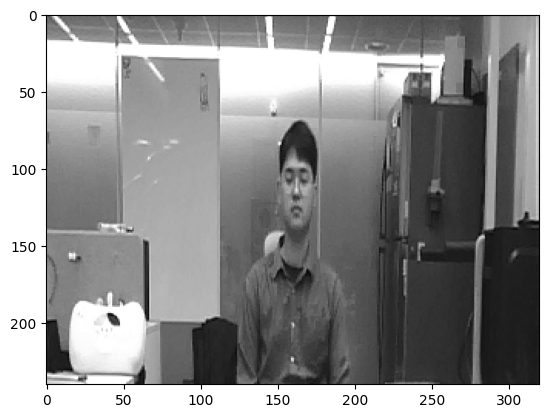

In [ ]:
# Reformat the bytes into an image
raw_bytes = np.array(HEXADECIMAL_BYTES, dtype="i2")
# print(raw_bytes.shape)
image = np.zeros((len(raw_bytes)*2,1), dtype=int)

# Loop through all of the pixels and form the image
for i in range(len(raw_bytes)):
    #Read 16-bit pixel
    pixel = struct.unpack('>h', raw_bytes[i])[0]

    # Convert to 16-bit output to GRAYSCALE
    image[2*i] = (pixel & 0xFF00) >> 8
    image[2*i +1] = (pixel & 0x00FF)

image = np.reshape(image,(240, 320, 1)) #QVGA resolution
# image = image[60:180, 80:240, :]
# print (image.shape)

# import cv2
# image = cv2.resize(image.astype('float32'), dsize=(28, 28), interpolation=cv2.INTER_CUBIC)

# Show the image
plt.imshow(image, cmap='gray')
plt.show()

Save the image as .npy file. 

In [ ]:
save_as = './s04_010.npy' # sXX denotes subject naming, XXX denotes the image numbering

hexa = np.array(HEXADECIMAL_BYTES)
np.save(save_as, hexa)